In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
from scipy.interpolate import RectBivariateSpline
import numpy as np

In [3]:
from vaneska.interpolate import ScipyRectBivariateSpline

In [4]:
from lightkurve import KeplerTargetPixelFile

In [5]:
import tensorflow as tf

In [6]:
from vaneska.models import KeplerPRF

In [7]:
tpf = KeplerTargetPixelFile.from_archive('kepler-10b', quarter=5)

INFO: Found cached file ./mastDownload/Kepler/kplr011904151_lc_Q111111110111011101/kplr011904151-2010174085026_lpd-targ.fits.gz with expected size 4685387. [astroquery.query]


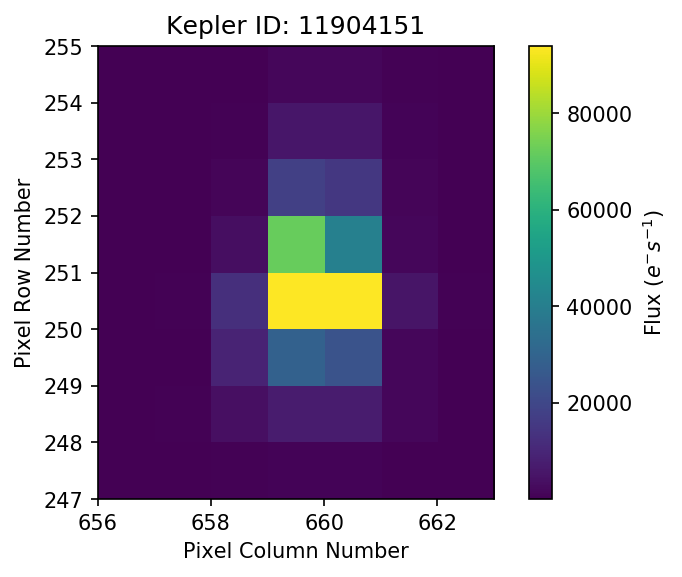

In [8]:
tpf.plot()

In [9]:
prf = KeplerPRF(channel=tpf.channel, shape=tpf.shape[1:], column=tpf.column, row=tpf.row)

In [10]:
flux = tf.Variable(3e5, dtype=tf.float64)
xc = tf.Variable(tpf.column + 4., dtype=tf.float64)
yc = tf.Variable(tpf.row + 4., dtype=tf.float64)
bkg = tf.Variable(1e4, dtype=tf.float64)

In [11]:
var_list = [flux, xc, yc, bkg]

In [12]:
model = prf(flux, xc, yc) + bkg
model = tf.reshape(model, shape=tpf.shape[1:])

In [13]:
model

<tf.Tensor 'Reshape:0' shape=(8, 7) dtype=float64>

In [14]:
sess = tf.Session()

In [15]:
sess.run(tf.global_variables_initializer())

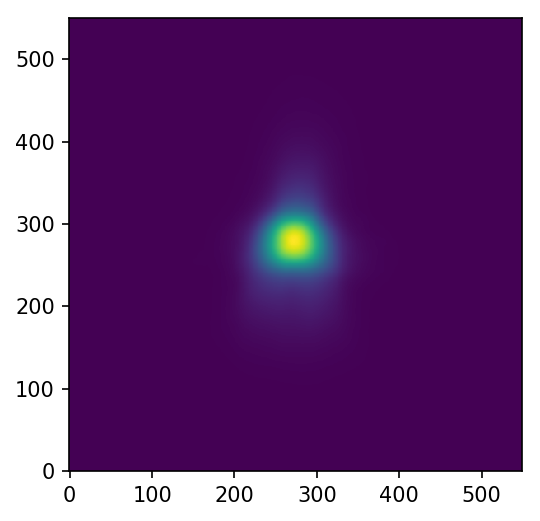

In [16]:
plt.imshow(prf.supersampled_prf, origin='lower')

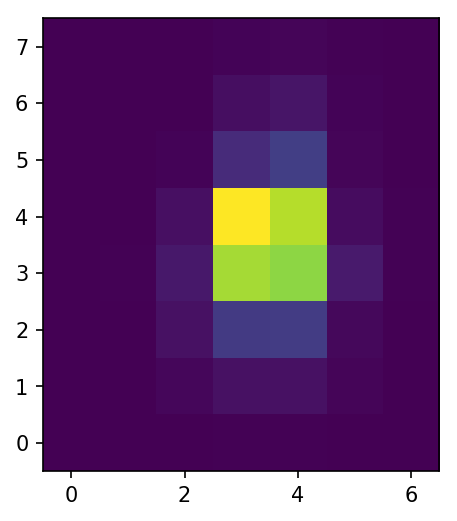

In [17]:
plt.imshow(sess.run(model), origin='lower')

In [18]:
data = tf.placeholder(dtype=tf.float64, shape=tpf.flux[0].shape)

In [19]:
loss = tf.reduce_sum(tf.subtract(model, tf.multiply(data, tf.log(model))))

In [20]:
grad = tf.gradients(loss, var_list)

In [21]:
optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss, var_list, method='TNC')

In [24]:
import tqdm

In [25]:
psf_flux = []
for n in tqdm.tqdm(range(len(tpf.time))):
    optimizer.minimize(session=sess, feed_dict={data:tpf.flux[n] + tpf.flux_bkg[n]})
    psf_flux.append(sess.run(flux))
    print(sess.run(grad, feed_dict={data:tpf.flux[n] + tpf.flux_bkg[n]}))

  0%|          | 0/4492 [00:00<?, ?it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511108.791246
  Number of iterations: 8
  Number of functions evaluations: 25


  0%|          | 1/4492 [00:00<15:29,  4.83it/s]

[-8.3804286062777456e-09, 4.4772138153348351e-05, 3.0986684578238055e-06, -1.8074292901792965e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510920.136519
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0457929105318897e-05, -2.9192287911428139e-05, -0.0021165548314456828, 0.010481867453743687]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511383.340788
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 3/4492 [00:00<08:44,  8.56it/s]

[-5.6380370415402316e-05, -0.0045747962021778221, -0.32013013795949519, 0.079776246829923125]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511830.355446
  Number of iterations: 4
  Number of functions evaluations: 13


  0%|          | 4/4492 [00:00<08:43,  8.57it/s]

[-2.6701297955664116e-08, 0.00012150158909207676, 6.3320112531073391e-06, -0.00017819714380740148]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511982.083015
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.4805945562378588e-05, 0.001887034154151479, 0.21378412444209971, -0.063887282291556713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511765.749073
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 6/4492 [00:00<07:38,  9.77it/s]

[8.6402076018374935e-06, 3.7213354062259896e-05, -0.0045212190561869647, 0.04677576433777586]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511875.206864
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0478139160591433e-05, 0.00015708927412561025, -0.0019899876333511202, 0.025531862219077772]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511979.993916
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 8/4492 [00:00<07:05, 10.53it/s]

[-5.5842641009063929e-06, 7.0974163463688456e-05, -0.0022831055957794888, 0.024824062769436051]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512285.044464
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7469435246690243e-05, 5.8242837440047879e-05, -0.0067344680064707063, 0.016272242402742498]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512067.728417
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 10/4492 [00:00<06:44, 11.07it/s]

[8.8292510899267568e-06, -0.00079556136506653274, -0.044974518583330791, 0.04879438873441666]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511282.678354
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012184820903696388, 0.002725071922668576, -0.36232016693247715, 0.11577022389697189]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512750.977846
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 12/4492 [00:01<06:32, 11.41it/s]

[-0.0001000960228561415, 0.0017869794310172438, -0.1285762580082519, 0.0092388253198375514]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5511762.887835
  Number of iterations: 33
  Number of functions evaluations: 100
[7.9213430366903426e-06, -0.0088146822663475177, 0.0046571752973250113, 0.14408802932382614]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511570.317497
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 14/4492 [00:01<09:36,  7.77it/s]

[-5.6113758682418968e-06, 1.4589795227948343e-05, -0.00012318945846345741, -0.0056699718305032176]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508140.361918
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00049867379692037413, 0.021246388732379273, -0.6492389737504709, 0.095682960012575369]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5512187.361057
  Number of iterations: 33
  Number of functions evaluations: 100


  0%|          | 16/4492 [00:02<11:50,  6.30it/s]

[-3.2866155784188819e-06, 0.2079834871260573, 3.9800665070943069, 0.14875219905019832]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512738.225976
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3571303142397885e-05, 0.0014847609827484121, 0.17711343704286264, 0.18588938971004509]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513250.044669
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 18/4492 [00:02<11:08,  6.69it/s]

[-7.5906138188126457e-05, 0.050185076708658016, -0.12812945686891908, 0.16052735351735958]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512936.887744
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9767243017624294e-05, 0.0011282548816780036, -0.092190691009818693, 0.14960820857746449]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512679.511530
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 20/4492 [00:02<10:32,  7.07it/s]

[-1.1557763077888784e-05, -0.010590105259325355, -0.047947987273801118, 0.20449856473897221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512849.972175
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.1849538037334711e-07, 0.00010637795639922842, -1.1235257261432707e-05, -0.001132239778833144]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512777.843265
  Number of iterations: 2
  Number of functions evaluations: 7


  0%|          | 22/4492 [00:03<10:12,  7.30it/s]

[2.9413096762690577e-05, 0.00092476908957905835, 0.098849245596284163, 0.038733605593447851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511974.920753
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019613691822347162, 0.0013022309726693493, 0.55853029451463954, 0.07883125137406366]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512485.149482
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 24/4492 [00:03<09:47,  7.60it/s]

[0.00013476002451057352, -0.030838472610867029, -0.080487051640375284, 0.12095959633913878]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512504.502006
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.1546612546128348e-08, 0.00016239266778939054, 1.1857913705171086e-05, -0.00045058205548886843]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5513457.898994
  Number of iterations: 4
  Number of functions evaluations: 27


  1%|          | 26/4492 [00:03<10:03,  7.40it/s]

[1.2968906473037611e-08, -0.0051032745086558862, 0.00022677584092889447, 4.6420701629301675e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513275.931658
  Number of iterations: 4
  Number of functions evaluations: 13


  1%|          | 27/4492 [00:03<09:59,  7.45it/s]

[-9.4612420831891031e-09, 3.4477896406315267e-05, 3.1370836950372905e-06, -1.6761383208052649e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513587.952362
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.0149933284873708e-05, 0.0022458648386418645, -0.13417985139676603, -0.0077644782557666492]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513815.046219
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 29/4492 [00:03<09:42,  7.67it/s]

[-6.8418073172953585e-05, 0.00042970516960849636, -0.017744084218065836, 0.017800139525550263]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514297.284194
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00012441489355347665, 0.0051439602020764141, 0.010264075595841859, 0.061917316518878884]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514004.331672
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 31/4492 [00:04<10:58,  6.78it/s]

[-8.8158060707993827e-05, 0.001514311790742795, -0.078970903739900677, 0.029699241990718495]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514076.977298
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1656275581954169e-05, 0.00023375691534965881, -0.012588849038365879, 0.073632558753001343]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514170.182832
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 33/4492 [00:04<10:40,  6.96it/s]

[-8.1100874904050865e-05, 0.012168733262569731, -0.48245402662723791, 0.066478900436032662]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514307.817923
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010427909010637601, -0.054098726079246262, -0.87264769831926969, 0.1038236170438227]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514511.984931
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 35/4492 [00:04<10:24,  7.14it/s]

[-9.4063011702536642e-05, 0.00052182394529154408, -0.020346085271739867, 0.11314498900583836]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514873.527832
  Number of iterations: 6
  Number of functions evaluations: 34
[-1.9970752438910888e-09, 0.00095878219417500077, -0.0018079041674354812, 4.2819309311603604e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514851.573921
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 37/4492 [00:05<10:34,  7.02it/s]

[1.3341146198692089e-05, -0.00078541275433963165, -0.040031674165220466, 0.099189113040105581]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514474.232764
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4517718512431483e-05, -0.0087780051840127271, -0.47293931300191616, 0.084216074523142614]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514882.109322
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 39/4492 [00:05<10:19,  7.19it/s]

[1.3990315943397495e-05, -0.0018293540738341107, -0.018538987802457996, 0.074754321958679926]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514851.213906
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4421330305919066e-05, -0.0054677255257047364, -0.061602704883625847, 0.15396541605757541]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514599.683859
  Number of iterations: 33
  Number of functions evaluations: 100


  1%|          | 41/4492 [00:06<11:14,  6.60it/s]

[4.0526681228015768e-05, -0.0174791809981798, 0.0045242607302498072, 0.11443479424724612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515033.772329
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2490549098674066e-05, 0.00056945995811474859, -0.016270103245915379, 0.078920165509547613]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514949.859727
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 43/4492 [00:06<10:57,  6.77it/s]

[1.6691755088320097e-05, 0.0084649418554363365, -0.036408648553333478, 0.13070710412624476]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515358.691725
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010087880348566645, -0.001792902629404125, -0.066666820865066256, 0.018636328817208114]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515001.739066
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 45/4492 [00:06<10:43,  6.91it/s]

[9.7636020736594636e-06, 0.0012408857433001685, -0.0095822449329716619, 0.15404577276838483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515762.569044
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.0798034946047668e-08, 0.00014636857122241054, 1.5974419511621818e-05, -0.00034053144962931103]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515101.018706
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 47/4492 [00:06<10:36,  6.99it/s]

[9.8264581246463104e-05, 0.012906097592804144, -0.064219744199363049, 0.00070304390735298483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515773.695052
  Number of iterations: 2
  Number of functions evaluations: 7
[7.3640577843616523e-06, 3.2570466373726958e-05, -0.00058140920009464025, 0.025284783843459002]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515928.534925
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 49/4492 [00:06<10:23,  7.13it/s]

[-1.56257533578813e-05, 0.0059415919226921687, -0.16906502154779446, 0.031876744828354342]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515491.297990
  Number of iterations: 2
  Number of functions evaluations: 7
[4.6313685360319795e-05, 0.00049509951440995792, -0.016855515663337428, 0.017677375395332984]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515268.309000
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 51/4492 [00:07<10:10,  7.27it/s]

[0.00013942711240865976, 0.0016187563101084379, -0.031130678684348823, 0.031719353309705767]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515639.613821
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7188380389091844e-05, -0.0019202923945158545, -0.018839274467609357, 0.03985133327860868]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515362.108303
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 53/4492 [00:07<10:00,  7.39it/s]

[7.3961878957829255e-05, 0.0034177600409748266, -0.092239171091932803, 0.049218954625357303]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515578.091745
  Number of iterations: 2
  Number of functions evaluations: 7
[6.4835692511383373e-05, 0.0008084565561148338, -0.026395931976367137, 0.16323334397522593]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516110.679834
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|          | 55/4492 [00:07<09:51,  7.50it/s]

[-1.3580578512161802e-05, -0.0027524463421286782, -0.010464624176165671, 0.059941517702450264]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515491.653319
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.2755719877805567e-08, 0.00016066812258941354, 1.0983274478348903e-05, -0.00050241602279332831]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5523041.451402
  Number of iterations: 33
  Number of functions evaluations: 100


  1%|▏         | 57/4492 [00:08<10:35,  6.98it/s]

[-9.9582594047320852e-06, -0.048722214574354439, -5.2323651942278957, -0.10348210064410135]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5515876.099927
  Number of iterations: 30
  Number of functions evaluations: 100


  1%|▏         | 58/4492 [00:08<11:24,  6.48it/s]

[1.6300508414411607e-08, -0.65859299494059087, -0.081489244616022916, -4.0684548805236531e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515795.205311
  Number of iterations: 4
  Number of functions evaluations: 13


  1%|▏         | 59/4492 [00:09<11:21,  6.51it/s]

[-7.1668631698544594e-08, 0.00014094104972173227, 1.3524500900530256e-05, -0.0002891818372142696]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515668.232817
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8139582768234705e-05, -0.0012230928173266875, -0.015740160715722595, 0.097138358193232466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515698.896081
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|▏         | 61/4492 [00:09<11:08,  6.62it/s]

[1.980081431747667e-05, 0.00020350620025055832, -0.0056910319563030498, 0.081285380306084121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515808.949469
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3509957997191267e-05, 0.0021254286830298952, -0.013306835382536519, 0.061522612388460574]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514988.163116
  Number of iterations: 33
  Number of functions evaluations: 100


  1%|▏         | 63/4492 [00:09<11:42,  6.31it/s]

[0.00015136877999610658, -0.026971406077791471, 0.014815437512879726, 0.021602897256650211]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514818.059903
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016553118933684569, -0.0096401271234753949, -0.73407716595102102, -0.0034738354600325483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515323.815587
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|▏         | 65/4492 [00:10<11:30,  6.42it/s]

[8.0673698610691721e-05, 0.0059062197242383263, -0.11863276708027115, 0.084414241715801919]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515908.399898
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.6581287869720701e-06, 0.0009574019086358021, -0.015258172184985597, 0.096405954529449445]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516263.314274
  Number of iterations: 2
  Number of functions evaluations: 7


  1%|▏         | 67/4492 [00:10<11:19,  6.51it/s]

[-8.167199623009859e-05, -0.010082072357363359, -0.097161178118767566, 0.058789963409725754]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516215.781027
  Number of iterations: 9
  Number of functions evaluations: 28
[-1.1947380238022491e-05, -0.009383454094404442, 0.0013931707653682679, 0.041544070430841296]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516218.223859
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 69/4492 [00:10<11:17,  6.53it/s]

[-1.3925423968010574e-05, 0.0086903791166150768, -0.12682106720239972, 0.10026297453609256]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515992.701023
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.596452789130446e-06, 0.00097843567846211954, -0.025826843397226185, 0.10076110326242305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516093.626145
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 71/4492 [00:10<11:07,  6.63it/s]

[2.3056362974827743e-05, 0.00022143495152704418, -0.0050692656313913176, 0.09494203644110577]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515788.772280
  Number of iterations: 2
  Number of functions evaluations: 7
[6.9407769498494067e-05, 0.0087140874838951277, -0.17710379586242198, 0.087755216375288492]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515859.603430
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 73/4492 [00:10<10:57,  6.72it/s]

[7.3091700084763553e-05, 0.0064727287785899534, -0.053615791099218768, 0.18044072884586415]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516356.508537
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1369169997917442e-05, -0.0012743175534524198, -0.075564431610473548, 0.14832323798462277]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515947.142333
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 75/4492 [00:11<10:48,  6.82it/s]

[6.5994767589018163e-05, -0.0020251802939128538, -0.16815654152560455, 0.093400140186310376]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516696.444174
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6913434989635039e-05, -0.017173261695006659, -0.51583919883705676, 0.16700219855029896]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516551.729484
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 77/4492 [00:11<10:39,  6.90it/s]

[-4.3589156270526161e-05, -0.0020252049466762401, -0.11951975401461823, 0.12346537169347227]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516319.045774
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.8973382945445218e-06, -0.0055703411139802483, -0.15235336938712862, 0.13853811816757244]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517670.982451
  Number of iterations: 4
  Number of functions evaluations: 13


  2%|▏         | 79/4492 [00:11<10:33,  6.97it/s]

[-1.3216254820223872e-07, 0.00012004980271740351, 1.5141993571887724e-05, -0.0006308226873550371]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516762.286892
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014972116627328703, -1.4064561186933133, 0.26116987552086357, -0.086578396035736138]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517147.206448
  Number of iterations: 5
  Number of functions evaluations: 18


  2%|▏         | 81/4492 [00:11<10:29,  7.01it/s]

[-3.0357719745140177e-08, 0.012381320672830043, -0.0030517036957462551, -2.9595411775718006e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517131.324872
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6680526189464216e-05, 0.00053556381863018032, 0.080777749704793678, 0.046628922533604844]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517366.445676
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 83/4492 [00:11<10:21,  7.09it/s]

[-4.2412421865950511e-05, -0.018870806597078627, -0.031524264988547657, -0.050881051421470591]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517608.771536
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.2296662168669602e-05, 0.0012210253798912163, 0.17910022882460908, 0.040606970711091428]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517341.056803
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 85/4492 [00:11<10:14,  7.17it/s]

[-7.7299922731670009e-06, -4.1350405354023678e-05, -0.0012936565253767185, -0.0081240560882557267]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517102.702309
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2739351144602897e-05, 0.0010703726484280196, 0.18374210606270935, 0.080672621997049943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517178.198659
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 87/4492 [00:12<10:08,  7.24it/s]

[3.264786935125441e-05, 0.00043509085890036658, -0.009344649293780094, 0.088347631385277348]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517525.688667
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6058028099009908e-05, 0.0018512574783926539, -0.039823820094170514, 0.013282289480665233]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516977.279559
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 89/4492 [00:12<10:03,  7.30it/s]

[3.3106592576117276e-05, -0.00032424405117126298, -0.0090737776536116144, 0.054767997192643136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517562.422817
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2365440459372445e-05, 0.00020232048200341524, -0.0029023315346421441, 0.05949799779005871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517242.362793
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 91/4492 [00:12<09:56,  7.37it/s]

[8.3584289032687803e-06, 0.0043234223112449399, -0.076314110227031051, 0.11995953055137498]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516758.684470
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5945560969711503e-08, 9.6472952009207802e-05, 1.1823900422314182e-05, -0.00016655950354405036]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517518.858923
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 93/4492 [00:12<09:52,  7.43it/s]

[-0.00010185180362297895, -0.0014698468744427373, -0.04502734082598181, 0.060104276332472284]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517282.962735
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.0665400788434748e-05, -0.00080413574687554501, -0.032430064413347282, 0.028864968518733325]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5517532.194314
  Number of iterations: 4
  Number of functions evaluations: 18


  2%|▏         | 95/4492 [00:12<09:49,  7.45it/s]

[-8.1485431336486558e-10, 0.0033843695646282868, -0.00022792348318034783, -9.5474625216862563e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517180.805067
  Number of iterations: 5
  Number of functions evaluations: 29
[-6.9616518626192114e-09, -0.01225440862481264, 0.001463094888094929, -1.4915715873531354e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517003.248964
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 97/4492 [00:13<09:51,  7.43it/s]

[-1.3704004975214484e-05, 0.00012061338520652498, -0.0024467421026201919, 0.031605088668762993]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517158.832671
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.5032054930638516e-05, -0.0010571047887424356, -0.0054572820608882466, -0.020115756865347167]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517387.307810
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 99/4492 [00:13<09:45,  7.50it/s]

[-4.5907485235728747e-05, 0.00045461052513928735, -0.0089369734996580519, 0.053671884384397073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517119.175124
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.814748167363895e-05, -0.00014394425261343713, -0.0045098537320882315, -0.013705169898068248]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516970.715731
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 101/4492 [00:13<09:40,  7.56it/s]

[3.5352864348760747e-05, 0.0010873568944589351, 0.13966113671631319, 0.0069794112906668149]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517655.501009
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1481385388194475e-05, 0.0021989455071889097, 0.38778671828549705, 0.039341158790681341]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5515751.221918
  Number of iterations: 4
  Number of functions evaluations: 24
[-2.1858004121966257e-10, -0.012744657382881996, -0.0003345205095683923, 3.0401374726540809e-06]

  2%|▏         | 103/4492 [00:13<09:41,  7.55it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516454.464744
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010106368448680424, -0.028799196487852896, -0.047529494657283067, 0.041196098417485838]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516125.091267
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 105/4492 [00:13<09:36,  7.61it/s]

[-3.0496899055817289e-05, -0.00046473426846205257, -0.0052060444268136052, 0.06773305882847791]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516987.200891
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.000202087288295307, -0.47216383458408018, -0.32335082962708839, 0.03974823472968303]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517533.509206
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 107/4492 [00:13<09:31,  7.68it/s]

[-0.00026103828495509847, -0.075658649946035439, -0.20258091753203189, 0.070399967360421645]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517388.355620
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00024560481285141461, 0.058400442351739912, -0.99408740953913366, 0.038362040944271758]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5516271.412161
  Number of iterations: 4
  Number of functions evaluations: 22


  2%|▏         | 109/4492 [00:14<09:31,  7.67it/s]

[-5.4723766820113928e-09, 0.08323230935002357, -0.0093715469738526735, -4.5966616513126723e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516646.186254
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4629605317314012e-05, -0.000284001987438387, -0.010230343334114878, 0.07129865188082829]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517116.934019
  Number of iterations: 2
  Number of functions evaluations: 7


  2%|▏         | 111/4492 [00:14<09:26,  7.73it/s]

[-6.6435764515561206e-05, -0.0012062653240718646, -0.045055689741275273, 0.11513891479327254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517424.800165
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001037003002718126, -0.026149295202685607, -0.89820151763706235, 0.018816355194873124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517415.713590
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 113/4492 [00:14<09:23,  7.77it/s]

[-4.8779704069922686e-05, 0.0020622884544536646, -0.031924833099765237, 0.12149332950253378]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517634.492895
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6115730497020836e-05, -0.0041363845512023545, -0.11689542756903393, 0.07214971928867131]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517240.297047
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 115/4492 [00:14<09:19,  7.83it/s]

[-2.9859480543659687e-05, 0.00071169557668326888, -0.012007737348540104, 0.12197353293371105]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518262.046917
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.879668268151921e-08, 0.00011004987709384295, 1.4418756109080277e-05, -0.00018783572102820667]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517414.339465
  Number of iterations: 5
  Number of functions evaluations: 23


  3%|▎         | 117/4492 [00:14<09:20,  7.81it/s]

[1.094059386488877e-09, -0.00010333884983992903, 3.2982832635752857e-05, 1.8612234142789674e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516241.220867
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014928345210441212, -0.012440177780263184, -0.55905811041702691, 0.11036378189206153]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515966.147211
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 119/4492 [00:15<09:15,  7.87it/s]

[0.00023181678761784522, 0.009997593375373981, -0.15749023644821136, 0.038567376763965266]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517299.051441
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5197623006110232e-07, -0.00015268275592461578, -0.017139918978500646, 0.059479576348359098]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509662.531036
  Number of iterations: 6
  Number of functions evaluations: 23


  3%|▎         | 121/4492 [00:15<09:16,  7.85it/s]

[-1.4679057803220624e-07, 4.4111220631748438e-07, 1.8329683371121064e-06, -3.2860628247588508e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5513493.201777
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00046724143706321046, -23.72980194043248, 9.8026653109300241, 0.050286519635823868]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5513537.011182
  Number of iterations: 10
  Number of functions evaluations: 46


  3%|▎         | 123/4492 [00:16<09:45,  7.47it/s]

[1.9937244983420088e-08, -0.016838610523791431, -0.0091398799831949873, -3.4510037720481002e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5516951.346847
  Number of iterations: 28
  Number of functions evaluations: 100


  3%|▎         | 124/4492 [00:17<10:06,  7.20it/s]

[8.3935640251588117e-08, 1.1997272358657938, -0.072566725724755088, -4.1478068654177136e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518137.076890
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.3900852382421597e-06, 0.00042843223172894795, 0.050035121055771015, 0.04453685497261517]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517618.102437
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 126/4492 [00:17<10:01,  7.26it/s]

[5.4691281580181855e-05, 0.0032194086766139662, -0.039891102951514767, 0.053601449866604645]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517517.227004
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010306044375566186, -0.020317595601682115, -0.058417120375452214, 0.039726635071034577]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518244.444932
  Number of iterations: 4
  Number of functions evaluations: 13


  3%|▎         | 128/4492 [00:17<09:58,  7.30it/s]

[-1.2879527197355578e-08, 0.00010843193558685016, 1.3693939763470553e-05, -0.00020176294045326504]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518187.669165
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4563380071676968e-06, 0.00026023229247584823, -0.0035070217472821241, -0.03691097114038755]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518313.164985
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 130/4492 [00:17<09:53,  7.35it/s]

[1.5805216300389738e-05, -0.00022791370793129317, -0.0013630772045871709, 0.028732315976890743]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5518626.318435
  Number of iterations: 4
  Number of functions evaluations: 14
[3.0696221762355203e-09, 0.0044422148789635685, -0.0001547238280181773, -1.2887516036563795e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517906.463845
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 132/4492 [00:17<09:50,  7.38it/s]

[9.1333342602428064e-05, -0.0022572878638129623, -0.21521019738793257, 0.031115008703296199]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518496.509378
  Number of iterations: 2
  Number of functions evaluations: 7
[1.539561708456972e-05, 0.00011913736943824915, -0.0012224281745147891, -0.013096389209142467]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518087.281535
  Number of iterations: 4
  Number of functions evaluations: 13


  3%|▎         | 134/4492 [00:18<09:47,  7.42it/s]

[-6.3714556790273047e-09, 0.00014143682938083657, 1.8159647879656404e-05, -0.0002380422209927735]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517593.807489
  Number of iterations: 2
  Number of functions evaluations: 7
[8.1230899606392695e-05, 0.011815657909664878, -0.14647255301497353, -0.0059507859527221374]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518809.179228
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 136/4492 [00:18<09:43,  7.47it/s]

[-9.1738801280888058e-05, -0.0074570740216586273, -0.06188290231875726, -0.035503538064618256]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518106.271561
  Number of iterations: 2
  Number of functions evaluations: 7
[2.058464798773002e-05, -0.0016682607783877756, -0.034922686250865809, -0.077917424989703665]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518161.492322
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 138/4492 [00:18<09:39,  7.52it/s]

[-2.5016392242822524e-06, 5.5696524668746861e-05, -0.00058265743791707791, -0.010006766928838506]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518080.413755
  Number of iterations: 2
  Number of functions evaluations: 7
[4.986481954123885e-05, -0.0012837444342039817, -0.015169805166806327, -0.031756831799891305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518203.895465
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 140/4492 [00:18<09:35,  7.57it/s]

[1.2377809377088836e-06, -2.6932897071674233e-05, -0.00051266313676023856, -0.0040089400707473688]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518276.749721
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1895677665633292e-06, -0.00062641280692332657, -0.0080121391965803923, -0.1059235133865829]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517975.986561
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 142/4492 [00:18<09:31,  7.61it/s]

[6.8964905522372714e-05, -0.011547673261702585, -0.0098702463583322242, 0.007897541998018287]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518254.661031
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1533471404001567e-06, -0.0012220481671647576, -0.084003181953448802, -0.030378483214089647]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5517349.448566
  Number of iterations: 33
  Number of functions evaluations: 100


  3%|▎         | 144/4492 [00:19<09:48,  7.39it/s]

[0.00014725005792172018, 0.00060806545207015006, 0.012272500060134917, -0.023270582609566715]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517098.060968
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00017941560906155514, -0.019172259858351026, -0.88358076129043184, 0.071867879861118977]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5517470.040408
  Number of iterations: 33
  Number of functions evaluations: 100


  3%|▎         | 146/4492 [00:20<10:03,  7.20it/s]

[9.1401372786486211e-05, -0.047422999190985138, -0.0022866564813739387, -0.047180669075934545]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518359.702928
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2027548430368863e-05, 0.0070841852511875913, -0.027605668552496354, 0.015417448571055314]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518135.369679
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 148/4492 [00:20<10:00,  7.23it/s]

[2.325460268806645e-06, 1.026277277560439e-05, -0.00039867352461442351, 0.0012052413179624022]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517656.317225
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0961098989711394e-05, 0.013497401280801569, -0.3440765335199103, 0.015453632769459102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518227.127471
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 150/4492 [00:20<09:56,  7.27it/s]

[-4.3855790571277475e-06, 0.00026427762986713788, -0.0098274556476098951, -0.041462111000246549]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5518473.535893
  Number of iterations: 33
  Number of functions evaluations: 100


  3%|▎         | 151/4492 [00:21<10:12,  7.08it/s]

[-3.5369921829201886e-05, 0.00032178791479964275, 0.0020228414632583736, 0.059973765215372898]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5518713.398017
  Number of iterations: 33
  Number of functions evaluations: 100


  3%|▎         | 152/4492 [00:21<10:27,  6.91it/s]

[-2.5495448104389043e-05, -0.059267053626172128, 0.001485140423028497, -0.22570725696469807]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518590.947886
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3955243247353206e-05, 0.00035645085608848603, -0.017955742559934151, 0.036300397046502453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518167.834727
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 154/4492 [00:22<10:23,  6.96it/s]

[3.6918454384245875e-05, 0.038960735356340592, -0.04374733167787781, -0.012648044734750341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518216.856248
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5299483623286712e-05, 0.0011748716160582262, 0.21972050339536509, -0.013340858363679819]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518929.739880
  Number of iterations: 2
  Number of functions evaluations: 7


  3%|▎         | 156/4492 [00:22<10:19,  7.00it/s]

[-5.3492325354112177e-05, 0.0034471124317860813, -0.028542631052914658, -0.079233225215020964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518255.412149
  Number of iterations: 2
  Number of functions evaluations: 7
[4.9656851826613072e-05, -0.0065463274154353712, -0.27189679582988902, 0.022401532260736379]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5518719.030366
  Number of iterations: 4
  Number of functions evaluations: 18


  4%|▎         | 158/4492 [00:22<10:17,  7.02it/s]

[5.8542580236645159e-09, -0.0028461461338338268, 0.00045189600859885104, 1.8763611675520764e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518929.772975
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0034305494370676e-06, 1.3840419796906644e-05, -0.00017841704175225459, -0.0084510204992103155]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518716.458807
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▎         | 160/4492 [00:22<10:13,  7.06it/s]

[2.5605790768436568e-05, -0.001592956711192528, -0.15091756115543831, -0.021677035065321926]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518772.392058
  Number of iterations: 5
  Number of functions evaluations: 16
[1.7227456395197543e-06, -0.0027913542348869669, 0.00012905211406177841, -0.0012490333078668536]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518837.183772
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5059405218103422e-05, 0.00012215920787639334, 0.024437542619125452, 0.010457550837044471]

  4%|▎         | 162/4492 [00:22<10:11,  7.09it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518977.733367
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.9334565449477823e-08, 0.00015539452033408452, 2.0381006834213622e-05, -0.00045887765998364749]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518563.840241
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▎         | 164/4492 [00:23<10:08,  7.11it/s]

[8.3190656902303733e-05, 0.006156498369819019, -0.31199610045041481, -0.095868205986468058]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518460.275390
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.1578393990623048e-07, 0.00014617678016293212, 1.7970869521377608e-05, -0.00043654893095301794]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518571.981003
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▎         | 166/4492 [00:23<10:05,  7.14it/s]

[-3.0834794970356454e-05, -0.0013238158426247537, -0.12762372238466924, 4.3995003529695431e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518635.260615
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2345432407089765e-05, 0.00095005818639037898, 0.1925746517481457, -0.0057482710365990286]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518831.149254
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▎         | 168/4492 [00:23<10:01,  7.18it/s]

[-5.8493800508439657e-05, -0.090883876714087819, -0.7119193400030781, 0.047838031397548608]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518725.692682
  Number of iterations: 4
  Number of functions evaluations: 13
[1.4368696068037257e-09, 6.1932812513987301e-05, 8.42561166791711e-06, -3.4385895810062905e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518753.239353
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8637635965869189e-06, 5.8458892453927547e-05, -0.0025467946725257207, 0.00032363285312642098]


  4%|▍         | 170/4492 [00:23<09:59,  7.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518816.631109
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0503663448130883e-05, 0.00092033284045101027, -0.042977739345587906, 0.063661048904788964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518658.573362
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 172/4492 [00:23<09:55,  7.25it/s]

[9.9997594348840216e-06, -0.00031979715640773065, -0.0044454406634031329, -0.05020262012927057]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518942.360201
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.5954921708971667e-05, 0.0089593541833892232, -0.40926468567158736, -0.026148436236841155]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518843.268168
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 174/4492 [00:23<09:52,  7.29it/s]

[-1.005344209163879e-05, 0.00086529380996580585, -0.008394534319450031, 0.03492450261512936]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518722.316496
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.447006184814516e-06, 0.0020543647901831719, -0.0024919682473409921, -0.0063068998104982565]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518846.998912
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 176/4492 [00:24<09:48,  7.33it/s]

[8.3058390620664724e-06, -0.010993300518293836, -0.051823676118146977, -0.077063069809720774]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519153.653914
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6215668203618389e-05, -0.020751617536461708, -0.47576660736376652, -0.062987154735647533]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518585.827005
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 178/4492 [00:24<09:45,  7.37it/s]

[3.2515938480090836e-05, -0.017201180016400031, -0.12127233661340142, -0.035751053301858238]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519664.010833
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012202261121539281, -0.022086047030825284, -0.074924873755662702, -0.012875576173109637]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519257.734638
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 180/4492 [00:24<09:42,  7.40it/s]

[-7.601859884133217e-05, -0.0032924914467002964, -0.04787572681743768, 0.0017074898215728718]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519074.625592
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.8543381034348428e-05, 0.00061482459477701923, 0.12908367711497704, -0.059743804521075194]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519915.165495
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 182/4492 [00:24<09:39,  7.44it/s]

[-0.00015074269070951881, 0.0036414352266547212, -0.15890801089517481, -0.018088488070454045]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518863.038863
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4350254584178171e-05, 0.0050394797053741058, -0.0074748810002347454, -0.019999204191290643]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518612.388304
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 184/4492 [00:24<09:36,  7.48it/s]

[4.1134306062155616e-05, 0.0015537742610831629, 0.32507035928028927, 0.060751657099925249]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518052.056143
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015195165399588175, 0.030182270351360785, -0.25134050471569935, 0.081789965565927991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517720.149548
  Number of iterations: 6
  Number of functions evaluations: 29


  4%|▍         | 186/4492 [00:24<09:36,  7.47it/s]

[-2.2067159230997058e-08, -0.022279938473729999, 0.0029814719073328888, 9.1466359705139055e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518034.452274
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.6373314273114611e-05, 0.0034341947421125951, 0.60685191565062269, -0.071161976685020889]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519218.398764
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 188/4492 [00:25<09:33,  7.51it/s]

[-0.00022981597688656943, 0.043600062796485872, -1.0797225542864908, -0.040027045250259574]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519085.362253
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.8080498635601738e-07, 0.00015544056304861442, 1.9414272173889913e-05, -0.00055960255362086375]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5519407.829525
  Number of iterations: 33
  Number of functions evaluations: 100


  4%|▍         | 190/4492 [00:25<09:44,  7.36it/s]

[-2.0011294889682452e-05, 0.00016609110707577202, 0.0014703969372931169, 0.1043817816170679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519399.497654
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2564144483088319e-05, 0.00032753484538261546, -0.017069389579773997, 0.095055969662851458]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519287.360268
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 192/4492 [00:25<09:41,  7.40it/s]

[-7.5108568798635741e-06, 0.000523026636983559, -0.023978686323971488, 0.078914063477953489]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519208.189572
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2021227518308093e-05, -0.002140345021871326, -0.15878458372026216, 0.10712245562577061]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519793.675712
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 194/4492 [00:26<09:38,  7.43it/s]

[-6.1448550312920638e-05, 0.021674596637694776, -0.18372333320075995, 0.022985568721173855]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519585.224920
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.4210113779047664e-05, -0.011469537125776696, -0.69903410205915861, 0.041892356212697157]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519445.893254
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 196/4492 [00:26<09:36,  7.45it/s]

[-1.9735472763901703e-05, 0.00026155551586271031, 0.042876102388618165, 0.03990912953554715]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519327.424067
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8835236939839309e-05, -0.0080916779484141443, -0.0055603073105885414, 0.04294321668986123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520029.753428
  Number of iterations: 2
  Number of functions evaluations: 7


  4%|▍         | 198/4492 [00:26<09:33,  7.48it/s]

[-0.00013549908229475854, 0.12000826211533422, -0.40642374943672621, 0.029672385635715171]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519900.753613
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.1279098979334351e-05, 0.0016231494282692438, -0.072087930453562876, 0.014318009830100342]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520212.845015
  Number of iterations: 33
  Number of functions evaluations: 100


  4%|▍         | 200/4492 [00:27<09:45,  7.33it/s]

[-5.697112007198215e-05, -0.024562130970025464, 0.0036060341462871293, -0.0077480467844639467]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5519472.686873
  Number of iterations: 33
  Number of functions evaluations: 100


  4%|▍         | 201/4492 [00:27<09:57,  7.18it/s]

[1.5245207087404185e-05, -0.008133053992423811, 0.0012240373598615406, 0.063436574118051814]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519483.574608
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0740895820830349e-05, 0.0042700901317402895, -0.18389981773725594, 0.069532053669731475]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519874.528148
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 203/4492 [00:28<09:54,  7.21it/s]

[-3.787840412946674e-05, -0.079502522708025936, -0.57096535340315313, 0.038954291216953485]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520264.193370
  Number of iterations: 5
  Number of functions evaluations: 27
[-1.4174959900303818e-08, 0.0080205751751236676, 0.00092112260790599976, -3.7221636994821949e-07]

  5%|▍         | 204/4492 [00:28<09:55,  7.20it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520040.518013
  Number of iterations: 2
  Number of functions evaluations: 7
[5.1366426877091573e-05, 0.0022286427270046261, -0.12646812425373355, 0.076698734307462879]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520126.920814
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 206/4492 [00:28<09:53,  7.22it/s]

[1.8287075161336e-05, -0.0027650362731037603, -0.03971245350294339, 0.01924899137838576]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519393.185926
  Number of iterations: 4
  Number of functions evaluations: 13


  5%|▍         | 207/4492 [00:28<09:53,  7.23it/s]

[-2.7126620260817247e-08, 0.00014369155633175978, 1.9919600163120776e-05, -0.00030683286203758708]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520044.041566
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.2478369219363421e-05, -0.013714019803501287, -0.52268607498990605, 0.050794384087906708]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520011.926360
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 209/4492 [00:28<09:50,  7.26it/s]

[-0.00010205839469417874, -0.0073173915889128693, -0.11432066364795901, -0.11950771348918054]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520448.898548
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00018852827382107636, -0.086114549976173294, -0.3612810275353695, -0.029848816839855741]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519649.446461
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 211/4492 [00:28<09:47,  7.29it/s]

[-1.657445507705687e-05, 0.00010750607316367677, -0.0010718204102886375, -0.012529037706053847]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519917.887296
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.0475184861118184e-05, 0.010170436316911946, -0.55260976019417285, -0.024966245297174394]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520173.169828
  Number of iterations: 33
  Number of functions evaluations: 100


  5%|▍         | 213/4492 [00:29<09:57,  7.16it/s]

[-8.4443071411113152e-05, 0.0022711737256031483, 0.004324077697674511, 0.020696089568030485]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519974.888693
  Number of iterations: 6
  Number of functions evaluations: 34


  5%|▍         | 214/4492 [00:30<09:59,  7.13it/s]

[-2.0505145375930567e-08, -0.013947940276921145, -0.0081117202553286916, -1.2021533892347946e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5519362.439160
  Number of iterations: 4
  Number of functions evaluations: 15


  5%|▍         | 215/4492 [00:30<09:59,  7.13it/s]

[-4.3788738243039083e-09, -0.0093706297625431034, 0.0005599201667791931, 2.2754762935006667e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519951.930853
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.0842277714421092e-05, -0.00047219646603480214, -0.021522283088415861, -0.024136768324226177]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519732.618912
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 217/4492 [00:30<09:56,  7.16it/s]

[-4.6047470364981788e-05, -0.0065275316583210952, -0.53081138552988705, 0.03390008468719341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519486.205692
  Number of iterations: 4
  Number of functions evaluations: 13


  5%|▍         | 218/4492 [00:30<09:56,  7.17it/s]

[3.8773472063255432e-09, 0.00010895373725361424, 1.6138976207002997e-05, -0.00012179239102805273]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520039.582156
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6575227439336655e-05, -0.0026008178970187146, -0.1909619082325662, -0.087456910935943322]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519473.718904
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 220/4492 [00:30<09:53,  7.20it/s]

[-1.310521037638842e-05, -0.00010267367997585097, -0.0057891762025974458, 0.021687748368182547]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520102.498853
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6875115213791779e-05, 0.028726704905238876, -0.13734881335039972, -0.0084479763507911976]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520297.488140
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 222/4492 [00:30<09:50,  7.23it/s]

[-0.00013907502900747503, 0.018740650232757616, -0.39687856008822564, -0.063943578097932496]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520023.701435
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010652792663857959, 0.0025058153960344498, 0.57780685061334225, -0.059930492852072415]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519563.408991
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▍         | 224/4492 [00:30<09:48,  7.25it/s]

[2.0799903811923037e-06, -8.9375689640291966e-06, -0.00055987007726798765, -0.017979036022812034]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519283.439490
  Number of iterations: 2
  Number of functions evaluations: 7
[3.305156332016751e-05, 0.0017690814815978229, -0.077449910646464559, 0.0034793330598360539]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518764.415773
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 226/4492 [00:31<09:46,  7.28it/s]

[0.00011632170989044673, 0.0018709307032622746, 0.44239416248092311, 0.0048938903473840778]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518985.180825
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001019742182526949, -0.0047577263885614229, -0.23762558117959998, 0.0060894179321061559]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519409.218150
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 228/4492 [00:31<09:43,  7.31it/s]

[9.6876069694317238e-06, 0.0001848519691520778, -0.0079398986599699128, -0.031375869127371336]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520413.699224
  Number of iterations: 4
  Number of functions evaluations: 13
[-9.0828990499842999e-08, 0.00013434644097287674, 2.0567435058183037e-05, -0.00029871949819104682]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520150.572393
  Number of iterations: 4
  Number of functions evaluations: 13


  5%|▌         | 230/4492 [00:31<09:42,  7.32it/s]

[-3.1738084842539149e-09, 0.00011232739370825584, 1.656982749409508e-05, -0.00016340056290164995]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520022.779150
  Number of iterations: 3
  Number of functions evaluations: 10
[-3.1418731973251179e-06, -0.0030215767910704017, 4.4516973503050394e-05, 0.0020237553579687262]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520175.981851
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 232/4492 [00:31<09:39,  7.35it/s]

[-2.4052630409972589e-05, -0.0045833686140213103, -0.17190862117058714, 0.040994181442972288]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520445.615223
  Number of iterations: 5
  Number of functions evaluations: 28
[-1.9580328315324524e-08, 0.0066577066022546205, -3.3273918234044686e-05, 1.3644188645578481e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519870.369346
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 234/4492 [00:31<09:39,  7.34it/s]

[8.6782064849120523e-05, 0.025406193643448205, -0.098785094431150355, -0.10544369262176712]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519924.517076
  Number of iterations: 2
  Number of functions evaluations: 7
[9.4848102628917325e-05, 0.0084112271906633396, -0.45267149438950582, -0.030964798899428159]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520188.346974
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 236/4492 [00:32<09:37,  7.37it/s]

[5.370002094986278e-05, -0.011105939570825285, -0.20108436928057927, -0.024397592509238453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520084.045653
  Number of iterations: 2
  Number of functions evaluations: 7
[4.2475122991457448e-05, -0.004235227070239489, -0.088578543460243964, -0.072898070981908814]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520143.072811
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 238/4492 [00:32<09:34,  7.40it/s]

[4.5712470085584878e-05, 0.0024384819598708418, -0.11292908802352031, 0.07457039356419215]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520151.386678
  Number of iterations: 2
  Number of functions evaluations: 7
[4.987221640706356e-05, 0.0016477952813147567, -0.045291211772564566, 0.024447957272101029]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520581.650032
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 240/4492 [00:32<09:32,  7.43it/s]

[-3.7116332809342817e-05, 0.0010464851993674529, -0.04911610648741771, -0.048952287078916301]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520121.051719
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7092634529923763e-05, -0.012956243281678326, -0.12577752786273777, 0.03709990538487884]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520214.363125
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 242/4492 [00:32<09:29,  7.46it/s]

[4.3708751623428369e-05, -0.0011464382591839239, -0.035989779757073848, 0.0052681261862230766]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520102.267320
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.1233916654319644e-08, 0.00010510603306101984, 1.6380954548367299e-05, -0.00018203634496638532]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520301.454919
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 244/4492 [00:32<09:28,  7.48it/s]

[-1.1116824400729357e-05, -0.0012759928022205713, -0.073194150490962784, 0.095354379723109006]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5519734.046621
  Number of iterations: 33
  Number of functions evaluations: 100
[3.4974645806023358e-05, -0.0027848893105328898, -0.00083856448509322945, 0.015749032649257866]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519941.888824
  Number of iterations: 2
  Number of functions evaluations: 7


  5%|▌         | 246/4492 [00:33<09:35,  7.38it/s]

[-1.3247167218186431e-06, 0.013573950827321823, -0.068665339105791645, 0.07402268840926074]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520093.948371
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9121265127879728e-06, -0.0021061559496047266, -0.082258749438551604, 0.11784721334368842]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520429.833106
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 248/4492 [00:33<09:33,  7.40it/s]

[-7.3632243734479338e-05, -0.0047800809475120332, -0.29524521493112843, -0.0041481318674129186]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520179.618920
  Number of iterations: 33
  Number of functions evaluations: 100
[-1.8482648081860967e-05, -0.0015198301543932757, 0.0011932419038203079, 0.08073305305448697]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520235.586480
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 250/4492 [00:34<09:41,  7.30it/s]

[-8.0637190256827376e-06, -0.0065220028195653867, -0.48099073999401298, 0.10646298948906874]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520308.520622
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.112890795242771e-05, 0.00038331160567395273, 0.096448997659535962, 0.058228477763670572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520692.787961
  Number of iterations: 4
  Number of functions evaluations: 13


  6%|▌         | 252/4492 [00:34<09:39,  7.32it/s]

[-1.3108660532057392e-08, 0.00010373088753112825, 1.5143035852815956e-05, -0.000159076092530408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521254.238803
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.946749480581064e-05, 0.002116822212428815, -0.078108259107466438, -0.013653803467345127]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520200.063958
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 254/4492 [00:34<09:36,  7.35it/s]

[8.3515772282005858e-05, 0.023106132414341118, -0.1616171266305173, 0.038473131446060904]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520551.701050
  Number of iterations: 4
  Number of functions evaluations: 13
[4.6247837521412594e-09, 4.0392195842287038e-05, 6.2503295339411125e-06, -6.2739377203469004e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521077.346017
  Number of iterations: 33
  Number of functions evaluations: 100


  6%|▌         | 256/4492 [00:35<09:47,  7.21it/s]

[-6.4413845098957104e-05, -0.016481872487020155, -0.0021322681768651819, -0.04794089814707303]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520199.007422
  Number of iterations: 2
  Number of functions evaluations: 7
[6.194640610393716e-05, -0.017218198559021403, -0.47918337097326003, -0.034000750065732555]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520729.191682
  Number of iterations: 15
  Number of functions evaluations: 60


  6%|▌         | 258/4492 [00:36<09:51,  7.16it/s]

[2.8631083320157513e-09, -0.067247519636566722, 0.0044304461716819787, 1.2471278396652963e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520961.211456
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.132426245385257e-05, 0.00040906750791691593, -0.026407662315250491, -0.046717695429332462]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520649.791656
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 260/4492 [00:36<09:48,  7.19it/s]

[1.2222637592752134e-07, 0.00014934159116819501, -0.009813405638851691, -0.033003005795542384]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520397.178284
  Number of iterations: 33
  Number of functions evaluations: 100


  6%|▌         | 261/4492 [00:36<09:56,  7.09it/s]

[3.2920169289341744e-05, 0.00084364811164050479, 0.001099164965125965, -0.012999346648665311]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520326.544480
  Number of iterations: 4
  Number of functions evaluations: 13


  6%|▌         | 262/4492 [00:36<09:56,  7.10it/s]

[9.6728381207555891e-09, 0.00010197524534305558, 1.5951216482790187e-05, -7.9021511085075602e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520340.766774
  Number of iterations: 32
  Number of functions evaluations: 97


  6%|▌         | 263/4492 [00:37<10:04,  7.00it/s]

[-6.5608130830029088e-08, 0.00012204514086988638, 6.6366064856993034e-06, -0.00025439464207555051]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520177.216921
  Number of iterations: 2
  Number of functions evaluations: 7
[3.023412674244691e-05, 0.0040654061754139548, -0.26008560375339584, 0.10762924125671747]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519839.082752
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 265/4492 [00:37<10:02,  7.02it/s]

[8.1616779662199018e-05, 0.0041859744183057046, -0.23393962307272886, 0.10281680838885043]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519369.737135
  Number of iterations: 4
  Number of functions evaluations: 13


  6%|▌         | 266/4492 [00:37<10:01,  7.03it/s]

[-3.1550158854400101e-08, 0.00014833721070317551, 2.3175854948931374e-05, -0.00038425608120318255]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519678.226875
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.2818551140755097e-06, -0.00016890963479454513, -0.0026430793004692532, -0.029150903751722468]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519141.940449
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 268/4492 [00:37<09:58,  7.05it/s]

[7.1442227664099932e-05, 0.013102194359362329, -0.64235979561999557, -0.081192188871595183]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520868.212194
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00015823800616200125, 0.0059014722082793014, 0.010051719333205256, -0.1137620474256601]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521163.249322
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 270/4492 [00:38<10:05,  6.97it/s]

[-0.00017863123897512295, 0.033669702916085953, -0.3012448498957383, 0.0065115532425268352]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520472.414590
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.3819405211696396e-05, 0.054276930948162772, -0.22470999562392535, -0.067236400154591092]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520837.226109
  Number of iterations: 33
  Number of functions evaluations: 100


  6%|▌         | 272/4492 [00:39<10:14,  6.87it/s]

[-0.00010670115946690827, -0.0094411076602227695, 0.0062129861944413278, 0.02387739590189597]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520931.530279
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010277286528807654, -0.021769275951555755, -0.24713510220499302, 0.023877371187836061]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520922.663720
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 274/4492 [00:39<10:11,  6.89it/s]

[-0.00011628000223045526, 0.03490216203226737, -0.309611495669742, -0.11883552688088894]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521370.517028
  Number of iterations: 33
  Number of functions evaluations: 100


  6%|▌         | 275/4492 [00:40<10:21,  6.78it/s]

[-0.00017286442562773879, -0.0016964582086984592, 0.015434762492077425, -0.022353606355859146]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5521138.341418
  Number of iterations: 4
  Number of functions evaluations: 18
[-1.1391331905530322e-09, -0.0016399174837715691, -2.1652667783200741e-06, -1.6560205299276376e-06]


  6%|▌         | 276/4492 [00:40<10:22,  6.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520979.524660
  Number of iterations: 2
  Number of functions evaluations: 7
[4.40227346902404e-06, 0.0001019682017613377, 0.024258183460915461, -0.067305189740162863]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520787.139591
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▌         | 278/4492 [00:40<10:19,  6.80it/s]

[5.8021075468702582e-05, 0.0034977077780240506, -0.23098006598956999, -0.016128155903161301]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521473.916859
  Number of iterations: 5
  Number of functions evaluations: 25


  6%|▌         | 279/4492 [00:41<10:20,  6.79it/s]

[1.3722405763777479e-09, -0.024157814093996421, 0.0025666452293080511, 7.2294470933043087e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521420.503568
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2595061965156403e-06, -0.0024260361715278123, -0.012620417846846976, -0.057611651660863017]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520941.994201
  Number of iterations: 33
  Number of functions evaluations: 100


  6%|▋         | 281/4492 [00:41<10:27,  6.71it/s]

[5.861246171424625e-05, 0.0013598574691968679, 0.002744239389357972, -0.0022799238658259835]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521724.665183
  Number of iterations: 4
  Number of functions evaluations: 12


  6%|▋         | 282/4492 [00:41<10:26,  6.72it/s]

[2.2698455883971014e-09, -0.0011345796378918749, 0.00012999400132684968, 1.0802292911282763e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520709.053593
  Number of iterations: 5
  Number of functions evaluations: 29


  6%|▋         | 283/4492 [00:42<10:28,  6.69it/s]

[2.842557735201201e-09, 0.019872028688951104, -0.00070461730138049461, 6.3646244230497473e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521597.126671
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001237864387522089, 0.03601741824832061, -1.0069831905166211, 0.006063803910467902]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521686.607725
  Number of iterations: 4
  Number of functions evaluations: 13


  6%|▋         | 285/4492 [00:42<10:27,  6.71it/s]

[-2.5672367835738452e-08, 7.3775106102402788e-05, 3.4683307603700086e-06, -9.481217594298208e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521209.744161
  Number of iterations: 4
  Number of functions evaluations: 13


  6%|▋         | 286/4492 [00:42<10:26,  6.71it/s]

[-5.673804636535662e-08, 9.8867495580634568e-05, 1.5943116522976197e-05, -0.00019885531507268794]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521510.911696
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0334235450800266e-05, 0.0014602786704926984, -0.013392718976319884, 0.050978404287759793]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521156.255085
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▋         | 288/4492 [00:42<10:24,  6.73it/s]

[1.80831097636577e-05, -0.00077848085311416071, -0.052359253970280406, 0.07478263656689732]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520860.024703
  Number of iterations: 33
  Number of functions evaluations: 100


  6%|▋         | 289/4492 [00:43<10:33,  6.63it/s]

[1.9568109275552338e-05, 0.00089340494832867989, 0.0012574897900776705, 0.089644495829798276]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520980.253917
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1607412275514411e-05, 0.050436519876711827, -0.27763923943348345, 0.12598248044167948]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520766.101974
  Number of iterations: 2
  Number of functions evaluations: 7


  6%|▋         | 291/4492 [00:43<10:31,  6.65it/s]

[4.0537507721794507e-05, -0.0093746159509464633, -0.018856732129279408, 0.069417390317030425]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520787.266267
  Number of iterations: 4
  Number of functions evaluations: 13


  7%|▋         | 292/4492 [00:43<10:30,  6.66it/s]

[5.1546147775485829e-09, 5.0320385525992606e-05, 7.9636774898972362e-06, -1.626667788967584e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520865.667269
  Number of iterations: 2
  Number of functions evaluations: 7
[2.8228708881536738e-06, 0.00036464594086282887, -0.022494116610687342, 0.042910253927266773]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521040.641230
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 294/4492 [00:44<10:28,  6.68it/s]

[-4.7217119695502213e-05, 0.00096755981712703942, -0.06381096905170125, 0.0054387967391649195]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520960.529236
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.5727031771898227e-05, 0.00024673187635926297, 0.05974603431604919, 0.06917596526794223]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521025.086422
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 296/4492 [00:44<10:26,  6.70it/s]

[-4.4960709162727812e-05, -0.011181994738763024, -0.20511016354066669, 0.095009479972035793]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521195.572769
  Number of iterations: 33
  Number of functions evaluations: 100
[-3.5457889448466291e-05, -0.02350517865988877, 0.0023480141499021556, 0.016191305294502079]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521199.262508
  Number of iterations: 4
  Number of functions evaluations: 13


  7%|▋         | 298/4492 [00:45<10:34,  6.61it/s]

[-2.3713600084442066e-08, 8.020300174393924e-05, 2.051893352472689e-05, -0.00033758253433679997]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5521293.835987
  Number of iterations: 1
  Number of functions evaluations: 7
[1.0334696209490096e-06, -0.04277344810861905, 0.020386776548548369, 0.018049031278518535]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520530.391340
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 300/4492 [00:45<10:32,  6.63it/s]

[0.00011670853427680952, 0.010155215291433706, -0.58544636504120717, -0.059945891673229945]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520744.720284
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010230777689007424, 0.0028001398304695613, -0.20700903073884547, 0.018983401454914062]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521054.855504
  Number of iterations: 27
  Number of functions evaluations: 82


  7%|▋         | 302/4492 [00:46<10:39,  6.55it/s]

[3.5793921421326501e-05, 0.0012999204845982604, 0.0019511458649503766, 0.056939505099508847]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520491.117932
  Number of iterations: 6
  Number of functions evaluations: 33


  7%|▋         | 303/4492 [00:46<10:41,  6.53it/s]

[8.0456782720547682e-09, -0.013916898432853486, 0.0098675836306938436, -1.4982844867894585e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521174.061909
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010011003368178353, 0.0035841368671754026, -0.24407001692998165, 0.052062127213367781]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521057.583361
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 305/4492 [00:46<10:38,  6.56it/s]

[-9.0328957429037723e-05, 0.021958701093353739, -0.63531652381243475, 0.13695205941114819]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520600.291730
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9011095062938625e-05, 0.00038389080145861953, -0.024242257299192715, 0.040273214622970399]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519467.640223
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 307/4492 [00:46<10:36,  6.58it/s]

[0.00021188713403360888, 0.011480898771424108, -0.59973318251650198, 0.13083684647461857]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520330.210220
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8261861573567662e-05, -0.0026678514759623795, -0.25297097976726945, 0.052779016064697815]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519884.132354
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 309/4492 [00:46<10:34,  6.59it/s]

[0.00010765129212085035, 0.0039045040339260595, -0.26913763832999393, 0.043978103217698017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521370.864416
  Number of iterations: 4
  Number of functions evaluations: 13


  7%|▋         | 310/4492 [00:46<10:33,  6.60it/s]

[-2.6588386335506253e-08, 0.0001333549171249615, 2.1627605747198686e-05, -0.00029287344354000933]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520739.966983
  Number of iterations: 2
  Number of functions evaluations: 7
[8.0906756124815918e-05, -0.0024589192876192101, -0.1339298369584867, -0.024324448541788612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520795.990850
  Number of iterations: 5
  Number of functions evaluations: 30


  7%|▋         | 312/4492 [00:47<10:34,  6.59it/s]

[1.0126112819780486e-08, 0.030019030609309993, -0.0029341214958549244, -1.0638215570679677e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521108.613251
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2360768946869174e-05, 0.00020948133305864758, -0.0025869200544548221, 0.040920040797649326]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520605.066884
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 314/4492 [00:47<10:32,  6.61it/s]

[3.9100404681156886e-05, -0.0004566170346151921, -0.045641692742719897, -0.032647216780547494]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521140.890883
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.7075799718998617e-05, 0.00070706311043977621, -0.025456827817833982, 0.068815502636575987]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521074.304600
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 316/4492 [00:47<10:30,  6.63it/s]

[-5.2158464542534713e-05, 0.0016400325221184175, -0.098369646884748363, 0.0592339834561324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521007.036496
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6521846169406489e-05, 0.00076578415428230073, -0.016253528283414198, 0.04647317563961284]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520707.798058
  Number of iterations: 4
  Number of functions evaluations: 13


  7%|▋         | 318/4492 [00:47<10:28,  6.64it/s]

[4.7097400111828502e-09, 5.4896878282306716e-05, 1.4564890079782344e-05, -8.1525237060620093e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5521420.500765
  Number of iterations: 4
  Number of functions evaluations: 14


  7%|▋         | 319/4492 [00:48<10:28,  6.64it/s]

[6.4297075259497904e-09, 0.010417497286198341, -0.00038728806794097181, -4.5632951730656401e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521402.982149
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5407839907190125e-05, 0.0011467782032923424, -0.06028143068033387, -0.096686753458393726]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521105.380408
  Number of iterations: 4
  Number of functions evaluations: 13
[1.8168108423949336e-09, 6.2718166645936435e-05, 1.6879217582754791e-05, -0.00011106965089202614]


  7%|▋         | 321/4492 [00:48<10:26,  6.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520924.308047
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6475725533632475e-05, 0.0001102664073187043, -0.014972416773161967, -0.027457801325360909]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520699.626108
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 323/4492 [00:48<10:24,  6.68it/s]

[6.1664445809369792e-05, 4.8537489419686608e-05, 0.25634842290673987, 0.021622600814074522]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521096.561112
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3978754767223672e-06, -0.00010346587350795744, -0.0069978691517462721, -0.020804430055599288]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521185.000205
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 325/4492 [00:48<10:21,  6.70it/s]

[-3.4823235444524786e-05, 0.0022132389231046545, -0.067435489314448205, -0.057693926754807445]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521614.798514
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.9906659681730089e-05, 0.0014511071212837123, -0.10117006998007128, 0.040751963529787716]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521296.752905
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 327/4492 [00:48<10:19,  6.72it/s]

[-3.061514647025379e-05, -0.0027913054791497416, -0.067356778705288889, -0.0096639239489926254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520839.531460
  Number of iterations: 5
  Number of functions evaluations: 32
[-4.9999193596148017e-09, -0.0090474977246230992, -0.016982391660349094, -3.4935816535242026e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521161.159891
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 329/4492 [00:48<10:19,  6.72it/s]

[-3.31037082651588e-05, 0.00088438906232113368, -0.067340930794671294, 0.052247746269309059]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521097.566140
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.4323304789573954e-05, -0.00043558222023420967, -0.020272830883186543, -0.028591414629916989]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520744.353468
  Number of iterations: 4
  Number of functions evaluations: 13


  7%|▋         | 331/4492 [00:49<10:17,  6.74it/s]

[6.1503880209243245e-09, 6.2515005083696451e-05, 1.7439237126382068e-05, -0.0001159220467226163]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521059.690469
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4306168254492784e-05, 0.013378048971389944, -0.11554695431004802, 0.021462538142546839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520901.141928
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 333/4492 [00:49<10:15,  6.76it/s]

[-1.4935231694291132e-05, 0.00029637795660164556, 0.076165849135577446, 0.040487171384638199]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520950.140609
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0579721181269361e-06, 9.0785166776186088e-05, 0.028988674601350795, -0.063909586693534526]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521012.889871
  Number of iterations: 2
  Number of functions evaluations: 7


  7%|▋         | 335/4492 [00:49<10:13,  6.78it/s]

[3.3530248645750188e-07, 1.090813020709902e-05, 0.0011441469796409365, 0.013674220813700733]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520841.248940
  Number of iterations: 2
  Number of functions evaluations: 7
[5.1809373459443808e-07, 0.00054400885164795909, -0.041834862724499544, -0.044970740625913441]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520820.391781
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 337/4492 [00:49<10:10,  6.80it/s]

[9.5597640206012552e-06, 0.00015291140471163089, 0.040477044416547869, -0.02258122856954925]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521402.293574
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.5047938149893209e-05, -0.0082705806207741261, -0.45219540114158008, -0.042963617925369291]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520659.169251
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 339/4492 [00:49<10:08,  6.82it/s]

[3.8367454478625829e-05, 0.0022577531917704619, 0.58511131004524941, 0.00088710975833994343]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520667.494540
  Number of iterations: 2
  Number of functions evaluations: 7
[5.9531253258723708e-05, -0.0057125618395730271, -0.72503429846074141, 0.023160601951827453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521675.913886
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 341/4492 [00:49<10:06,  6.84it/s]

[-0.00010485358860614019, 0.0025441411685278581, -0.082286368135100929, -0.029944575959012676]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520538.225344
  Number of iterations: 2
  Number of functions evaluations: 7
[7.388178605628043e-05, 0.0010431602349854074, -0.082061211494874442, -0.026890001408367947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521188.962883
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 343/4492 [00:49<10:04,  6.86it/s]

[-1.6382077167897621e-05, 0.00083154961021136842, -0.025298793225374538, -0.074165617797262606]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520758.794359
  Number of iterations: 4
  Number of functions evaluations: 13
[8.0544777002547474e-09, 9.7501309028302785e-05, 1.6470139598823152e-05, -7.6881312625620701e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520533.054256
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 345/4492 [00:50<10:03,  6.87it/s]

[9.1851139318250077e-06, 0.00038867340435899678, 0.12821284958044998, -0.087273932959390454]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520856.330742
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1299923029601386e-06, 1.5320689271902665e-05, -0.00090324185657664202, -0.016035558960838414]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5519820.756829
  Number of iterations: 33
  Number of functions evaluations: 100


  8%|▊         | 347/4492 [00:50<10:07,  6.82it/s]

[0.00013607717972258281, -0.10485445912127034, -0.0039577589868713403, -0.033972325378187951]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520131.518748
  Number of iterations: 2
  Number of functions evaluations: 7
[7.5261460717812069e-05, 0.004303399106447614, -0.30996329840672843, -0.057489948258867107]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520083.615968
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 349/4492 [00:51<10:05,  6.84it/s]

[9.0114813100967712e-05, 0.0016659403986523103, -0.15371718028654868, 0.070552303746148626]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520920.006919
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.6162368537959464e-08, 6.1924262809043285e-05, 1.7309481336269528e-05, -0.00016233328871939623]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520810.112200
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 351/4492 [00:51<10:04,  6.85it/s]

[-2.5544752781754207e-06, 7.2170087605627486e-05, -0.0054479337413795292, 0.05683869020884913]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521049.959753
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4731732791130759e-05, 0.0017195015407196479, -0.01216005611786386, 0.04390428764237797]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521126.065243
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 353/4492 [00:51<10:02,  6.87it/s]

[-3.7768661246478236e-05, 0.0001282063135477074, 0.10217154750534974, 0.041004371771276915]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520759.675294
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2865839299768091e-05, 0.0019424955312388192, -0.060805942010119907, 0.0073003701288236744]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521331.309610
  Number of iterations: 4
  Number of functions evaluations: 13


  8%|▊         | 355/4492 [00:51<10:00,  6.89it/s]

[-3.6174398368275795e-08, 8.5431395746127237e-05, 3.4986216633114964e-05, -0.00047465947738223324]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520749.809010
  Number of iterations: 33
  Number of functions evaluations: 100
[4.7024176207280648e-05, -0.057046902091315133, 0.0046005554850125918, -0.061111133200053014]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521498.932581
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 357/4492 [00:52<10:05,  6.83it/s]

[-7.2478446202599561e-05, -0.012492487976942357, -0.76843127909523901, -0.13004961138146964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521095.963145
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3909630389553375e-05, 7.1439348175772466e-05, -0.0050841796037275344, -0.030162196068856062]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520761.263729
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 359/4492 [00:52<10:03,  6.85it/s]

[3.1095699350267448e-05, 0.00046287909844977548, -0.038147385790580302, -0.099254801348290456]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520790.721256
  Number of iterations: 33
  Number of functions evaluations: 100
[4.8039187396921919e-05, -0.013455274945044948, 0.0029490209217328811, -0.023338511782731608]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521169.237951
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 361/4492 [00:53<10:07,  6.80it/s]

[-4.78148032277575e-05, 0.0011429173105170776, -0.068499251437970088, -0.098120590460285317]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521148.309371
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9144061155885496e-05, 0.024991935181787994, -0.010203913898294559, 0.0056594979236307408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521112.031218
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 363/4492 [00:53<10:05,  6.82it/s]

[4.9153436848551821e-06, 7.0751161729276646e-06, -0.0011077993967774091, 0.0011242995794319421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520775.070220
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.353588762375001e-08, 4.9612644943408668e-05, 1.3997538189869374e-05, -0.00010353595829315498]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520511.718226
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 365/4492 [00:53<10:03,  6.83it/s]

[5.3438525180534747e-05, -0.00075784232330988743, -0.065017708615414449, -0.0087733255133398691]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520945.017770
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.2823170855082376e-06, 0.00048158911795326276, -0.017200684480485506, 0.01076894916960458]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520681.165353
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 367/4492 [00:53<10:02,  6.85it/s]

[8.114109125921011e-06, 5.0899036068585701e-05, 0.024273799845104804, -0.015261783797959616]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5521599.711985
  Number of iterations: 4
  Number of functions evaluations: 15
[4.4394486741275441e-09, -0.012022188696391822, -2.3079515813151374e-05, -3.4307677549971771e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520673.212023
  Number of iterations: 33
  Number of functions evaluations: 100


  8%|▊         | 369/4492 [00:54<10:07,  6.79it/s]

[5.9034594375742544e-05, 0.00013163957964934525, 0.003117993650448625, 0.094648916373747616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520940.789004
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1125880922246155e-06, 0.00065550762610655511, 0.12714728671016928, 0.043635081541697707]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520926.430268
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 371/4492 [00:54<10:05,  6.81it/s]

[3.2181873985534602e-05, 0.00056194035641965456, 0.32811235671397299, 0.035480694899103105]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520968.613434
  Number of iterations: 2
  Number of functions evaluations: 7
[1.1913196779222805e-05, 2.0576366296154447e-05, 0.026259156607920886, -0.020507272769256679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521089.603864
  Number of iterations: 3
  Number of functions evaluations: 10


  8%|▊         | 373/4492 [00:54<10:03,  6.83it/s]

[-2.0475170941958339e-05, -0.00030471929767372785, 0.00093442760226025712, -0.042427546583992615]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521001.408278
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9685940473843956e-06, -0.0045888391828157182, -0.35908509079854412, 0.099608172125883909]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520897.847584
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 375/4492 [00:54<10:01,  6.85it/s]

[8.395084280023949e-06, -0.00031936435198076651, -0.0010695709988794988, 0.01248261699563058]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520534.758395
  Number of iterations: 2
  Number of functions evaluations: 7
[6.516681362438376e-05, 0.0027280974040877481, -0.19581805383495521, 0.0014760104733587687]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520877.126751
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 377/4492 [00:54<09:59,  6.86it/s]

[4.1367667525932152e-05, 0.00059263756656946498, -0.0076601218697760487, 0.024686501370252634]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520726.020058
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0729750980612557e-05, 0.0088571301153024251, -0.25506437390686187, -0.010664315539896108]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520620.919265
  Number of iterations: 2
  Number of functions evaluations: 7


  8%|▊         | 379/4492 [00:55<09:57,  6.88it/s]

[6.1341106432906672e-05, 0.020608356409866246, -0.26101625712544774, 0.02498793780291253]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520760.477607
  Number of iterations: 2
  Number of functions evaluations: 7
[5.5047605860193086e-05, 0.0023081005906533392, -0.1251202927887789, -0.0035233067784012917]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520537.546213
  Number of iterations: 5
  Number of functions evaluations: 29


  8%|▊         | 381/4492 [00:55<09:57,  6.88it/s]

[-2.8118236862148538e-09, -0.010178502603594097, 0.00088180667626147624, 2.5748373483347464e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520451.212135
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5838950978599069e-05, 0.0080583695735185756, -0.025592154532205313, 0.038421271244164612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520708.224169
  Number of iterations: 4
  Number of functions evaluations: 13


  9%|▊         | 383/4492 [00:55<09:55,  6.90it/s]

[-2.3065431079861975e-09, 4.8677815811970504e-05, 1.4773106158827431e-05, -7.4868717840903543e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520474.065091
  Number of iterations: 2
  Number of functions evaluations: 7
[8.8601606215562775e-06, 8.8175186192529509e-05, -0.0046790478663751855, -0.03667897110958418]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520794.482936
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▊         | 385/4492 [00:55<09:53,  6.92it/s]

[-2.5478136217841046e-05, 0.00026226063755530049, -0.21278413296931831, -0.011499890819179681]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520471.102676
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1949737588801101e-05, -0.072949880677697365, -0.12204553131414286, 0.03375972596985255]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519034.154224
  Number of iterations: 5
  Number of functions evaluations: 23


  9%|▊         | 387/4492 [00:55<09:53,  6.92it/s]

[4.0118508419853538e-09, -0.029359649131038168, 0.0020507336303126067, 1.7073689425606275e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519294.251548
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0995525769191446e-05, -0.0012461444930522703, 0.21327581935474882, 0.10805527314788188]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519409.321398
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▊         | 389/4492 [00:56<09:51,  6.94it/s]

[-4.4185848055451789e-05, 0.012176152466508938, -0.1291232918483729, 0.075921814101233664]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519759.399783
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015241783691368003, -0.13064640179482012, -0.46888617970216728, 0.083070335066686374]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520353.490493
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▊         | 391/4492 [00:56<09:49,  6.96it/s]

[-0.00020574845514193885, 0.084107795277304831, -0.37134929246531101, 0.059148659530151582]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520664.794002
  Number of iterations: 5
  Number of functions evaluations: 32
[-1.1773598933024348e-08, 0.0030102245282250806, 0.00044730925037583802, -4.7443050155138167e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520754.923522
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▊         | 393/4492 [00:56<09:49,  6.96it/s]

[-3.9996419516866166e-05, -0.0013155912497495592, -0.072633704789041076, -0.016083640524646836]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520954.141676
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3933099265799453e-05, 0.0023128675925363495, -0.016353545815945836, 0.0044998854002711308]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520566.111213
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 395/4492 [00:56<09:47,  6.97it/s]

[-1.0013046238246427e-05, -0.0021619061612909718, -0.087970873695667251, 0.11369219267568609]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520408.303420
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5575153254615065e-05, -0.0018522237164688704, -0.18537484633998247, 0.025622358654617261]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520762.793425
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 397/4492 [00:56<09:45,  6.99it/s]

[-6.9791732538373313e-06, 9.7636214832164114e-05, -0.0088740729024721077, 0.054970324478687993]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520495.968365
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2752826976856341e-05, 0.00021460620155266952, 0.13242136214284983, 0.072683904950821332]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520790.957582
  Number of iterations: 3
  Number of functions evaluations: 10


  9%|▉         | 399/4492 [00:56<09:44,  7.01it/s]

[-1.7798966574100999e-05, -0.0034118065941584064, -0.0034213267244922463, 0.068854189617798212]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520999.445359
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.835513004417368e-05, 0.0034286254817743611, -0.070685795792087447, 0.046083302356287326]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520840.719021
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 401/4492 [00:57<09:42,  7.02it/s]

[-4.2635316147364433e-05, 0.00031232525907398667, -0.018769636140859802, 0.028778994303772398]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520653.515711
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3462992054334242e-06, 0.00055301116435657605, -0.038819996891106712, 0.088653785983071054]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521002.531012
  Number of iterations: 3
  Number of functions evaluations: 10


  9%|▉         | 403/4492 [00:57<09:40,  7.04it/s]

[-3.339270239563312e-05, -0.022129930597657221, 0.0038956060616328614, 0.064043142042172763]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521005.604166
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.9633858571473833e-05, -0.0028453387826630205, -0.15988656606168661, 0.011851767640101096]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521405.163844
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 405/4492 [00:57<09:39,  7.06it/s]

[-0.00011361216562795614, -0.010030069493950577, -0.63271860769054911, 0.069165746896737934]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521189.866481
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.5420545603834638e-08, 7.8357560596487019e-05, 2.6511122996453196e-05, -0.00035300720921149775]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520624.049591
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 407/4492 [00:57<09:37,  7.07it/s]

[8.1864504583700412e-05, -0.013965620717499405, -0.25584838384020259, -0.040149877143320301]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521081.766502
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1090860639358909e-05, 7.3079800131381489e-05, -0.011832445983600337, -0.04778957317935173]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521099.361378
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 409/4492 [00:57<09:36,  7.09it/s]

[1.4973139280974497e-05, 1.8722045297181467e-05, 0.017089795550418785, -0.0069317395298083007]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520989.663011
  Number of iterations: 2
  Number of functions evaluations: 7
[1.502255958083518e-05, -0.00036046318291482748, -0.020255358700524084, -0.048120053106562088]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520760.417393
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 411/4492 [00:57<09:34,  7.10it/s]

[7.6447870725498534e-05, 0.0019215632623854617, -0.16163042746302381, 0.050312691360530182]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520889.445646
  Number of iterations: 33
  Number of functions evaluations: 100
[3.3810434095050274e-05, 0.00047280772923841141, -0.0013850383711542236, 0.039965611631171627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520556.413112
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 413/4492 [00:58<09:38,  7.05it/s]

[7.1931760522832115e-05, 0.0035603100250227726, -0.57700805752392625, 0.027074821217070166]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520672.994217
  Number of iterations: 2
  Number of functions evaluations: 7
[8.7674344822541439e-05, 0.0058097324072150514, -0.18786019865547132, 0.059514100993483421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520803.844312
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 415/4492 [00:58<09:36,  7.07it/s]

[5.0440779292404599e-05, -0.0044824370106653078, -0.11239259167814453, -0.0072696079002035896]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521049.211926
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1148277187696347e-06, 0.0041102366212726338, -0.16934111404953001, -0.063028690030051071]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521051.725757
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 417/4492 [00:58<09:35,  7.09it/s]

[2.3402354019527727e-05, 0.00018352574261371046, -0.016399420102970907, 0.027187151113112429]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520819.189331
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5071730835414582e-05, 0.0009885749313980341, -0.15895854703194345, 0.03368111913632954]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520549.717443
  Number of iterations: 33
  Number of functions evaluations: 100


  9%|▉         | 419/4492 [00:59<09:39,  7.03it/s]

[9.1222339680234639e-05, -0.0018335804857088078, 0.008797135222266661, 0.046503213651488462]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520999.904231
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1797156473791031e-05, 0.028204116530559986, -0.46402265487449768, 0.038899679682806165]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5520841.886675
  Number of iterations: 4
  Number of functions evaluations: 18


  9%|▉         | 421/4492 [00:59<09:38,  7.04it/s]

[-2.7793713441859325e-09, -0.0022138090976113745, 7.3072538725682534e-05, -6.8486898674446905e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520963.008239
  Number of iterations: 2
  Number of functions evaluations: 7
[2.8977000749571755e-06, 0.0013901244647058775, -0.017118071598815732, -0.052310176259034113]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521241.682226
  Number of iterations: 2
  Number of functions evaluations: 7


  9%|▉         | 423/4492 [00:59<09:36,  7.06it/s]

[-4.0325541658778937e-05, 0.00021339272188924951, 0.081593023392997566, 0.057047436994991596]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520908.575016
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0722149188467037e-05, -0.0050899608563668153, 0.23369553112206631, 0.042035052798637507]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521429.083213
  Number of iterations: 4
  Number of functions evaluations: 13


  9%|▉         | 425/4492 [01:00<09:35,  7.07it/s]

[-5.9240741656814422e-09, 3.4942236652568681e-05, 1.0439125617267564e-05, -5.1306902478231997e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520840.947573
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012988836232416274, 0.014982558315296046, -0.15147801550483564, 0.015254903908871187]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5520400.307588
  Number of iterations: 4
  Number of functions evaluations: 23


 10%|▉         | 427/4492 [01:00<09:34,  7.08it/s]

[2.1559305655831362e-09, 0.029465340368915349, -0.0007668422840652056, 9.2455908062838432e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520112.685887
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6631915295016991e-05, 0.0015793100146765937, 0.42564718970243121, 0.032060656614901983]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520506.452274
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|▉         | 429/4492 [01:00<09:32,  7.09it/s]

[-6.0817465286902225e-06, -0.00018171806277678115, -0.01825276083945937, 0.043851078479701378]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519791.538031
  Number of iterations: 6
  Number of functions evaluations: 32
[-1.1568770119391864e-08, 0.021717483578868269, -0.055087659809942124, -7.5418901046564457e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521059.955424
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|▉         | 431/4492 [01:00<09:32,  7.09it/s]

[-0.00017440221643632951, 0.16838079976923837, -0.61293403301533544, -0.056582121782814299]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521281.608694
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00011281149627640104, -0.0023709224351478042, 0.0010446625983604463, -0.029911122938439894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521163.008663
  Number of iterations: 5
  Number of functions evaluations: 14


 10%|▉         | 433/4492 [01:01<09:36,  7.04it/s]

[4.0094742789330978e-08, 0.014286958603406674, -0.00038484349170175847, 5.3291419359613457e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520977.606749
  Number of iterations: 2
  Number of functions evaluations: 7
[6.520292768644664e-05, 0.020613777568541991, -0.12603988843511615, -0.049607372570019459]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520807.263596
  Number of iterations: 4
  Number of functions evaluations: 13


 10%|▉         | 435/4492 [01:01<09:35,  7.05it/s]

[-3.6506741421526989e-08, 4.0296460610989016e-05, 1.3433227650239132e-05, -9.6218188662677839e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520175.795048
  Number of iterations: 4
  Number of functions evaluations: 13


 10%|▉         | 436/4492 [01:01<09:35,  7.05it/s]

[5.6159877789840884e-10, 6.3965532717702445e-05, 2.064974069071468e-05, -0.00015482923867427001]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520323.499916
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0980742912049891e-06, -0.00053642122838937212, -0.031053258117026417, 0.068161789222683122]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520547.115919
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|▉         | 438/4492 [01:01<09:33,  7.07it/s]

[-4.3862457930354641e-05, -0.0050346784137218492, -0.37676142670352419, -0.0097119791643375253]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520241.913091
  Number of iterations: 2
  Number of functions evaluations: 7
[1.1324561524285459e-05, -0.0067621499570122978, -0.23390052117065352, -0.026706578914445278]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520896.074122
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|▉         | 440/4492 [01:02<09:31,  7.09it/s]

[-7.8579473855225086e-05, 0.0057248821372013481, -0.15573978348402306, -0.032483077118297565]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520878.081387
  Number of iterations: 5
  Number of functions evaluations: 21
[-6.0141279283054683e-10, -0.041512333921218669, 0.0027759036456700414, -1.1135064901246494e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520405.416554
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|▉         | 442/4492 [01:02<09:31,  7.09it/s]

[0.00010858988723612103, -0.01147473117998743, -0.20406065116185346, -0.046181741184218916]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520995.712960
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8873399748419676e-05, 0.0014189974576765962, -0.023804890743122087, 0.072263649209370229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520607.100133
  Number of iterations: 33
  Number of functions evaluations: 100


 10%|▉         | 444/4492 [01:03<09:34,  7.04it/s]

[6.9911901366894076e-06, 0.00017618754236536915, -7.0761083406978287e-05, 0.0055912877879182865]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521115.977348
  Number of iterations: 33
  Number of functions evaluations: 100


 10%|▉         | 445/4492 [01:03<09:39,  6.98it/s]

[-2.4495676212221013e-05, -0.00061647276879739366, 0.00072287985494767781, 0.0020307097333971402]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520844.367893
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2810429949588823e-05, 0.00059007627714890987, -0.06762278715177672, 0.042918718250979038]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520754.202159
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|▉         | 447/4492 [01:03<09:37,  7.00it/s]

[3.1170855500635246e-05, 0.0011641441769825178, -0.022475738671346335, -0.03207421040451186]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520671.705732
  Number of iterations: 4
  Number of functions evaluations: 13


 10%|▉         | 448/4492 [01:03<09:37,  7.00it/s]

[7.7202384407212832e-09, 3.8944819152675336e-05, 1.2676378901232965e-05, -3.4151223881395687e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520830.631894
  Number of iterations: 2
  Number of functions evaluations: 7
[7.406049692113871e-06, 0.00013727907844440779, -0.0040997209471242968, -0.036495042612827322]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520546.861594
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 450/4492 [01:04<09:35,  7.02it/s]

[1.9540188681784355e-05, 0.00050160803948529065, -0.10286846440794761, 6.7481439697703038e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521035.786293
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.5190229507323376e-05, -0.0061874455527686223, -0.12060402835413697, -0.014439269746363448]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520836.765690
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 452/4492 [01:04<09:34,  7.03it/s]

[-1.2273084548610879e-05, 0.00045722081449639518, -0.0053141952703299467, -0.0064313455823058474]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520835.285127
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5962459719905814e-08, 6.7076975028612651e-05, 2.097059041261673e-05, -0.00028208548626262875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521144.733233
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 454/4492 [01:04<09:33,  7.05it/s]

[-2.3565818179215048e-05, -0.00163998237803753, -0.13408084129696363, -0.074550379004240108]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520962.889738
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1798421358309771e-06, -0.00086672339966753498, -0.044691724351650919, -0.096711239320635189]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520939.644156
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 456/4492 [01:04<09:31,  7.06it/s]

[4.4291171389628306e-06, 0.00034713366949290503, 0.14978055718893302, -0.15977961120033124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520809.572486
  Number of iterations: 2
  Number of functions evaluations: 7
[4.9313469112418663e-05, 0.0012667742557823658, -0.12625892768301128, -0.090935807420843728]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521464.939946
  Number of iterations: 33
  Number of functions evaluations: 100


 10%|█         | 458/4492 [01:05<09:35,  7.01it/s]

[-6.8099436054214289e-05, -0.006184920303439867, -0.0054611977066088002, -0.1006851181044699]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520815.038312
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0867811754904982e-05, -0.0039546479852106131, -0.069433939492228092, -0.071288371905834813]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521391.617692
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 460/4492 [01:05<09:33,  7.03it/s]

[-4.3360840112664431e-05, 0.0018095995101248263, -0.11892691351567919, -0.042393602977404354]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521595.920033
  Number of iterations: 25
  Number of functions evaluations: 76
[1.929622840986505e-05, 0.3283035622416719, -0.016435124394774903, -0.068718546198213493]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521237.863251
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 462/4492 [01:06<09:35,  7.00it/s]

[7.2257532746031802e-05, 0.0042794467776730016, -0.25680530055251438, -0.035187485644350924]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521107.600228
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012537778605257793, 0.004175732659859932, -0.15808426820512977, -0.011332629503502334]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520611.685919
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 464/4492 [01:06<09:34,  7.01it/s]

[0.00018482331138321194, -0.0096922215761878761, -0.25269493937958032, -0.010069801127616462]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521056.641574
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010740529480626152, -0.0054475542465297622, -0.28975104512210237, -0.047312377925816884]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521287.840851
  Number of iterations: 4
  Number of functions evaluations: 13


 10%|█         | 466/4492 [01:06<09:32,  7.03it/s]

[-3.7792458406661622e-08, 3.7017699924035696e-05, 1.1882810213137418e-05, -8.509885619145674e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520884.135841
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5958889172758857e-05, -0.0042417512195243035, -0.46727478255706956, -0.007499492226164084]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520420.580015
  Number of iterations: 2
  Number of functions evaluations: 7


 10%|█         | 468/4492 [01:06<09:31,  7.04it/s]

[0.00012292775976287034, 0.0040558651462561102, -0.62938665387628134, 0.017478202647617236]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520206.274985
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.6783634668258302e-08, 7.1732458309270442e-05, 2.371923255850561e-05, -0.00020222405898595586]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519507.194729
  Number of iterations: 4
  Number of functions evaluations: 13


 10%|█         | 470/4492 [01:06<09:30,  7.05it/s]

[-1.1553596335808075e-07, 7.3440555297565879e-05, 1.7811276848078705e-05, -0.00044075932990139677]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520272.390272
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.3520057655889983e-08, 4.821864149562316e-05, 1.5962243196554482e-05, -0.00010922815238312289]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5520884.953345
  Number of iterations: 4
  Number of functions evaluations: 22


 11%|█         | 472/4492 [01:06<09:30,  7.05it/s]

[4.4439345580141176e-09, 0.066994947108469205, 0.00050702230146271177, 3.5445838042491573e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521120.735826
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.8697875106891789e-05, 0.0022218220337890671, -0.16187308831831615, -0.088660108647009905]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520751.913927
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 474/4492 [01:07<09:28,  7.06it/s]

[3.8845158833709231e-05, 0.00061569239687742083, -0.18532191566919209, 0.0024771649171337895]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520876.519289
  Number of iterations: 2
  Number of functions evaluations: 7
[1.1440324236812894e-05, -8.2820464740507305e-05, -0.0050380743268760853, -0.0023959631302282736]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520570.406241
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 476/4492 [01:07<09:27,  7.08it/s]

[2.6508208573247823e-05, -0.00079309807233585161, -0.071520996869367082, 0.054184135911770182]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520845.333038
  Number of iterations: 2
  Number of functions evaluations: 7
[1.697044365009219e-05, -0.0027977330182693549, -0.27939496860017243, 0.025989278923794323]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520970.020114
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 478/4492 [01:07<09:26,  7.09it/s]

[2.0089700769167565e-06, 1.8080027075484395e-06, 0.0005185889149288414, -0.0061750944232437099]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520525.603328
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4795234681220888e-05, -0.0013421484536593198, -0.029946708886200213, 0.0019162959325665918]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521347.329197
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 480/4492 [01:07<09:24,  7.11it/s]

[-6.1834350618087276e-05, 0.0018713742715590342, -0.0379405249368574, -0.00935716013107879]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521023.296804
  Number of iterations: 2
  Number of functions evaluations: 8
[-1.2535610898263549e-05, 0.007738798661648616, -0.0061492820459534414, 0.0062018129768823815]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520976.121174
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 482/4492 [01:07<09:23,  7.12it/s]

[-2.5652010281007956e-06, 0.00068451187553364434, -0.027766186036387808, -0.048199027490412938]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521421.461033
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.3935097555289575e-05, -0.0025598141596674395, -0.085574634798831539, 0.04800943733406482]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521405.051674
  Number of iterations: 4
  Number of functions evaluations: 13


 11%|█         | 484/4492 [01:07<09:22,  7.13it/s]

[-1.8141091177002744e-09, 2.6799852093972731e-05, 8.5296032921178266e-06, -3.1209957453648407e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520754.661929
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010007726098396237, 0.00083572013863886241, 0.21859359275731549, -0.0048057288947250809]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521084.355187
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 486/4492 [01:08<09:20,  7.14it/s]

[7.1499998997440369e-05, 0.003100918322616053, -0.29571522382320836, -0.022939079708587662]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521360.404927
  Number of iterations: 2
  Number of functions evaluations: 7
[3.972230268603754e-06, 6.6145503296866082e-07, 0.030251030999352224, -0.034983187361612322]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520761.759552
  Number of iterations: 33
  Number of functions evaluations: 100


 11%|█         | 488/4492 [01:08<09:24,  7.10it/s]

[5.8333407930283125e-05, -0.0011095038676103286, 0.003564027210813947, -0.011760169855259739]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521143.044593
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2370749576118149e-06, 0.00026367828468210064, -0.0077870719505881425, 0.027204216187300068]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520910.004309
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 490/4492 [01:08<09:22,  7.11it/s]

[6.7273813848431861e-06, -8.3345422353886534e-05, -0.012870245836893446, 0.034177267318575177]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520509.040816
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010421847077490571, -0.0024101415156110306, -0.11902356721475371, 0.036368292607605102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520312.006093
  Number of iterations: 4
  Number of functions evaluations: 13


 11%|█         | 492/4492 [01:09<09:21,  7.12it/s]

[-6.2968412285584197e-09, 4.4285616240813397e-05, 1.4576120520359837e-05, -3.7984683978642408e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520724.890291
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.5884172404604962e-05, 0.002790369343074417, -0.095081540750470595, -0.050292476323314461]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520921.536754
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 494/4492 [01:09<09:20,  7.14it/s]

[-0.00010776443711562342, 0.0016471285753141274, -0.78118324175738962, -0.00095753096098960544]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521575.238905
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00021050173628552049, 0.0055371733960782876, -0.70250055800352129, -0.085235200307143377]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520683.286214
  Number of iterations: 33
  Number of functions evaluations: 100


 11%|█         | 496/4492 [01:09<09:23,  7.09it/s]

[-6.3164275932876043e-05, 0.043753728163665073, 0.001229432173204259, -0.0098730640809107095]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521767.079213
  Number of iterations: 4
  Number of functions evaluations: 13


 11%|█         | 497/4492 [01:10<09:23,  7.09it/s]

[-8.4048918473893924e-08, 5.7010238379007205e-05, 1.9085087842540815e-05, -0.00011184485612891759]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520917.089509
  Number of iterations: 4
  Number of functions evaluations: 13


 11%|█         | 498/4492 [01:10<09:22,  7.10it/s]

[-6.1478831682622304e-09, 3.7808963043062249e-05, 1.3161148672224954e-05, -2.1807708760257505e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521546.559310
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012091969053131934, 0.016052643334660388, -0.88830451739340788, -0.096827224332572293]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521300.316728
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 500/4492 [01:10<09:21,  7.11it/s]

[-5.7160927778038533e-05, -0.0016678961369507306, -0.036142374163318891, 0.035418214420912197]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520910.875850
  Number of iterations: 2
  Number of functions evaluations: 7
[8.1103307580168704e-06, 0.00050763887475113734, 0.19695784299074148, -0.052972466805030094]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520975.523625
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 502/4492 [01:10<09:20,  7.12it/s]

[-1.2954731153060322e-05, -0.00044503464368972345, -0.056848597600037465, -0.038467327854513456]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521033.549367
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.4612712969595986e-07, -7.6038713814341463e-06, -0.00059772684289782774, 0.01921204583855074]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521129.974188
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█         | 504/4492 [01:10<09:18,  7.14it/s]

[-4.3410783973478386e-05, 0.013054214228304772, -0.048305096664989833, 0.013233055281960837]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521144.660270
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.2126828095661968e-06, -0.00038498567801070749, -0.11915703068370931, 0.04447009773410282]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520679.134456
  Number of iterations: 4
  Number of functions evaluations: 13


 11%|█▏        | 506/4492 [01:10<09:17,  7.15it/s]

[7.1412200150673677e-09, 4.4575978790817317e-05, 1.399938264512457e-05, -6.2384152451078201e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520697.436080
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7517723565299163e-06, 0.0020871811652796168, -0.006600641658224049, 0.0054043402522807593]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520524.399283
  Number of iterations: 4
  Number of functions evaluations: 19


 11%|█▏        | 508/4492 [01:11<09:16,  7.15it/s]

[-5.0472303632538573e-09, -0.028809542395265453, 0.0017297120648436248, -4.0116747757057425e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519686.524886
  Number of iterations: 4
  Number of functions evaluations: 20
[-1.3919147624427697e-08, 0.0061296720177779207, -0.0021256720501696691, -2.3410039814431016e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519783.242463
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█▏        | 510/4492 [01:11<09:16,  7.16it/s]

[-7.6264284568847152e-06, -0.00053441272484633373, -0.010244552595395362, 0.042714634661196627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519932.568639
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1841333618135596e-05, 0.00016846349171828479, -0.03591256019717548, 0.045466266730579741]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520308.346471
  Number of iterations: 33
  Number of functions evaluations: 100


 11%|█▏        | 512/4492 [01:11<09:19,  7.12it/s]

[-6.7954816661749788e-05, 0.0041533330049787764, 0.0027657794416882098, 0.011638082866631705]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521234.299016
  Number of iterations: 33
  Number of functions evaluations: 100


 11%|█▏        | 513/4492 [01:12<09:23,  7.07it/s]

[-0.00014273958407315726, -0.0059768121432171029, 0.0081882663507713005, 0.0047267380128606096]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520833.806676
  Number of iterations: 4
  Number of functions evaluations: 13


 11%|█▏        | 514/4492 [01:12<09:22,  7.07it/s]

[-5.75023014186965e-09, 4.7412257117684931e-05, 1.6033985957619734e-05, -0.00011763173385370695]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520248.798441
  Number of iterations: 2
  Number of functions evaluations: 7
[3.9139111980035588e-05, 0.0044090800047342782, -0.068269221632363042, -0.044187604100810907]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520193.658295
  Number of iterations: 2
  Number of functions evaluations: 7


 11%|█▏        | 516/4492 [01:12<09:21,  7.08it/s]

[3.4787315318574735e-05, -0.00095473347982988344, -0.056453561934176832, -0.063270323506094184]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519053.498131
  Number of iterations: 5
  Number of functions evaluations: 28


 12%|█▏        | 517/4492 [01:13<09:21,  7.08it/s]

[-3.9572788783706625e-08, 0.0085375509179357323, -0.00098323186648485716, 1.8134566442951083e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520366.965014
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00017529441777494647, 0.0097765307600639062, -0.46332564203839866, 0.016760927184344965]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520835.909517
  Number of iterations: 5
  Number of functions evaluations: 24


 12%|█▏        | 519/4492 [01:13<09:21,  7.08it/s]

[1.2832476827245171e-08, -0.0086660197380297177, 0.00024449758711853065, 9.6850224040601063e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520588.691515
  Number of iterations: 2
  Number of functions evaluations: 7
[5.3704398445890335e-05, 0.0012611662864401296, -0.048943268362563686, -0.053450332067602857]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521090.141009
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 521/4492 [01:13<09:19,  7.09it/s]

[-6.6959786055845964e-05, 0.0038382364855351625, -0.13627535796513257, -0.063246175465314192]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520878.356578
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1120200577829859e-06, 9.9982127267139731e-05, -0.009508167040621629, -0.075289711516062674]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520252.264780
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 523/4492 [01:13<09:18,  7.11it/s]

[2.9067500071637553e-05, -0.0011776782016568177, 0.1083655760048714, -0.13088457821619881]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514571.948080
  Number of iterations: 33
  Number of functions evaluations: 100
[1.364293801046218e-06, -0.0091253555833645805, 0.0021813717248733155, -0.11789561979264351]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5520709.530075
  Number of iterations: 5
  Number of functions evaluations: 34


 12%|█▏        | 525/4492 [01:14<09:22,  7.05it/s]

[-1.4745613729008622e-07, -0.030071452859374403, -0.00025424286650377326, -6.3062191644203125e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520315.200205
  Number of iterations: 2
  Number of functions evaluations: 7
[5.964514633393812e-05, -0.0013333193051039416, -0.18982786409651453, -0.10552985936827619]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520189.449801
  Number of iterations: 31
  Number of functions evaluations: 94


 12%|█▏        | 527/4492 [01:15<09:25,  7.01it/s]

[1.1662408818394025e-05, -0.033205571752660035, 0.0017904221731441794, -0.047002471844071025]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520630.378942
  Number of iterations: 4
  Number of functions evaluations: 13


 12%|█▏        | 528/4492 [01:15<09:25,  7.01it/s]

[7.5848460498462167e-10, 2.609671128084301e-05, 9.4277420430444181e-06, -3.4427361760180908e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517917.441579
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00033119496058235448, -0.014968398155360774, -1.0417212558204483, -0.1032634367274895]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520495.646608
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 530/4492 [01:15<09:23,  7.03it/s]

[2.533740576248205e-06, 1.8095462110068183e-05, 0.0060742486020899378, -0.056167608210675901]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520607.103887
  Number of iterations: 2
  Number of functions evaluations: 7
[3.422805213303343e-05, 6.8567032030841801e-05, 0.037136303872102872, -0.03681141039996727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520909.465970
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 532/4492 [01:15<09:22,  7.04it/s]

[-4.3411634999109862e-05, -0.0035794036757579306, -0.033202729347976856, -0.057364823146812127]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520818.257902
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.9675609534452371e-06, 0.00020746186964970548, -0.0058689533871074673, -0.056458031329958858]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520560.871894
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 534/4492 [01:15<09:21,  7.05it/s]

[4.606702304102428e-05, -0.0038098960799288761, -0.33631116170181485, -0.078360239504409623]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520606.493909
  Number of iterations: 2
  Number of functions evaluations: 7
[1.907623861235842e-05, 0.00043792404994746903, 0.24009767699499207, -0.1117445457447136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521060.179708
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 536/4492 [01:15<09:19,  7.07it/s]

[-3.8780424748510213e-05, 0.0016069430162133358, 0.35750505417126988, -0.11486868746414924]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520983.851258
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1330311398381919e-05, 0.0023230057049659081, -0.065572910845730803, -0.01538026945621862]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520416.670530
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 538/4492 [01:16<09:18,  7.08it/s]

[2.6947076411025766e-05, 0.0003802411933975236, -0.017934265570147545, -0.026573864423892091]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521203.846150
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.4328740213952874e-05, -0.0016029941648412205, -0.072491434875701088, -0.027032535923321221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520570.697811
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 540/4492 [01:16<09:17,  7.09it/s]

[3.7612998846571662e-05, 0.0053317301635615877, -0.21058211648960423, -0.055009851813126454]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521150.973928
  Number of iterations: 15
  Number of functions evaluations: 59
[2.9410867378662497e-09, 0.042906086448056158, -0.0029478131091309479, 3.9246995875430457e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520656.053251
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 542/4492 [01:16<09:18,  7.07it/s]

[0.00012628052629291104, 0.0015242272947944002, -0.33834880830545444, 0.014977938785162181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520415.889091
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014421063093472122, -0.020188091781164985, -0.58119525142319617, 0.08328303879800103]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520822.257986
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 544/4492 [01:16<09:17,  7.08it/s]

[6.4570999763449016e-05, 0.059833014248852123, -0.25307995580806164, -0.0063385106917034362]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521117.155820
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0334364333132616e-05, -0.001482764861520991, -0.023305456632442656, 0.035139240091795254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520781.990578
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 546/4492 [01:16<09:16,  7.09it/s]

[7.4773229999666214e-05, 0.018771691758502129, -0.32829290743393358, 0.015683296519830803]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520603.218255
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.6358709586294973e-10, 5.0938568165292963e-05, 1.8322205505683087e-05, -0.00010449842629833839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521395.676357
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 548/4492 [01:17<09:15,  7.10it/s]

[-8.5595841527037666e-05, -0.0014668684225398465, -0.056101460177160334, -0.10436043864422506]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520345.273146
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6038356950944938e-05, -0.00083056489529553801, -0.045114517961337697, -0.082740452461754099]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5519512.342235
  Number of iterations: 4
  Number of functions evaluations: 23


 12%|█▏        | 550/4492 [01:17<09:15,  7.10it/s]

[1.1021458550496133e-09, 0.049359671102138236, -0.0017555195172462845, 6.3179862008766463e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519795.605884
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0797812499705072e-05, -0.0016067089095486153, 0.11680474627428339, 0.036488134111358428]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5523249.099267
  Number of iterations: 4
  Number of functions evaluations: 13


 12%|█▏        | 552/4492 [01:17<09:14,  7.10it/s]

[-7.9967716166192554e-07, 3.7262781916069798e-05, 3.0490497010760009e-05, -0.0020520792149270051]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521045.890735
  Number of iterations: 4
  Number of functions evaluations: 13


 12%|█▏        | 553/4492 [01:17<09:14,  7.10it/s]

[-5.1033521334320139e-07, 4.4841694943897892e-05, 3.1035107895149849e-05, -0.0029229688227118134]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520640.619998
  Number of iterations: 33
  Number of functions evaluations: 100


 12%|█▏        | 554/4492 [01:18<09:18,  7.05it/s]

[2.5604493136475483e-05, 0.0017371701369484072, 0.00093783906595490407, 0.057347795582105898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520852.097370
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9817624198830361e-05, 0.00024881121407815954, -0.044798741851991508, 0.041882388092846057]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520750.171985
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 556/4492 [01:18<09:17,  7.06it/s]

[-9.9248797273904579e-06, -8.0062818597070873e-08, 0.0068701996297022561, 0.036955639426204057]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520526.700679
  Number of iterations: 2
  Number of functions evaluations: 7
[4.894185306314339e-05, -0.00097475952952663647, -0.078392142770098872, 0.017046240860076223]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520626.281478
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 558/4492 [01:18<09:16,  7.07it/s]

[1.2329360592550336e-05, 0.0014314769796328619, -0.0021402209767984459, -0.0016614947643189826]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520974.226848
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4075267924025118e-05, -0.00021661045821019798, -0.0059241009275865508, 0.020957890082559882]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520870.481115
  Number of iterations: 2
  Number of functions evaluations: 7


 12%|█▏        | 560/4492 [01:19<09:15,  7.08it/s]

[-4.3090816729302213e-06, 0.00022832428112451453, -0.0019784910546150059, 0.035655454896192706]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520660.630978
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9318933272777575e-07, 0.00019501781525832484, -0.0026736359250207897, 0.057111160817209017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521466.597048
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 562/4492 [01:19<09:14,  7.09it/s]

[-9.5875667992632602e-05, 0.013435332040899084, -0.17433409471595951, -0.0087976307889660044]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521211.124969
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6989051511448716e-05, -0.0016667066352056281, -0.02718752436885552, 0.057598650664047679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520981.830121
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 564/4492 [01:19<09:12,  7.10it/s]

[-5.0918895095155171e-05, 0.002843790702172555, -0.052428330918701249, 0.0013065083645447118]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521256.038131
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.3106645984798938e-05, 0.0010634120017130044, -0.1440415190627391, 0.012024024344018169]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521157.048947
  Number of iterations: 5
  Number of functions evaluations: 24


 13%|█▎        | 566/4492 [01:19<09:12,  7.10it/s]

[1.4076913077039344e-09, 0.099247189700236049, -0.0145401892150403, -2.0899854700107134e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521110.434987
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0603741765066125e-05, -0.00049996009556707577, -0.020438831859792117, 0.0066600662016140788]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521282.639448
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 568/4492 [01:19<09:11,  7.11it/s]

[1.8315413665773161e-06, 2.1201075469434727e-05, -0.0003414162783883512, 0.02117283454934471]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521346.960529
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1569087770006495e-05, -0.0042066220398737642, -0.10552342468872666, -0.00066690463737062444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520360.023390
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 570/4492 [01:20<09:10,  7.12it/s]

[0.0001505502115685918, -0.058714019467515755, -0.49255157931838767, -0.021393986616378147]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521194.815473
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3066675628151895e-05, -0.0072950447229231941, -0.046542883195797913, 0.005910850199165929]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521210.628570
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 572/4492 [01:20<09:09,  7.14it/s]

[4.9338806111178142e-06, 0.00083356134109635605, -0.0095594342019467149, -0.04011388538343752]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521235.968617
  Number of iterations: 2
  Number of functions evaluations: 7
[5.108748247078642e-06, -2.3057149519445375e-05, -0.0001487928384449333, 0.0016464752432655549]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521834.996440
  Number of iterations: 3
  Number of functions evaluations: 10


 13%|█▎        | 574/4492 [01:20<09:08,  7.14it/s]

[-7.8180355736662526e-05, -0.0080280189595214324, 0.0090254184833611362, -0.014223256393977146]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521244.341666
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7144658218921907e-06, -0.00014100361931923544, -0.0029258026424940908, -0.028540367200384553]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520772.775067
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 576/4492 [01:20<09:07,  7.16it/s]

[7.9690510976796348e-05, 0.0074824720886681462, -0.099895898489194224, 0.080419087979759163]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520598.751992
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.4437264148011173e-09, 4.4278207496972755e-05, 1.7235646737390198e-05, -5.9850671183192539e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521291.036775
  Number of iterations: 33
  Number of functions evaluations: 100


 13%|█▎        | 578/4492 [01:21<09:11,  7.10it/s]

[-0.00010952822986246436, -0.009770924827989802, 0.0084229274725657888, -0.020095390911147981]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521634.495798
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00013953412625297571, -0.02911680612623968, -0.068920931500542792, 0.02592395152072835]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521665.164964
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 580/4492 [01:21<09:10,  7.11it/s]

[-0.00013831284245003402, -0.069761782455771026, -1.1134615152113838, -0.041435708269802918]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520585.157657
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9415162497397566e-05, 0.00050317365867158514, -0.0064181143206951674, 0.0091721084384267515]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520980.921882
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 582/4492 [01:21<09:09,  7.12it/s]

[-1.2077414545485707e-05, 0.0019918319549105945, -0.0015264068133546971, 0.049572087811540544]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520693.644089
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1119424528689978e-05, 0.00090807222431976697, -0.013264084700495005, 0.024993627048410128]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521259.122199
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 584/4492 [01:21<09:07,  7.13it/s]

[-9.726696508327538e-05, 0.0051365770777920261, -0.041342512244227692, 0.035940148896819291]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521440.093499
  Number of iterations: 5
  Number of functions evaluations: 27
[8.3335044342644493e-09, 0.008845352141179319, -0.0012398436974763172, -8.6292734142734417e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520863.342980
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 586/4492 [01:22<09:07,  7.13it/s]

[8.1686671998446123e-05, -0.015354311034570856, -0.28977902627957519, 0.021630128241896363]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520893.911556
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4451726065324735e-05, -0.010321930066766072, -0.13856284779103589, -0.02829575027493636]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519121.724406
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 588/4492 [01:22<09:06,  7.15it/s]

[0.00040425447620572302, 0.047031334462189989, -0.4433737169692904, 0.10116809810963423]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518888.045533
  Number of iterations: 5
  Number of functions evaluations: 26
[-5.2118806813730711e-09, -0.026784234615206515, -0.0011610115489020245, -4.5592276786132757e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517935.439164
  Number of iterations: 4
  Number of functions evaluations: 13


 13%|█▎        | 590/4492 [01:22<09:06,  7.14it/s]

[-1.160333908513736e-07, 6.2596596308139851e-05, 2.3329186660703272e-05, -0.00036623818607739445]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5516993.441294
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00012614501408924868, -0.10584451441991405, 0.016779603889517603, 0.24116822794964543]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517051.677690
  Number of iterations: 4
  Number of functions evaluations: 13


 13%|█▎        | 592/4492 [01:23<09:09,  7.09it/s]

[-2.1653861238812855e-09, 3.4052020055241883e-05, 1.2997878002352081e-05, -3.0362919794302279e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517739.680015
  Number of iterations: 4
  Number of functions evaluations: 13


 13%|█▎        | 593/4492 [01:23<09:09,  7.09it/s]

[-1.835601045468982e-08, 3.8350282466126373e-05, 1.4471885151579045e-05, -0.000112404877086969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518101.836383
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.4068849421563414e-05, -0.0016189482685149414, -0.024982805760373594, 0.019040202076328283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518070.879360
  Number of iterations: 31
  Number of functions evaluations: 94


 13%|█▎        | 595/4492 [01:24<09:12,  7.05it/s]

[-2.0690369634103999e-05, -0.00047951355645636795, 0.00095059768318606075, -0.057249178299371484]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518581.444370
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010673223474336972, -0.021155373738338312, -0.18421707980996871, 0.029852162698109197]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518450.335272
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 597/4492 [01:24<09:11,  7.06it/s]

[-6.1340082317974057e-05, 0.0008710326301297755, 0.53947280922511709, 0.0050124820156526306]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517838.598079
  Number of iterations: 2
  Number of functions evaluations: 7
[1.166930436132755e-05, 0.00030645105925941607, -0.0019323813448863802, 0.06038093819165069]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518841.560628
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 599/4492 [01:24<09:10,  7.07it/s]

[-0.00012201546469486251, 0.040081879891431527, -0.06132692835853959, 0.045266371813737827]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518991.431086
  Number of iterations: 5
  Number of functions evaluations: 25


 13%|█▎        | 600/4492 [01:24<09:10,  7.07it/s]

[1.6480451054193268e-08, 0.0027751552647714561, -0.00085400379975908436, -3.6023568793508431e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520119.255454
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00021443763029718819, -0.06095696394982042, -0.28898331686650636, 0.0017666702269002466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521163.590458
  Number of iterations: 5
  Number of functions evaluations: 21


 13%|█▎        | 602/4492 [01:25<09:09,  7.07it/s]

[2.7359143347973486e-08, 0.008715729265986738, -0.00050797439689631574, -1.7496637969571793e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521330.023785
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9472222559767522e-05, -0.0028445589832699625, -0.17630377405475883, -0.054667333410981955]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521157.255697
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.5586773620625316e-08, 5.9053930272057187e-05, 2.360725193284452e-05, -0.00026850311692971918]


 13%|█▎        | 604/4492 [01:25<09:09,  7.08it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521636.187977
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.7872407300797735e-05, -0.0015593539337714901, -0.039679995243204758, 0.0050391258036099895]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521394.846354
  Number of iterations: 2
  Number of functions evaluations: 7


 13%|█▎        | 606/4492 [01:25<09:07,  7.09it/s]

[-4.1397765923852862e-05, 0.02862169635045575, -0.018917962932391674, 0.030298596960170121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521205.243107
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0609220065035631e-05, 2.1815512809553184e-05, 0.043373830019845627, 0.069698759162956758]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521729.619914
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▎        | 608/4492 [01:25<09:06,  7.10it/s]

[-6.409189193026972e-05, -0.0073421716606389964, -0.0073120934466714971, -0.019072476643477443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521527.842756
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.95825837995086e-05, -0.00076761518357670866, -0.010460574527314748, 0.0098470984939035278]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521469.371169
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▎        | 610/4492 [01:25<09:05,  7.12it/s]

[-4.5564496899035481e-05, -0.00071917424656930962, -0.017362805920129176, 0.035327885450178065]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521382.392199
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5180266950375922e-05, 0.045959708691952983, -0.097123834004378296, 0.051509934956299519]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521385.102505
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▎        | 612/4492 [01:25<09:04,  7.13it/s]

[-4.7905635276641184e-05, 0.0012464070919122605, -0.016571558240684681, 0.099211127258903908]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521331.092998
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.296681402014179e-05, 0.00059161599801882403, -0.0093726137092744466, 0.075950653269266866]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5522133.766531
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▎        | 614/4492 [01:26<09:03,  7.14it/s]

[-0.00014662878639197605, 0.0075659390176952002, -0.10891978842118988, 0.061875399119789676]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521141.502450
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7813133176644908e-06, 0.006928960321147315, -0.028943330085894559, 0.098595242652023352]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521266.387292
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▎        | 616/4492 [01:26<09:02,  7.15it/s]

[5.2344821730439077e-06, -0.0052235058342375851, -0.13789405164425261, 0.065259076072078259]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521360.928683
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9672499359710437e-06, -2.660207837834605e-05, -0.00023112784583645407, 0.0061173215341234766]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520845.030565
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 618/4492 [01:26<09:01,  7.16it/s]

[4.9073637840255178e-05, 0.034501242868827831, -0.58376257245981833, 0.087022915877929208]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521478.777615
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4473488830786729e-05, 0.0046456612030851829, -0.07118825849465793, 0.072982541811819068]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521189.178575
  Number of iterations: 4
  Number of functions evaluations: 13


 14%|█▍        | 620/4492 [01:26<09:00,  7.17it/s]

[-5.488720243324724e-08, 6.971519587750663e-05, 3.0390910978894681e-05, -0.00078789359875308662]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520564.579179
  Number of iterations: 2
  Number of functions evaluations: 7
[8.8438998580474965e-05, -0.023589912392253609, -0.54502763258278719, -0.029252166629410326]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521547.188285
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 622/4492 [01:26<08:59,  7.18it/s]

[-3.6832985351782904e-05, -0.00044731341677106684, -0.011373684250429505, -0.085188363627490049]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521318.924483
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.03491410515218e-05, -0.00058713563203127705, -0.093537594226290821, -0.047042971919839527]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521107.774550
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 624/4492 [01:26<08:57,  7.19it/s]

[1.3634625251740789e-05, -0.00011177898454661772, -0.012423437225152156, -0.048462752522964281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520607.219975
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.8598105022173128e-09, 4.2129317535000155e-05, 1.7330075934296474e-05, -5.8876158849030524e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521364.983205
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 626/4492 [01:26<08:57,  7.20it/s]

[-0.00014950880862001081, 0.011358963276052236, -0.054477260682688211, -0.076213384196129885]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521047.786083
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00010409188727345539, -0.0065236414179707936, 0.012846505151173915, -0.12367901937335357]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521766.792260
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 628/4492 [01:27<08:59,  7.16it/s]

[-0.00019069356118431779, 0.059068382159921384, -0.34773236094042659, -0.1079041410347561]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520808.921174
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1493168730926044e-05, -0.0014350279889185913, -0.015002972275397042, -0.12035117355557357]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521520.696216
  Number of iterations: 6
  Number of functions evaluations: 19


 14%|█▍        | 630/4492 [01:27<08:58,  7.17it/s]

[-1.7510299042504396e-07, 6.7227066210762132e-05, 2.1207015379332006e-05, -0.0008729153652502486]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521230.549948
  Number of iterations: 2
  Number of functions evaluations: 7
[6.1307664266023725e-05, 0.0019036319190490758, -0.017890426690428285, 0.055367843762482716]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519709.417717
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 632/4492 [01:28<08:57,  7.18it/s]

[0.00029076472357275271, 0.05351378714749444, -0.25690943246627285, 0.050358329712773431]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519934.340928
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0002691219277253078, -0.24132546880264272, -0.37564653732260922, 0.084372277468347967]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520350.759848
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 634/4492 [01:28<08:56,  7.19it/s]

[0.00021187755719174594, 0.043616473211841367, -0.62618148339788604, 0.12332552985255185]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520923.327977
  Number of iterations: 2
  Number of functions evaluations: 7
[9.0366555029903258e-05, -0.012540449160042044, -0.056578370027636993, 0.10138688283549857]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521046.457001
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 636/4492 [01:28<08:55,  7.20it/s]

[8.0749728683196433e-05, -0.009695473272131494, -0.5105385747665423, 0.11975727243871626]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521434.497363
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3968715435078881e-05, 0.0085709693776152562, -0.0060730530112778069, 0.09870065652773008]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521287.588660
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 638/4492 [01:28<08:54,  7.21it/s]

[1.9135882280930591e-05, 0.0028733531798934564, -0.027748295757191954, 0.059033781609111102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520931.789630
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011606246350125658, 0.0072500117121307994, -0.073543249898648355, 0.14032856123537285]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521586.467630
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 640/4492 [01:28<08:53,  7.22it/s]

[-3.4083690073315187e-06, 0.022683659098220232, -0.35981988638923212, 0.094535941404885415]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521141.636923
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7908140107168207e-05, -0.00073537224579922622, -0.004089376834599534, 0.016148131579629021]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521598.733915
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 642/4492 [01:28<08:52,  7.23it/s]

[-1.4788062188786626e-05, -0.00016182517128981999, -0.0040768852122710086, 0.078398444303754866]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521064.843715
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.4382178298322675e-08, 6.5609920966380741e-05, 2.9410650313366205e-05, -0.00061218809632967996]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521181.277983
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 644/4492 [01:28<08:51,  7.24it/s]

[-3.9817815512211731e-05, -0.0015464835614693584, -0.016371231320590596, -0.022509462036705563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521346.975162
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0262949033614773e-05, 0.00022131793411972467, -0.0020914161159453215, -0.028575687522075732]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5522603.750177
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 646/4492 [01:29<08:50,  7.25it/s]

[-0.00026997320012799725, 0.028117088425915426, -0.36297231855314749, -0.46712590029349199]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521156.940910
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1498710235032865e-06, -0.00052641802381003799, -0.062005781630432466, -0.12536429136686711]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521375.294930
  Number of iterations: 2
  Number of functions evaluations: 7


 14%|█▍        | 648/4492 [01:29<08:49,  7.26it/s]

[-2.7803405075925349e-05, -4.8458062110512401e-05, 0.036085364345126436, -0.089338853235236715]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521469.124048
  Number of iterations: 3
  Number of functions evaluations: 10
[-7.6116962764954769e-05, -0.0086529574862197478, 0.0081519072591618169, -0.076656623899433618]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521486.358180
  Number of iterations: 3
  Number of functions evaluations: 10
[-7.0924660368772239e-05, -0.00010434725959385105, 0.018289726051079924, -0.019315210155624984]

 14%|█▍        | 650/4492 [01:29<08:48,  7.26it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521701.070236
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010586743072005115, -0.010323632581503261, -0.069959494301656378, -0.079040288805637959]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521498.366154
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 652/4492 [01:29<08:47,  7.27it/s]

[-6.619553456665506e-05, 0.0040594579600110592, -0.045800480726029491, -0.051086174133795681]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521017.247397
  Number of iterations: 2
  Number of functions evaluations: 7
[2.866963566680418e-05, -0.001283145431898447, -0.097876123700189055, 0.023517488903419093]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521734.803645
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 654/4492 [01:29<08:46,  7.28it/s]

[-0.00011127597627624093, 0.01748171362623907, -0.25079943373566493, -0.010290884523562305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521212.432232
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.292074399240721e-05, 0.0079260143793362658, -0.0011150759710290004, -0.00083548852347348213]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521598.523585
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 656/4492 [01:29<08:46,  7.29it/s]

[-6.9106892473582652e-05, -0.00082296936579950852, -0.055989396711083828, 0.013393611289933882]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521045.299768
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7252120620555797e-06, -6.9006983039798797e-05, -0.0030069615477259504, 0.027618675690164407]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521379.717826
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 658/4492 [01:30<08:45,  7.30it/s]

[-2.1745488781872713e-05, 0.0012958917657215352, -0.016570524559938349, -0.013808928731008252]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520842.255949
  Number of iterations: 2
  Number of functions evaluations: 7
[5.867037350095524e-05, 0.0026613138161337702, -0.0055651220536674373, -0.020353377021551045]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521538.499968
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 660/4492 [01:30<08:44,  7.31it/s]

[-8.3702966356679308e-05, 0.034875548773470655, -0.29617196655090083, -0.11547362763313929]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521795.936451
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010003607177059204, 0.0052562984542419144, -0.097891890449318453, -0.052454355232663286]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521662.830073
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 662/4492 [01:30<08:43,  7.32it/s]

[-9.6255538250828408e-05, 0.096547078793264518, -0.11903158042150608, -0.047299147814133136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521426.710871
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.231222290217591e-08, 2.7741012672777288e-05, 1.1947569873882458e-05, -4.6820828174309881e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521192.515485
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0557973332714052e-05, -0.00033284968367297552, -0.0053763448813697323, 0.024123521875872078]

 15%|█▍        | 664/4492 [01:30<08:42,  7.32it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521200.532543
  Number of iterations: 2
  Number of functions evaluations: 7
[5.1254408990035558e-05, -0.0014987555855441315, -0.0072165249912359286, -0.026706787880989125]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521172.580954
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 666/4492 [01:30<08:41,  7.33it/s]

[5.4317533598691615e-05, -0.0025817592377279652, -0.027662277523631928, -0.015192275615764972]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521743.316590
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9916710006167605e-05, -0.00020283177082092152, -0.0014858591785014141, 0.0010573638081088355]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5520644.794772
  Number of iterations: 4
  Number of functions evaluations: 27
[-1.0679871089054604e-09, -0.012335480006413491, 2.4520450097043067e-05, -5.2501756719891546e-07]

 15%|█▍        | 668/4492 [01:31<08:41,  7.33it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521142.010218
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1509661236479668e-05, -0.010792646966137909, -0.47533808002663136, 0.01976875574829573]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521192.906129
  Number of iterations: 5
  Number of functions evaluations: 16


 15%|█▍        | 670/4492 [01:31<08:41,  7.33it/s]

[-3.7311413534539019e-05, -0.035136517688897584, 0.0039272124504350359, 0.036913254834354703]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520262.434856
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2223997543389663e-05, 0.0049719251028363942, -0.073947930221038405, -0.0068710523140553814]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519973.725847
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▍        | 672/4492 [01:31<08:40,  7.34it/s]

[0.00013946460495439968, 0.034454167274816427, -0.55967437339313619, 0.081291771526578627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520286.862096
  Number of iterations: 2
  Number of functions evaluations: 7
[9.1757514925315097e-05, 0.016403724917836371, -0.29051645110848767, 0.021216010162478094]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520013.790145
  Number of iterations: 11
  Number of functions evaluations: 34


 15%|█▌        | 674/4492 [01:31<08:40,  7.34it/s]

[6.1871885715039307e-05, -0.0038814807785456651, 0.0060026889950677287, 0.034758094651895832]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520996.852731
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.8223251957488795e-05, -0.04733391208969806, -0.05568365307226486, 0.02093375225479166]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520797.517452
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 676/4492 [01:31<08:39,  7.35it/s]

[-5.1894904202746343e-05, -0.032510342158047933, -0.058262295417080168, -0.004472833845954427]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520375.402752
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0623688799160473e-05, -5.0285078032175079e-05, 0.054405568229412893, -0.023758730898916669]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521217.704461
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 678/4492 [01:32<08:38,  7.36it/s]

[-0.000102676517659917, 0.0066078083559659717, -0.1136855404383823, 0.028269010597042898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520536.141133
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0310536543886168e-06, 0.055476695318702696, -0.0020729634798044572, 0.018677799422754826]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520708.679459
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 680/4492 [01:32<08:37,  7.37it/s]

[-4.7486113841101706e-05, 0.0016170871085705585, -0.0033762618531909538, 0.025619306095281846]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520891.890837
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.8542966522865591e-05, -0.0023997294983928441, -0.010902789010287961, 0.024044125226296176]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5521253.626140
  Number of iterations: 4
  Number of functions evaluations: 21


 15%|█▌        | 682/4492 [01:32<08:36,  7.37it/s]

[1.9198013808882641e-08, 0.044864412282095145, 0.0031289201433537528, 2.9496061715317268e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520971.582660
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9272221155863046e-05, 0.00055953535979824665, -0.0043180476423003711, -0.028152113456394234]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521486.107583
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 684/4492 [01:32<08:35,  7.38it/s]

[-1.5338388379995856e-05, 0.0062894292493638204, -0.02083977370239154, -0.12120102044333714]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521099.547816
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9360448611545431e-05, 0.00014647067155237892, -0.0012787858049705392, -0.060275515715086603]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521039.876841
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 686/4492 [01:32<08:34,  7.39it/s]

[2.018998100587234e-05, -0.018840503000774333, -0.21061707305852906, 0.0046747727618327017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521299.643180
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3312695547241463e-05, 0.00038699600759173336, -0.0021943815681879641, -0.056801478531784633]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521078.852821
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 688/4492 [01:32<08:33,  7.40it/s]

[1.5879346920108853e-05, 0.0090588013576962112, -0.11290657773497514, 0.034205475120154261]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520502.884662
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012305118779346036, 0.023042976953774996, -0.45381470885695308, -0.0068273874543124391]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520982.000235
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 690/4492 [01:33<08:32,  7.41it/s]

[6.0748431277165681e-05, -0.062231234322553064, -0.41443390452150197, -0.010166934280858908]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521254.036779
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7150086456399475e-06, 8.8476585460739443e-05, 0.13455921826425765, -0.044409503415729579]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520888.785475
  Number of iterations: 3
  Number of functions evaluations: 10


 15%|█▌        | 692/4492 [01:33<08:32,  7.42it/s]

[6.8208958832010474e-05, -0.00010887103258028219, 0.017728770024405094, -0.011727589045316789]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521080.416932
  Number of iterations: 2
  Number of functions evaluations: 7
[5.1283257233004052e-05, -0.0029738017115050752, -0.07609144542584545, 0.010670628723415509]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521150.756721
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 694/4492 [01:33<08:31,  7.43it/s]

[7.2108068671010266e-06, -0.0018310974619453191, -0.0047086828926694579, -0.10379217010400377]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521397.329925
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9481379653565542e-05, -0.00067080889516546449, -0.0024788378868834116, 0.037004607143931945]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521223.031415
  Number of iterations: 2
  Number of functions evaluations: 7


 15%|█▌        | 696/4492 [01:33<08:30,  7.44it/s]

[1.6526977184938216e-05, 0.00023445627311957651, -0.0022920256069483003, 0.027899914847150153]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520816.263076
  Number of iterations: 2
  Number of functions evaluations: 7
[6.592952655969965e-05, -0.0080636433892777859, -0.1437726102394663, 0.01600208188482255]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521255.050604
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 698/4492 [01:33<08:29,  7.45it/s]

[2.2960425929623423e-05, 0.00024462616624987277, -0.0047667217440903187, 0.019944350190978066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521356.768832
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.2851956754983451e-06, -0.010654858934685763, -0.01143368396878941, 0.028036396527123308]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521083.968676
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 700/4492 [01:33<08:28,  7.46it/s]

[1.7946936836459992e-05, 0.0026975728553679801, -0.055800934285798576, 0.038642054924437841]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521347.025561
  Number of iterations: 2
  Number of functions evaluations: 7
[5.3424072276103338e-06, 0.00014365434458341042, -0.0011100238389190054, -0.01184664554265924]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521006.531274
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 702/4492 [01:34<08:27,  7.47it/s]

[4.7408635737688706e-05, 0.003790593435496703, -0.022269132237852318, 0.089404671571518102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521169.977528
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8491238528061706e-05, -0.0091967477483194671, -0.014494168060991797, -0.056877414348221689]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520836.549923
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 704/4492 [01:34<08:26,  7.47it/s]

[9.4400018449194989e-05, -0.0061088813667993236, -0.02880958025707514, 0.073559360098636284]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521289.967264
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4704574635029596e-05, 0.00035551873156691727, -0.0022809887504990911, 0.050106511216636784]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521110.722563
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 706/4492 [01:34<08:25,  7.48it/s]

[2.8562695879468837e-05, -0.00011864819953188999, 0.03874632020961144, -0.019356607716398133]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521313.805905
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9105518391859984e-05, -0.00011384433696548513, -0.0028666534872172633, 0.010572818903849646]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521062.615542
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 708/4492 [01:34<08:25,  7.49it/s]

[3.2140558195285079e-05, 0.00036902927786286455, -0.0021423853449960006, -0.0077376235928976467]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520771.431776
  Number of iterations: 2
  Number of functions evaluations: 7
[9.7454176131059247e-05, 0.004309359603894336, -0.088437298021744937, 0.050404454880985217]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521028.602815
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 710/4492 [01:34<08:24,  7.50it/s]

[5.9373884443021142e-05, -0.12537379238619906, -0.53144777138913923, 0.05284488731698711]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520394.806907
  Number of iterations: 4
  Number of functions evaluations: 13
[2.0927836221797114e-08, 4.2440319930392434e-05, 4.2916275560855865e-05, -5.0216561895854994e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520566.014784
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 712/4492 [01:34<08:23,  7.51it/s]

[-8.7665318548044505e-07, -1.9828776203212328e-06, 0.15796756201780227, -0.053967799450839626]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520051.746079
  Number of iterations: 2
  Number of functions evaluations: 7
[8.9377760906794463e-05, 0.025877822452684995, -0.41185327214043355, -0.035371990685921784]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5519517.739334
  Number of iterations: 4
  Number of functions evaluations: 18


 16%|█▌        | 714/4492 [01:35<08:23,  7.51it/s]

[1.5664869661841108e-10, -0.0035306812078488292, 0.0001155736008513486, 2.9999508440736733e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520390.490712
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012169444554499791, 0.0089974567968056363, -0.1409856323589338, 0.03863970029642283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520990.267076
  Number of iterations: 5
  Number of functions evaluations: 25


 16%|█▌        | 716/4492 [01:35<08:22,  7.51it/s]

[1.2761230657257205e-10, 0.0053425813277954148, -0.0065460391379019711, 1.3636741775790995e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520882.180888
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.8869714604236076e-06, -7.6312308465276146e-05, 0.021358767506171716, 0.017339327703878915]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521161.275219
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 718/4492 [01:35<08:21,  7.52it/s]

[-1.5655643604939144e-05, -0.0015020953867406206, -0.01455139465360844, -0.002959068422270783]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521112.893097
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4690850662324798e-05, 0.0012456363901947043, -0.02414742676410242, 0.0026166685022093183]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520377.550191
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 720/4492 [01:35<08:21,  7.53it/s]

[9.4477986630620882e-05, -0.0033598752575016988, -0.08278564567626745, -0.03375226727369518]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521224.152497
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0099963802376053e-05, -2.5469684715062613e-05, 0.12356486090720864, 0.042563552472242416]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521249.100697
  Number of iterations: 4
  Number of functions evaluations: 13


 16%|█▌        | 722/4492 [01:35<08:20,  7.53it/s]

[-3.1635273301140743e-08, 3.6072022794542136e-05, 1.7019530787365511e-05, -9.4394806926634267e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5521029.223512
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3517205563830957e-05, -0.0079184042967881396, -0.027653198549160152, -0.0080278670212193814]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520922.707521
  Number of iterations: 33
  Number of functions evaluations: 100


 16%|█▌        | 724/4492 [01:36<08:22,  7.50it/s]

[2.7818067254858133e-05, -0.0029690655262584187, 0.001683348333244794, 0.081075716723581048]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521449.354545
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.0204811598763e-05, -0.0061444659945664171, -0.020331344294390874, 0.029590376012620156]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520536.850969
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 726/4492 [01:36<08:21,  7.51it/s]

[7.0449067284972938e-05, -0.017228634847697322, -0.008084909664830775, 0.087547737979488449]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520981.560485
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0902808086290751e-05, 0.0012694428646682354, 0.40333196844039776, -0.0028969771295075386]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520824.102979
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▌        | 728/4492 [01:36<08:20,  7.52it/s]

[1.8973352385705071e-05, 0.0040620219310767425, -0.032014494929171633, 0.048432911173509341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521011.591793
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0381197314727796e-06, -2.3899081270428724e-05, -0.00051775952306343243, 0.025894483272171143]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521208.003407
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▋        | 730/4492 [01:36<08:19,  7.53it/s]

[-3.1470066010711676e-05, 0.058353171253884284, -0.47212589750415646, 0.057089410244295369]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520809.120387
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9255924887485749e-05, 0.0094318647261388833, -0.031008447929707472, 0.030410475055129615]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520929.096834
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▋        | 732/4492 [01:37<08:18,  7.54it/s]

[1.0348824607497604e-05, 0.00040505902416043682, -0.008397383939154679, 0.051296511460546923]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5521170.853723
  Number of iterations: 33
  Number of functions evaluations: 100
[-1.3595171400811439e-05, -4.8286801757058129e-06, 0.001349850728729507, 0.10008229771563593]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520637.227008
  Number of iterations: 4
  Number of functions evaluations: 13


 16%|█▋        | 734/4492 [01:37<08:21,  7.50it/s]

[5.532736156374507e-09, 3.4876582503784448e-05, 1.7574437151779421e-05, -5.6134632348769919e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521031.313959
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8671705675262739e-05, 0.0018035704531484953, -0.038686175459588412, -0.0094835023302634047]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520900.233960
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▋        | 736/4492 [01:38<08:20,  7.51it/s]

[-3.5792095355473719e-05, -0.00070256946401059395, -0.0059078260692331241, -0.010498112627727263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521028.048016
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.2568369187419176e-05, 0.019000484510570459, -0.29354150872859464, -0.054726249279698269]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520826.991969
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▋        | 738/4492 [01:38<08:19,  7.52it/s]

[-2.0041789453986714e-05, 0.00063977981608331902, -0.012938754722199519, 0.055688400746539135]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520592.297946
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.8295308053350827e-06, 0.00017499977616353135, -0.00083425580123730469, 0.023007780413229373]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520141.376836
  Number of iterations: 2
  Number of functions evaluations: 7


 16%|█▋        | 740/4492 [01:38<08:18,  7.53it/s]

[7.1432852561002878e-05, -0.033514623831706558, -0.059094991062011104, -0.027442948368184727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521138.854880
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6633586018282455e-05, 0.0014126160760952189, -0.025317381225249846, 0.0061185859285001198]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521281.812497
  Number of iterations: 4
  Number of functions evaluations: 13


 17%|█▋        | 742/4492 [01:38<08:17,  7.53it/s]

[-4.9697602862858181e-08, 4.2906500539174885e-05, 2.204574593633879e-05, -0.00014377642565654991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520445.154263
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013095228038283039, 0.016541356720381373, -0.22858614189499349, 0.098437322153382301]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5521096.752527
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 744/4492 [01:38<08:16,  7.54it/s]

[5.5139970012834001e-05, -0.0011047343427890155, -0.0070960586072033038, 0.052246895526705694]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520752.072068
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5762450668088429e-05, -0.00099221959453643649, -0.016226543519223924, 0.065607735727852612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520414.942359
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 746/4492 [01:38<08:16,  7.55it/s]

[0.00013033404481367812, 0.017289119022507293, -0.2742060313175898, 0.12970326210227112]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520726.327570
  Number of iterations: 14
  Number of functions evaluations: 43
[-4.0418369028853013e-08, 5.7966618896898581e-05, 3.1191526431939565e-05, -0.00053222119163243153]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520679.858625
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 748/4492 [01:39<08:16,  7.54it/s]

[-2.4114803825879116e-05, -0.0013269575149479351, -0.0026800284085766179, -0.03836955189734037]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520817.860379
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0678332107391629e-05, -0.00031285624891097541, -0.0036463377891777782, 0.013881226991715567]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520365.386216
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 750/4492 [01:39<08:15,  7.55it/s]

[4.8981420469072345e-05, -0.010356963463664215, -0.063710597109093214, 0.010179514237318665]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520574.957705
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1116925463991847e-06, -0.0071147443002246291, -0.016994264184177155, -0.13005860345327436]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520388.362760
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 752/4492 [01:39<08:14,  7.56it/s]

[4.0794621057001646e-05, 0.00086054628923193377, -0.0069260249456419842, -0.0061682264836288025]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519893.057768
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012746363836902167, -0.0062374514679959248, -0.3691727008917951, -0.027694770273388736]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519319.370335
  Number of iterations: 5
  Number of functions evaluations: 27


 17%|█▋        | 754/4492 [01:39<08:14,  7.56it/s]

[-8.2642004693538051e-09, -0.043996948959375004, 0.0023257415996340569, -8.8700221645421351e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519528.301619
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4735116497577739e-05, 0.00056094845945153793, -0.012693392953224247, 0.061002208431513605]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519878.479501
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 756/4492 [01:39<08:13,  7.57it/s]

[-7.5249198322444293e-05, 0.0041711689702879085, -0.047636190074626938, 0.050598542172776706]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520199.487126
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00010955637439213559, -0.000327583227544892, 0.010108357831995818, -0.024079773626664469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520320.129587
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 758/4492 [01:40<08:16,  7.53it/s]

[-0.00011125591696455354, 0.0042329098862410319, -0.078506683152227197, 0.01198093961893798]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520864.462962
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00020224035724206082, 0.012353412598258728, -0.094186549997175462, 0.011320578700398709]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520333.439825
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 760/4492 [01:40<08:15,  7.53it/s]

[-0.00013737508156066655, -0.0093214446692400088, -0.16247109819414618, -0.009165195224649203]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5520810.412093
  Number of iterations: 5
  Number of functions evaluations: 29
[3.8327772258067716e-09, 0.0032235251840120327, 0.00014254752386477776, 9.8694311945202173e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520470.078163
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 762/4492 [01:41<08:15,  7.53it/s]

[3.3360404484941274e-05, 4.2921146587104886e-05, 0.38546118599697365, 0.020996705404310201]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520148.656118
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5327097797223937e-05, 0.0033176408012423053, -0.068913439676180133, -0.0071145595057738875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520781.312482
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 764/4492 [01:41<08:14,  7.54it/s]

[3.0509473285342953e-06, 5.4129588079376845e-05, 0.010648764298821334, 0.0057017046124208104]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520198.725524
  Number of iterations: 2
  Number of functions evaluations: 7
[7.8453034735165295e-05, -0.00561721031090201, -0.070642030481394613, -0.035262281973423737]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519781.740134
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 766/4492 [01:41<08:14,  7.54it/s]

[0.0001606129738796259, 0.0031594037318427581, -0.047103998922466417, 0.017610326384149944]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520030.287560
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011043546557642668, 0.082786439910478293, -0.31286248364267522, 0.12395262171655197]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519891.609678
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 768/4492 [01:41<08:13,  7.55it/s]

[0.00011792403850970556, -0.0048131663086223853, -0.12198592550339526, -0.018416804719933122]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519422.954510
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00020802921041462256, -0.043675923377350045, -0.72305356621291139, 0.079040185413284281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520389.399114
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 770/4492 [01:41<08:12,  7.56it/s]

[4.6814013930021256e-05, -0.018294796047939599, -0.089219250136011397, 0.036250768235604469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520208.883895
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8158455298629955e-05, 0.0061411971385041397, -0.066874355303298216, 0.013152814617735653]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520430.351300
  Number of iterations: 4
  Number of functions evaluations: 13


 17%|█▋        | 772/4492 [01:42<08:11,  7.56it/s]

[-1.234215056111071e-08, 5.4824290600663517e-05, 3.1575482353218831e-05, -0.00035197152985921853]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520045.685333
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.875353062413045e-08, 3.4636500458873343e-05, 1.8619799448060803e-05, -0.00010958589632159565]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519499.118093
  Number of iterations: 4
  Number of functions evaluations: 13


 17%|█▋        | 774/4492 [01:42<08:11,  7.57it/s]

[6.8793325974994546e-09, 3.89458139125054e-05, 2.1027071852586232e-05, -7.8313215306602402e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519844.644122
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8047738889710929e-05, 0.015222515974983253, -0.32705362722663267, 0.043796664842447264]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5520141.969006
  Number of iterations: 33
  Number of functions evaluations: 100


 17%|█▋        | 776/4492 [01:43<08:14,  7.52it/s]

[-7.9689956769557653e-05, -0.0055942633098311489, 0.0059464653841132531, -0.054589028772457637]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520027.416440
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.0867030415694308e-05, 0.0010485955731383001, -0.016356655940398923, -0.10623351444020002]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5519796.445966
  Number of iterations: 33
  Number of functions evaluations: 100


 17%|█▋        | 778/4492 [01:43<08:16,  7.49it/s]

[2.3459086043132668e-07, 0.089069182930188617, -6.3227585915283271, -0.089709327909809788]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519947.762640
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1911412056362934e-05, -0.019487540436330164, -0.062648357392390608, 0.0013670211495110385]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519722.394156
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 780/4492 [01:44<08:15,  7.50it/s]

[-1.4294354999459715e-05, 0.002146235199916191, -0.051284828463394661, -0.027591654089407225]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519518.353703
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8027160539727311e-05, -0.010316903011471368, -0.071442339472923777, 0.00018770618625318924]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519464.627450
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 782/4492 [01:44<08:14,  7.50it/s]

[2.8484374251623677e-05, -0.00054132901004777523, -0.010495105987502029, -0.055331587253480086]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519849.540143
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.6388248932021743e-05, 0.0097738199174273177, -0.17422572859504726, 0.017631746041363305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5520256.123080
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 784/4492 [01:44<08:13,  7.51it/s]

[-9.066123368958864e-05, -0.0040853647747098876, -0.29563427470020542, -0.018638104830678848]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519748.191525
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0533189512949267e-05, 0.0049221945519093424, -0.11986156313651009, -0.080602406095287349]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519738.772596
  Number of iterations: 2
  Number of functions evaluations: 7


 17%|█▋        | 786/4492 [01:44<08:12,  7.52it/s]

[-5.1000727991695402e-06, -0.00040233887216345465, -0.012687308349995874, -0.071049562384883469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519907.306011
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2586019598860975e-05, -6.8878610363753978e-05, 0.022915774638022413, 0.0028154047008620564]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519216.647800
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 788/4492 [01:44<08:11,  7.53it/s]

[5.981035441715056e-05, -0.00036637755556512275, 0.075996628285793122, -0.096919415987169133]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519556.074225
  Number of iterations: 2
  Number of functions evaluations: 7
[2.007838937675456e-05, -0.0010860465738460334, -0.0052111056575085968, 0.034284756541124617]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519378.215098
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 790/4492 [01:44<08:11,  7.54it/s]

[5.3751475184288071e-05, 0.0039034812025420251, -0.043784321213024668, -0.0088692094259862353]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518886.826315
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012542646767695889, -0.016364865892683156, -0.069301327337598195, -0.048874981328537404]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519546.293167
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 792/4492 [01:44<08:10,  7.55it/s]

[3.321304835616698e-05, 0.0003369019104866311, -0.0029774077611364191, -0.014071824223108487]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519098.154243
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010314469790850432, -0.0070402797193764854, -0.15014212995083653, 0.012612620933550867]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518507.060997
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 794/4492 [01:45<08:09,  7.56it/s]

[0.00017818499261358558, 0.019726511832914184, -0.13227818119594303, -0.044531625958757481]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518242.887512
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00024489086761386508, 0.019612508137925033, -0.22594929385923024, -0.0092804025589339201]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518358.290823
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 796/4492 [01:45<08:08,  7.56it/s]

[0.00022803250115521019, 0.030326008763267964, -0.2127092596329021, -0.023435555396867369]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519257.717820
  Number of iterations: 2
  Number of functions evaluations: 7
[8.3446451071093278e-05, 0.00088880318753581378, -0.0085672734967374709, 0.054722271016809043]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519321.388877
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 798/4492 [01:45<08:07,  7.57it/s]

[4.8991021265713981e-05, 0.0037261560723891307, -0.081972954141747323, 0.0075976120180354378]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519196.101680
  Number of iterations: 2
  Number of functions evaluations: 7
[8.265593690775239e-05, -0.028209900902311347, -0.12216583368171996, 0.035511817342851471]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519176.593467
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 800/4492 [01:45<08:07,  7.58it/s]

[9.3660202910699278e-05, 0.0095547070918655663, -0.1004254142226273, 0.013110787281369052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519018.571415
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010077940430191232, 0.0099857840993990976, -0.067960386397317052, 0.014892695015308544]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518963.481126
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 802/4492 [01:45<08:06,  7.59it/s]

[0.00012137427652679326, 0.022459003740777916, -0.085434039399842732, -0.022110225601872369]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518689.984657
  Number of iterations: 5
  Number of functions evaluations: 25
[-4.6667158640038842e-09, 0.0067917855219548073, -8.2710812421282753e-06, 2.4647283621836991e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518913.576269
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 804/4492 [01:45<08:06,  7.59it/s]

[-6.5122416729602138e-05, -0.016464516876112611, -0.23915530631165893, 0.033815545092079957]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519093.878602
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.3566510967408364e-05, -0.0046462549587431567, 0.63367682054376928, 0.094276240928172439]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5519466.762625
  Number of iterations: 4
  Number of functions evaluations: 21


 18%|█▊        | 806/4492 [01:46<08:06,  7.58it/s]

[3.8481687727846825e-09, -0.014078273156655996, 0.00039007747182040475, 1.9595342205525057e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518441.124822
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015182697489958107, -0.025179777265748271, -0.046133916755934479, -0.051064091787861532]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518672.134698
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 808/4492 [01:46<08:05,  7.59it/s]

[0.00012731479119948777, -0.01131694931268612, -0.11351544260287483, 0.03792537053013123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518493.197818
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014661700562208042, 0.08590789288518863, -0.85957068380957935, -0.0015499018416305077]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518506.000067
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 810/4492 [01:46<08:04,  7.60it/s]

[0.00012193609591986841, 0.011584274152255603, -0.05771589296455204, 0.012673355350025117]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518722.874265
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011116415746968743, 0.0072135951861582726, -0.12206527420676139, 0.11057850589781915]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518728.619857
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 812/4492 [01:46<08:03,  7.60it/s]

[9.6199827778299402e-05, 0.0026473148623153975, -0.057192260130250361, 0.006266413147595129]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518317.833002
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014786082456098686, 0.024373002987204018, -0.13241916887091065, 0.063792060184522215]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519186.073526
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 814/4492 [01:46<08:03,  7.61it/s]

[2.4345831653045744e-05, 0.00032375256887462456, -0.0039777324036549544, 0.042700437144334247]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518773.450354
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2187909611373261e-05, 0.0075588194176816614, -0.19613090815983014, 0.045835478614182135]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518369.120513
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 816/4492 [01:47<08:02,  7.62it/s]

[0.00014893539682392029, -0.086258772077144386, -0.49096117262888583, 0.010740286509822616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518845.222567
  Number of iterations: 2
  Number of functions evaluations: 7
[7.833274289784347e-05, -0.0053677708574468852, -0.11020372314851556, 0.041610625967019033]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518740.615274
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 818/4492 [01:47<08:01,  7.62it/s]

[6.6706007838741952e-05, 0.034990340879630821, -0.83140153454769461, 0.033468315756566835]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5519176.411049
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6842654516096688e-05, 0.00064244618897646433, -0.0047805794747546315, -0.038628998202819842]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518514.913416
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 820/4492 [01:47<08:01,  7.63it/s]

[0.00012242181016004251, -0.0054471765483867784, -0.23177928980840079, 0.020247171198098823]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517992.217087
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00018202350883798728, -0.0085734421481902245, -0.78460908194756485, 0.071431271771970839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518489.910801
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 822/4492 [01:47<08:00,  7.64it/s]

[0.00012453258547178315, 0.010179568534567807, -0.041631370717368554, 0.065775533280371556]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518478.712637
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011620936737751983, -0.01028810335765229, -0.2375111817727884, 0.087485632419870951]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518471.090878
  Number of iterations: 4
  Number of functions evaluations: 13


 18%|█▊        | 824/4492 [01:47<07:59,  7.64it/s]

[-3.6147275078116797e-08, 2.3009748474578373e-05, 1.4019220543559641e-05, -6.8148289783742655e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518445.557270
  Number of iterations: 2
  Number of functions evaluations: 7
[1.299442918833776e-05, -0.00030968815190135501, 0.068871869923896156, 0.07993622070054418]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518461.344942
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 826/4492 [01:47<07:59,  7.65it/s]

[1.1889169369673838e-05, 0.0021303648011326004, -0.0092272372003208147, 0.077172754575948854]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518809.146538
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6948550793480077e-05, 0.0027194891597446258, -0.021645010921929497, 0.012526905987710113]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518778.499675
  Number of iterations: 3
  Number of functions evaluations: 10


 18%|█▊        | 828/4492 [01:48<07:58,  7.66it/s]

[-3.0015053492110904e-05, -0.013113583527001538, -0.0034157764821429737, 0.052747536141177997]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518453.528473
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5127965987237878e-05, 0.0010347007000746089, -0.030702708745593554, 0.061939165693897791]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518188.069707
  Number of iterations: 2
  Number of functions evaluations: 7


 18%|█▊        | 830/4492 [01:48<07:57,  7.67it/s]

[4.7826782910217504e-05, -0.0032204886304043612, -0.040274645003592013, 0.070381971922933606]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518763.836281
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4819448577120904e-05, 0.00036985010933676676, -0.0012090354503015988, 0.03122540984722888]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518460.546644
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▊        | 832/4492 [01:48<07:57,  7.67it/s]

[6.7070715370726001e-06, 0.00045352393226494314, -0.013425439727143385, 0.035436021129491624]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518126.755355
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2899619727407353e-05, -0.0029480538541974965, -0.06468516342829389, 0.12234157411035629]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518051.018243
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▊        | 834/4492 [01:48<07:56,  7.68it/s]

[9.2541627019319082e-05, -0.0024794719224701112, -0.039842939540903899, 0.095792724304875176]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517441.123386
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016830860693562094, 0.056633942988810304, -0.6231639399247797, 0.11276104137883791]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517005.312790
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▊        | 836/4492 [01:48<07:55,  7.69it/s]

[0.00025448393995412951, 0.036532008066842536, -0.5862473633405898, 0.039637911594696762]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517548.105059
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.1147806408590188e-08, 5.3366797146736644e-05, 3.4529170079622418e-05, -0.00050616513227963456]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5517935.631666
  Number of iterations: 33
  Number of functions evaluations: 100


 19%|█▊        | 838/4492 [01:49<07:57,  7.65it/s]

[-8.3287956521849171e-05, -0.0019369875080883503, -0.0051105603524774779, -0.050458979399014892]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5518456.208643
  Number of iterations: 33
  Number of functions evaluations: 100


 19%|█▊        | 839/4492 [01:50<08:00,  7.61it/s]

[-0.00013892087549678429, -1.6235997009061975e-05, 0.015064027766129584, -0.069109590790343622]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518462.608786
  Number of iterations: 4
  Number of functions evaluations: 13


 19%|█▊        | 840/4492 [01:50<07:59,  7.61it/s]

[-3.9545058321682758e-08, 3.0117830192466499e-05, 1.8263835954712704e-05, -7.1949264959014769e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518149.879098
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7417436262598596e-05, 0.0019479372958812746, -0.058298238249335554, 0.0037396238627579459]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518503.301516
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▊        | 842/4492 [01:50<07:59,  7.62it/s]

[-1.9343868381311528e-05, -0.0010331440560094052, -0.0048534956349612912, -0.031203345653264214]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517974.095214
  Number of iterations: 2
  Number of functions evaluations: 7
[8.0288224480060382e-05, 0.0058833215466620459, -0.13122260581076262, 0.021054087885670425]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517808.486777
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 844/4492 [01:50<07:58,  7.63it/s]

[6.7636944439229338e-05, -0.0036626344788146525, -0.056328682889215997, 0.11694767667671779]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518573.972376
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.8188853855496435e-05, 0.00019320857018101378, -0.0020935497723257868, 0.010417012871012821]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517638.731067
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 846/4492 [01:50<07:57,  7.63it/s]

[0.00011337313874838512, -0.0021707970763600315, -0.041129906070636935, 0.05145265858245951]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518266.300512
  Number of iterations: 7
  Number of functions evaluations: 22
[9.1495633486862391e-06, 6.6667539158515865e-05, 0.00049239354484598152, -0.0034161065233724308]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518407.566127
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 848/4492 [01:51<07:57,  7.64it/s]

[-3.3188515977305121e-05, -0.0050948212224284362, -0.043864191224201932, -0.030314717077449593]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518163.511716
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6734431879765477e-06, -0.0039657845545661985, -0.034053950486850226, 0.018697979888894545]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517729.634307
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 850/4492 [01:51<07:56,  7.64it/s]

[9.090587827804324e-05, 0.004467266777965051, -0.039390050520523801, 0.10285702549530173]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518026.896214
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2022856065122449e-05, 0.00053906816629023524, -0.012261571419003303, 0.025335991253768397]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518058.699315
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 852/4492 [01:51<07:55,  7.65it/s]

[2.0349634843800594e-05, -0.00088175850760308094, -0.021305608621332794, 0.062702027970894969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517507.050995
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013186866881417748, -0.17601621199378314, -0.1731296889593068, 0.14254895338818485]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517939.426763
  Number of iterations: 11
  Number of functions evaluations: 34


 19%|█▉        | 854/4492 [01:51<07:55,  7.65it/s]

[1.6997176615819124e-05, 0.00025587420736883359, 0.00058637335860112216, -0.036412147948100992]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518070.024067
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0050817043317359e-06, 2.058833615592448e-05, -0.00035525481507647783, -0.013479222947651581]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5518155.868912
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 856/4492 [01:51<07:54,  7.66it/s]

[-1.6420054340189096e-05, 0.0065711442900919792, -0.11109188867885678, 0.07439525979354622]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517721.233488
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8865129467345605e-05, 0.0010086494412462343, -0.023503902697484591, 0.034517855306340661]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517910.976619
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 858/4492 [01:51<07:53,  7.67it/s]

[2.5921781517648703e-05, -0.0026924142894131364, -0.28196002741970005, 0.10022592550198173]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517605.894019
  Number of iterations: 2
  Number of functions evaluations: 7
[8.4030530482726885e-05, -0.005266712278171326, -0.075672046479667188, 0.084593184145780209]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517706.753172
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 860/4492 [01:52<07:53,  7.67it/s]

[5.4076401270706891e-05, -0.00081592790934337245, -0.007197452016043826, 0.040595895567363427]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518271.078665
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1970623314616537e-05, 0.00044860068965135724, -0.0031167866745818174, 0.062384300177178109]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517809.463017
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 862/4492 [01:52<07:52,  7.68it/s]

[4.7472686467737914e-05, -0.0010823300215179188, -0.030656472330520046, 0.10397035117901765]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517367.532155
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.9957872854062297e-09, 4.3018318820031709e-05, 2.7008078177459538e-05, -0.00017586418520842972]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517609.600059
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 864/4492 [01:52<07:51,  7.69it/s]

[-9.7184973570844761e-06, 0.0017697975397368282, -0.0023115661824704148, -0.0068640326246764971]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517322.832101
  Number of iterations: 2
  Number of functions evaluations: 7
[1.666416687206955e-05, 0.0053844681976897846, -0.025338594223285327, 0.0086694234048241281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517823.242440
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 866/4492 [01:52<07:51,  7.70it/s]

[-6.7604593856651109e-05, 0.00097528810579206038, -0.010385460142060765, -0.010430751414444162]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5518156.756208
  Number of iterations: 3
  Number of functions evaluations: 10
[-0.00011734309318674587, -0.00092674054508279369, 0.016409363553975709, 0.12383115302787395]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517446.511691
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 868/4492 [01:52<07:50,  7.70it/s]

[-6.9896570961164479e-06, 3.438889166318404e-05, -0.00021374331117840484, -0.017328212659622477]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517331.740253
  Number of iterations: 2
  Number of functions evaluations: 7
[2.6150543670363895e-05, 0.000709816888502246, -0.0053346670265455032, 0.013784462215668647]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517785.616864
  Number of iterations: 2
  Number of functions evaluations: 7


 19%|█▉        | 870/4492 [01:52<07:49,  7.71it/s]

[-3.1964155371832365e-05, 0.0030340112509747996, -0.0096360442184959538, 0.016610157392803693]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517181.614012
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6814330252557537e-05, 0.0046133169705626642, -0.14636511534081365, 0.040824404873785025]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517703.813809
  Number of iterations: 4
  Number of functions evaluations: 13


 19%|█▉        | 872/4492 [01:53<07:49,  7.71it/s]

[-4.5181176037446813e-08, 3.7796522065036697e-05, 2.4800376195344143e-05, -0.00017312218383469524]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517988.351161
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8716405296386186e-05, -0.0036710453862269787, -0.47974247423189809, 0.090615876778550097]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516838.531346
  Number of iterations: 4
  Number of functions evaluations: 13


 19%|█▉        | 874/4492 [01:53<07:48,  7.71it/s]

[-5.9073907549087729e-08, 5.3103558002476348e-05, 3.4765716918627732e-05, -0.00067678384881020293]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516878.336057
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3994307710919057e-05, 0.00057475168091514206, -0.015709646124378196, -0.11275718513618183]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516426.743767
  Number of iterations: 4
  Number of functions evaluations: 13


 20%|█▉        | 876/4492 [01:53<07:48,  7.72it/s]

[-9.0856337308254514e-08, 4.4407970563042909e-05, 3.0641518605989404e-05, -0.00038278756664666957]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516594.842378
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.7508307505892663e-05, -0.0014040967532764626, -0.043031567265643389, 0.01517057141423872]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517311.274682
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 878/4492 [01:53<07:47,  7.72it/s]

[-0.00016648799904398154, 0.0063099588703607878, -0.048941529717922094, 0.074149133382238275]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517032.923017
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00013423983888929524, 0.0058823153037792508, -0.073755653629632434, 0.05826814530726232]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5517862.734377
  Number of iterations: 33
  Number of functions evaluations: 100


 20%|█▉        | 880/4492 [01:54<07:50,  7.68it/s]

[-0.00022991889257157, -0.0015807303461770061, 0.024198947487093392, 0.10058448693496669]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517411.187162
  Number of iterations: 8
  Number of functions evaluations: 41


 20%|█▉        | 881/4492 [01:54<07:50,  7.67it/s]

[2.0193928370638992e-08, -0.0056825524848136411, 0.063334284166558064, -1.5304368793378487e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517371.821495
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.421064113097552e-07, 0.00049435645223638858, -0.00044095333032601047, 0.033449949443390414]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517389.788473
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 883/4492 [01:55<07:50,  7.68it/s]

[1.9911530127260293e-05, -0.00034261909195265616, 0.051088005342535325, 0.056896489813887841]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517246.046791
  Number of iterations: 2
  Number of functions evaluations: 7
[2.8300645239870848e-05, -0.0063993676239988417, -0.063625089316701633, 0.055628818565505722]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517082.767250
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 885/4492 [01:55<07:49,  7.68it/s]

[5.4110649718645647e-05, -0.0021726776337800402, -0.061679242769969278, 0.027972217797903598]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517523.488578
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2144342014717719e-05, -0.00057158767367582186, -0.0044126443790446501, 0.059693159977497023]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517170.401267
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 887/4492 [01:55<07:48,  7.69it/s]

[5.0366601705174874e-05, -0.00049623553059063852, -0.023281285582925193, 0.019275327536650511]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517113.824734
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7745449838455627e-05, -0.00035013442607123579, -0.0060588795258809114, 0.053600237097764625]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517088.965600
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 889/4492 [01:55<07:48,  7.70it/s]

[6.0332200205693784e-05, -0.0015499797514166858, -0.012498780355599592, 0.10998147214517484]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517474.184994
  Number of iterations: 10
  Number of functions evaluations: 31
[-3.083853077345388e-06, 3.1411160534844385e-05, -5.8066059864358976e-05, -0.0052166352883519229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517515.664040
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 891/4492 [01:55<07:47,  7.69it/s]

[8.1755968338935274e-06, 3.5155452223989414e-05, -0.00027360699459677562, 0.010443061701429723]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517603.159595
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.077537645327066e-05, 0.0012771006204275182, -0.012781529549101833, 0.098090628043929984]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517083.831047
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 893/4492 [01:55<07:47,  7.70it/s]

[6.8045030704761301e-05, 0.00068998743927295436, -0.010930436246781028, 0.021330233583684355]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517526.133943
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.5494642994281581e-06, 0.0020386138014600874, -0.076880778498889413, 0.13245040197186297]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517197.171682
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 895/4492 [01:56<07:46,  7.71it/s]

[5.9978741848722237e-05, 0.0073090558837520803, -0.11546161683327227, 0.088736177727711807]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517452.892359
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6681753391888559e-06, 0.00040001885940910142, -0.0033295143530267524, 0.01688729158585045]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517298.940938
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|█▉        | 897/4492 [01:56<07:45,  7.72it/s]

[5.1215411476083095e-05, 0.00044627157649301807, -0.0047040324534464162, 0.10431643602947738]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517125.911036
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.2526462096584283e-08, 5.0913099130411865e-05, 3.4662305552046746e-05, -0.00061836307083917852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517601.947135
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 899/4492 [01:56<07:45,  7.72it/s]

[-9.4655740572947497e-05, -0.13557145860909259, -0.11666353809414431, -0.081969485605009051]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517721.981252
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6622387942869383e-05, 0.006472699639516577, -0.17861833238748659, -0.020155554156536137]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517089.297811
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 901/4492 [01:56<07:44,  7.73it/s]

[7.4339176397925436e-06, -0.0005283605291879212, 0.14908648517848633, -0.10408348851726734]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517429.018759
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.1958202827023792e-08, 3.8036544083297485e-05, 2.7551544917514548e-05, -0.00019963450716475872]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516862.353190
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011978418491567864, 0.014704573371773222, -0.4898715247745713, 0.012524111501652113]

 20%|██        | 903/4492 [01:56<07:44,  7.73it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516586.110857
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012100590189104143, -0.0024152305784355121, -0.070563205825237674, 0.0075203026984728139]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517074.840018
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 905/4492 [01:56<07:43,  7.74it/s]

[6.3675801686947746e-05, -0.0033202341760443232, -0.079389294367501861, 0.0053861973091520188]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5517592.015486
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.8982507493215864e-06, -5.9284313465468585e-05, 0.0052211845104466192, -0.0056286996142191903]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516892.971872
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 907/4492 [01:57<07:42,  7.75it/s]

[8.2197270292162783e-05, -0.0021885103446948051, -0.25107565547841659, -0.031733363984677632]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517204.273212
  Number of iterations: 2
  Number of functions evaluations: 7
[5.7749448909754156e-05, 0.0021263129690396454, -0.019611344248914975, -0.013088892695467091]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516616.556055
  Number of iterations: 4
  Number of functions evaluations: 13


 20%|██        | 909/4492 [01:57<07:42,  7.75it/s]

[-1.0937243943853758e-08, 3.1879174912319286e-05, 2.3470005544368178e-05, -7.1514801674998907e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517035.592353
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010110990574538955, 0.010171824731287415, -0.20308967222081264, -0.012934101719146773]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517355.871535
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 911/4492 [01:57<07:41,  7.76it/s]

[-0.00012616486392828591, -0.0084343183684723044, -0.99629162630117207, -0.034069721310688195]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516665.943874
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.0548293376806546e-06, -3.6772044950339478e-05, -0.00093316275524557568, 0.030824806575350139]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516988.272155
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 913/4492 [01:57<07:40,  7.77it/s]

[-7.6726044844695716e-05, -0.0017429761646781117, -0.034469052243366605, -0.076496235698067294]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516144.489025
  Number of iterations: 2
  Number of functions evaluations: 7
[6.9165430822589781e-05, -0.003963346700402326, -0.0049341706253471784, 0.020367694281391624]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516009.823309
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 915/4492 [01:57<07:40,  7.77it/s]

[9.621341853720787e-05, -0.01834733865302951, -0.027266846889688168, -0.065172930522722439]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515802.283427
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011486046733295147, -0.011521972952323267, -0.17755980663787341, -0.0051529970997225005]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516221.377406
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 917/4492 [01:57<07:39,  7.78it/s]

[7.291066323836335e-05, 0.0011747176313292584, -0.016603228777967161, -0.039739786426023271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516865.967863
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8041984123995832e-05, 0.0021692047321266728, -0.053731721516669495, 0.011417403245969293]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516977.793718
  Number of iterations: 2
  Number of functions evaluations: 7


 20%|██        | 919/4492 [01:58<07:38,  7.78it/s]

[-7.0236507981291142e-05, -0.00074794308443415503, -0.012063549815138686, -0.04278938973560964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517210.941165
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.2034451371516071e-05, -0.00093201976665113762, 0.30356377420321223, -0.05567588606638163]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516703.088455
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 921/4492 [01:58<07:38,  7.79it/s]

[-2.7376760023843302e-05, 0.0014521261932713969, -0.0091031263400509488, -0.0089922456712502319]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516988.786392
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.2301070899173587e-05, -0.0029541913957018551, -0.034453394027877948, -0.024691486759706116]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517379.988721
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 923/4492 [01:58<07:37,  7.80it/s]

[-0.00011956814411292344, 0.0032945086315976368, -0.11856393629750528, -0.089013438800717215]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516802.178482
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1866025380495687e-05, 0.00048101548350132362, -0.0041946710898628226, -0.044016267698465117]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516724.025464
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 925/4492 [01:58<07:37,  7.80it/s]

[-2.9187406450933637e-05, -0.00072943137206493702, -0.0030070380398683483, 0.012551965921152264]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517226.805376
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010199078334995493, -0.001491138337769371, 0.1318484151706798, -0.019782846110181773]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517018.369441
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 927/4492 [01:58<07:36,  7.81it/s]

[-8.734998014872826e-05, 0.0042900821094917774, -0.13027781815435446, -0.0804679355762139]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517265.766046
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.4017467211254986e-05, 0.0060557220315331506, -0.080058697138156276, -0.057136266107506328]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5517369.539942
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 929/4492 [01:58<07:35,  7.82it/s]

[-0.00013651722071830914, 0.0029522924824050278, -0.023240792130309273, -0.036458186906615175]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516861.351016
  Number of iterations: 4
  Number of functions evaluations: 13
[-7.8048872616601206e-10, 8.7625128344370751e-06, 6.4754131017252803e-06, -8.2953866321622272e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5516529.280392
  Number of iterations: 33
  Number of functions evaluations: 100


 21%|██        | 931/4492 [01:59<07:37,  7.78it/s]

[6.2502468363107716e-05, 0.36715111050784799, 10.044479049700385, -0.073924765470729681]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516801.548555
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0498302102784907e-06, 0.0006425596891403984, -0.0044309654713288182, -0.10278778693639046]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516113.297441
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 933/4492 [01:59<07:37,  7.78it/s]

[9.7024138305340513e-05, 0.018900305877878054, -0.69131963032668864, 0.00044274661178267394]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516476.004873
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0466788549689426e-05, -0.011121822588393115, -0.082369677100359695, -0.017296597758455934]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516464.924230
  Number of iterations: 4
  Number of functions evaluations: 13


 21%|██        | 935/4492 [02:00<07:36,  7.79it/s]

[-1.1163285497991365e-07, 4.3366389945731498e-05, 3.6453235225053504e-05, -0.00052432666309909504]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5516461.044144
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7714993021397153e-05, 0.0043365754518163158, -0.10468331456104352, 0.091294616402566198]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516620.058847
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 937/4492 [02:00<07:36,  7.79it/s]

[-2.3008348253850813e-05, -0.0012828191638618591, -0.0051870946645067306, 0.058007097214533787]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516827.055438
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1079795869998718e-05, -0.00017566994324624829, -0.0063577480577805545, -0.012823105759498299]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516754.569583
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 939/4492 [02:00<07:35,  7.80it/s]

[-5.7267717554349874e-05, 0.0028329282490631158, -0.027401686409575632, 0.13180963359503295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510879.181564
  Number of iterations: 5
  Number of functions evaluations: 28
[-3.2146556436761509e-08, 0.04601934557945242, -0.0021474561199283926, 1.0783042712070312e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515298.810321
  Number of iterations: 5
  Number of functions evaluations: 26


 21%|██        | 941/4492 [02:00<07:35,  7.79it/s]

[-4.2971315893178957e-08, -0.020115734364026139, 0.00054046009790909011, -1.1575344314174174e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515270.103687
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001253105688183956, 0.013917543665456833, -0.55020561472338159, -0.028718573347079723]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514933.171890
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 943/4492 [02:00<07:35,  7.80it/s]

[0.00011520139369180279, 0.015282915215038884, -0.051982242588564986, -0.019571069196539281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516100.689817
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4955518659745884e-06, -6.5786533923528623e-05, -0.0070146723719517468, 0.098231092319666979]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516843.588584
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 945/4492 [02:01<07:34,  7.80it/s]

[-0.00010695340089586849, -0.0075038266199953796, -0.11000420505115471, -0.013524554925686383]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516238.794837
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0654423830044596e-05, 0.0005560547990626219, -0.018752916088487837, -0.046720991304906145]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516218.002996
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 947/4492 [02:01<07:33,  7.81it/s]

[-1.5988572688993216e-06, 3.4131264783354709e-05, -3.4124121157219633e-05, 0.0039226794691883393]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5516656.551383
  Number of iterations: 5
  Number of functions evaluations: 26
[1.1634424370958463e-08, -0.034676158296406356, 0.00021991155153955333, -3.798057018222778e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515932.324566
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 949/4492 [02:01<07:33,  7.81it/s]

[0.00010909778309795524, 0.011951456894394141, -0.19709133891956299, -0.018623516438857624]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516330.461147
  Number of iterations: 2
  Number of functions evaluations: 7
[5.3746034017814956e-05, 0.0035941222272413142, -0.29722694628253521, -0.027709078527349162]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516340.504007
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 951/4492 [02:01<07:32,  7.82it/s]

[4.921346706761396e-05, 0.010632300001589101, -0.3272286763167358, -0.089067363351658657]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516247.196015
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0537765571148814e-05, -0.20988056424289425, -0.44951993645372568, 0.10471422450888934]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516340.681695
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██        | 953/4492 [02:01<07:32,  7.82it/s]

[7.076746748300132e-05, -0.0071861875492231775, -0.16637774947412254, -0.0068638374517323575]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515650.370348
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001546153498929578, -0.0090430915706747328, -0.39409099256954505, -0.080268686268928136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515216.980051
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██▏       | 955/4492 [02:01<07:31,  7.83it/s]

[0.00022842358112369794, -0.044426425987012408, -0.96702393626947014, 0.0059390439505502268]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514759.455914
  Number of iterations: 21
  Number of functions evaluations: 78
[-8.6090792246820702e-09, -0.055283426072492148, 0.010043525344372028, -3.6994884409224937e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515471.943421
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██▏       | 957/4492 [02:02<07:32,  7.81it/s]

[-0.00014559385662893387, 0.067526222533160762, -0.22316603494073206, -0.024121725350543022]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5516110.464024
  Number of iterations: 5
  Number of functions evaluations: 26


 21%|██▏       | 958/4492 [02:02<07:32,  7.81it/s]

[-1.8710475192633413e-08, -0.019354173165993416, -0.005365458660889999, -1.6613302845636113e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515923.177732
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2510979116095844e-05, 0.0004276260262940923, -0.0028859810263384134, 0.027100923555309575]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516459.539854
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██▏       | 960/4492 [02:02<07:32,  7.81it/s]

[-8.3720865672454528e-05, 0.0090903937539223989, -0.28284628229084774, -0.055574521342305561]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516163.038584
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.174770805495838e-06, -1.9278644231235376e-05, 0.0034352637230767868, -0.031600360895503998]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516158.628637
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██▏       | 962/4492 [02:03<07:31,  7.82it/s]

[-1.4630235495244684e-06, 0.0026688517705224513, -0.0029486878374882508, -0.05448228998181226]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516052.921717
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.6780904083699701e-06, 0.00019232880913477857, -0.0069969508022040827, -0.037511514522071687]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516336.028678
  Number of iterations: 2
  Number of functions evaluations: 7


 21%|██▏       | 964/4492 [02:03<07:30,  7.83it/s]

[-4.2288665512472956e-05, -0.0015724246686659171, -0.0036651069603976794, 0.022523647471023867]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5516159.165140
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.423046593805339e-05, 0.0049630986013653455, -0.092933203090069583, -0.099254934841765063]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515383.450951
  Number of iterations: 5
  Number of functions evaluations: 16


 22%|██▏       | 966/4492 [02:03<07:30,  7.83it/s]

[1.7096393779159752e-06, 3.8232331462495495e-05, -0.00066710133796732407, -0.019281248631408121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5516420.089532
  Number of iterations: 5
  Number of functions evaluations: 31
[1.2072789429620756e-08, -0.038686505345594924, 0.0013918927961640293, 2.9396781691115592e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516035.473825
  Number of iterations: 4
  Number of functions evaluations: 13


 22%|██▏       | 968/4492 [02:03<07:30,  7.83it/s]

[-4.7952655728156213e-08, 3.0861042432661634e-05, 2.5962230211007409e-05, -0.00019409637252831846]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515402.592604
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010160494894623055, 0.011518030518345768, -0.20853677242848789, 0.09567498309355349]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515941.598717
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 970/4492 [02:03<07:29,  7.83it/s]

[2.7653775092970588e-05, 0.0032914087719291274, -0.22485260800749529, 0.12494605041530382]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515868.860305
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9563346840977625e-05, 0.010850831316929543, -0.38681014525172941, 0.053878245605473052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5516184.442128
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 972/4492 [02:03<07:28,  7.84it/s]

[-1.5697908236542678e-05, 0.00013824283701069362, -0.078831082459146273, 0.023451312790423118]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515754.474699
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4795668680393938e-05, -0.0032182862087211106, -0.067019398353295401, 0.09665552310472747]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515982.307308
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 974/4492 [02:04<07:28,  7.85it/s]

[4.0606746495534113e-06, -0.0048436649306040636, -0.082397382948329323, 0.077728582246386679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515432.055857
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011238096119351674, -0.00786557410219757, -0.087697840202963562, 0.17032830666571386]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515658.865173
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 976/4492 [02:04<07:27,  7.85it/s]

[7.7900530510558764e-05, -0.0045281429111128091, -0.03912217030665488, 0.11501344626786536]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515846.346158
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3882195362945275e-05, 0.0034140799982651515, -0.025555307460308541, 0.047568353602774005]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515350.246663
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 978/4492 [02:04<07:27,  7.86it/s]

[0.00013040589286996297, 0.017791400352052733, -0.051097307601594366, 0.20066555321352553]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515681.022772
  Number of iterations: 2
  Number of functions evaluations: 7
[7.0183246885466635e-05, 0.014750734663266485, -0.11703884397138609, 0.17901907683117724]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515880.776615
  Number of iterations: 4
  Number of functions evaluations: 13


 22%|██▏       | 980/4492 [02:04<07:26,  7.87it/s]

[1.4662941433957188e-09, 2.6789650291902944e-05, 2.2901038391864859e-05, -0.0001061420366036403]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515596.941134
  Number of iterations: 2
  Number of functions evaluations: 7
[8.7308864905516481e-05, 0.011883423364679402, -0.29617428206802288, 0.099828046981281449]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515595.272991
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 982/4492 [02:04<07:25,  7.87it/s]

[5.8568616866199776e-05, -0.1954540896481376, -0.57313610514393076, 0.13024404751006058]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515604.900623
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8808933638365415e-05, -0.00099233638570694893, -0.13449990493609221, 0.031617517959819263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516079.314197
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 984/4492 [02:04<07:25,  7.88it/s]

[1.2280158540028258e-06, 0.0002206695799031877, -0.0048855094064492732, 0.10230149060564275]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516379.447978
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.0763026426948032e-05, -0.0070757431963102135, -0.029245526711747516, 0.0098764178858136153]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516189.508689
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 986/4492 [02:05<07:24,  7.88it/s]

[-2.4275882372854288e-05, -0.002193637422124084, -0.064386240068415646, 0.11434346132271644]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515505.253284
  Number of iterations: 2
  Number of functions evaluations: 7
[8.0409971370627199e-05, 0.0047391353591592633, -0.22483610987001157, 0.049883900361837319]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515217.758870
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 988/4492 [02:05<07:24,  7.89it/s]

[0.00012877457626156181, 0.0053675270942221687, -0.11039867135332315, 0.16052760529770072]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515798.603451
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2904186948851684e-05, -0.050047928752974258, -0.83357198363773932, 0.13042830631735436]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515496.307436
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 990/4492 [02:05<07:23,  7.90it/s]

[8.594626319459453e-05, 0.036821458636268289, -0.40321519797726069, 0.012362580423681546]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516006.883622
  Number of iterations: 2
  Number of functions evaluations: 7
[2.8194403781506977e-05, -0.00058857124417954765, -0.015093057065314497, 0.058200365071702453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515963.492815
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 992/4492 [02:05<07:22,  7.90it/s]

[3.920333505526806e-05, -0.0088994428851947305, -0.010324183249394991, 0.034769540031262425]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515809.781479
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2857196545044848e-05, 0.0013682208798400097, -0.0061237429199536564, 0.10446896623850044]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514960.696628
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 994/4492 [02:05<07:22,  7.91it/s]

[0.00020702397521116765, 0.025475616538642498, -0.10032476661217515, 0.10347197662351348]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514402.270591
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5621944724538567e-07, 3.7293364130164264e-05, 4.1810026232269593e-05, -0.0010889790407050404]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514281.335709
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 996/4492 [02:05<07:21,  7.91it/s]

[-7.6912913877374978e-07, -0.0095201157798783242, -0.15120101613138104, -0.091176980790782847]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514775.190914
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.0047253752288391e-05, 0.00032945245357041131, -0.0043738554340961855, -0.092068822743286427]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515872.378220
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 998/4492 [02:06<07:21,  7.92it/s]

[-0.0002405981817719836, 0.013797805248941586, -0.20658254679074162, -0.09551302349802715]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515633.296827
  Number of iterations: 4
  Number of functions evaluations: 13
[-8.9454011078723972e-08, 3.0619115023000631e-05, 2.693691203603521e-05, -0.00013072403359215556]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515987.632764
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 1000/4492 [02:06<07:20,  7.92it/s]

[-1.421959354780053e-05, 0.00014073009333515074, -0.0023243737541633891, -0.0018172262572841991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515728.428972
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6991649981857454e-05, 0.00016858288540788635, -0.002160395888495259, -0.027698316365837528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515519.642099
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 1002/4492 [02:06<07:20,  7.93it/s]

[3.1513951565542014e-05, 0.00081017509705816337, -0.02007130802849133, 0.0024756092631726956]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515977.786920
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5980404331032705e-05, -0.003432846881196383, -0.033243951027543517, 0.074177245461362729]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515735.746346
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 1004/4492 [02:06<07:19,  7.94it/s]

[-5.3540079026437662e-06, 8.209766178879363e-05, -0.0012471551162889227, -0.027518789282508171]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515406.114361
  Number of iterations: 2
  Number of functions evaluations: 7
[6.6722241599331648e-05, 0.00077011862072140502, -0.010838393642188748, 0.059169206355981885]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515999.083419
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 1006/4492 [02:06<07:18,  7.94it/s]

[-1.0790093340016377e-05, 4.6639406718895771e-05, -0.0007035759790596785, -0.035032051183935375]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515298.025862
  Number of iterations: 2
  Number of functions evaluations: 7
[7.7360654772079714e-05, 0.0026407760387883172, -0.0778913978519995, 0.0032561297548165946]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515269.535746
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 1008/4492 [02:06<07:18,  7.95it/s]

[0.00010476849969225967, 0.007185073436858147, -0.34171681480984262, 0.007700001570572157]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515711.274160
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9724711065506025e-05, 0.002879957443838066, -0.021259573100905982, 0.012621177359433133]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515527.110279
  Number of iterations: 2
  Number of functions evaluations: 7


 22%|██▏       | 1010/4492 [02:06<07:17,  7.96it/s]

[2.6308297745959892e-05, 0.00097618104928187677, -0.014742213368663215, -0.011284994549978111]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515368.970545
  Number of iterations: 2
  Number of functions evaluations: 7
[9.7710063909693494e-05, 0.00095014865337361698, -0.016680164875651826, 0.040027845393415529]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515778.894503
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1012/4492 [02:07<07:17,  7.96it/s]

[2.7781377578480794e-05, 0.00022283097405306762, -0.0043530227667361032, 0.066544740369540722]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515449.374300
  Number of iterations: 2
  Number of functions evaluations: 7
[5.4621924710514247e-05, -0.003419437050297347, -0.028120544211560627, -0.022097973593126263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5516013.025870
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1014/4492 [02:07<07:16,  7.97it/s]

[9.5920482673286095e-07, -9.3931225819687825e-06, 0.00046622352056147065, 0.01183497405032452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515766.840961
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5385879571482245e-05, 0.0019565283798783639, -0.034182424653408816, 0.018598622038955126]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515698.557722
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1016/4492 [02:07<07:15,  7.97it/s]

[3.0951916778717593e-05, 0.00041443308577981952, -0.010871004380533122, -0.047106390679154786]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515770.677257
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6275792492413382e-05, -0.012972442781119753, -0.10132050242100377, 0.088648998174005955]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515654.021734
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1018/4492 [02:07<07:15,  7.98it/s]

[4.0134594125432708e-05, 0.013995487182228317, -0.26812236424484581, 0.081845295410633012]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515774.807179
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8354900088777756e-05, 0.00041228593727282714, -0.036588763889085385, 0.012507187540706011]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515922.006393
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1020/4492 [02:07<07:14,  7.99it/s]

[2.0586927737758533e-05, -0.00069060123951203423, -0.020014961050037527, 0.0302892951433128]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515882.116221
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0118452786421649e-06, -7.2973334226844599e-05, 0.0074517064585961634, 0.018466877039784446]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515518.806668
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1022/4492 [02:07<07:14,  7.99it/s]

[8.4395644047256628e-05, -0.0061751678344990069, 0.37592494803720911, -0.0030952623773774501]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515868.973432
  Number of iterations: 2
  Number of functions evaluations: 7
[1.842257107558757e-05, 0.00020547585472741048, -0.0020845402232225752, 0.043229909587803705]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515223.229605
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1024/4492 [02:07<07:13,  8.00it/s]

[0.00010146288749471669, -0.010139677106963063, -0.17067884573043557, 0.091196537125180943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516226.753520
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9132366645027589e-05, -0.0016758209565068682, 0.15067369895587035, 0.033332722533155668]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515469.496145
  Number of iterations: 7
  Number of functions evaluations: 22


 23%|██▎       | 1026/4492 [02:08<07:13,  8.00it/s]

[4.6863513462272986e-05, -0.00075992372512700967, 0.0050641176349017769, 0.046870636822434086]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515751.386626
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4973558523128511e-05, 0.00012569841373988311, -0.0008480999695166247, 0.028358605902827572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515586.964240
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1028/4492 [02:08<07:12,  8.01it/s]

[1.5573722360602386e-05, -0.0083374731889307441, -0.012819866598874796, 0.1247025212001297]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515433.607469
  Number of iterations: 2
  Number of functions evaluations: 7
[5.3077382101033438e-05, 0.0033791236528486479, -0.011266726189205656, 0.039015672660466794]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515244.376827
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1030/4492 [02:08<07:11,  8.01it/s]

[6.7822435593070662e-05, 0.001173371711956861, -0.02237466353290074, 0.064555037297094442]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515623.053857
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9151735461833625e-05, 0.00024418234943368589, -0.0050561325861053774, 0.13694918801262002]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515402.812952
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1032/4492 [02:08<07:11,  8.02it/s]

[6.5581411832471223e-05, -0.0036683551638816425, -0.020056641073097126, 0.033635024829934412]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516008.314673
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.4382931605861419e-05, 0.00092961714153716457, -0.025271094737036037, -0.01831406405148206]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515414.872083
  Number of iterations: 3
  Number of functions evaluations: 10


 23%|██▎       | 1034/4492 [02:08<07:10,  8.03it/s]

[7.0263412529586976e-05, -0.00023343023372035532, -0.0662649333007721, 0.095407257045621585]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514755.434545
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016880324081424564, -0.015440291846516629, -0.50853264475153992, 0.10186302854489493]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5513714.020776
  Number of iterations: 33
  Number of functions evaluations: 100


 23%|██▎       | 1036/4492 [02:09<07:12,  8.00it/s]

[0.00029851699528964278, -0.00025696960324239626, 0.039951480701347464, 0.093250346889872882]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514283.974196
  Number of iterations: 4
  Number of functions evaluations: 13


 23%|██▎       | 1037/4492 [02:09<07:11,  8.00it/s]

[-8.3484873732858622e-08, 3.994077837887744e-05, 4.3336576709407382e-05, -0.00046881292184186574]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5514583.691326
  Number of iterations: 4
  Number of functions evaluations: 24


 23%|██▎       | 1038/4492 [02:09<07:12,  7.99it/s]

[3.4462521465022933e-09, -0.018093332714670396, 0.00053566530732496176, 1.8422326829581337e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515006.667329
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.8843529632977035e-05, 0.003958879055289799, -0.40200347672725911, -0.085068714165016268]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515528.250677
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1040/4492 [02:09<07:11,  8.00it/s]

[-0.00012109073969409582, 0.0085242606942301791, -0.082164858984469902, -0.06747831657284642]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514573.079535
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5788978031977133e-06, 1.2370163403829793e-05, -5.5743204939062707e-05, -0.0058622402783481409]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515302.531038
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1042/4492 [02:10<07:10,  8.01it/s]

[-9.494619760826422e-05, 0.0019030610014851845, -0.024397354300162988, -0.053840243739533999]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5515515.878654
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.0001177967646456609, -0.001980545864398664, -0.010564983738731826, -0.071978014595631579]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515232.628968
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1044/4492 [02:10<07:12,  7.98it/s]

[-0.00010014443250799462, -0.0020119997120673361, -0.047196101415465819, -0.0078436989119297085]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515602.856754
  Number of iterations: 4
  Number of functions evaluations: 13


 23%|██▎       | 1045/4492 [02:10<07:11,  7.98it/s]

[-5.079700310297447e-08, 2.6138166958844522e-05, 2.8969223421881907e-05, -0.0001321968509992999]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515252.813221
  Number of iterations: 4
  Number of functions evaluations: 12


 23%|██▎       | 1046/4492 [02:11<07:11,  7.98it/s]

[-5.9027741809020151e-10, -3.7621440924340277e-05, 8.3999766502529383e-06, -3.976096221158798e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515005.235544
  Number of iterations: 2
  Number of functions evaluations: 7
[1.404144434514424e-05, 0.00041489276100037387, -0.011888146214914741, -0.023997732125858096]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515335.503812
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1048/4492 [02:11<07:11,  7.98it/s]

[-2.4534209602424494e-05, 0.00016941520630098239, -0.0016970906108326744, 0.041795996123442092]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515347.849126
  Number of iterations: 3
  Number of functions evaluations: 10


 23%|██▎       | 1049/4492 [02:11<07:11,  7.98it/s]

[-4.4033807137753081e-05, -0.00072016160447674338, -0.0033691274074953981, 0.03310212419255909]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515287.659860
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.4280245442066225e-05, 0.00014176555259837187, -0.0035129932366544381, -0.0040835654852570125]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515913.084945
  Number of iterations: 5
  Number of functions evaluations: 20


 23%|██▎       | 1051/4492 [02:11<07:11,  7.98it/s]

[4.3386680220747209e-09, 0.063564212935034448, 0.0078340922027564375, -3.6425448501908875e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515870.689479
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4769729821364807e-05, -0.013934836392081706, -0.10973476049912279, 0.14336206872041557]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5516136.111690
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1053/4492 [02:11<07:10,  7.98it/s]

[-6.4836565300257533e-05, -0.02230680646653127, -0.056109825940438895, -0.0072261238313332532]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515401.502300
  Number of iterations: 2
  Number of functions evaluations: 7
[7.3357879805341017e-05, -0.016694467258730583, -0.039438189160136972, 0.08468640249205428]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515748.263741
  Number of iterations: 2
  Number of functions evaluations: 7


 23%|██▎       | 1055/4492 [02:12<07:10,  7.99it/s]

[3.6113356634238578e-06, -0.00095931124269554857, 0.012733217055938439, 0.052102321011171959]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514862.180123
  Number of iterations: 3
  Number of functions evaluations: 10


 24%|██▎       | 1056/4492 [02:12<07:10,  7.99it/s]

[0.00015679817863824188, 0.00063852363086880359, 0.065183271748537663, 0.084032428995500452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515969.175367
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3031251165850424e-05, -0.0080713601596471563, 0.032185435085921199, 0.045144974184667119]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515467.229656
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▎       | 1058/4492 [02:12<07:09,  8.00it/s]

[4.5809834470354749e-05, 0.00075976122252541245, -0.014811628687311895, -0.011312492382602568]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515243.894987
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010245253351041407, -0.027510865954354813, -0.17255091377228382, 0.046377722427050627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515608.793368
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▎       | 1060/4492 [02:12<07:08,  8.00it/s]

[5.1061253812839484e-05, 0.0016734719479245541, -0.014137535868940176, 0.035235023067923477]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515348.166773
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3755250151023568e-05, 0.0049430488775215053, -0.051955183023892459, 0.030447984577855136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515205.524688
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▎       | 1062/4492 [02:12<07:08,  8.01it/s]

[0.00011230925610552622, 0.007137689467981545, -0.076896333146578399, 0.074205744062677659]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515334.160639
  Number of iterations: 2
  Number of functions evaluations: 7
[9.7252509144211095e-05, -0.0063188693002302898, -0.039764293966072728, 0.012989801041448867]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515143.179859
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▎       | 1064/4492 [02:12<07:07,  8.02it/s]

[9.8511464443360418e-05, 0.0032218920337072632, -0.1683137855543464, 0.0048473605826425681]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515582.684899
  Number of iterations: 2
  Number of functions evaluations: 7
[5.3274906538095315e-05, 0.0025574743169727299, -0.022775545665354002, 0.049441759557266263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515693.233791
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▎       | 1066/4492 [02:12<07:07,  8.02it/s]

[2.7560270701954166e-05, -0.0010265004329994554, -0.0043268679273751331, 0.0083340267946951929]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515467.499129
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5751156251565171e-05, -0.00019088988551629882, 0.17389294791064458, 0.11425999886802773]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515678.167696
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1068/4492 [02:13<07:06,  8.03it/s]

[3.793528830773555e-05, -0.0005814000674035924, -0.033171153967487044, 0.11347191683243563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515479.574454
  Number of iterations: 2
  Number of functions evaluations: 7
[7.0633279341563403e-05, -0.0029386449841695139, -0.14857548948566546, -0.064641923132312318]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515512.200569
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1070/4492 [02:13<07:06,  8.03it/s]

[4.698971769992108e-05, -0.0013876933235223987, -0.022822910394097562, 0.046638010205747316]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515039.904927
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013759343830442149, -0.031201779936736784, -0.19205410540780576, 0.1286754366938786]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515582.886342
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1072/4492 [02:13<07:05,  8.04it/s]

[2.1187051308672357e-05, -0.0014145818217912165, -0.070809081851621158, 0.098902337047075295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515754.966580
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5287981299781997e-05, 0.00018558274200586311, -0.0018972425350511912, 0.019050365625361554]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515771.746056
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1074/4492 [02:13<07:04,  8.04it/s]

[3.1302818072190264e-05, 0.0004318377029903786, -0.011235414436669089, 0.047737676282611941]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515486.956697
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0043835323852238e-05, 0.00062251152189674031, -0.022115987454526476, -0.026239107519838267]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514397.354882
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1076/4492 [02:13<07:04,  8.05it/s]

[0.00023705176192074986, 0.0068704578352480894, -0.071934191113541601, 0.071801401956174238]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514373.673467
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.7981407058525207e-08, 3.972504327975912e-05, 3.9958311390364543e-05, -0.00035339738919448749]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514218.592480
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2604311195469013e-06, 0.00021089953202135803, 0.010475001277882257, -0.034091100739198632]


 24%|██▍       | 1078/4492 [02:13<07:03,  8.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514336.781176
  Number of iterations: 2
  Number of functions evaluations: 7
[7.9993797519632356e-06, -0.00019133460773446131, 0.0041212677188013913, 0.038079942858164739]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515122.717431
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1080/4492 [02:13<07:03,  8.06it/s]

[-0.00012893571321518239, -0.0042720820106296742, 0.3517048237445124, -0.005826510419234987]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515201.107000
  Number of iterations: 6
  Number of functions evaluations: 19
[-3.4877873103522639e-08, 2.1426186549433623e-05, 2.4070377548923716e-05, -7.8535019402470319e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515629.813289
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1082/4492 [02:14<07:02,  8.06it/s]

[-3.5825135939819043e-05, 0.0059963067935768777, -0.16121371754161373, -0.039912986451395072]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515065.600508
  Number of iterations: 4
  Number of functions evaluations: 13
[2.726242401100698e-09, 1.4481318657999509e-05, 1.5298113794415258e-05, -2.679321255028011e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514979.433095
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1084/4492 [02:14<07:02,  8.07it/s]

[3.3426156702639175e-05, 0.00034734905898403667, -0.0020203635995130753, 0.068001040294846216]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514914.517085
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7270207537877346e-05, -0.0070827388376528688, -0.0080809882692847168, 0.042790117694324836]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514692.008224
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1086/4492 [02:14<07:01,  8.07it/s]

[7.7204485812663523e-05, -0.012925674825055466, -0.091879833858911297, 0.029110745302402208]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515273.494411
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.154780773554188e-06, 0.00019175248826286406, -0.00096911800574162044, 0.056843570048932923]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514552.899286
  Number of iterations: 33
  Number of functions evaluations: 100


 24%|██▍       | 1088/4492 [02:15<07:03,  8.04it/s]

[5.0210778599915629e-05, -0.017299449382107923, 7.272123837727122, 0.017002728859286775]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514605.231238
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5426744949420179e-05, 0.11665385429478192, 0.26134255782199034, -0.015370568657759764]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514978.894740
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1090/4492 [02:15<07:02,  8.05it/s]

[-1.0297241558277111e-05, -3.4751027442325721e-05, -0.00034412856803101022, 0.011037975829235713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514786.356539
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5967401739227366e-05, -0.00036984744997425878, -0.0051748858695646049, -0.035844785920377542]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515023.692346
  Number of iterations: 2
  Number of functions evaluations: 7


 24%|██▍       | 1092/4492 [02:15<07:01,  8.06it/s]

[-1.1702215893340251e-05, 0.000702189825460664, -0.0099617158994078636, 0.057697663807564026]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5515123.164215
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1025704928958532e-05, 0.0037356533025558747, -0.064823936709217378, 0.12066178116008552]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514650.585875
  Number of iterations: 4
  Number of functions evaluations: 13


 24%|██▍       | 1094/4492 [02:15<07:01,  8.06it/s]

[3.3217573865151895e-09, 1.0744869314294192e-05, 1.3343104001251049e-05, -7.6146259546661099e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515159.286449
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7915539899221673e-05, 0.014488361615349277, -0.067704937911912566, -0.0010339526057558945]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514450.496031
  Number of iterations: 4
  Number of functions evaluations: 13


 24%|██▍       | 1096/4492 [02:15<07:01,  8.06it/s]

[-8.0400610457526112e-09, 2.9703492600674508e-05, 3.6017301681567915e-05, -0.00020611050723462476]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515018.403970
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011191292380499564, 0.0013477945203703712, -0.016534887330635684, -0.11699570508894164]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514883.833121
  Number of iterations: 33
  Number of functions evaluations: 100


 24%|██▍       | 1098/4492 [02:16<07:02,  8.04it/s]

[-3.6543862098597363e-05, 0.0017884772601064469, 0.0011760148427129025, 0.0098935884363309246]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514616.485462
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0817913633250935e-06, -0.004023077143529008, 0.10866463236197887, -0.085248626776582404]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514803.409006
  Number of iterations: 33
  Number of functions evaluations: 100


 24%|██▍       | 1100/4492 [02:17<07:03,  8.01it/s]

[-2.9351978766636692e-05, -0.0018991177694260841, 0.002016777652897872, -0.10527158950058613]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514829.583750
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1429040823490314e-06, 5.2621427585108904e-05, -0.00033789694862207398, -0.0504311773399998]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514188.685017
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1102/4492 [02:17<07:02,  8.01it/s]

[8.491364414182738e-05, -0.002294397205560017, -0.081172758056709426, -0.024686998643601021]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514297.985991
  Number of iterations: 33
  Number of functions evaluations: 100


 25%|██▍       | 1103/4492 [02:18<07:04,  7.98it/s]

[3.0083633932896821e-05, 0.01420724603394774, 0.0019863298675772967, -0.11467329107688717]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514033.020194
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2364998492897795e-05, -0.13616401041781501, -0.036475224665991846, -0.03869471989275397]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514064.393136
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1105/4492 [02:18<07:03,  7.99it/s]

[4.0278947183301772e-05, -0.00059255470273456012, -0.0035982612298539607, -0.097533236850018579]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514282.181116
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4926788752064706e-05, -0.00074624207627493888, -0.00031698335078544915, -0.025533176883341335]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514499.389262
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1107/4492 [02:18<07:03,  8.00it/s]

[1.3203177287410273e-05, 0.0011233891079882596, -0.039866827399237081, -0.034033130556852309]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514893.517061
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.4031088573385891e-07, 3.4557761864562053e-05, 3.4958131436724216e-05, -0.00071608377041498805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514390.401097
  Number of iterations: 4
  Number of functions evaluations: 13


 25%|██▍       | 1109/4492 [02:18<07:02,  8.00it/s]

[-1.5403890975262957e-08, 3.0875785796524724e-05, 3.847475818474777e-05, -0.00025985481718948655]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514397.923721
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7502431669846236e-06, -4.3531635810722946e-05, -0.068171956234436948, 0.025097960986369738]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514057.063792
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1111/4492 [02:18<07:02,  8.00it/s]

[3.0075617788189596e-05, 0.018146639194355885, 0.27170988570833288, 0.025452777002709648]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514534.950452
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4662253143080638e-05, -0.00058114000239584129, -0.055142204964795383, -0.030474948741345709]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5515115.497674
  Number of iterations: 33
  Number of functions evaluations: 100


 25%|██▍       | 1113/4492 [02:19<07:03,  7.98it/s]

[-6.9320538829496965e-05, -0.0004039542400278151, 0.0030710135779372649, -0.0049993932615013392]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514744.624874
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9738141869965068e-05, 0.00071500673448099406, -0.0085543831537506776, 0.027736142860409374]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514622.694929
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1115/4492 [02:19<07:02,  7.98it/s]

[-1.2837041696096146e-05, 0.00081759006820902869, -0.012883165189123247, 0.0047405426031836839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513077.577957
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00022177991959407631, 0.10691568934385032, -0.48538618315797066, 0.042547337600663093]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513291.843341
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1117/4492 [02:19<07:02,  7.99it/s]

[0.00018094545206296699, -0.032362736860250152, -0.16375288433482638, 0.00034337300612774513]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513365.577261
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00021564600943666141, 0.013456307251090038, -0.58685709722340107, 0.019912321633718699]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513813.160043
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1119/4492 [02:19<07:01,  8.00it/s]

[0.00012681920077157148, 0.012922498310899755, -0.1742864203206409, 0.074899810019785074]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514234.763177
  Number of iterations: 3
  Number of functions evaluations: 10
[6.2139855131615809e-05, -0.0067375743108186725, 0.0044129861216788413, 0.0113015000893254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514738.656208
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▍       | 1121/4492 [02:20<07:01,  8.00it/s]

[1.0764571857480552e-05, 7.1111714532889891e-05, -0.00074643695916165598, 0.01641206499730441]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5514600.736059
  Number of iterations: 1
  Number of functions evaluations: 7
[8.9507344283937251e-07, -0.0025053163678876444, 0.012212542354973266, -0.011000840088760344]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514360.896947
  Number of iterations: 4
  Number of functions evaluations: 12


 25%|██▌       | 1123/4492 [02:20<07:00,  8.00it/s]

[-1.0354728238043398e-09, -0.0019787179385275522, -0.0001293465647904668, -4.899332476382412e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514421.908199
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4785506175769093e-06, 0.0017458315014664549, -0.051814652359098545, 0.093400361614687566]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514207.379812
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1125/4492 [02:20<07:00,  8.01it/s]

[-2.5157249777146493e-05, -0.00021599009551209747, -0.0043120165009895572, 0.019455594321454939]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514557.737927
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.4153418223407708e-05, -0.099582939584934138, -0.35047974638837331, 0.0052584253608076725]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514814.985138
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1127/4492 [02:20<06:59,  8.02it/s]

[-8.371974111897728e-05, 0.00530947611036936, -0.18573345297045307, -0.073581059361748746]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513697.890181
  Number of iterations: 2
  Number of functions evaluations: 7
[7.7433302899406961e-05, 0.0043567993766373547, -0.15791715556952113, 0.037065957827492779]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514758.252154
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1129/4492 [02:20<06:59,  8.02it/s]

[-6.9445974781082685e-05, 0.0034985607446742506, -0.092211901375776506, 0.025810694230140707]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514167.706153
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1525650226158228e-05, 0.00071529142110193789, -0.005058247537817806, 0.014970582801777321]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514212.491624
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1131/4492 [02:20<06:58,  8.03it/s]

[1.2342416996146202e-05, 0.0011491146294702048, -0.040666859429620672, 0.085703442309026157]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514914.654955
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6252875469023408e-05, 0.014017063876053726, -0.070888945161641459, 0.06059529439250011]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514818.527298
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1133/4492 [02:21<06:58,  8.03it/s]

[-6.5674001041787257e-05, -0.0018554949042481894, -0.029697739637413179, 0.093567014300018569]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514597.053808
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6733547653797503e-05, 0.0078297784898495593, -0.031072503112227423, 0.092309733939087479]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514456.071090
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1135/4492 [02:21<06:57,  8.04it/s]

[-2.4235964635799245e-05, -0.018171501298638759, 0.42295370543070021, -0.0058909440065533225]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514542.561988
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.8154275984007306e-05, 0.0014325746651593363, -0.032203232596657472, -0.012413179528410589]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514236.241782
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1137/4492 [02:21<06:57,  8.04it/s]

[-4.4105519391409234e-06, 2.5630044547142461e-05, -6.7825598307535984e-05, 0.0034301053595287012]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514500.183351
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3070563773271565e-05, 0.0025195114949383424, -0.024674875592609169, 0.10817713150451835]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515015.809655
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1139/4492 [02:21<06:56,  8.05it/s]

[-0.00010237105776839811, 0.013465282939705503, -0.23663774109991209, 0.024520388917939839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514873.873273
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.2808340152484032e-05, 0.0024546272813950054, -0.031331970463725156, 0.057935011044225049]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514730.580367
  Number of iterations: 33
  Number of functions evaluations: 100


 25%|██▌       | 1141/4492 [02:22<06:57,  8.02it/s]

[-3.195843667487628e-05, -0.0054849296575412154, 0.0031846422352828085, 0.15388181240275822]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514903.784214
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.5568375519952215e-05, 0.0053491868131914089, -0.059742948038547183, 0.075013330476000895]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5515135.425257
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1143/4492 [02:22<06:57,  8.02it/s]

[-9.6426109104407083e-05, 0.0032509317779840785, -0.038468693213872029, 0.071830877543236582]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514522.537099
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0775181536247219e-05, -0.015539938769506989, 0.17218070796843676, 0.076780098645724104]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513840.274155
  Number of iterations: 2
  Number of functions evaluations: 7


 25%|██▌       | 1145/4492 [02:22<06:56,  8.03it/s]

[5.6872115830771536e-05, 0.00075768232318296214, -0.0068645195042336127, 0.067292600220464904]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514323.256265
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0762289914973203e-05, 0.00012144180504947144, -0.0027219546573178377, 0.069736283683376366]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514249.787823
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1147/4492 [02:22<06:56,  8.04it/s]

[3.1201749804144786e-05, -0.0017905923455145967, -0.050237472603839706, 0.060255185064039596]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514623.075040
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4340291067958387e-06, -0.00043664486292982474, 0.084150662929459941, 0.049290156918725403]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514470.066462
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1149/4492 [02:22<06:55,  8.04it/s]

[1.1037336589257533e-05, 0.00083749195528071141, -0.051131562413502252, 0.17585603862180943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514027.211353
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.3074862031363135e-09, 2.5190628093696432e-05, 3.8969976230873726e-05, -0.00021178951121503253]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514145.971290
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2570511493907527e-05, -0.00028820192392231547, -0.0050653378602874, -0.017687164263887167]

 26%|██▌       | 1151/4492 [02:23<06:55,  8.04it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514473.547940
  Number of iterations: 6
  Number of functions evaluations: 19
[-3.1095915836200361e-08, 2.0367647266539279e-05, 2.8323824153630994e-05, -0.00012079471347969939]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513934.051511
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1153/4492 [02:23<06:54,  8.05it/s]

[8.4866944454496662e-05, 0.003676230186556495, -0.12555139717005659, 0.039356616880012019]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514057.296700
  Number of iterations: 2
  Number of functions evaluations: 7
[9.0889473373450928e-05, 0.00089441473141960159, -0.047107971638979507, 0.16183893909120162]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514546.427133
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1155/4492 [02:23<06:54,  8.05it/s]

[1.9064549960177285e-06, -0.0035082430904367357, -0.013543827280955156, 0.12603967420821549]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513470.773706
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019384110327370745, 0.028636024738716515, -0.22646034191711806, 0.12455145963014791]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513397.400926
  Number of iterations: 4
  Number of functions evaluations: 13


 26%|██▌       | 1157/4492 [02:23<06:53,  8.06it/s]

[-9.2182418664522869e-08, 2.8624620199479978e-05, 4.9081643737736158e-05, -0.00059706695883510186]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513407.833752
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7881152171387443e-05, 0.00062392972336056118, -0.018440293728417601, -0.075001249094953537]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512940.524485
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1159/4492 [02:23<06:53,  8.06it/s]

[2.7712594772195086e-05, -0.018953420692923828, 0.07279921022382041, -0.11124788009847431]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513995.380932
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014815179325951364, -0.006131529940148539, 0.73557766212252318, -0.06424346079598342]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513647.792416
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1161/4492 [02:23<06:52,  8.07it/s]

[-9.0058159606725037e-05, 0.0076546435236650723, -0.2340680079505546, -0.10310586757152018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513855.055763
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.5542254441483538e-08, 2.5168318643409293e-05, 4.3789201299659908e-05, -0.00027263085566742173]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513985.540275
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1163/4492 [02:24<06:52,  8.07it/s]

[-2.7094099468723265e-05, 0.00010375255942562944, -0.0017423725112166721, 0.056262986935246562]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513991.390936
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.6298326494905477e-05, 0.00026186447939835489, -0.0074906072895828402, 0.012489088581845609]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514340.796183
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1165/4492 [02:24<06:51,  8.08it/s]

[-5.7953263494982254e-05, 0.0009003279101307271, -0.037948402294205152, -0.023818046510727831]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514549.271547
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00010349133994946684, -0.0044858369506073359, 0.0076277075149846496, 0.041209271204317166]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513832.821969
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1167/4492 [02:25<06:53,  8.05it/s]

[-1.7121581287690875e-05, 9.2962844519206556e-05, -0.00057580392967793159, 0.0094091524484349875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514175.232534
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.413363947673634e-05, 0.0025152732496280805, -0.067840705998605699, 0.049069848319973852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514010.743881
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1169/4492 [02:25<06:52,  8.05it/s]

[-3.5068412853543965e-05, -0.030845156985378708, -0.15561272474587895, 0.050878653075055569]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514447.780567
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.2674266177416968e-05, -0.008435256602751906, -0.0342897739737964, 0.052154306848618104]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514415.506208
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1171/4492 [02:25<06:52,  8.06it/s]

[-5.4238861712175429e-05, -0.026400613832947784, -0.67875624131738732, 0.064495513287246231]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514143.853389
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0754732094673103e-05, 0.0048993395482739288, -0.088339358802841161, -0.0013680758782553815]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514095.117670
  Number of iterations: 33
  Number of functions evaluations: 100


 26%|██▌       | 1173/4492 [02:26<06:53,  8.03it/s]

[-1.1154027705446642e-05, 0.023578808013553498, 0.0012524029116320889, 0.12916203167801132]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513848.836492
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0616903970120731e-05, 0.026974712036462734, -0.030728188910870813, 0.15276833346687402]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514147.849097
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1175/4492 [02:26<06:52,  8.03it/s]

[-6.596865637204137e-05, 0.00047043680342540029, -0.014826929012997425, 0.035130066021923034]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514838.426908
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015274793183893322, 0.0019718494904736872, -0.1223954335473536, 0.054973184535417441]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514283.158778
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1177/4492 [02:26<06:52,  8.04it/s]

[-2.4387335100485401e-05, -0.0010483055407348729, -0.082605802626858349, 0.034804276249675081]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5513839.030882
  Number of iterations: 2
  Number of functions evaluations: 7
[2.04529227377237e-05, 0.0019448973184807983, -0.022828391014627414, 0.017589128224269279]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513807.688735
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▌       | 1179/4492 [02:26<06:51,  8.04it/s]

[5.9928719852384189e-05, 0.00093646999630436767, -0.8136259308357694, 0.089369076844870277]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514353.559430
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.8428753507075385e-05, 0.0018036542733170791, -0.087827039711555699, 0.061495694085946129]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513808.193078
  Number of iterations: 4
  Number of functions evaluations: 13


 26%|██▋       | 1181/4492 [02:26<06:51,  8.05it/s]

[-2.6186687743772613e-06, -5.15107888077182e-05, -1.7549225958646275e-05, -0.00165041268947963]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513935.869090
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8420217434235954e-06, -9.7392448878963478e-05, -0.00067148384187021293, 0.056545194291933831]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513883.746518
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▋       | 1183/4492 [02:26<06:51,  8.05it/s]

[1.4400149349943353e-07, 0.0012180787834950024, -0.017174097609313321, 0.13478194487098627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513831.592356
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8063005927981702e-05, -0.00055722723800499807, -0.0029563137377408566, -0.0051004043721786241]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513800.373031
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▋       | 1185/4492 [02:27<06:50,  8.05it/s]

[6.3080321340594839e-05, 0.001090132876925054, -0.028924927977641346, 0.064349213086853929]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513801.969830
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3048077833959288e-05, -0.0021456471363308083, -0.0030624405535490951, 0.093480810029280881]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513658.873926
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▋       | 1187/4492 [02:27<06:50,  8.06it/s]

[6.5040644104152542e-05, 0.0014310772235148761, -0.033729236989529454, 0.083416510918938314]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513614.217725
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8200076220140014e-05, -0.0017710940499000571, -0.091186496469163103, -0.013227917733913186]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513782.638967
  Number of iterations: 2
  Number of functions evaluations: 7


 26%|██▋       | 1189/4492 [02:27<06:49,  8.07it/s]

[1.857841732338418e-05, 0.00023234639866132056, -0.0033571271851542406, -0.036183480692501324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513714.808072
  Number of iterations: 18
  Number of functions evaluations: 55
[9.3566879743140971e-06, 0.00048480395685146505, 0.00099258643786015455, 0.085682103106309304]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514201.633116
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1191/4492 [02:27<06:50,  8.05it/s]

[-5.4250405226811786e-05, -0.016059485284358743, -0.064999363421520684, 0.10217737069928767]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513526.748839
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7070677061281843e-05, -0.0072394687063024321, -0.09363504164502956, 0.014374326390184988]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514252.887284
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1193/4492 [02:28<06:49,  8.05it/s]

[-4.6997811694319408e-05, -0.0098292328539173468, -0.063120388345851097, 0.073892906575590001]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514108.917929
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.552781866474365e-05, -0.0020777162299054908, -0.011120729670437868, 0.028239669908958209]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513364.640183
  Number of iterations: 14
  Number of functions evaluations: 43


 27%|██▋       | 1195/4492 [02:28<06:49,  8.04it/s]

[5.5000024201667941e-07, 0.00022266902919909626, 0.0012808609317289665, 0.069473372579757386]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513843.285421
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1053890630869906e-05, 0.0055200250774305459, -0.034160938805143815, 0.082186663855118747]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512743.183339
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1197/4492 [02:28<06:49,  8.05it/s]

[0.00014559985786993627, -0.0074449287558309152, -0.023231314700751682, 0.11293493329392434]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512615.266180
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016335546060301017, -0.019413468462744277, -0.1290459553765686, 0.03354012746030044]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513369.280549
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1199/4492 [02:28<06:48,  8.06it/s]

[7.2729375462559157e-05, 0.00079224952787626535, -0.030349752034453559, 0.055194366110704052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513377.151286
  Number of iterations: 2
  Number of functions evaluations: 7
[6.5040812519578245e-05, 0.0019656178133118374, -0.30949854107893771, 0.097699851751728906]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513385.241197
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1201/4492 [02:28<06:48,  8.06it/s]

[3.3517812704083119e-05, -0.00043155894513802195, -0.0029625236293213675, -0.0079366207207216544]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513723.510451
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0741765246017931e-05, -0.0026399966138797026, -0.0079719878503965447, 0.017717178235220232]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513405.037804
  Number of iterations: 4
  Number of functions evaluations: 13


 27%|██▋       | 1203/4492 [02:29<06:47,  8.06it/s]

[1.6073204338676317e-09, 2.9523641842388315e-06, 6.533575287903659e-06, 1.5489179925332053e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514040.241676
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011315227795027742, -0.28475268947408949, 0.51040587222814793, -0.0058931373561348366]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514389.204285
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1205/4492 [02:29<06:47,  8.07it/s]

[-0.00015413494339269664, 0.0024288022364089557, -0.095567957723687869, 0.040868298006953685]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513537.272103
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5492089389496436e-05, -0.00025180789680234739, -0.0089259155101899523, 0.093656004782403213]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5513643.839309
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1207/4492 [02:29<06:46,  8.07it/s]

[-3.0410966603263388e-05, 0.0012769477534675389, 0.16442353636375628, 0.017710796833963705]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513270.343602
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9203922661233629e-05, 7.2507645427322132e-05, -0.00057463967823423445, 0.038352878054300765]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513270.819862
  Number of iterations: 3
  Number of functions evaluations: 10


 27%|██▋       | 1209/4492 [02:29<06:46,  8.08it/s]

[-7.6609774407329981e-06, -0.012801156328123398, -0.00047670217463746667, 0.04607163607159237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5514202.637790
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00013994772695946449, 0.0077174484549686895, -0.27883826067591144, 0.041915271789329966]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513263.534898
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1211/4492 [02:29<06:45,  8.09it/s]

[3.7625166656437246e-05, 0.010701813868990939, -0.10230685348687985, 0.091795000967200946]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513623.385089
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.8450002358251384e-05, 0.00095321687990690407, -0.016021690591514925, 0.085318463057696081]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513845.805405
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1213/4492 [02:29<06:45,  8.09it/s]

[-5.8456393173921505e-05, 0.0040433875415146758, -0.13451701656958903, 0.11030717012772606]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513032.283546
  Number of iterations: 2
  Number of functions evaluations: 7
[5.652711773916283e-05, -0.00706831848742695, -0.044460575156335835, 0.10049783933596124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512952.595817
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1215/4492 [02:30<06:44,  8.10it/s]

[3.08508860841928e-05, 0.0051595897346032871, -0.0017325718563370174, 0.059735681790175077]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513519.822443
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7378907474562694e-05, 0.00038893087503311108, -0.0031079524505912559, 0.082419804208382685]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513453.166670
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1217/4492 [02:30<06:44,  8.10it/s]

[-1.1254542680941455e-05, -0.0010950916710044112, -0.0029459449815476546, 0.053750656715297884]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513003.293203
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2250611852688519e-05, -0.00098776291929425497, -0.016048539368057391, 0.065876646710987585]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5513615.644075
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1219/4492 [02:30<06:43,  8.10it/s]

[-3.4193177823856405e-06, -0.095094700524214204, -0.042051426264151814, 0.094764496191155123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513413.421617
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8556158288288265e-06, -0.00016549175461477716, -0.0022625351903116098, 0.045377721425075124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513239.145794
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1221/4492 [02:30<06:43,  8.10it/s]

[-2.3000946699992288e-05, 0.00025261988639613264, -0.0016852648677740945, 0.066466624686253084]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513579.067455
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9333807070719593e-05, 0.0008366360261788941, -0.0085970760119380429, 0.054027948732282227]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513179.629316
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1223/4492 [02:30<06:43,  8.11it/s]

[2.7311216547093974e-05, 0.00081230089290329488, -0.0062923098812461831, 0.034049323703769674]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513250.544225
  Number of iterations: 2
  Number of functions evaluations: 7
[3.0485987620680784e-05, -0.0017043178434050787, -0.0076833014554722467, 0.028961882916218928]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5514007.870689
  Number of iterations: 33
  Number of functions evaluations: 100


 27%|██▋       | 1225/4492 [02:31<06:44,  8.07it/s]

[-8.1776324999526841e-05, 0.64787542717544966, 6.5751190870560094, 0.084549964066508942]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513290.197585
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6455098986070142e-06, 0.00032558284829065087, -0.0028520081323222257, 0.076711482942802056]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513202.951128
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1227/4492 [02:31<06:44,  8.07it/s]

[3.5440195846558886e-05, 0.00018946165323541209, -0.0029246394715300994, 0.098781792359086906]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512725.512385
  Number of iterations: 4
  Number of functions evaluations: 13


 27%|██▋       | 1228/4492 [02:32<06:44,  8.08it/s]

[-1.0338672033066709e-08, 2.0245635823812336e-05, 4.1133316699415445e-05, -0.00018786704424944567]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513213.614444
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1168716202212861e-05, 0.00091087732471351046, -0.015919178473268403, -0.015649598518875041]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512987.257271
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1230/4492 [02:32<06:43,  8.08it/s]

[-1.1158499946473804e-05, -0.00044005867721352843, 0.14268150406314817, 0.037229264017458852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5513275.140161
  Number of iterations: 7
  Number of functions evaluations: 35
[-3.8713853433777756e-09, -0.007243497088438744, 0.00067860874150937889, 5.7967433580996541e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5513173.337607
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1232/4492 [02:32<06:43,  8.07it/s]

[-1.7308227245783556e-05, -0.0023767077573211282, -0.0183881424509309, -0.030205746910892395]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512737.902878
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0231851854798046e-05, 0.023862394008119736, 0.56660737382844673, 0.027632505644318406]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512865.711266
  Number of iterations: 2
  Number of functions evaluations: 7


 27%|██▋       | 1234/4492 [02:32<06:43,  8.08it/s]

[4.3508701417088735e-06, 0.00023761907505104318, 0.026879085931795998, -0.040416896812591419]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513903.654336
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010121151858865501, -0.00045376751995718223, -0.018581730853838963, -0.094938116630054581]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513264.746884
  Number of iterations: 3
  Number of functions evaluations: 10


 28%|██▊       | 1236/4492 [02:32<06:43,  8.08it/s]

[-1.8442805179892836e-05, 0.0093332473581995146, 0.00060328585641400423, 0.024985206119963466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509724.046839
  Number of iterations: 6
  Number of functions evaluations: 31
[3.9627314853997453e-08, 0.053282293128631864, -0.0094657186382391956, 1.3508717716659291e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510184.650943
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1238/4492 [02:33<06:42,  8.08it/s]

[-3.6941713905954722e-05, -0.018077899023410282, -0.0056128246505977586, 0.042330516492742221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510189.980607
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1027835521536462e-05, -0.00036333509410724218, 0.037793216042700806, -0.076424503836061142]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5512179.094552
  Number of iterations: 4
  Number of functions evaluations: 24


 28%|██▊       | 1240/4492 [02:33<06:42,  8.08it/s]

[-2.5570842145106187e-10, 0.029193358126576641, -0.00097447332700539846, -4.3141124995704772e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513488.423680
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00019844513191990577, 0.010787482104660739, -0.27378740128369827, 0.034290403415668358]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513537.320299
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1242/4492 [02:33<06:42,  8.08it/s]

[-0.00021070198238563702, 0.11808278143348616, -1.3854315943481197, -0.067610478060400658]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512560.186457
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9579802940983783e-05, -0.0014048924858798273, -0.023518935546235298, 0.046108333799101064]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512841.012678
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1244/4492 [02:33<06:41,  8.09it/s]

[-0.00014446289673756066, 0.0030179842524375999, -0.23961236912691675, -0.057196603305042171]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512805.766652
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014661993633787417, -0.012965544171720467, -0.1482185569457215, 0.011635057796514636]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512825.073019
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1246/4492 [02:33<06:41,  8.09it/s]

[-0.00010519801667975125, 0.0071916172917099175, -0.039496427023550496, -0.017600454770870688]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512867.875895
  Number of iterations: 3
  Number of functions evaluations: 10
[-0.0001219994009524529, 6.7210161660113954e-05, 0.19203297996682522, 0.022426872643202533]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513678.122354
  Number of iterations: 4
  Number of functions evaluations: 13


 28%|██▊       | 1248/4492 [02:34<06:40,  8.09it/s]

[-7.1276153155823418e-08, 1.5036632703413488e-05, 3.66265212505823e-05, -0.00020212206164293978]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513371.190414
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0767327656606776e-05, 0.00065231650933128549, -0.0059068997252325062, -0.12832882785842026]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512852.159873
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1250/4492 [02:34<06:40,  8.10it/s]

[9.8870275836065828e-05, -0.014221393546222316, -0.45379346548725152, -0.048855703623194358]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512812.600543
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013629306002917087, -0.11066717620087729, -0.086845484262084938, -0.058735731247756995]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512338.319326
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1252/4492 [02:34<06:39,  8.10it/s]

[0.00020836195935395544, -0.016045223079345305, -0.79059035010504886, -0.03113714610984808]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513067.729120
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5135762865045971e-05, 0.44631510998033264, -0.56573591521737399, -0.068375007797210174]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5512308.889471
  Number of iterations: 33
  Number of functions evaluations: 100


 28%|██▊       | 1254/4492 [02:35<06:40,  8.08it/s]

[0.00014914315751722584, 0.0053738057831651531, 0.013931023879194981, 0.040501432925257319]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512903.871283
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5865002033104963e-05, 0.0098452326108144916, -0.25347892036370467, -0.10449136735293119]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513137.190057
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1256/4492 [02:35<06:40,  8.08it/s]

[2.1840881205704293e-05, 0.00027907143226002518, 0.045867155929954606, -0.045716380044557359]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512798.983887
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5894046276037703e-05, 0.0049114601479232078, 0.14833716840439592, 0.03488549955455067]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512684.159247
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1258/4492 [02:35<06:39,  8.09it/s]

[0.00011121146812943013, -0.01447856458548813, -0.86340966220268456, -0.094807822521920104]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512955.843976
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2689894440389263e-05, -0.016897335508019751, -0.11156558563016006, -0.092806418498735166]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512367.190075
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1260/4492 [02:35<06:39,  8.09it/s]

[0.00012559793899031332, 0.014833610624009452, -0.15995996440324234, -0.013268597776951219]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512043.754046
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00018545449392511244, -0.021162138216595849, -0.45711997629405232, -0.089733609403962244]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513280.515891
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1262/4492 [02:35<06:38,  8.10it/s]

[9.5171707491783705e-06, -0.00088722392911222414, -0.0024082532800093759, -0.12685916794139374]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513002.263748
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0515344678114744e-05, -0.010530392955615753, -0.04459124394270475, -0.021722430638521639]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512711.562937
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1264/4492 [02:36<06:38,  8.10it/s]

[8.6432673894737758e-05, -0.003767234971292055, -0.04691427040961571, 0.021206181910225941]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512621.036348
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010296552035818536, 0.012455579560082697, -0.17378343350355863, -0.026822706605009627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512721.702231
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1266/4492 [02:36<06:38,  8.10it/s]

[7.1031802467555992e-05, 0.0013468894915149576, -0.020521165208265302, -0.017866944106834204]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512621.250127
  Number of iterations: 2
  Number of functions evaluations: 7
[9.732202418259988e-05, 0.0023366892251033278, -0.016744177100918023, -0.054946478337567273]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512717.625909
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1268/4492 [02:36<06:37,  8.11it/s]

[0.0001210547407891208, 0.0017207337355102936, -0.44518169034381572, -0.011064709541655504]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512866.538123
  Number of iterations: 2
  Number of functions evaluations: 7
[7.2812716495673779e-05, 0.0081338394563772454, -0.55385752948677691, -0.016071732530777871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512028.337802
  Number of iterations: 4
  Number of functions evaluations: 23


 28%|██▊       | 1270/4492 [02:36<06:37,  8.11it/s]

[-3.7844959031169134e-08, 0.0099637854598313425, 0.0045988082856638357, -1.7323638346167236e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512595.931284
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6560270835317537e-05, -0.10291487624681395, -0.27798897913089604, 0.00087698391509571927]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512661.149963
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1272/4492 [02:36<06:36,  8.11it/s]

[-9.4330887327266459e-05, 0.0052273647468155104, -0.95571166393347085, -0.066598158792349649]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512468.298294
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6495669148469837e-05, 0.0002381161739322124, -0.024798101403575856, -0.033436084034715652]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512934.350107
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1274/4492 [02:36<06:36,  8.12it/s]

[-0.00010131733735569987, 0.01697104734171262, -0.21226524508165312, -0.010574438354255755]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512489.788827
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.920610609786315e-05, 0.0011060835554417281, -0.026269126023180434, -0.094555670914743595]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512194.577939
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1276/4492 [02:37<06:35,  8.12it/s]

[-1.1412784433067688e-05, -0.0004466440959731699, -0.01208906204556115, 0.0038140021291607207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511673.492966
  Number of iterations: 2
  Number of functions evaluations: 7
[9.2138984499604525e-05, 0.0053786325202054286, 0.15399448537937133, 0.042050183123366947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511466.258620
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1278/4492 [02:37<06:35,  8.13it/s]

[0.00011606161992089997, 0.0013121498188866099, 0.092439709767859313, -0.029595672967078657]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512065.972458
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4470960635703376e-05, 0.00015103611599442957, -0.0058411052268638741, 0.055529314282370734]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512343.106132
  Number of iterations: 2
  Number of functions evaluations: 7


 28%|██▊       | 1280/4492 [02:37<06:35,  8.13it/s]

[-1.0012232755504322e-06, -7.3069268182734959e-06, -0.0001081485806935234, -0.0043383229959850222]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511923.751288
  Number of iterations: 2
  Number of functions evaluations: 7
[7.0056004331919136e-07, 9.4014955266175093e-05, -0.0042132457365369191, 0.052247760562452616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512557.107257
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▊       | 1282/4492 [02:37<06:34,  8.14it/s]

[-4.8633515016083782e-05, 0.00085419564584299223, -0.050026061799144372, 0.05835888314228177]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512618.187723
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.0453494747542656e-05, -0.0022686772881570505, -0.36949481945339357, 0.047586303303378208]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511880.087510
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▊       | 1284/4492 [02:37<06:34,  8.14it/s]

[6.3090938062368256e-05, -0.0016398321381529968, -0.033230010409170063, 0.091127877087623821]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512655.457458
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2651304131866713e-05, 0.0024637386115955451, -0.057609752902862965, 0.10118598799934331]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512377.624977
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▊       | 1286/4492 [02:37<06:33,  8.14it/s]

[-3.5442405759311679e-05, 0.00023527880784968147, -0.0068389577099878807, -0.0091692755797997405]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512496.798722
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6886665634949853e-05, -0.0063443181975344487, -0.063670367169834208, -0.033155824591748595]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513039.557839
  Number of iterations: 4
  Number of functions evaluations: 13


 29%|██▊       | 1288/4492 [02:38<06:33,  8.15it/s]

[-4.7260435705534509e-08, 2.0516540871540201e-05, 4.7276234909077175e-05, -0.00039452294358344187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512421.518201
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010081407631095003, -0.66401960391522152, -0.21452541128383018, -0.011436783290339481]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512770.161587
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▊       | 1290/4492 [02:38<06:32,  8.15it/s]

[4.5521268603715415e-05, -0.0023597525571403821, 0.20398318282059336, 0.017960680565142439]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512731.918614
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3891984540463348e-05, 0.001656505941582509, 0.048711923829614534, -0.077802093277038797]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511856.498968
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1292/4492 [02:38<06:32,  8.16it/s]

[0.00016212330082829209, -0.013117892939590092, -0.30038296264683595, 0.0078342625288718715]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512297.561962
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013343113210168098, 0.0040848438241027907, -0.089774251269773231, -0.037555152022958116]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512283.561901
  Number of iterations: 4
  Number of functions evaluations: 13


 29%|██▉       | 1294/4492 [02:38<06:31,  8.16it/s]

[-1.3764416028835824e-08, 8.8132578639488202e-06, 2.2404705305234529e-05, -1.8126452074218591e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512333.625523
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.84800871386999e-05, 0.00014727889902133029, -0.0044766935243387707, -0.025232821695355345]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512714.741367
  Number of iterations: 4
  Number of functions evaluations: 13


 29%|██▉       | 1296/4492 [02:38<06:31,  8.16it/s]

[-1.635903492678073e-07, 2.086280369439919e-05, 5.6255879826494493e-05, -0.00091030671587832845]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513087.028054
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9942183985364139e-05, -0.0058512482253263443, -0.1633234333985456, 0.069716021139265894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512021.931850
  Number of iterations: 4
  Number of functions evaluations: 13


 29%|██▉       | 1298/4492 [02:39<06:31,  8.16it/s]

[9.4434528695105935e-09, 2.0006332306365948e-05, 3.6238672691979446e-05, -0.00030831494010330474]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512089.358694
  Number of iterations: 2
  Number of functions evaluations: 7
[2.44662946831814e-05, 0.00020678983128163964, -0.0026060848958877614, 0.062221401494821471]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512902.754135
  Number of iterations: 4
  Number of functions evaluations: 13


 29%|██▉       | 1300/4492 [02:39<06:30,  8.17it/s]

[-1.1207097637931651e-08, 1.1104679288109764e-05, 2.9209422791609541e-05, -8.4729496177882169e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511964.252027
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010012527560313272, 0.0014760733345156041, -0.036035151386386133, -0.14117871417280914]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512562.541331
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1302/4492 [02:39<06:30,  8.17it/s]

[3.7724585285065469e-05, 0.00094769064594402153, 0.15029732683797192, -0.063607769755690491]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512701.725351
  Number of iterations: 2
  Number of functions evaluations: 7
[2.237671535017683e-05, -0.00054696867937309435, -0.0043765432765212609, -0.085669249217580457]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512699.919358
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1304/4492 [02:39<06:29,  8.18it/s]

[1.9019499837067029e-05, 6.3284822999776225e-05, -0.0011808486760855885, -0.030858883571854956]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512345.169201
  Number of iterations: 2
  Number of functions evaluations: 7
[0.000111342802584272, 0.0050845057398873905, -0.18761275965516688, 0.0044001846292794911]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512470.048073
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1306/4492 [02:39<06:29,  8.18it/s]

[3.4510845201577746e-05, 0.00012395446424307011, -0.0062568678877141792, -0.058061307081554991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511874.469869
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014105774607719741, 0.0020822129843054427, -0.29806637476031028, -0.088471536475180135]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512612.962126
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1308/4492 [02:39<06:28,  8.19it/s]

[4.7056419140371897e-05, -0.00056617001382619492, -0.026325680617446778, -0.055307120161918077]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512528.123636
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0074221682080457e-05, 1.1487156143630273e-05, 0.7205718634504592, -0.096694921185936589]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512712.169474
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1310/4492 [02:39<06:28,  8.19it/s]

[3.3818754719187882e-05, -0.00026852074961425387, -0.0073081929840554949, -0.055216263186188552]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512279.873384
  Number of iterations: 2
  Number of functions evaluations: 7
[5.661548238554328e-05, 0.0015033612535262364, -0.064758334066937095, -0.030976839702380188]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5512015.659790
  Number of iterations: 33
  Number of functions evaluations: 100


 29%|██▉       | 1312/4492 [02:40<06:29,  8.17it/s]

[4.3284756598665e-05, 0.0043264397318125702, 0.0020572861030814238, -0.077631842523753991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512725.830607
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.985349850927627e-05, -0.0050883326450730237, 0.094656623836272047, 0.018163878619231411]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512764.385216
  Number of iterations: 4
  Number of functions evaluations: 12


 29%|██▉       | 1314/4492 [02:40<06:28,  8.17it/s]

[7.4522547247740656e-10, -6.7061826484859921e-05, 5.1766040996881202e-05, -9.3972965775623862e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512609.148242
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.3515158928181071e-06, 0.00022847048330731923, -0.039447600334824529, -0.037781101026660324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511781.400618
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1316/4492 [02:40<06:28,  8.18it/s]

[0.00011747243929499836, -0.004258079201918008, -0.11842164327026694, -0.0067590266193459092]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511857.897784
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011287501985045908, -0.017835605433901947, -0.32072886212336016, 0.067833070344590296]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5511932.497689
  Number of iterations: 4
  Number of functions evaluations: 24


 29%|██▉       | 1318/4492 [02:41<06:28,  8.18it/s]

[-3.059895172310978e-09, 0.05000305257499349, 0.0013136823090462713, -9.4792239302421422e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5511328.078667
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00012810612876238987, -0.041163383142702514, 0.010394790991995251, -0.025252713158577245]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511352.659419
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1320/4492 [02:41<06:28,  8.15it/s]

[9.1127146107197396e-05, -0.0018959247402108304, -0.1352283365886251, -0.033147457850816853]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511655.471921
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8362076193109179e-05, -0.0002952100221591536, -0.0036849577682005474, -0.078870362775604108]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512723.223714
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1322/4492 [02:41<06:28,  8.16it/s]

[-0.00011301409872194711, 0.0008349012246071652, -0.046618664324341808, -0.025919174570387948]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512484.797117
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1902505612459495e-05, 0.0032087831118587928, -0.25218672793562291, 0.030952228165555762]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512147.355441
  Number of iterations: 2
  Number of functions evaluations: 7


 29%|██▉       | 1324/4492 [02:42<06:27,  8.17it/s]

[-1.8995048008022854e-05, 0.0002505733673388022, -0.0075129175529582426, 0.041585437134618042]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512462.760029
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4777615354244412e-05, 0.013201749884501623, -0.2273102871276933, 0.045584279025725816]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511658.925634
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1326/4492 [02:42<06:27,  8.17it/s]

[1.8120564796258315e-05, 0.00018611781456456811, -0.0095038828985707369, -0.018348264839274653]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512075.598182
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6016808390109426e-05, 0.00046839420292599243, -0.026410374315673835, -0.022052659905709926]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512216.461751
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1328/4492 [02:42<06:26,  8.18it/s]

[-2.459050566159561e-05, -0.0033323017623843043, 0.42162076558997796, 0.084151989817333295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512157.332042
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3124150514394586e-05, -0.0023357099996701436, -0.034153146101743914, 0.083605996531166182]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512155.301896
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1330/4492 [02:42<06:26,  8.18it/s]

[-4.5209289044765601e-05, 0.28782490607068212, 0.089338787909582607, 0.014467097027247244]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512174.663135
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6657840728285896e-05, 0.0019781473422426643, -0.16102082267025253, 0.046419931534279812]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512185.416839
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1332/4492 [02:42<06:25,  8.19it/s]

[-5.4658556548572816e-05, 0.013517609164637179, 0.61455695800577814, -0.045564962024345013]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512405.893171
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.0539545212744362e-05, 0.016497151112162101, -0.055864984617073787, 0.10451292818046387]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512269.895448
  Number of iterations: 4
  Number of functions evaluations: 13


 30%|██▉       | 1334/4492 [02:42<06:25,  8.19it/s]

[-3.7475494972863399e-09, 1.1172976655871025e-05, 3.4907734516309574e-05, -0.00012553296389761215]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512455.150856
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6771067249660078e-05, 0.00096332575526503206, -0.027995046621072106, -0.12434887973953368]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513093.470294
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1336/4492 [02:42<06:25,  8.20it/s]

[-0.00014659042858503318, 0.0080381312870940747, -0.5503318305072753, -0.061429179959342939]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512294.665019
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2928711124537045e-05, -0.00078578673901574803, 0.052308929956780048, 0.012661919782205211]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512444.599470
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1338/4492 [02:43<06:24,  8.20it/s]

[-4.556881233043833e-05, -0.0031086864255485125, 0.15588690054210019, -0.038317661845092443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512404.028277
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8776381730839101e-05, 0.0024907757347136794, -0.0054340447150025284, 0.02669082496372932]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512058.192039
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6828557356817798e-05, 0.00032655412701387831, -0.010053513973616646, -0.067358828094823964]

 30%|██▉       | 1340/4492 [02:43<06:24,  8.21it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512296.553096
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4358156637368372e-05, 0.012021858582102141, 0.38465895496483427, -0.052974704688662833]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512593.635020
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1342/4492 [02:43<06:23,  8.21it/s]

[-5.2564509619387224e-05, 0.00046291848798318824, -0.14193518802858307, 0.039746489824880604]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512025.440488
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4499224206496993e-05, 0.0023729373542664689, 0.17463815629889723, 0.038381073898326679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511730.368255
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|██▉       | 1344/4492 [02:43<06:23,  8.22it/s]

[5.72003961614026e-05, 0.022409239433045514, -0.05793144758172275, 0.036664463199690189]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511869.193131
  Number of iterations: 2
  Number of functions evaluations: 7
[4.199984316311748e-05, 0.00061699657067038061, -0.017039928286976647, 0.0032287773173870216]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512226.569250
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9728685816888221e-05, 0.0029109132922258141, -0.010287383371178294, 0.048458988518226054]

 30%|██▉       | 1346/4492 [02:43<06:22,  8.22it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512552.844492
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2013859973576324e-05, 0.00012790093228431942, -0.008619259504484944, -0.0037103530089948045]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512067.563219
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1348/4492 [02:43<06:22,  8.23it/s]

[3.2173639691241741e-05, 0.00010767242793008336, -0.044527901838591788, 0.017315912292391267]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511513.012304
  Number of iterations: 2
  Number of functions evaluations: 7
[6.6717096329767939e-05, 0.0022291978209523222, -0.057138132619002135, 0.0206300082623605]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512730.554462
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1350/4492 [02:43<06:21,  8.23it/s]

[-8.8767146867177286e-05, 0.0016052631660841143, -0.081708905117920949, -0.030789372433424833]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511886.313894
  Number of iterations: 2
  Number of functions evaluations: 7
[5.7861256593050824e-05, 0.0043842296947786963, -0.039483829930759384, 0.029382774368500564]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512052.380357
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1352/4492 [02:44<06:21,  8.24it/s]

[2.5582263825685812e-05, 5.4887353599042399e-05, -0.12133878716122126, -0.041817378165314945]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512069.153072
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0163015081616177e-05, 1.8976486899191514e-05, -0.0018808217846526532, 0.0091301497252889163]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511832.342118
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1354/4492 [02:44<06:20,  8.24it/s]

[3.6939521041734653e-05, 0.00068425887297962618, -0.015999502047634451, -0.027283913636463653]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511931.988156
  Number of iterations: 4
  Number of functions evaluations: 13
[2.0891688552737708e-09, 2.3399488782160915e-06, 8.1587313616182655e-06, -5.2998860067265952e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511817.879929
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1356/4492 [02:44<06:20,  8.24it/s]

[5.21195303167174e-05, 0.00055989812835832709, -0.010813157638040138, 0.060589995090899351]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512105.911462
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0501382396791341e-05, -0.00032363643845201295, -0.0040929336209956091, 0.0083965998926053276]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511780.795210
  Number of iterations: 5
  Number of functions evaluations: 32


 30%|███       | 1358/4492 [02:44<06:20,  8.24it/s]

[-9.5150115477643515e-10, -0.01583880885277722, -0.0014701321215397911, -9.4767203784318355e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511183.478243
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013604958739582996, 0.02441276213448873, 0.54304409486758232, -0.0015588093232328237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510459.228489
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1360/4492 [02:44<06:19,  8.24it/s]

[0.00024553216109388445, 0.02959207330445679, -0.76893444274537615, 0.0045929010110942192]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511262.561213
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013343859576405749, 0.13605887691051066, -0.063849400121398503, -0.021360423682451057]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511606.509940
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1362/4492 [02:45<06:19,  8.25it/s]

[4.4994807517293942e-05, 0.0036244494492621016, -0.020076200849871384, -0.046061687088728376]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511395.806620
  Number of iterations: 2
  Number of functions evaluations: 7
[5.645495038482818e-05, 0.00058242354248250194, 0.025984757434343919, -0.053779823251440151]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512552.396078
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1364/4492 [02:45<06:18,  8.25it/s]

[-0.00010320266846407418, 0.00034155161097260134, -0.033483833945865626, 0.028058895080200763]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511923.295357
  Number of iterations: 2
  Number of functions evaluations: 7
[7.8132263816310665e-06, -0.00027666692835737194, -0.070271557104206295, 0.042394657403207692]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512090.164505
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1366/4492 [02:45<06:18,  8.26it/s]

[-3.16122114843451e-05, -0.0031178170809198491, 0.059813209842104698, -0.01123676836417109]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511382.233046
  Number of iterations: 2
  Number of functions evaluations: 7
[7.7581598295541759e-05, 0.016446312602965918, -0.024238765787231387, 0.045723036195800981]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511505.190288
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1368/4492 [02:45<06:18,  8.26it/s]

[5.0336653161017243e-05, -0.0085403810228399379, -0.27110158844698162, -0.00083259845241334673]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511687.219682
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4976717191848782e-05, -0.0003455664432294725, -0.0040322137228940846, -0.016137022882402152]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511908.437256
  Number of iterations: 2
  Number of functions evaluations: 7


 30%|███       | 1370/4492 [02:45<06:17,  8.27it/s]

[-3.6309818983153858e-05, 0.0018266288902850647, -0.077240640199306654, -0.0080949249483260877]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511763.704251
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7310764909512014e-06, 0.00033836216402960417, -0.089299974230016232, -0.045297218999999944]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511771.225480
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1372/4492 [02:45<06:17,  8.27it/s]

[4.8480738427049593e-05, 0.0012899348976134206, 0.022347515894580283, 0.051519219948716444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512176.900707
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9910618109822186e-05, -0.047625828313584861, 0.067801110759319272, -0.064374711590042821]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512035.809399
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1374/4492 [02:46<06:16,  8.27it/s]

[-1.5192856611815145e-05, 0.000312956187144664, -0.053426299820785061, 0.060253398494266364]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512052.363789
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.6895119809427467e-05, 0.00089949715084003401, 0.16232820544792048, -0.016890842681533957]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511304.161616
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1376/4492 [02:46<06:16,  8.28it/s]

[6.902549944324838e-05, 0.0028988883884721872, -0.2866582704391476, 0.051988798314729467]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511651.568877
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8825291510468686e-05, -0.00065895788225134311, -0.0066634284685278544, 0.021176298507242231]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511994.938715
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1378/4492 [02:46<06:15,  8.28it/s]

[-5.0388839376806077e-07, -9.6738795036799274e-06, -0.00072837786319723818, 0.031020547584250324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512122.927741
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.4652469234126086e-05, 0.004295995360962479, -0.022101863531133858, -0.0080092021439410743]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512050.060096
  Number of iterations: 4
  Number of functions evaluations: 13


 31%|███       | 1380/4492 [02:46<06:15,  8.29it/s]

[-1.9343044639977269e-09, 6.2208664530771784e-07, 3.8496873457916081e-06, -2.1787204910195257e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509292.507642
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00038116079087519884, -0.0059023076457833668, -0.18941526177513879, 0.044336488809000429]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511449.915823
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1382/4492 [02:46<06:15,  8.29it/s]

[8.0275075694957558e-05, -0.00094912927511359158, -0.073589372057540459, 0.017696354509850964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512609.929837
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010001633153446272, -0.012182438565332632, 0.075219903304969193, 0.016726098376911192]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509138.711000
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1384/4492 [02:46<06:14,  8.30it/s]

[0.00038424811227954093, -0.12943191730596482, 0.67359434856734879, 0.047445018468931566]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511476.515405
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6195779341246255e-05, 0.0098290294640719367, 0.29620897073073138, -0.020773739947843595]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511704.973759
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1386/4492 [02:46<06:14,  8.30it/s]

[6.1681116376605463e-05, 0.00052030977349204477, -0.056056314047964406, 0.040667869235253562]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511713.553800
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0643604594386585e-05, 7.103889743120817e-05, -0.0014307864566944772, -0.0028734198803936906]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511885.577606
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1388/4492 [02:47<06:13,  8.31it/s]

[-1.9821859710123998e-05, 0.00054509217102349794, 0.30488513589079957, -0.077430294363325158]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511294.166962
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001014485574301234, -0.0082857778543257155, -0.17354116618844273, -0.010373482638743159]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511514.954020
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1390/4492 [02:47<06:13,  8.31it/s]

[4.5117580687978505e-05, -0.0016637509097563452, -0.04571585660414712, 0.072334632766795637]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511672.384831
  Number of iterations: 2
  Number of functions evaluations: 7
[5.4931846186054636e-05, 0.0007782541820233746, -0.13220306263428938, 0.0089729496569602718]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5510981.069962
  Number of iterations: 33
  Number of functions evaluations: 100


 31%|███       | 1392/4492 [02:48<06:14,  8.28it/s]

[0.0001084421385568312, 0.00018234032313557691, 0.0067892036695411662, -0.019064856748594372]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511374.810902
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2398517739610595e-05, 0.0008619468719643919, -0.026005873987742234, 0.020227590689759545]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511850.938447
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1394/4492 [02:48<06:13,  8.29it/s]

[-1.5520272725846884e-05, 0.00061523245722128195, -0.003413773429201683, 0.039175670372957883]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511623.783778
  Number of iterations: 4
  Number of functions evaluations: 12
[-1.825730798314662e-09, 0.00043764583597294404, -1.4964116417104378e-05, 1.0668254331047677e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511363.848286
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1396/4492 [02:48<06:13,  8.29it/s]

[-2.3602771061791844e-05, 0.00029056207063149486, -0.0030439941529039061, -0.083912775665468065]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511581.473773
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9412057587357987e-06, 1.2717862773570232e-05, -0.00050329916302871425, 0.0071432153158474954]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511102.676080
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███       | 1398/4492 [02:48<06:13,  8.29it/s]

[7.3094476063479547e-05, -0.0053416951648159738, -0.15103643612019368, 0.026733126567386911]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511369.331376
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2872270008003513e-05, -0.00020484804599618656, -0.010704935695684981, 0.033001543056554894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510300.071751
  Number of iterations: 4
  Number of functions evaluations: 13


 31%|███       | 1400/4492 [02:48<06:12,  8.30it/s]

[-2.4187480635561032e-08, 6.6230852553417208e-06, 3.308413943159394e-05, -6.1959042816583931e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510142.235672
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9077023944118138e-05, -0.00072212363511425792, -0.067789883409204776, -0.016230684130613682]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510933.555417
  Number of iterations: 7
  Number of functions evaluations: 38


 31%|███       | 1402/4492 [02:49<06:12,  8.29it/s]

[2.5899562893644257e-09, 0.0052234679781122395, 0.00086214130169537384, 3.9969673812922935e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511033.470629
  Number of iterations: 2
  Number of functions evaluations: 7
[2.8644950299391674e-05, 0.00030669574925923371, -0.0049260471841989784, 0.091529165242581367]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511194.880755
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███▏      | 1404/4492 [02:49<06:12,  8.30it/s]

[-7.2403701039528041e-05, 0.00037311447795218555, -0.0087071904108597664, 0.017744700577972061]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511252.717614
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9732010106642794e-05, 0.0039943296819728857, -0.020844382921495708, 0.050826190606556465]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511306.685855
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███▏      | 1406/4492 [02:49<06:11,  8.30it/s]

[-2.6933521779652289e-05, -0.0018589679189062736, 0.057405492145335302, 0.060089567148041367]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511033.082150
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7766246723513804e-06, 2.0400056200742256e-05, -0.0027506639453349635, -0.01939258219460871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511030.155747
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███▏      | 1408/4492 [02:49<06:11,  8.30it/s]

[-2.9820496513678976e-05, 0.0079126531511519715, -0.14484806296604802, 0.025916255834456003]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511375.168007
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.3080855147781253e-05, -0.008322537638605354, -0.053851672601012979, 0.023375647342983141]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5511236.664509
  Number of iterations: 4
  Number of functions evaluations: 24


 31%|███▏      | 1410/4492 [02:49<06:11,  8.30it/s]

[3.3397932839435152e-09, -0.14477137958056119, 0.0004255597905284958, -1.858438533175466e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511482.978381
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1420010405742586e-06, 0.0019589913786148827, 0.035153323889971944, 0.04139994942631342]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510811.947048
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███▏      | 1412/4492 [02:49<06:10,  8.31it/s]

[6.8445305326927247e-05, 0.00050742233111122914, -0.097956195118968026, 0.069032831771493774]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510932.313384
  Number of iterations: 6
  Number of functions evaluations: 32
[1.7728177373159404e-08, -0.037591264759157639, -0.0037826319767191308, 9.198854655001476e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511205.276954
  Number of iterations: 2
  Number of functions evaluations: 7


 31%|███▏      | 1414/4492 [02:50<06:10,  8.31it/s]

[-5.72449577120656e-06, 0.00019033331955142785, -0.017922038890901604, 0.10263062161254533]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511289.555366
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0293782095501429e-05, 0.0024717586202314124, -0.13395535139898129, 0.12130320013123996]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511418.132776
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1416/4492 [02:50<06:10,  8.31it/s]

[-9.1632855321832803e-05, 0.0063766994921934383, -0.092104339257275569, -0.0066670486913886773]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511732.978547
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010107053221032874, 0.0036201322766373778, -0.42518717573329923, 0.06477489335494202]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510857.267653
  Number of iterations: 4
  Number of functions evaluations: 13


 32%|███▏      | 1418/4492 [02:50<06:09,  8.31it/s]

[-4.1257527153351625e-08, 9.373085958941374e-06, 5.5935866839718074e-05, -0.0005367433698327817]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511330.352047
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.1842516266306528e-05, -0.0051803602400468662, -0.15962199222303752, -0.020359311801212088]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511278.755560
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1420/4492 [02:50<06:09,  8.32it/s]

[-7.6024613117633977e-05, -0.0014167051149343024, -0.039952066923433449, -0.081587622529668558]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510823.734900
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2092247752507751e-05, -0.00011548453539944603, 0.068707501610333566, -0.042849896645522634]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5511544.174982
  Number of iterations: 4
  Number of functions evaluations: 21


 32%|███▏      | 1422/4492 [02:50<06:09,  8.32it/s]

[1.2856073245033628e-08, -0.00029823575096088462, -0.00023303810667130165, -5.0134360647380305e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511362.416154
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3234048593925392e-05, 0.0018112159536940453, -0.034318661328143207, 0.014555535033747957]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511701.692797
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1424/4492 [02:51<06:08,  8.32it/s]

[-6.0858694554664222e-05, 0.0067829479048668873, -0.033851735957796336, -0.14393969712541788]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511640.562881
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.2219008216367333e-06, 0.00017886512569020852, 0.19522786821107729, -0.092063632051452293]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511569.349140
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1426/4492 [02:51<06:08,  8.33it/s]

[1.8635302707294479e-05, 0.00018003250806941651, -0.0023384162668662611, 0.032257931768088888]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511231.894084
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8999575595864006e-05, 0.0037183384561103594, 0.21485130377550377, -0.054768011135048589]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511131.641351
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1428/4492 [02:51<06:07,  8.33it/s]

[6.939798446288243e-05, -0.0021992230545038183, -0.17682469809915347, -0.029373019953154555]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511119.745818
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2138791660810468e-05, 0.026072631650777112, 0.76224896533130959, 0.069583964939763265]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511495.571386
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1430/4492 [02:51<06:07,  8.34it/s]

[1.9774459930765528e-05, 0.0024718791926261474, -0.034374061136986711, -0.054624196847777529]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511809.425647
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.0729465647549286e-08, 2.2411409190681297e-06, 1.8051374354399741e-05, -2.6167117825881547e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511211.846766
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1432/4492 [02:51<06:06,  8.34it/s]

[8.0910979875687544e-05, 0.0030442919846791483, -0.080789495972567238, -0.061235492988554019]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511776.441462
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1814789765525295e-05, 0.00015352757736764033, 0.0095575109171477379, 0.02916742235584302]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511451.632920
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1434/4492 [02:51<06:06,  8.34it/s]

[7.5456487518397834e-05, 0.0072172046582181792, -0.025243288375349948, 0.02319580469653959]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511354.746444
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7666701523308222e-05, 0.00017018740186358627, 0.019645454791316297, 0.0099111992794291837]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511255.997438
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1436/4492 [02:52<06:06,  8.35it/s]

[7.4516259288391271e-05, 0.0032931355071923463, 0.28327577591335285, -0.021022524115589469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511345.740935
  Number of iterations: 2
  Number of functions evaluations: 7
[9.4427237252225904e-05, 0.0021173291343075107, 0.55772216090554139, 0.021397082689950331]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511961.292549
  Number of iterations: 3
  Number of functions evaluations: 10


 32%|███▏      | 1438/4492 [02:52<06:05,  8.35it/s]

[-3.3784977900287033e-05, 0.0043939361835327873, -0.0014645341307186754, -0.0011062533415029385]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511511.073017
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3593145217799295e-05, 0.00028919757392031897, -0.023385549029626418, -0.0096224667282890364]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510520.612435
  Number of iterations: 5
  Number of functions evaluations: 27


 32%|███▏      | 1440/4492 [02:52<06:05,  8.35it/s]

[-2.9886462807153513e-08, 0.018074845661431027, 0.0067497216659830883, -3.5974364899216127e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510000.682168
  Number of iterations: 2
  Number of functions evaluations: 7
[7.1017775609903168e-05, 0.0041769168794871803, -0.18302315669097879, 0.035724859305472756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510701.619186
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1442/4492 [02:52<06:05,  8.35it/s]

[-3.2083145699264744e-05, 0.0017886232571981964, -0.14328449655840814, 0.1127640908115165]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510367.346885
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7641232407461863e-06, 0.0091404142413011868, -0.0041024992642633151, 0.061992847127277595]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511642.730687
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1444/4492 [02:52<06:04,  8.36it/s]

[-0.00021157764834903343, 0.56000144368658766, -1.3104828340019594, -0.01679451440809232]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511719.534534
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00018200246963570327, 0.002452792440635676, -0.19458640415905393, 0.070180915810879707]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511476.043312
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1446/4492 [02:52<06:04,  8.36it/s]

[-0.00016987143577739099, 0.0031329876512700139, -0.47063484642421827, 0.022065990903269106]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510898.345956
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010802375424121685, 0.0038489252897306869, -0.091798160165126319, 0.048837250594897519]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511103.227320
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1448/4492 [02:53<06:03,  8.37it/s]

[-8.5903691445571827e-05, 0.0013734476860918221, -0.081023893899327959, 0.13435765385688436]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510992.723963
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.4408244579763733e-05, 0.036356273620413049, -0.11596728596123285, 0.058777394848183562]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511248.516839
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1450/4492 [02:53<06:03,  8.37it/s]

[-0.00014945639537398015, 0.0034250347837314621, -0.070751575583926751, 0.06212762030531005]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511635.518703
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00017750196243305344, 0.020676118595474691, -0.10726443747262238, 0.036167871491154635]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510982.083544
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1452/4492 [02:53<06:02,  8.38it/s]

[-7.2181336503795469e-05, -0.00054787712997494964, -0.14828417923672532, 0.011520148510836159]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511681.360827
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00019388083885235954, -0.010280252184429628, -0.09731846904833219, 0.092073044383034319]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5511924.485151
  Number of iterations: 33
  Number of functions evaluations: 100


 32%|███▏      | 1454/4492 [02:54<06:03,  8.35it/s]

[-0.00019472217392971485, 0.022352692559934439, 0.014041525120774168, -0.059088733321447151]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511071.831332
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.2044308425979475e-05, -0.0031590778876307013, -0.27038599021216214, 0.069040621415139003]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511180.880048
  Number of iterations: 6
  Number of functions evaluations: 34


 32%|███▏      | 1456/4492 [02:54<06:03,  8.35it/s]

[2.2678752062063601e-09, 0.049691203913198478, 0.028560717557411408, 4.9140196134445091e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5511669.971142
  Number of iterations: 4
  Number of functions evaluations: 25
[7.7455237432189072e-09, 0.24793369702229029, 0.011186052948687575, 2.9812414203966853e-07]


 32%|███▏      | 1457/4492 [02:54<06:03,  8.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511440.546242
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9927066434478891e-05, 0.01296969366421763, -0.23898412914786604, -0.089799776163199341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511762.558491
  Number of iterations: 2
  Number of functions evaluations: 7


 32%|███▏      | 1459/4492 [02:54<06:03,  8.35it/s]

[4.9023561556442441e-06, 7.0903844061831478e-05, -0.0028169298038847046, -0.057326582474913734]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512038.034643
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7648586493215933e-05, -0.0082698881460601115, 0.13428949230183207, 0.02431689432151618]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511308.027996
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1461/4492 [02:54<06:02,  8.36it/s]

[3.164011815628455e-05, 0.00038468355160148349, -0.033204070172359934, -0.11622532131071317]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511679.690185
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3954780503565474e-05, -0.00064704375472501852, 0.0092214742981013842, -0.041923717597072363]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511655.735054
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1463/4492 [02:54<06:02,  8.36it/s]

[1.0720475262663946e-05, 3.2275979265250498e-05, -0.0034037965378956869, 0.0017724896785854538]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511675.343793
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1816717867748315e-05, 0.00065853070577759354, 0.15142167185149447, -0.059840467008282827]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511535.226814
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1465/4492 [02:55<06:01,  8.37it/s]

[3.1770693455964068e-05, 0.00072096022131518112, -0.055868495763206738, -0.074545778915425909]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511758.824259
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0540354942247324e-05, -0.00057357665355084464, -0.010566529352217913, -0.073397769578198657]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512040.029514
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1467/4492 [02:55<06:01,  8.37it/s]

[-3.1408344908192415e-05, 0.00089960062132377061, -0.027124615959110088, -0.074945549914782417]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511645.917922
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3705781363781977e-05, 0.00019675101225402614, -0.0041393634801352164, -0.03788014005758189]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511182.492021
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1469/4492 [02:55<06:00,  8.37it/s]

[7.0856289799139764e-05, 0.0016760268861162331, 0.073584800065873424, -0.0069669881807473688]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511852.364400
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0757097158432469e-05, 9.0449239451118046e-05, -0.0046129073980409885, 0.044720511520673245]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511957.226948
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1471/4492 [02:55<06:00,  8.38it/s]

[-1.8796527740967857e-05, 0.004219529314468673, 0.089622248422529083, -0.068365751205642589]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510904.725103
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011052358560732951, 0.18746729342774415, 0.23872748928260989, -0.073470158388231677]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511262.051032
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1473/4492 [02:55<06:00,  8.38it/s]

[8.3902150449592303e-05, 0.0017337602760107984, -0.29560941505951632, 0.044930691611950069]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511711.944131
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4171792760312632e-05, -0.0028721300107008574, -0.32590899426941178, -0.068294162796967317]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511286.339409
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1475/4492 [02:55<05:59,  8.39it/s]

[5.0228106837768918e-05, -0.0032548127060181287, -0.054574772790147108, -0.06702207497984769]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511954.146923
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.3549605637570842e-05, 0.00093318200561043341, -0.080537386675132439, 0.0082410672477905011]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511349.889401
  Number of iterations: 5
  Number of functions evaluations: 33


 33%|███▎      | 1477/4492 [02:56<05:59,  8.38it/s]

[-7.3606058357753024e-09, 0.0052357910328737489, -0.00041048068669624627, -1.4144085644929305e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511157.749827
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1081293293860603e-05, 0.039092551756311877, -0.019608238668297417, -0.015016616168935237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5512033.379484
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1479/4492 [02:56<05:59,  8.39it/s]

[-0.00012483679430253143, 0.012075392261067464, -0.53249428124399856, -0.035044284745382348]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5511170.829722
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2908701942725143e-05, 0.00014116708257461141, -0.0062329285792657174, -0.0027049448824310041]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510128.908595
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1481/4492 [02:56<05:58,  8.39it/s]

[0.0001891908228031508, -0.23405693113704729, -1.2174344624236255, 0.02124423354669136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510122.813114
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001875729255830438, -0.020983714970498113, -1.0147369293190422, 0.059993556114665059]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5510483.733298
  Number of iterations: 33
  Number of functions evaluations: 100


 33%|███▎      | 1483/4492 [02:57<05:59,  8.37it/s]

[8.3407610116391188e-05, 0.0051811802670727047, 0.0053217986533127259, 0.083088669601359855]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510521.607702
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011629053490683043, -0.018015743141404528, -0.80644248683893238, -0.017122394088477377]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511146.312617
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1485/4492 [02:57<05:59,  8.37it/s]

[2.9236983976070954e-05, 0.00045252982818055898, -0.037856809484765108, 0.037784137707408516]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511209.259446
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9261351039860418e-05, 0.00019427279357842053, -0.0039701788937236415, -0.039346072828005285]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511279.255051
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1487/4492 [02:57<05:58,  8.38it/s]

[-1.8172119353415499e-05, 0.013849761576921082, -0.0014434342083404772, 0.012516210750704415]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5512068.764365
  Number of iterations: 5
  Number of functions evaluations: 25
[-3.6357920522346598e-08, -0.099921435793703495, 0.0018825602146534948, 9.3600433794804871e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511123.304853
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1489/4492 [02:57<05:58,  8.38it/s]

[9.6126239166742164e-05, 0.086683456176160689, -0.022087164497861522, -0.030608593227329783]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511257.961610
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011252424877961596, 0.0029897527431330673, -0.63256450486915128, -0.019460395691025756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511357.149316
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1491/4492 [02:57<05:58,  8.38it/s]

[0.00011464379261938613, -0.0041138902458897064, -0.10281054820188729, -0.0093496625819743384]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511626.540274
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1382980716013952e-05, -0.00076426609098234621, -0.0041757518683880335, -0.060006935330499944]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511092.407515
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1493/4492 [02:58<05:57,  8.38it/s]

[0.00013367855557008985, 0.02113472430028196, -0.37902344727626769, -0.083584091859459697]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510712.761385
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019627198059180354, -0.059036480470695096, -0.44047444364150579, 0.029011247864126233]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511098.513047
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1495/4492 [02:58<05:57,  8.39it/s]

[0.00013511909599800594, 0.0058382904853715445, -0.28494113047236169, -0.045457880791509031]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5511372.127748
  Number of iterations: 33
  Number of functions evaluations: 100
[7.4969361914599235e-05, -0.018646810295422256, 0.0049211109835596289, -0.035215636182999499]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5510912.245274
  Number of iterations: 4
  Number of functions evaluations: 27


 33%|███▎      | 1497/4492 [02:59<05:58,  8.36it/s]

[-4.2139501289437109e-09, -0.0015318706373363966, -0.0001341990428045392, -1.6489404963682119e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511393.229322
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.617653139612747e-05, 0.0019518841320405045, -0.10613224872213323, -0.031884592527445466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510896.577699
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1499/4492 [02:59<05:57,  8.37it/s]

[1.749393964731779e-05, -0.00055858181463008805, -0.019922183888411382, 0.055880872441230967]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510972.206422
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.3347305288240871e-05, 0.00043158804623999458, -0.038532144182681805, 0.079226456315113492]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511687.585491
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1501/4492 [02:59<05:57,  8.37it/s]

[-0.00013733367617579494, 0.0090190974385677691, 0.22087906472188479, -0.005739208288750075]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511178.025891
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6835252098328708e-06, -0.00044723117071043816, -0.0045068682738929056, 0.061751961147623935]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510267.656884
  Number of iterations: 2
  Number of functions evaluations: 7


 33%|███▎      | 1503/4492 [02:59<05:56,  8.37it/s]

[6.3092771723971021e-05, 0.00045989990030648187, -0.014404818379261997, 0.043797276243519145]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511235.168161
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.3226677067687474e-05, 0.00066162739858555142, -0.077767902241248521, 0.079838925013655859]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511464.962839
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▎      | 1505/4492 [02:59<05:56,  8.38it/s]

[-6.3945391141545516e-05, -0.0061975830776646035, -0.10845234998942033, 0.0059275118183989006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510973.641035
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9327062452390533e-05, 0.0088181993978651008, -0.077561423287988873, 0.060103399918889355]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511307.148561
  Number of iterations: 4
  Number of functions evaluations: 13
[-7.0024787661958354e-08, 6.951546311029233e-06, 4.3021380406571552e-05, -0.00035435825460605752]

 34%|███▎      | 1507/4492 [02:59<05:56,  8.38it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511369.542251
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9642744144922628e-06, 0.00064154677124861337, -0.014089811165831634, 0.15593932784493281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511685.678866
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▎      | 1509/4492 [02:59<05:55,  8.38it/s]

[-7.4183654320102675e-05, 0.0046133598239066487, -0.015657115003705258, 0.055320519817641411]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511510.660579
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.6879461296515361e-08, 6.1702655784756644e-06, 5.3665093219024129e-05, -0.00037651434920327187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511112.791111
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▎      | 1511/4492 [03:00<05:55,  8.39it/s]

[8.6483163741857792e-05, 0.001679379705365136, 0.35831412373954663, 0.042154736442400198]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5510892.358423
  Number of iterations: 33
  Number of functions evaluations: 100
[7.7188949196514527e-05, 0.0035782982465661917, 0.0037559420343313832, -0.013157151453577542]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511144.900487
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▎      | 1513/4492 [03:00<05:56,  8.36it/s]

[3.2280376589591091e-05, -0.00060979951399531274, -0.014520034812449012, -0.020290722973502207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510724.093063
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5315363547982847e-05, -0.0027333050882134557, 0.21162963011374814, 0.012937794471868047]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510854.185394
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▎      | 1515/4492 [03:01<05:55,  8.37it/s]

[7.9007309537157053e-05, 0.0021737418564953259, -0.12880027700339269, 0.020583888896651859]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510515.335356
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010553266025032943, -0.0044084555906920286, 0.60981309217640955, 0.02714028277915892]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511127.937177
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1517/4492 [03:01<05:55,  8.37it/s]

[3.905486767676828e-05, -0.0022264424046625209, -0.048081642804390867, 0.11129102485212339]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511390.193087
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0690321066589405e-05, 0.00083257831033733964, -0.033729210315868841, 0.13328893864730584]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510812.772666
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1519/4492 [03:01<05:54,  8.38it/s]

[6.2472837351815538e-05, 0.00099013614340037748, -0.012031734988340759, 0.013524682096217044]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510823.080453
  Number of iterations: 2
  Number of functions evaluations: 7
[9.9995768280506346e-05, 0.0048197041048751998, 0.42497869917497155, 0.036839257942657744]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510611.967403
  Number of iterations: 4
  Number of functions evaluations: 13


 34%|███▍      | 1521/4492 [03:01<05:54,  8.38it/s]

[-4.2454823851768853e-08, 8.8651408987061586e-06, 2.8359891075524502e-05, -0.0001836400651458181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509628.456499
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001109146170017207, 0.0019811588410902914, -0.095472874576444156, -0.099571027735359419]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509257.663166
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1523/4492 [03:01<05:54,  8.38it/s]

[0.00020191819250583304, -0.15444411623843735, -0.35984443750203354, -0.018265157584014036]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511476.688738
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015713201781893203, 0.012136673821714794, 0.63338337466484518, -0.058855618612543181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5511127.575736
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1525/4492 [03:01<05:53,  8.39it/s]

[-0.00013730546534375301, 0.0046181620982679306, -0.7671149629932188, -0.035172061724685788]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5506045.370389
  Number of iterations: 33
  Number of functions evaluations: 100
[7.7367714545395136e-06, 1.054487156404889, -12.396894947414694, -0.76839384506395403]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506433.568214
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1527/4492 [03:02<05:54,  8.37it/s]

[-6.0413261048862694e-05, -0.0085762602810746102, -0.090731331516508362, -0.84795755885131441]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506580.006087
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.5967198143037164e-05, 0.011920528063910751, -0.12835459344569244, -0.73474352067136128]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506616.591633
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1529/4492 [03:02<05:53,  8.37it/s]

[-3.5725101120103082e-05, 0.073498311433922936, -0.89465111951903964, -0.75341307392762669]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505883.970134
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5251462188150789e-05, 0.027669393357086847, 1.4426467333469191, -0.78918715654327576]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506361.653545
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1531/4492 [03:02<05:53,  8.37it/s]

[4.8536344091935565e-05, 0.0026895144098944002, -0.19581478249529027, -0.62082129429973776]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506662.281264
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3379550098661062e-05, 0.02598897198981831, -0.87397258091186814, -0.7542191638652026]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506944.153364
  Number of iterations: 3
  Number of functions evaluations: 10


 34%|███▍      | 1533/4492 [03:02<05:53,  8.38it/s]

[-3.7306279920025498e-05, 0.00059844985048584931, 0.12431571809611341, -0.6692822159225742]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506870.945042
  Number of iterations: 6
  Number of functions evaluations: 19
[-2.3525794211071843e-06, -7.0037322416283132e-05, -0.0003947186705772765, -0.016961213130978647]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507303.577934
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1535/4492 [03:03<05:52,  8.38it/s]

[-5.9504654508793671e-05, -0.045075740189190583, -0.23548899551133218, 0.013859207025827991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507242.786595
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8637798727049538e-05, -0.023503002300117259, -0.27525125709871645, 0.050270469211073365]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507732.738216
  Number of iterations: 5
  Number of functions evaluations: 30


 34%|███▍      | 1537/4492 [03:03<05:52,  8.38it/s]

[7.4165437732170991e-09, 0.008395382031835652, -0.00038750898966100067, -1.2749014063340169e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506863.792343
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015654918496590866, 0.0045686031352261125, -0.22579749190663279, 0.11496345921135043]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507333.007588
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1539/4492 [03:03<05:52,  8.38it/s]

[0.00010431706884700843, 0.056541928801266295, 1.0326298941690766, 0.16191394450614305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507412.918538
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5388290507595888e-05, -0.0056116263696139868, -0.10274107300756441, 0.14861619477045884]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506425.728573
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1541/4492 [03:03<05:51,  8.39it/s]

[0.00028026940984481052, 0.026111853559200426, -0.44553066645494255, 0.19471934955288384]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506596.707736
  Number of iterations: 5
  Number of functions evaluations: 16
[-2.5400615880945276e-07, 0.0037657250364873107, 0.16712508263844938, -0.0020715641542915497]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506571.187887
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1543/4492 [03:03<05:51,  8.39it/s]

[-3.9786609639562778e-06, 0.00030920694496217038, -0.0019775370310526341, -0.044492173037044447]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506814.866739
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0766034138806552e-06, -0.00016767799843364628, -0.0004507980338530615, -0.03044976985296044]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507791.138358
  Number of iterations: 33
  Number of functions evaluations: 100


 34%|███▍      | 1545/4492 [03:04<05:52,  8.37it/s]

[-0.00014821748244785854, 0.00024603573842796322, 0.013619764422401204, 0.0058871287309530951]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508096.522110
  Number of iterations: 33
  Number of functions evaluations: 100


 34%|███▍      | 1546/4492 [03:05<05:53,  8.34it/s]

[-0.00014284066169461054, 0.0036650480791422524, 0.0098392157578928163, -0.09899758398663383]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508240.323072
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001187352162536643, 0.00064743050506876898, -0.062269076608572504, 0.017744716931714644]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507942.517080
  Number of iterations: 2
  Number of functions evaluations: 7


 34%|███▍      | 1548/4492 [03:05<05:52,  8.35it/s]

[-7.4434023111287148e-05, 0.084505984933343825, 0.23620922745431017, 0.070274420769374513]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508158.063483
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010761395783318115, -0.003424264472869254, -0.062996216056490084, -0.087135211798726186]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508376.410968
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1550/4492 [03:05<05:52,  8.35it/s]

[-9.7364890145348881e-05, 0.0037613548315675871, -0.041346508196511422, 0.023706110471990338]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508060.645661
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6313348432541176e-05, 0.0040478513092239155, -0.037791849255881971, 0.05581158190767288]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507914.579088
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1552/4492 [03:05<05:51,  8.35it/s]

[-3.3209663000689262e-05, 0.0003142882833344629, -0.013039732606557664, 0.054009703485250027]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508296.366714
  Number of iterations: 33
  Number of functions evaluations: 100
[-5.8570378756636274e-05, 1.2195767794091807, 5.8702578592055943, 0.15015340345775785]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508673.645285
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1554/4492 [03:06<05:52,  8.33it/s]

[-0.00013367507491946189, -0.038027159621492501, -0.91501619142945856, 0.069876778129277395]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508710.025618
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014444623858215957, 0.01209983818046112, -0.60414012040928355, 0.11047913715461288]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509114.162503
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1556/4492 [03:06<05:52,  8.34it/s]

[-0.00015559479967330696, 0.0059382698151466684, -0.078799080400131061, 0.14643310124698949]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508517.212574
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.2464813650650302e-05, 0.1391514914336085, -0.31593156923008792, 0.017479003575296859]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508844.613764
  Number of iterations: 5
  Number of functions evaluations: 16


 35%|███▍      | 1558/4492 [03:06<05:51,  8.34it/s]

[-6.5153934310183126e-05, 0.012350323361033588, 0.0059936278012173716, 0.071610835361361369]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509431.503854
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.000109707048846352, 0.0025146271749463267, 0.88763337829368538, 0.19916776401393821]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508382.719409
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1560/4492 [03:07<05:51,  8.34it/s]

[2.9165067121654856e-05, 0.00013011341115998221, -0.0040017324008658761, 0.12475778823930672]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508878.353813
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.4472271851818688e-05, 0.0023104317783690931, -0.020187806720059598, 0.19081437049407635]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508413.539921
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1562/4492 [03:07<05:51,  8.35it/s]

[7.1086806034525302e-05, 0.00077887253746666829, -0.083018798495686497, 0.20708514915844323]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508556.017610
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3285116671248216e-05, -0.0066641892686902793, -0.046344420354216709, 0.18919988093791951]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508978.787928
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1564/4492 [03:07<05:50,  8.35it/s]

[-1.6966864436994411e-05, 0.027142547283119711, -0.037714281788794324, 0.19749291141784453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508980.957825
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1155504987568032e-06, 0.088078349752436225, -0.59046348613082955, 0.2643163976755406]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508582.820320
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1566/4492 [03:07<05:50,  8.35it/s]

[2.055497865571191e-05, 0.0025283679177618978, -0.086622533439367544, 0.19943982748754097]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509316.370362
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.2282274161350589e-05, 0.0044705124242909733, -0.12737362483676407, 0.22155489278722262]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509132.894416
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1568/4492 [03:07<05:49,  8.36it/s]

[-1.1948286594178417e-05, 0.0058026011192851001, 0.27538665420433972, 0.18187056441320093]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508690.473612
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9982992497116188e-05, 0.084767757482381967, 0.21992444703391811, 0.18337142775901549]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508461.368450
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1570/4492 [03:07<05:49,  8.36it/s]

[0.00010358375719416064, 0.013149017077012104, -0.22484847188570711, 0.27637116625778235]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509179.757760
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5456196965817418e-05, 0.0024672897679920425, -0.11894684794424393, 0.27607067194296375]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508886.935469
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▍      | 1572/4492 [03:07<05:49,  8.37it/s]

[1.2140035864511775e-05, 0.0031957423053654566, -0.58321719099694747, 0.21528843866149294]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508890.805025
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4054678942964318e-05, 0.0025180710730410283, -0.09313667244714452, 0.2546789767705725]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508482.365403
  Number of iterations: 27
  Number of functions evaluations: 82


 35%|███▌      | 1574/4492 [03:08<05:49,  8.35it/s]

[-4.1203922518471409e-07, 0.0022255972398852464, 0.059162282803299604, -0.0037321743389737705]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508561.457394
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.5191094531669747e-05, -0.024628330746963911, -0.24473053485598939, -0.062855848515747437]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508634.786855
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▌      | 1576/4492 [03:08<05:49,  8.35it/s]

[-5.4090658903414163e-06, 0.00013545531328418292, -0.0024959803758974886, -0.03410393400774725]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508941.696721
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.664141706133996e-05, -0.0018048899437417276, -0.6341779292706633, -0.02992121291433214]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508783.891032
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▌      | 1578/4492 [03:08<05:48,  8.36it/s]

[-3.9118430026561547e-05, -0.0048522451376129538, 0.037204807154921582, -0.040250884776860341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508658.830727
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4982573082605866e-06, 9.0807660626524012e-06, -0.00016030229926400352, -0.010012404403599295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508849.619646
  Number of iterations: 4
  Number of functions evaluations: 13


 35%|███▌      | 1580/4492 [03:08<05:48,  8.36it/s]

[-1.0116413878477615e-08, -1.1432138080635923e-06, 1.7548203686601482e-05, -2.3473722711941925e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509469.303748
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.5979163981339708e-05, -0.0007722391317201982, -0.19860508408964961, 0.017646039273556458]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508279.147128
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▌      | 1582/4492 [03:09<05:47,  8.36it/s]

[0.00012414799183301829, -0.077034368766362604, 0.38672301509359386, 0.064797411104766223]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507468.164904
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00021762800554079795, 0.15461040072250398, 0.017754528862496954, 0.058059761423074563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508069.865153
  Number of iterations: 4
  Number of functions evaluations: 13


 35%|███▌      | 1584/4492 [03:09<05:48,  8.34it/s]

[-1.466261088673565e-08, -5.1651459216373041e-06, 3.980850669904612e-05, -9.4842052905663721e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508246.132243
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9052974525773344e-05, 0.00069205257545945642, -0.015071294754307019, -0.031664039596021154]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509181.316479
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▌      | 1586/4492 [03:10<05:48,  8.34it/s]

[-0.00017116543940298278, 0.0042035002616103156, -0.05097248885067529, -0.047880823546059492]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508984.988164
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00013511244043231795, 0.0079968740585627529, -0.20799193431230378, -0.10277390070383419]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509028.326867
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▌      | 1588/4492 [03:10<05:47,  8.35it/s]

[-0.00014399700564363821, 0.010836620746204062, -0.32190169929526746, -0.032009237466103513]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508984.922137
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014058557954678159, -0.011215890540483997, -0.83072230365178257, -0.011814989525438468]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509260.039913
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▌      | 1590/4492 [03:10<05:47,  8.35it/s]

[-0.00018755825377692048, 0.018828979082854858, -1.1936185138383735, -0.0059081778722268607]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508910.211012
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012039976674873588, 0.0094281702689613667, -0.2276497903130803, 0.01834334544083327]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509601.195097
  Number of iterations: 2
  Number of functions evaluations: 7


 35%|███▌      | 1592/4492 [03:10<05:47,  8.36it/s]

[-0.00023777767071393903, 0.02361174292866508, -0.4989020956963941, 0.0052270911651679519]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509470.062385
  Number of iterations: 5
  Number of functions evaluations: 23
[1.6122413040026151e-09, 0.005582493638712549, -0.0019547291649359977, -5.9543716466325947e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508978.174993
  Number of iterations: 4
  Number of functions evaluations: 13


 35%|███▌      | 1594/4492 [03:10<05:46,  8.35it/s]

[-3.0339912492072241e-09, -8.7417697614000645e-07, 2.0008881620015018e-05, -1.8724446273488127e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509023.785425
  Number of iterations: 2
  Number of functions evaluations: 7
[8.926902168400995e-06, 0.0059241693732019485, 0.30343793077190639, -0.072123621980979435]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509704.230237
  Number of iterations: 4
  Number of functions evaluations: 13


 36%|███▌      | 1596/4492 [03:10<05:46,  8.36it/s]

[-8.6139834633292001e-08, -6.4695750552345999e-06, 5.2831950597465038e-05, -0.00042749959770427282]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509190.599187
  Number of iterations: 2
  Number of functions evaluations: 7
[9.659004555078593e-05, 0.0012198215779335442, -0.059173214902330074, -0.078609738924429018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509261.961148
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1598/4492 [03:11<05:46,  8.36it/s]

[8.8770032257384432e-05, -0.017556651048380445, -0.13133171347180905, -0.022976269997899257]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509603.747671
  Number of iterations: 2
  Number of functions evaluations: 7
[1.1776594160676189e-05, -0.0054529376386653894, -0.13643471875366231, 0.07158722925967298]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509711.146103
  Number of iterations: 3
  Number of functions evaluations: 10


 36%|███▌      | 1600/4492 [03:11<05:45,  8.36it/s]

[2.2202359090118563e-05, -0.011967365205237002, 0.0015439823637279915, 0.033609285761332153]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509635.560055
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7972266627017987e-05, 0.0019843595678139536, -0.027696272918547038, 0.054910037482215568]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509230.784180
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1602/4492 [03:11<05:45,  8.37it/s]

[0.00011543132455202939, 0.0035008394995657, -0.46609632842773863, 0.1569819866535842]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509456.646002
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7249862441694577e-05, -0.0010490946579011506, -0.012178023216620204, 0.10136599820209558]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508510.874556
  Number of iterations: 5
  Number of functions evaluations: 31


 36%|███▌      | 1604/4492 [03:11<05:45,  8.37it/s]

[-1.3623027602695237e-08, -0.015715598211500037, -0.0010945652502414305, 3.9432089257163128e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509595.392061
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00016567254487392501, 0.0043877162665921787, -0.11075796251680003, -0.027621189463593154]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509757.524688
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1606/4492 [03:11<05:44,  8.37it/s]

[-0.00019692721120797684, 0.080780540019532054, -0.090914915732355439, -0.057156601292110643]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509523.455672
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.1258255579351699e-08, -5.1267963954160223e-06, 4.1997609514510259e-05, -0.000113546177636481]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510165.082347
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1608/4492 [03:12<05:44,  8.37it/s]

[-8.4850293259600661e-05, -0.011197698688079072, -0.051870454088202678, -0.020506716113468992]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509628.232146
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1910467608968432e-05, -0.0017768818299828126, -0.015727164780400926, -0.11993963365606197]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509200.793700
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1610/4492 [03:12<05:44,  8.38it/s]

[6.1399293677165227e-05, 0.00040790247271615954, 0.36445619503865601, -0.09246382936974018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509433.955448
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4358063255654145e-05, 0.00058253462452739768, -0.095355118295628927, -0.056238460947265922]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509640.214530
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1612/4492 [03:12<05:43,  8.38it/s]

[-2.4707322778867551e-05, -0.042733753162792709, 0.064651461243556696, -0.042300729979599883]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509634.514589
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8685973198720044e-06, 4.5075704292685259e-05, -0.025259153968363535, -0.042909271124431658]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509571.494362
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1614/4492 [03:12<05:43,  8.38it/s]

[3.8579741789878177e-06, 7.1023605869413586e-05, -0.0097783162564155646, -0.081507212975266086]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509352.869021
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8189834996905872e-05, 0.00063258119735110085, 0.059130044524863479, -0.073157765712211886]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5514278.363466
  Number of iterations: 8
  Number of functions evaluations: 38


 36%|███▌      | 1616/4492 [03:12<05:43,  8.38it/s]

[4.0691878420637262e-08, 6.1143282437114976e-07, -1.6294507076963782e-08, 5.2483699980454546e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508254.577448
  Number of iterations: 9
  Number of functions evaluations: 28
[-1.5087311561919059e-06, 0.092252331103964025, -0.097012379988882458, -0.0025138286973661605]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508570.322541
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1618/4492 [03:13<05:43,  8.38it/s]

[-5.4883101057250604e-05, -0.0028170785107022311, -0.091509047322688275, -0.045339386265459525]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509771.507569
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0002317532953946223, 0.13516846571349106, -0.45692284302276676, -0.096595166057943493]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509348.724655
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1620/4492 [03:13<05:42,  8.38it/s]

[-0.0001824416671800614, -0.0074650253014851842, -0.043126113909238484, -0.12748928602846477]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509277.508760
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.9690117440794332e-08, -3.2688521969248541e-06, 4.1651570427347906e-05, -0.00016275459723769092]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508290.018267
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▌      | 1622/4492 [03:13<05:42,  8.38it/s]

[0.00019017127834682762, 0.0035136364031131961, -0.11636634876776952, 0.024625695002594927]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508063.408254
  Number of iterations: 5
  Number of functions evaluations: 26
[1.3137757440967457e-08, 0.00096609542401893123, 0.00095019570835574996, 3.3423011731592567e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507697.855594
  Number of iterations: 4
  Number of functions evaluations: 13


 36%|███▌      | 1624/4492 [03:13<05:42,  8.38it/s]

[-1.1441567892775395e-08, -3.2895752610784257e-06, 4.3274336348986253e-05, -0.0001571730326900278]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508335.087370
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.0522470145686269e-05, 0.0022071412446393879, -0.1920578643657791, -0.0051977103369122979]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509515.138566
  Number of iterations: 5
  Number of functions evaluations: 27


 36%|███▌      | 1626/4492 [03:14<05:42,  8.38it/s]

[4.2419690121642262e-09, -0.0088731156852190907, 0.0016087907206383534, 1.0099519468842466e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509324.368055
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1204499510958592e-05, 0.0002543346428183213, 0.040639539329276886, 0.052335508288765542]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508674.477752
  Number of iterations: 33
  Number of functions evaluations: 100


 36%|███▌      | 1628/4492 [03:14<05:42,  8.36it/s]

[0.00013273050389936598, -0.067272757054979593, 0.0091757620139105711, 0.037091409334396586]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509025.329071
  Number of iterations: 3
  Number of functions evaluations: 10
[5.996114016929531e-05, -0.0047132259337558935, 0.0063794276957196416, 0.028712327971211704]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509616.284109
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▋      | 1630/4492 [03:14<05:42,  8.36it/s]

[-3.1764710543970981e-05, 0.00066133147652180924, 0.039747934051774791, -0.03286088029427281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508686.795306
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012729246681146642, 0.068539105624495278, -0.23429729414783651, 0.026693204685402927]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510012.087073
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▋      | 1632/4492 [03:15<05:41,  8.37it/s]

[-7.8081278016825517e-05, 0.023661590895926565, -0.47477992269159586, -0.015415289557786038]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509139.539323
  Number of iterations: 2
  Number of functions evaluations: 7
[5.5440556379519196e-05, -0.0039747030662056204, -0.027640583391985274, 0.087625167928900738]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508900.334289
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▋      | 1634/4492 [03:15<05:41,  8.37it/s]

[0.00010412474664839733, -0.003179931843533268, -0.068139741271806997, -0.064397858453790979]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509034.226041
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.960335416379468e-09, -4.3447030293464195e-06, 2.4604092686786316e-05, -2.4784368085617459e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509204.135805
  Number of iterations: 3
  Number of functions evaluations: 10


 36%|███▋      | 1636/4492 [03:15<05:41,  8.37it/s]

[-2.7514169675119625e-05, 0.00169096980721406, 0.0016748976886447053, -0.043525078878535295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509399.582554
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.0931185214942981e-05, -0.0058633041317079915, 0.57055176909852889, 0.029934750687495959]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509263.390065
  Number of iterations: 2
  Number of functions evaluations: 7


 36%|███▋      | 1638/4492 [03:15<05:40,  8.38it/s]

[-4.7186853177505483e-05, -0.0011792360097615529, -0.051181194527089247, 0.0035006433830172545]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509217.877220
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.056122232247837e-06, 2.6326886199967703e-05, -0.001785492977433023, -0.030095496956263346]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509378.723162
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1640/4492 [03:15<05:40,  8.38it/s]

[-8.1118201612731533e-05, 0.0088767182633091579, 0.29215179181119311, -0.00087385874877621283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509164.220959
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3117924597834509e-05, -0.0017509060069187399, -0.0555513870986033, 0.083285312407576528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509006.399598
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1642/4492 [03:15<05:39,  8.38it/s]

[8.5572927054954409e-06, 0.00021049541328466148, 0.021506465314814704, 0.050144108699743062]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508915.168776
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8625861607477617e-05, 9.0561717115633655e-05, -0.005936344130532234, -0.017732240431805657]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509154.273490
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1644/4492 [03:16<05:39,  8.39it/s]

[-2.3282244979126732e-06, 2.1071389255666872e-05, 0.0037361504219006747, 0.033444202394427469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509445.308844
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8147782610719866e-05, -0.0017677064051895286, -0.049391111979275593, 0.064839993306408994]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508975.559111
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1646/4492 [03:16<05:39,  8.39it/s]

[-3.9675786055546475e-06, 9.4224728854896966e-06, -0.00031278836468118243, -0.0047241248499805266]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509106.465382
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7593601911445506e-06, 0.00022005840651218023, -0.0032964178681140766, 0.014463000343221899]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509089.670709
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1648/4492 [03:16<05:38,  8.40it/s]

[-1.1406079022286374e-05, 0.0012292321769109549, 0.011639898299108609, 0.069547592840436656]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508919.712396
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1016898707009422e-05, 0.0066195384795264545, 0.02146331427138648, 0.065179884307483227]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509471.525255
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1650/4492 [03:16<05:38,  8.40it/s]

[-2.7511119861822753e-05, 0.00064828246695469716, 0.10381501996562292, 0.029587617209882677]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508537.123513
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4061390839950947e-05, 0.001235435546050212, -0.18142908252411871, -0.00791321088625907]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508971.499694
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1652/4492 [03:16<05:37,  8.40it/s]

[3.075937894176338e-05, 0.00028708295667456696, -0.012674859995968291, 0.064215781654924919]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5509107.194212
  Number of iterations: 4
  Number of functions evaluations: 21
[-4.1791737874150026e-09, -0.00044706109247272252, -0.00039607304825040046, 1.0606283640246517e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509508.783354
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1654/4492 [03:16<05:37,  8.40it/s]

[-0.00013130664360952102, 0.032248195364445564, -0.11820529765100218, 0.034041329082839078]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509108.587814
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8101680405668946e-06, 4.9931906232814072e-05, -0.00076939982318435796, 0.066382598744403776]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508580.148596
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1656/4492 [03:16<05:37,  8.41it/s]

[5.2529984646520513e-05, 0.0012179348107110854, -0.033681896729831351, 0.068516856583138552]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509367.717080
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.8553997315560301e-05, 0.02056144146808947, -0.17701720109471353, 0.018343550796393826]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509007.918251
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1658/4492 [03:17<05:36,  8.41it/s]

[2.6697432765209958e-05, 0.00016535186432520277, -0.0026746242838271428, 0.076259421517940185]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509032.092561
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7707487314239387e-05, 9.8327823934596381e-05, -0.0010143998533749254, 0.0065997807983593226]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508436.791659
  Number of iterations: 3
  Number of functions evaluations: 10


 37%|███▋      | 1660/4492 [03:17<05:36,  8.41it/s]

[8.3360174983271133e-05, -9.4008154064795235e-05, 0.19049870857270434, 0.14427038735958508]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509192.127167
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0211501903036559e-06, -0.0024958283595424291, 0.13512144195919973, 0.13033805853962721]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508507.947514
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1662/4492 [03:17<05:36,  8.42it/s]

[6.0324670942748029e-05, 0.0031929939225392445, -0.25577849027104094, 0.018700265467220256]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508014.328863
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019219686317393375, 0.010107529335755316, -0.11468922125277459, 0.044811983634204133]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508017.813626
  Number of iterations: 33
  Number of functions evaluations: 100


 37%|███▋      | 1664/4492 [03:18<05:36,  8.40it/s]

[0.00015418283510261997, -0.020857859476109297, 0.011202024188605719, 0.014076520919853119]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508350.310390
  Number of iterations: 4
  Number of functions evaluations: 13


 37%|███▋      | 1665/4492 [03:18<05:36,  8.40it/s]

[-1.203196763228942e-08, 1.2279351722099818e-06, 1.896624598884955e-05, -5.0549085942153127e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508880.198149
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6932706919087493e-05, 0.0043014298628349934, 0.29813479496624495, 0.1452663154583429]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508879.231815
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1667/4492 [03:18<05:36,  8.40it/s]

[-8.2116743661592509e-05, 0.001136213726567803, -0.036768596117326524, -0.00052219590348567824]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508954.194107
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.8608171910896545e-05, 0.001182589015911617, -0.053486851387788192, -0.05355983075602444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508610.087879
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1669/4492 [03:18<05:35,  8.41it/s]

[-1.1497936414730549e-05, -0.00028405922739693779, -0.0099805531299352879, 0.04962483340923618]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508759.491972
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.0331819896510333e-05, 0.0011393378508728347, -0.03044206983577169, 0.091044088242790755]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508976.369673
  Number of iterations: 4
  Number of functions evaluations: 13


 37%|███▋      | 1671/4492 [03:18<05:35,  8.41it/s]

[-1.2673161824648671e-08, -7.6546723448700504e-06, 4.1731054807314649e-05, -0.00013378067439973051]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509115.711747
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.5556014155141424e-05, 0.0030722117639925273, -0.030653678346425295, 0.011256806867808278]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509284.982468
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1673/4492 [03:18<05:35,  8.41it/s]

[-6.5811750448140083e-05, 0.0013042926257185172, -0.025950540928533883, -0.0038134554264005471]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509172.827333
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9387204043980547e-05, -0.00030595603220717749, 0.072014038170891581, -0.03751159851114283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508795.361566
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1675/4492 [03:19<05:34,  8.42it/s]

[2.8719961583026712e-05, -0.00040100653495755978, -0.041326929138449486, -0.092141081264558777]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509331.332798
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9236484954370769e-05, 0.0013642934043218702, 0.093795972543375683, 0.014509687538702187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508981.009551
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1677/4492 [03:19<05:34,  8.42it/s]

[-1.0227344410590131e-06, -6.9045190684846602e-06, -1.9086461179540493e-05, -0.0016478847115076745]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508757.717946
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3009331315256123e-05, -0.00050673311238824681, -0.024495373701938661, 0.017160258177813525]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508578.857570
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1679/4492 [03:19<05:34,  8.42it/s]

[7.3130084978149761e-05, -0.0029160799890632916, -0.10691643544669205, -0.057025814920683593]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509466.670038
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4204811865665891e-05, 0.0016095716234758584, 0.38758480043725285, -0.0080904633600236142]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509078.646995
  Number of iterations: 4
  Number of functions evaluations: 13


 37%|███▋      | 1681/4492 [03:19<05:33,  8.42it/s]

[-1.4306402633737503e-08, -2.1736577764386311e-06, 3.5948500226368196e-05, -0.00013911149123413402]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509270.289735
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1457671634218732e-05, 0.0011000941747170145, -0.018270074686370208, -0.027224489341134528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509501.031105
  Number of iterations: 2
  Number of functions evaluations: 7


 37%|███▋      | 1683/4492 [03:19<05:33,  8.43it/s]

[-6.8607322977482475e-05, 0.0036098527641570399, -0.74103354833459889, -0.055139851128026329]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510002.923933
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.6010300961427681e-08, -1.2088644325558562e-05, 4.9349724577041343e-05, -0.00022434525896164459]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508846.431617
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1685/4492 [03:19<05:32,  8.43it/s]

[0.00013922152414396448, 0.053482430228541489, -0.78349216199967486, 0.025717315957395903]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509766.002620
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4888276451608413e-05, 0.00047541758453917282, -0.0055231856713362504, 0.058530988057728384]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509667.119757
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1687/4492 [03:20<05:32,  8.43it/s]

[3.4859883347446337e-05, 0.0010367254039920226, -0.0089449155439069727, -0.032631037706858712]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509232.751309
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2809568088431859e-05, 0.31936549046054097, -0.91114464483325719, 0.10441261823751014]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509274.448983
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1689/4492 [03:20<05:32,  8.44it/s]

[0.00014056335040648574, 0.0022506493719447462, 0.12714008638067753, 0.075790168130622781]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509075.791662
  Number of iterations: 6
  Number of functions evaluations: 32
[1.8843464453729974e-09, -0.044851544885887051, 0.0015401424097944982, 2.325450083495717e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509421.829355
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1691/4492 [03:20<05:32,  8.43it/s]

[-1.1474902572173283e-05, 0.00019860175052599516, -0.0016700936521374388, 0.0051566830565431543]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509072.826162
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8951946467207302e-05, 0.00080683214014243276, -0.026282229337084573, 0.025640080771677343]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509006.916893
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1693/4492 [03:20<05:31,  8.44it/s]

[1.9163762888287257e-05, 0.00014940131950424984, -0.029592655346277752, -0.073795114095590586]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509598.970289
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3615287535512621e-05, 0.00015157728648773627, -0.015933147298710537, -0.078973654993105047]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509203.468515
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1695/4492 [03:20<05:31,  8.44it/s]

[1.2751142795788296e-05, 6.1854260820837226e-05, -0.00084222299847169779, -0.023576147315962692]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509292.134965
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4690337672375667e-05, -0.00028409562673914479, -0.01756083195868996, -0.06681430377396258]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509606.637720
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1697/4492 [03:20<05:30,  8.45it/s]

[-1.9431866590297227e-05, -0.00012131394078096491, -0.0047232986435119528, -0.010635071168741406]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509527.103745
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.5917193170545018e-05, 0.0006163932919207582, -0.046464650102279847, -0.13829389905982792]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509670.184440
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1699/4492 [03:21<05:30,  8.45it/s]

[-6.005629442239549e-05, 0.001052747704761714, -0.051784901825158158, -0.11679880686251121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508977.066276
  Number of iterations: 3
  Number of functions evaluations: 10
[6.5186821961165861e-05, -0.0020102577454963466, 0.0050323696978011867, -0.058782568316191774]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509310.983024
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1701/4492 [03:21<05:30,  8.45it/s]

[-2.188277867565952e-06, -1.6789917708592839e-05, -0.00030390075335162692, 0.01729022278650405]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509414.596544
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0628230780189248e-06, -6.2995920870889677e-06, -5.7257384469266981e-05, 0.0035302942686631367]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508468.891938
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1703/4492 [03:21<05:29,  8.46it/s]

[0.00014288101380285391, -0.14035501730472788, -1.1481419435949647, -0.05333754458049389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508821.351593
  Number of iterations: 2
  Number of functions evaluations: 7
[7.3447454495906978e-05, 0.002983442347840537, 0.71798945878072118, -0.026336822183657849]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508380.084306
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1705/4492 [03:21<05:29,  8.46it/s]

[0.0001525289882564583, 0.083380299968666804, -0.34311490249820054, -0.052049399597664969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508931.103634
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7926138612047458e-05, 0.013962543419893336, -0.36370256769077969, -0.00076433598547898107]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509374.090091
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1707/4492 [03:21<05:29,  8.46it/s]

[-1.0877572515403423e-05, 0.00017739013765094569, -0.012904820672702044, -0.041662691493324244]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509268.624765
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.874995967064962e-06, -0.0020554398588501499, -0.019980662396847038, -0.10350451321770238]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509350.308752
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1709/4492 [03:21<05:28,  8.47it/s]

[8.6293586918848031e-07, 0.0027289629051665543, -0.042507857991950004, 0.043876563657703538]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509248.712095
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2914455625206989e-05, 0.00010576313775345625, -0.012142126754042692, -0.075817930247130016]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509511.554019
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1711/4492 [03:21<05:28,  8.47it/s]

[-2.2278569712374206e-05, 0.00021302504842424241, -0.043355969208278111, -0.039914917453147014]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508762.228097
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5465229375633377e-05, -0.015069521484974757, -0.35242451928206719, 0.024024456352058521]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509301.012173
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1713/4492 [03:22<05:27,  8.47it/s]

[-3.1418829425917776e-05, 0.00056469178070983617, -0.027230456464167219, -0.095733952701693714]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509043.108850
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6869869629288909e-05, 0.00037150608045521949, -0.012514095140431891, 0.024704800490069734]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509285.211158
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1715/4492 [03:22<05:27,  8.48it/s]

[-1.7712561758681696e-05, 0.0052879789578810232, 0.099437650764230057, -0.059576233322750638]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508719.431068
  Number of iterations: 2
  Number of functions evaluations: 7
[7.1868771886394317e-05, -0.0064397846681458759, -0.086322339300750173, -0.021472555294139495]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5509651.871150
  Number of iterations: 4
  Number of functions evaluations: 21


 38%|███▊      | 1717/4492 [03:22<05:27,  8.48it/s]

[2.3098920875000428e-09, 0.0012109105655326857, 0.00017001530432025902, -1.2167616308955687e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508740.384098
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010053849391436324, 0.0011292723556834972, -0.03374500758582144, -0.059346479772112604]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509196.085024
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1719/4492 [03:22<05:26,  8.48it/s]

[4.8809276245131289e-05, -0.031885785386293719, -0.043927327144047013, -0.0047603575850418967]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509725.178217
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.4936512382985627e-05, 0.00064823790512491541, -0.01995848596925498, -0.0019829137302977973]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509396.543747
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1721/4492 [03:22<05:26,  8.49it/s]

[-9.7299596100780192e-06, 0.0001085006470020744, -0.0058804612708627246, -0.1158333238617747]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509627.444804
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9868200144927683e-06, 2.9960693609609734e-05, -0.00036710358472191729, -0.040070659646084805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509282.928487
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1723/4492 [03:22<05:26,  8.49it/s]

[2.967265504760265e-05, -0.023645211205803207, -0.0095449715154245496, -0.12613923891239587]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509082.282940
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5839721401284839e-05, 0.00033522646276651358, 0.021455543632328045, 0.014163335374513419]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509216.634175
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1725/4492 [03:23<05:25,  8.49it/s]

[3.6351658834712051e-05, 0.00020444597475943738, -0.02546325827279361, 0.01901151459850603]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509390.122356
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3264006113516622e-06, 2.9292560611793306e-05, -0.0077276784104469698, -0.032269921395286505]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509168.884756
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1727/4492 [03:23<05:25,  8.50it/s]

[5.4060960561314389e-05, -5.6516961194574833e-05, 0.52062456516250677, -0.086827018767418607]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509496.997094
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1572911497742819e-05, 0.0016258187504263333, -0.003870940887281904, -0.00057569182299554988]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509647.996218
  Number of iterations: 2
  Number of functions evaluations: 7


 38%|███▊      | 1729/4492 [03:23<05:25,  8.50it/s]

[-3.7240670118687119e-05, 0.0017440671861095325, -0.22877892917676945, 0.04214480785448016]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509506.036138
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9249956050937031e-05, -0.0017493796522103366, -0.10774060135190666, -0.051197187784129627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509231.350442
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▊      | 1731/4492 [03:23<05:24,  8.50it/s]

[4.4219581496945937e-05, -0.60234701531157953, -0.08693982896329544, -0.075194625114154312]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509743.421487
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9915357888024973e-05, -0.062356135209711283, -0.25121045156447508, -0.057163883035238006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508890.283382
  Number of iterations: 3
  Number of functions evaluations: 10


 39%|███▊      | 1733/4492 [03:23<05:24,  8.51it/s]

[6.7137070995919312e-05, 0.0027482601240080839, 0.0079358534694620175, -0.040900067064101764]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509692.760878
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7465527384176215e-05, 0.00011284560741842142, -0.011739039331587264, 0.025337183360671922]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509426.647899
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▊      | 1735/4492 [03:23<05:23,  8.51it/s]

[-2.6367214825140546e-05, 0.00016198165337755199, -0.009796475093025947, -0.048680987902586903]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509376.867223
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1394978110292053e-05, 0.0023888760862291747, 0.064873335211814265, 0.027736386833509652]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509400.621371
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▊      | 1737/4492 [03:24<05:23,  8.51it/s]

[2.9976260743617804e-05, 0.00049508434517520072, -0.0053921131784591125, -0.023815824343199288]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508575.013174
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010054745996236191, 0.0013213859001552919, -0.029349399552302202, -0.058365942924887726]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508872.345121
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▊      | 1739/4492 [03:24<05:23,  8.52it/s]

[9.8358203021654822e-05, 0.00060953037927902187, -0.029349436668780982, -0.010956585051119627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508739.157233
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011235196743584943, 0.011060352390813932, 0.7862269735251175, -0.060273397796480777]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508439.850518
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1741/4492 [03:24<05:22,  8.52it/s]

[0.00012790818158848246, 0.004743729067968161, -0.24463974233003682, -0.069908267334364504]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509431.981178
  Number of iterations: 2
  Number of functions evaluations: 7
[1.495028614662431e-05, 0.00073739520871640707, -0.028881339698273223, 0.013694798335743497]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508972.743876
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1743/4492 [03:24<05:22,  8.52it/s]

[3.238448366516683e-05, 0.00044445041623930592, -0.011595748435865971, 0.025999926667269024]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507973.331561
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00020076024633279219, 0.10789382837992889, 0.020709346963485586, 0.079159205638489327]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508132.861441
  Number of iterations: 4
  Number of functions evaluations: 19


 39%|███▉      | 1745/4492 [03:25<05:23,  8.50it/s]

[-3.4107432488571232e-08, 0.012249787764631037, -0.0031625018818886019, -3.0678993730992588e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509194.049882
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00018967019330691937, 0.11659046471129386, -0.27490122649578552, 0.10468133409488012]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5509165.627821
  Number of iterations: 4
  Number of functions evaluations: 23


 39%|███▉      | 1747/4492 [03:25<05:22,  8.50it/s]

[-2.5318509190228045e-09, 0.080034795591245711, -0.00031892541846900713, 1.1025808001052795e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509237.549696
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3707152474948881e-05, -0.00090725337906860659, -0.036480477179793525, 0.037013495937695207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509591.005436
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1749/4492 [03:25<05:22,  8.50it/s]

[-6.6523894550667671e-05, 0.012843509907384032, -0.029428433839711943, -0.0072318397543990054]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509201.958360
  Number of iterations: 2
  Number of functions evaluations: 7
[8.8996630759063944e-06, -0.00019306198896629212, -0.0066298560705035925, -0.064083485048785249]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509152.949171
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1751/4492 [03:25<05:22,  8.51it/s]

[-4.3994999134808199e-06, 3.3371491554134991e-05, 0.0021537323282245779, 0.029691480610862464]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509022.533077
  Number of iterations: 2
  Number of functions evaluations: 7
[1.573679026421488e-05, -0.00112175567403483, -0.036667064607172506, 0.034320597175051759]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509717.700367
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1753/4492 [03:25<05:21,  8.51it/s]

[-8.1575906701773088e-05, 0.0014420299515904844, -0.087335334868839709, 0.0082790079987955512]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508448.623329
  Number of iterations: 2
  Number of functions evaluations: 7
[8.1349981752101147e-05, 0.0010850868658280888, -0.24342381402857427, -0.0013091406132944572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508486.369170
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1755/4492 [03:26<05:21,  8.51it/s]

[0.0001135660383567768, 0.0047207780653479858, -0.12034448225858796, 0.0026698488939221887]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509107.308841
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2265635384183247e-06, 0.00060783806748077041, 0.0080865674353844952, 0.025321146198400424]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509037.516424
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1757/4492 [03:26<05:21,  8.52it/s]

[-2.4317095863281984e-05, 0.00019688335714818095, -0.0080417149965796852, -0.039096568879553151]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509156.982172
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6164419466250732e-05, 8.2211186850145168e-05, -0.021212380559518351, 0.0057122463090151232]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508355.144619
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1759/4492 [03:26<05:20,  8.52it/s]

[7.6546548082867538e-05, 0.0013998869742408715, -0.034999092435100465, 0.0081919188955857924]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508068.120276
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014852678154246568, -0.056268715972009886, -0.67173318632558221, 0.039421682033769723]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508880.616433
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1761/4492 [03:26<05:20,  8.52it/s]

[2.1667364482543493e-05, 0.00038641093465230369, -0.0054077987570053665, 0.099931231535218323]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508790.106179
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.8843781636382263e-06, 7.2160148420152836e-05, -0.00056368019613728393, 0.0070828972105555499]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508671.553398
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1763/4492 [03:26<05:19,  8.53it/s]

[7.1157696312692913e-05, 0.0038874384837299658, -0.10667211765758111, 0.052583480544223793]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508490.628218
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3765697308093561e-05, 0.002769044214232963, -0.054739993871407933, -0.0060631351181728022]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508832.903145
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1765/4492 [03:26<05:19,  8.53it/s]

[-9.2432473741098364e-06, 3.9656325043324614e-05, -0.00046501368160534184, 0.024250187306602444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508606.014528
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2903778642578803e-05, -0.0022364663199141432, -0.012865155069448519, 0.019753496132322135]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508808.380830
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1767/4492 [03:27<05:19,  8.54it/s]

[2.1413802074980726e-06, -5.5261855663957249e-05, -0.00036934337549610063, 0.030249262858439541]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508803.547228
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4250520531070877e-05, -0.0051167102793669983, -0.02640763929230161, 0.017964785092976499]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508387.260990
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1769/4492 [03:27<05:18,  8.54it/s]

[6.4529067297973419e-05, -0.011093933234974429, -0.10001748822287482, 0.085939311151391862]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508594.179068
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5142600794859334e-05, 0.0054835301317552876, 0.41434274111816194, 0.033939799470069754]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508348.124339
  Number of iterations: 4
  Number of functions evaluations: 13


 39%|███▉      | 1771/4492 [03:27<05:18,  8.54it/s]

[-1.6673032022726519e-08, -1.2665907888731454e-05, 4.8885705837165006e-05, -0.0001991099039367894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509149.627401
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010637899489631102, 0.0019542376440995213, -0.30937947709389846, -0.081453879537112028]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508947.217245
  Number of iterations: 2
  Number of functions evaluations: 7


 39%|███▉      | 1773/4492 [03:27<05:18,  8.54it/s]

[-9.5091503785004437e-05, 0.0080053301519455999, -0.040566651561675826, -0.10082545817898902]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508626.844240
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0036767879326335e-05, 0.03015936954091103, -0.19588068573466444, -0.048878913124884904]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508979.923267
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1775/4492 [03:27<05:17,  8.55it/s]

[-6.6662981859293841e-05, 0.0032514181134501996, -0.018644756988578592, -0.0080384931394247294]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508529.249736
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1746890327608597e-05, 0.00060771795870095957, -0.025439356308197603, -0.049047395543108663]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508931.163000
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1777/4492 [03:27<05:17,  8.55it/s]

[-7.9278363979933333e-05, -0.047603056370235208, -0.37582439433390391, -0.036301535963126685]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508621.220864
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.6728068332264034e-07, -1.4606431363972661e-05, 4.0020669985096902e-05, -0.0010942449339345073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508516.609687
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1779/4492 [03:27<05:17,  8.55it/s]

[-1.4243199631656413e-05, -0.00059351075390168262, -0.019435957043242524, 0.11600812401189153]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509466.710066
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014047284373716867, 0.003597146376478122, -0.11069305969613197, 0.2264661428254211]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508200.269493
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1781/4492 [03:28<05:16,  8.56it/s]

[3.2500018717839321e-05, 0.00059688025851301063, -0.17395162911270745, 0.10587848788519971]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509234.132735
  Number of iterations: 4
  Number of functions evaluations: 13
[-7.4088151277157399e-08, -1.7317246602033265e-05, 5.6986331401276402e-05, -0.00055818320674971833]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508708.360237
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010107093606512123, 0.0067892192008685015, -0.04507992238177394, 0.0027728158788598023]

 40%|███▉      | 1783/4492 [03:28<05:16,  8.56it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507869.983924
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.0584479228324672e-07, -2.7916251951864979e-05, 3.9541348087368533e-05, -0.0001456740246216226]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507598.663574
  Number of iterations: 4
  Number of functions evaluations: 13


 40%|███▉      | 1785/4492 [03:28<05:16,  8.56it/s]

[-1.9405324283225389e-09, -5.9843869166797958e-06, 2.1149535314179957e-05, -1.5665067768955154e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508158.877472
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.8724923551690382e-08, -1.0168770359086921e-05, 4.2777692215167917e-05, -0.00021435608330699907]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508504.121092
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1787/4492 [03:28<05:15,  8.56it/s]

[-4.2830337616856125e-05, 0.062925848998702349, -0.65120972243130382, -0.047573404419880005]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508900.482435
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.0436181960803148e-07, -1.7798525732359849e-05, 6.2837614677846432e-05, -0.00058222236701477303]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509123.974611
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1789/4492 [03:28<05:15,  8.56it/s]

[1.8375475171550706e-06, -0.0010214723372428125, -0.013026397484281915, 0.063794977111285123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508790.737603
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2083406485616866e-05, 0.00075570451940620842, -0.010917910098214634, 0.045386390919146424]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508934.692740
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1791/4492 [03:29<05:15,  8.57it/s]

[2.7726657469724116e-05, 0.0016118422306590219, -0.28649902629695134, 0.093064090911791686]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508797.247510
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.8806146494124727e-08, -1.9407386844250141e-05, 5.5737245929776691e-05, -0.00044139427853306934]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508374.476377
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1793/4492 [03:29<05:14,  8.57it/s]

[3.004449190121064e-05, 0.00038904685584384424, -0.0069012395215395372, -0.085828521497490318]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509328.278698
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.9546242553130142e-05, 0.00438163148703552, -0.063163851602439536, -0.038306295690913483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509142.203509
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|███▉      | 1795/4492 [03:29<05:14,  8.57it/s]

[-7.7828987176888249e-05, 0.0032544262859346418, -0.34018790574918967, -0.12330371753754588]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509182.150345
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.9049153587609083e-05, 0.026503779109248171, 0.082830584618932335, -0.12434381801971184]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509311.660007
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1797/4492 [03:29<05:14,  8.58it/s]

[-7.8943631782580834e-05, -0.00092170048310435959, -0.022439690981627791, -0.014950844572539701]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508768.357025
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.396895195397146e-05, 0.0002815169767700354, 0.053627293031240697, -0.055005161001164704]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509149.456032
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1799/4492 [03:29<05:13,  8.58it/s]

[-7.5100722650186039e-05, -0.0033342308944384058, -0.13057429553737165, 0.013151321803652305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509086.587729
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5827554844007052e-08, -8.0696399891166948e-06, 2.6097459340235218e-05, -4.8576279975010017e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509300.284321
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1801/4492 [03:29<05:13,  8.58it/s]

[-2.4915627327189681e-05, 0.00092066817273916968, -0.052309214785054792, -0.054726576792137771]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508725.239146
  Number of iterations: 2
  Number of functions evaluations: 7
[5.7669043216659194e-05, 0.0013039342015872535, 0.05089100225995935, 0.070986119237488876]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509599.443857
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1803/4492 [03:30<05:13,  8.58it/s]

[-6.1293969858119621e-05, 0.027221860870326964, 0.7296952132765, 0.0027191983280305809]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508700.670261
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0505378560096632e-05, -0.0029830003105644209, 0.058250269719792414, 0.027405785082383338]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509095.902894
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1805/4492 [03:30<05:12,  8.59it/s]

[7.3526059109442141e-06, 0.00042981163983313309, -0.024453242012896226, 0.05569757872226011]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509419.513041
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2144364984772423e-05, -0.00056383256560366135, -0.036424459340196336, 0.085372364786462485]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508899.482193
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1807/4492 [03:30<05:12,  8.59it/s]

[1.3248884768263421e-05, 8.2754210779967252e-05, -0.0047847527275735047, -0.0094142635131418961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509505.531210
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9404878315981353e-05, 5.7192102758563124e-05, -0.0012929501408507349, 0.025538667937927917]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508575.193779
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1809/4492 [03:30<05:12,  8.59it/s]

[9.683724588532925e-05, 0.0030053218198418108, -0.22258624281312223, 0.020614031383213938]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5510000.718311
  Number of iterations: 5
  Number of functions evaluations: 23
[-7.8782980824851356e-09, 0.011837323690087942, 0.0020501668641372817, -1.8734738156389596e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509091.314978
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1811/4492 [03:30<05:11,  8.59it/s]

[0.00017007739684438486, 0.0027476853870211926, 0.30123022907173436, 0.13700471136892334]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508764.518835
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.5375139014203203e-08, -1.5134177033360174e-05, 4.8444568164995871e-05, -0.00016895981791986703]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508902.883176
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1813/4492 [03:30<05:11,  8.60it/s]

[-1.3309307220257457e-05, 0.00048007039060848911, 0.13180465713958256, 0.10194595308884946]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508637.671700
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1678836001500059e-05, 0.00033095228468482674, 0.12533260522104683, 0.060402463551199936]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509132.739822
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1815/4492 [03:31<05:11,  8.60it/s]

[-5.2209348250551769e-05, -0.0040040711813844609, -0.096149234295808128, 0.069827782060094101]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509035.320751
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3493052682630718e-05, -0.0055306743447545159, -0.040212748805060983, -0.047452333924156154]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509462.176006
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1817/4492 [03:31<05:10,  8.60it/s]

[-9.2478148415025933e-05, 0.0016607646372222007, -0.027264755855867406, 0.026009654685795636]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509337.861707
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010930797033989383, 0.0013643839940868929, -0.036986130875447998, -0.0030658673721446483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509187.317942
  Number of iterations: 2
  Number of functions evaluations: 7


 40%|████      | 1819/4492 [03:31<05:10,  8.61it/s]

[-5.6782064483719592e-05, 0.0015395050362485563, -0.029995717022757162, 0.02670292195257884]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509829.207059
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.168487064733605e-08, -1.1858876064252399e-05, 3.2663650927133858e-05, -0.00011638089882815006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508360.906900
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019478330662831, 0.0053844280096200237, -1.1439664889512642, -0.049646672633427147]

 41%|████      | 1821/4492 [03:31<05:10,  8.61it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509099.828604
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013281259342862346, 0.0021743218861729474, -0.53870561677467776, 0.033117786483552902]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509400.293479
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1823/4492 [03:31<05:09,  8.61it/s]

[3.128428321102876e-05, 0.00089132330276697758, -0.018042441543002496, -0.12246703110641133]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508870.917019
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013868211902586924, -0.008260115098892129, -0.4046296780998091, -0.0041954723957268181]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508015.099896
  Number of iterations: 5
  Number of functions evaluations: 34


 41%|████      | 1825/4492 [03:32<05:09,  8.61it/s]

[1.870508373798957e-08, 0.002011190170151167, 0.00046991469207569025, 1.8381176518644793e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508039.229038
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6340003561059998e-05, 0.00017087242417801463, -0.0036814709892496467, 0.016586472656351714]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507952.772019
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1827/4492 [03:32<05:09,  8.61it/s]

[-8.5035323285171868e-06, 0.0004877163404444218, -0.13170449276913132, 0.12301248900848127]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508904.408674
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.3226071626614737e-08, -1.3407480651039805e-05, 3.9920341805554926e-05, -0.00012918588939536679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509253.159408
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1829/4492 [03:32<05:09,  8.61it/s]

[-6.6361898732839909e-05, 0.017487729212007252, 0.51238132983417017, 0.11222036468949759]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509263.540696
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.269627645729252e-05, 0.038043402332505138, -0.10157422914744529, 0.005314617850235015]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508936.899984
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1831/4492 [03:32<05:08,  8.62it/s]

[-2.9702281133499667e-06, 0.00019960695203735668, -0.0084764090825046878, 0.089542785403736058]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508652.818077
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2229691076705296e-05, 9.3264102360990364e-05, -0.027735626874346053, 0.063489797682287352]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509025.632427
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1833/4492 [03:32<05:08,  8.62it/s]

[-1.1770009562123152e-05, 0.00010503262467409513, 0.010962585341985687, 0.083445757160163114]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509323.376534
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.49295221262802e-05, -0.0041721852842329099, -0.14520656319837144, -0.0012550201926375681]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508977.537942
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1835/4492 [03:32<05:08,  8.62it/s]

[-5.8654776748665385e-05, 0.00066011714136493538, -0.073310394613145036, 0.023499042283779525]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509197.505397
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1712696171685983e-05, 0.00024218157648192573, 0.056161661763326265, 0.10729553463221175]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508843.195225
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1837/4492 [03:32<05:07,  8.63it/s]

[-2.5187023778673774e-05, 0.00025162982649362675, -0.0054416733328253031, 0.026110088686202237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509775.364968
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014625301327607105, -0.013023107270555556, -0.19197398438154778, 0.0070055010842265952]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509327.924549
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1839/4492 [03:33<05:07,  8.63it/s]

[-7.2934605940870589e-05, 0.12610399348966439, 0.13774865016603144, 0.08961911750686935]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508897.399288
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.641259896844726e-05, 7.3721882472455036e-05, 0.0044341221619106364, 0.011982432039011726]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509171.371263
  Number of iterations: 4
  Number of functions evaluations: 13


 41%|████      | 1841/4492 [03:33<05:07,  8.63it/s]

[-1.7541948013101438e-08, -1.7886128830468806e-05, 4.90092825202737e-05, -0.00020113589033443624]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509317.536736
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4930453955368352e-05, -0.001318242966476646, -0.013225249727838673, 0.043302096406980906]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508569.612612
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1843/4492 [03:33<05:06,  8.63it/s]

[9.1399257646866336e-05, -0.0058658589226752156, -0.22361621458367154, -0.02585277442499323]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509633.116930
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4719921727166407e-05, 0.0038972527222540521, -0.56743882810224022, -0.023527694344777972]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509031.129355
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1845/4492 [03:33<05:06,  8.64it/s]

[4.1084300244255065e-05, 0.00031279304334930202, 0.03566192828657222, 0.098387440503365675]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508877.882807
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5404019395883094e-06, 2.2105794528215483e-05, -0.0048021256461652229, 0.019143029158904534]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509280.413881
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1847/4492 [03:33<05:06,  8.64it/s]

[-7.0052628273918269e-06, 1.9972839254478458e-05, -0.00051470348989823833, -0.0059053760903271524]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509140.131084
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.037872695087136e-06, 2.8991054250582238e-06, 0.0025196741389663657, -7.3371890629947423e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509148.982122
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1849/4492 [03:33<05:05,  8.65it/s]

[-2.4193208123057461e-05, -0.00066386768537540775, -0.0029584062740468653, -0.0062666507673467819]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509292.170516
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3075944890395966e-06, 3.4542933576631185e-05, -0.0011086677041021176, -0.05879131438005758]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509566.141505
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████      | 1851/4492 [03:34<05:05,  8.65it/s]

[-8.9175467030883082e-05, 0.0034439657341636121, -0.24636565029140911, -0.036345006996268081]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509078.000500
  Number of iterations: 2
  Number of functions evaluations: 7
[1.487702195971264e-05, 0.00042186934729215864, 0.033593725063838065, 0.039100142770324697]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508881.741321
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████▏     | 1853/4492 [03:34<05:05,  8.65it/s]

[4.273744303891127e-05, 0.00073182221149181714, -0.023976780979864998, 0.015695773407071067]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509039.955287
  Number of iterations: 2
  Number of functions evaluations: 7
[9.0254854761689929e-06, 0.051739984626237856, 0.028874073974293424, 0.026041990331993503]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509533.157561
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████▏     | 1855/4492 [03:34<05:04,  8.65it/s]

[-8.1716244605014102e-05, 0.0023097027662970504, -0.072163485616329126, -0.05571290213293234]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508965.622659
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7389587412333704e-05, 0.00021589799405319354, -0.0081842866820807103, 0.054551219314325827]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508712.367022
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████▏     | 1857/4492 [03:34<05:04,  8.66it/s]

[4.3946457420358971e-05, -0.00031351622124020651, -0.0055725646161590703, 0.045383612453576472]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509096.091292
  Number of iterations: 2
  Number of functions evaluations: 7
[1.006238769569838e-05, 4.8051850740193913e-05, -0.00041629778934293427, 0.003346667488972388]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509475.902393
  Number of iterations: 4
  Number of functions evaluations: 13


 41%|████▏     | 1859/4492 [03:34<05:04,  8.66it/s]

[-8.0014878924006272e-10, -5.0077280775440158e-06, 1.1948000974371098e-05, -4.383398472973532e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508831.201740
  Number of iterations: 2
  Number of functions evaluations: 7
[5.3278463823167727e-05, 0.0032755193002458327, -0.031397310929605737, -0.0035897574751103667]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509529.636514
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████▏     | 1861/4492 [03:34<05:03,  8.66it/s]

[2.3126737219115664e-06, 5.9349831417421228e-05, -0.0021497935631487053, 0.060249709578603761]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509456.071103
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.312018668336341e-05, 0.00019901609960015776, -0.011199676504475065, -0.090399382239183756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508546.140942
  Number of iterations: 2
  Number of functions evaluations: 7


 41%|████▏     | 1863/4492 [03:34<05:03,  8.67it/s]

[0.00013259260913714346, 0.012966832909455661, -0.10586208395034191, 0.056494390246898063]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509137.109925
  Number of iterations: 2
  Number of functions evaluations: 7
[3.226799239406785e-05, -0.00094624848611601919, -0.023205467199659324, 0.038553570631085554]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509332.711683
  Number of iterations: 3
  Number of functions evaluations: 10


 42%|████▏     | 1865/4492 [03:35<05:03,  8.67it/s]

[-4.9289245513534086e-07, 0.00020739662431878969, 0.00022562471167475451, -0.012412714767924937]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508097.202817
  Number of iterations: 5
  Number of functions evaluations: 21
[-2.0659308343912164e-09, 0.056332309936919955, -0.00054291780907078646, 3.4483001484231224e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508494.095959
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1867/4492 [03:35<05:02,  8.67it/s]

[-7.293694124908736e-05, 0.019029933754609374, -0.064543151689576916, 0.00015323220400675908]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508229.831842
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1308594589080953e-05, -0.0048808720885062939, -0.010001783100960893, -0.064750904839923851]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5508872.211614
  Number of iterations: 33
  Number of functions evaluations: 100


 42%|████▏     | 1869/4492 [03:36<05:03,  8.65it/s]

[-0.00012128593227526269, -0.00193665431527279, 0.0090293809935246827, -0.067715645839005467]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508985.517554
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00013138566978287795, 0.0010265668959164032, 0.67402583093644353, 0.017050208197613936]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508763.047193
  Number of iterations: 4
  Number of functions evaluations: 13


 42%|████▏     | 1871/4492 [03:36<05:02,  8.65it/s]

[-1.3348854754381689e-07, -2.108353055518819e-05, 4.1299996155430563e-05, -0.00062305276900498363]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509057.376682
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0450122903067453e-05, 0.0037871471619155272, -0.023733775846267235, 0.11251885725788613]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508844.909405
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1873/4492 [03:36<05:02,  8.65it/s]

[1.1873976017845456e-06, 0.00097906917426371365, -0.034147938533351407, 0.13973472750577531]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509701.096524
  Number of iterations: 5
  Number of functions evaluations: 31
[1.055775473209758e-08, 0.013981413655869801, 0.0018414427067909855, 1.4578807565612806e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508983.375339
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1875/4492 [03:36<05:02,  8.65it/s]

[0.00014372169240147153, 0.0042184812925825099, 0.22698086762466119, 0.15063390214652683]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509210.538994
  Number of iterations: 2
  Number of functions evaluations: 7
[8.4200082820120106e-05, -0.078571357525106578, 0.51060533554118592, 0.020285159294489485]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508992.943152
  Number of iterations: 4
  Number of functions evaluations: 13


 42%|████▏     | 1877/4492 [03:36<05:02,  8.65it/s]

[-8.2595406234939328e-08, -2.3744580971651885e-05, 5.2076975407544523e-05, -0.00072244761012574266]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508917.416811
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.8260213796117282e-06, 2.2551794017999782e-05, -0.003666129556222586, 0.00025560595357687621]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508869.195030
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1879/4492 [03:37<05:01,  8.66it/s]

[9.8614876644260996e-06, 0.00022721248831203411, -0.031769813749633613, -0.058011378147926007]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509155.005717
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1360547959957217e-05, 0.0017943855873454595, -0.052458529175055446, -0.079226766606382282]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509176.625360
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1881/4492 [03:37<05:01,  8.66it/s]

[-2.3440464835985247e-05, 0.00016917706318508863, -0.022734567473889911, -0.011089594087411947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508722.281692
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8998592361290333e-05, -1.096702237646241e-05, 0.027003027907994692, -0.077577492882317856]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5509010.871022
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1883/4492 [03:37<05:01,  8.66it/s]

[-1.778160163601241e-05, -0.0043115955813846085, 0.19472637957369443, -0.06753067691363468]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509362.870800
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.2232365685134282e-05, 0.0034676704648290979, -0.027934453875786858, -0.088644828571681322]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508275.481163
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1885/4492 [03:37<05:00,  8.67it/s]

[6.4972190498042634e-05, 0.0085131283499322308, -0.54925329966863501, -0.071159526300004661]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509227.524245
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2688242923087363e-05, 0.00098781549320392514, -0.010873324785279692, -0.034965426969374769]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509158.317625
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1887/4492 [03:37<05:00,  8.67it/s]

[-7.4097412675451502e-05, 0.00059021703714279283, -0.021993929940435919, -0.045449946293585453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509034.226481
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.2081737147936218e-08, -1.7552247186358727e-05, 4.1136741856462322e-05, -0.00016810988683124695]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508427.505277
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1889/4492 [03:37<05:00,  8.67it/s]

[8.9629176259832175e-05, 0.013158532513898535, -0.13863969066005666, 0.09869612511795367]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508831.943053
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5434658049695857e-05, -0.00036226359634383698, -0.034857788879889995, 0.025235078774409669]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508668.936014
  Number of iterations: 4
  Number of functions evaluations: 13


 42%|████▏     | 1891/4492 [03:38<04:59,  8.67it/s]

[-1.5373280950331525e-08, -1.7278180166613311e-05, 3.8955866330070421e-05, -0.00011416094374916419]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508717.340483
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.5958809294576663e-05, -0.00084998572924632754, -0.014230518849217333, -0.082326930374173157]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508538.067159
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1893/4492 [03:38<04:59,  8.68it/s]

[-1.070982246323491e-05, -7.1869668204271875e-05, -0.0011283544135949342, -0.032954159636949698]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508903.078320
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9378477521661197e-05, 0.0008257478129962692, -0.042695474527135957, 0.071713829222580405]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508399.437331
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1895/4492 [03:38<04:59,  8.68it/s]

[-1.7832550325730043e-05, 0.00016958174501269241, -0.0049315470969304442, -0.081295120217454109]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5509127.465755
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.4780269872921791e-05, 0.00076264303709194792, -0.041142501231661299, 0.019091145124469411]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508593.274509
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1897/4492 [03:38<04:58,  8.68it/s]

[-3.3113006331712477e-05, -0.0017090668285391075, -0.01104601477709366, -0.021900879075410828]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508462.795487
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.7489685099289014e-06, 0.00015990996894288401, 0.0079892368903529132, -0.062904360131688319]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508692.656918
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1899/4492 [03:38<04:58,  8.69it/s]

[-2.9924337567783371e-05, 0.00089740275961958105, 0.032399171948782168, -0.055540781605770584]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508381.053392
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2230900930988945e-06, 0.00051058693998129456, 0.0041091028360824566, -0.027211424884539315]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508584.385052
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1901/4492 [03:38<04:58,  8.69it/s]

[-3.7803166085452131e-05, -0.0082642408426636393, -0.047380548141518375, -0.097727780493471306]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508653.785118
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0569376296263962e-05, -0.15086858860627217, 0.18399830873386236, -0.064714272805292072]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508149.790450
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1903/4492 [03:38<04:57,  8.69it/s]

[2.3730994433646124e-05, -0.0099983413373365693, -0.068830312815407524, -0.043694859014021259]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508559.583858
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.3645432360959269e-05, 0.0098560992712464213, -0.10204928084021958, -0.11040811009856455]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508392.259892
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1905/4492 [03:39<04:57,  8.70it/s]

[6.7316366402477359e-06, 0.0014216432459761563, -0.056707224148340174, -0.097826798241314461]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506861.377048
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00020373850139406013, 0.0049665081697867208, -0.12550465452477511, -0.039860584698762969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507274.671143
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1907/4492 [03:39<04:57,  8.70it/s]

[0.00018225366040265645, 0.0077599863404884672, 0.55108158783150429, -0.043964066200396612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507077.975375
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00018047766568822596, 0.013237391877510163, 0.71036107506006374, -0.061776590159771105]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507410.141362
  Number of iterations: 2
  Number of functions evaluations: 7


 42%|████▏     | 1909/4492 [03:39<04:56,  8.70it/s]

[0.00011362390599611253, -0.077266498945505191, -0.67781257155183994, -0.066713931757772849]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508648.436315
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.5408958655756239e-05, -0.0080039223787480296, -0.133205933498175, -0.020673184806482614]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507934.808750
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1911/4492 [03:39<04:56,  8.71it/s]

[2.8557826065912957e-05, 0.021531490891788962, -0.015622847826307407, -0.033260191858933474]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508130.949836
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1279880589630394e-06, -0.00012298689921408368, -0.037785377748150495, -0.027041226266261376]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507995.454091
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1913/4492 [03:39<04:56,  8.71it/s]

[4.4480163156847795e-05, 0.0058693796098623352, -0.06630751727061579, -0.072190187347301205]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508264.903932
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.8408138202669276e-06, 0.00064501484303036705, -0.016855298361406312, -0.12703129596306073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508076.769872
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1915/4492 [03:39<04:55,  8.71it/s]

[-1.3561737065372753e-05, 0.0086879216878514853, -0.17623792380254599, -0.057285048337086364]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508348.682779
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2538421349402316e-05, 5.858707879724534e-05, -0.0043968070604023524, -0.029319466170480868]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5507991.257464
  Number of iterations: 4
  Number of functions evaluations: 16


 43%|████▎     | 1917/4492 [03:40<04:55,  8.71it/s]

[-3.1194670530986651e-07, 0.00014538425432419899, -6.8201121393940412e-05, -0.0012506098443316738]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508182.462945
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0163336748776966e-05, 0.000725183441545596, -0.012189912897156319, 0.12993898660490943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507648.913610
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1919/4492 [03:40<04:55,  8.72it/s]

[7.3032912847392079e-05, -0.007786687089719635, -0.055385048763127998, 0.030979812061917689]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507523.253490
  Number of iterations: 2
  Number of functions evaluations: 7
[6.5028908055325338e-05, -0.0031207242509481148, -0.078079271526803495, 0.092685430989481232]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507976.797959
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1921/4492 [03:40<04:54,  8.72it/s]

[1.1245892099994576e-05, 0.00041428956762956659, -0.019126544046230265, 0.12224875409362979]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507749.821404
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7197636852150514e-05, 0.0064015067403033754, -0.11913560349421459, 0.13648547542583289]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507632.120058
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1923/4492 [03:40<04:54,  8.72it/s]

[5.3692308124541656e-05, -0.0029415811894750732, -0.02294821177929407, 0.11729479390497188]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507363.853293
  Number of iterations: 2
  Number of functions evaluations: 7
[9.4791337519474494e-05, 0.44796715883069282, -0.14890179016583716, 0.22201072454278536]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508123.440010
  Number of iterations: 3
  Number of functions evaluations: 10


 43%|████▎     | 1925/4492 [03:40<04:54,  8.72it/s]

[-1.4294733142952362e-05, -0.0033120364646492817, -0.0016658567601552932, 0.080450721569279904]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507099.300065
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012376863769934972, 0.0081050582127772941, -0.29947247021664225, 0.11953555827457718]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508406.734071
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1927/4492 [03:40<04:53,  8.73it/s]

[-4.4912445502423397e-05, 0.0040598863924969919, -0.042007460826425813, 0.17915290115095039]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507464.294919
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2347336660931235e-05, 0.0014632916073651359, -0.040880302080040565, 0.0490387044273769]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507597.619675
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1929/4492 [03:40<04:53,  8.73it/s]

[7.1091218138907668e-05, 0.0031764873982638164, -0.1427391583656572, 0.1115249816815802]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507388.377098
  Number of iterations: 4
  Number of functions evaluations: 13
[-9.9629233009379536e-08, 4.2392562136228662e-06, 5.4188421927392483e-07, -0.0011183923820300423]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507552.834590
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.170511658851221e-05, -0.00038162832652233192, -0.0038140642645885237, -0.041942495635990729]

 43%|████▎     | 1931/4492 [03:41<04:53,  8.73it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507228.400965
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8289607057370896e-05, -0.0032493587968929205, -0.0035077497577731265, -0.036179175160283239]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5508025.002364
  Number of iterations: 4
  Number of functions evaluations: 24


 43%|████▎     | 1933/4492 [03:41<04:53,  8.73it/s]

[4.9911923812734349e-09, -0.00012312866829233826, -0.00016384103037125897, -3.0461244918678076e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507375.098130
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5164513532713301e-05, 0.0018085070601046027, -0.07372130689509504, 0.017530723975176854]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507546.162631
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1935/4492 [03:41<04:52,  8.73it/s]

[8.9693102754112575e-05, -0.057271788025104797, 0.93455958959020791, 0.037572385318530688]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507500.877894
  Number of iterations: 2
  Number of functions evaluations: 7
[7.9811497824646034e-05, -0.016899009781241148, -0.1237114448013017, -0.017720243669043567]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507335.944956
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1937/4492 [03:41<04:52,  8.74it/s]

[9.0965036196637844e-05, 0.004560310022725389, -0.066403329134118394, -0.053590183489189314]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507638.842253
  Number of iterations: 2
  Number of functions evaluations: 7
[8.6556919718139107e-05, 0.00073890238161311572, -0.01329950942817959, 0.03740130533965691]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507909.168263
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1939/4492 [03:41<04:52,  8.74it/s]

[-2.369730344700411e-05, 5.3461108905139554e-05, -0.00090031472063856199, 0.02081893314308525]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507519.727458
  Number of iterations: 2
  Number of functions evaluations: 7
[9.8941625966357701e-05, 0.0016458180784866272, -0.25831270040544041, 0.051385724052657511]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5509133.691179
  Number of iterations: 33
  Number of functions evaluations: 100


 43%|████▎     | 1941/4492 [03:42<04:52,  8.72it/s]

[-0.00015304643542195066, -0.00026514456624227023, 0.019708704559889156, -0.4349484222852692]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5508114.133804
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7761325270266269e-05, -0.0048063888693832268, -0.046145484209773713, -0.060908398520082008]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508022.085758
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1943/4492 [03:42<04:52,  8.72it/s]

[4.2886550357170219e-05, 0.0024572906180537757, -0.020449261692192522, -0.08337015606211351]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5507301.863612
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00016943318668308487, 0.00040573273497557238, 0.016283801751342253, -0.024700469237211919]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507882.712149
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1945/4492 [03:43<04:52,  8.70it/s]

[2.8236718450746871e-05, 0.00071783966041039093, -0.019165941850587842, -0.070358096981643303]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507493.937064
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014299154657748669, 0.0037697959241995704, 0.47328864386690839, -0.055177122987164151]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506589.335899
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1947/4492 [03:43<04:52,  8.71it/s]

[0.00026415289247734303, 0.085771580374853329, -0.43264287315832917, 0.011017890274955366]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5506453.593310
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00023653945693178149, 0.013813719727295393, 0.018474789290849003, -0.04437050528051778]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506840.864204
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1949/4492 [03:44<04:52,  8.69it/s]

[0.0002055239894642371, 0.060972057612616481, -0.91899001050478546, -0.042271821966199052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506572.903574
  Number of iterations: 5
  Number of functions evaluations: 33


 43%|████▎     | 1950/4492 [03:44<04:52,  8.68it/s]

[-9.5221353128838171e-09, 0.04206672258146682, 0.0023916733753139852, -6.617982454271143e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508068.698080
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001962801424014041, 0.0076417222762756865, 0.46518197057230282, -0.064733596565051399]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507712.000398
  Number of iterations: 2
  Number of functions evaluations: 7


 43%|████▎     | 1952/4492 [03:44<04:52,  8.69it/s]

[-0.0001481675999967097, 0.018958131366730413, -0.33645017656272103, -0.08325797388298406]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507975.493679
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00020779603086347031, -0.10626903872127968, -0.58258848939112795, -0.021939666681945247]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507600.744486
  Number of iterations: 4
  Number of functions evaluations: 13


 43%|████▎     | 1954/4492 [03:44<04:52,  8.69it/s]

[-1.1065734797054139e-07, -3.1520361972070532e-05, 4.5949718696647324e-05, -0.00051318504935837783]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507774.643231
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6485187903665578e-07, 0.00027512709436905425, -0.00058933908439939842, 0.037966213796310377]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507550.219794
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▎     | 1956/4492 [03:45<04:51,  8.69it/s]

[-4.9699949928108667e-07, 1.032554348512349e-05, -0.00019274586520623416, -0.02059137801681421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507949.342598
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.435791424996829e-05, 6.1611169030584279e-05, -0.00091229511053825263, 0.011622133752395736]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507680.510424
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▎     | 1958/4492 [03:45<04:51,  8.70it/s]

[-1.1235970125541596e-05, 2.9298120807652595e-05, -0.00072662957609281875, 0.025939686747718183]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507733.042955
  Number of iterations: 4
  Number of functions evaluations: 13
[3.756286419062671e-10, -1.4701213444823225e-05, 2.5544404707034118e-05, -2.7197527607270011e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507518.044499
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▎     | 1960/4492 [03:45<04:51,  8.70it/s]

[5.6168205964323391e-05, 0.010136459029240541, -0.41192066122493998, 0.0093439340820937744]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507404.962293
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8851562802959547e-05, -0.020324343203242279, -0.43917534011598036, 0.033507231445277452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506908.417679
  Number of iterations: 4
  Number of functions evaluations: 13


 44%|████▎     | 1962/4492 [03:45<04:50,  8.70it/s]

[-2.297393993273833e-08, -1.3798415807286801e-05, 2.9138991521904245e-05, -5.7567614857867433e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507674.927571
  Number of iterations: 5
  Number of functions evaluations: 24
[1.6400644895983585e-09, 0.03695548619236888, 0.014265299469116144, 1.4711593447902516e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507271.275940
  Number of iterations: 4
  Number of functions evaluations: 13


 44%|████▎     | 1964/4492 [03:45<04:50,  8.69it/s]

[-4.4003935903945413e-08, -2.2502772139887384e-05, 4.6277076762635261e-05, -0.00025444510105854246]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507613.234368
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.0354718522307475e-05, 0.0084637212496545544, 0.55876963519222045, 0.077702118659486064]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507809.525891
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1966/4492 [03:46<04:50,  8.70it/s]

[-6.5592418616475419e-05, 0.012809584707611066, -0.11079669356331578, 0.12088839027595799]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507381.423605
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.258425462938184e-05, 0.0020742069516472839, -0.014378280220626038, 0.057947196037218207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507526.461464
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1968/4492 [03:46<04:50,  8.70it/s]

[-1.6849743997530454e-05, 0.00034169400703376596, -0.0033390191238140687, 0.13743357104917686]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507482.977922
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.391317601099877e-05, -0.014781694828116088, -0.0039434396585420473, 0.041013294809423839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507124.153227
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1970/4492 [03:46<04:49,  8.70it/s]

[1.9152830808853716e-05, 0.0015115098177602704, -0.059076322613691445, 0.067477196654998295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507598.662810
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.1962099776805244e-08, -2.2994554342403717e-05, 4.35590700362809e-05, -0.0001750206316222247]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507719.321158
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1972/4492 [03:46<04:49,  8.70it/s]

[-1.3368873377044878e-05, 0.0024060725523895599, -0.003174471834427095, -0.0019848294732881522]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507763.694994
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1082297912551843e-05, 0.0019595565973986595, 0.095304991567900288, -0.072515459389300929]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507505.792640
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1974/4492 [03:46<04:49,  8.71it/s]

[3.7367182672092686e-05, -8.9226165300715365e-06, 0.08093181805270433, 0.007013610596131592]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507086.339478
  Number of iterations: 2
  Number of functions evaluations: 7
[7.3942748936743803e-05, 0.00081831667455389834, -0.074014666603034129, -0.058847515389087834]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507611.796601
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1976/4492 [03:46<04:48,  8.71it/s]

[1.6080550976745045e-05, 0.00016514046581050934, -0.040060103394353064, 0.005793906713357444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507967.305927
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.993825456794723e-05, 0.001967242783052825, -0.62685341986980347, -0.12867194451966946]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507192.656482
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1978/4492 [03:47<04:48,  8.71it/s]

[4.5772007385604628e-05, 0.0011853715459437808, -0.39425685285641521, -0.066533834342590192]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507664.683420
  Number of iterations: 2
  Number of functions evaluations: 7
[8.3465698448642253e-06, 0.00030679984445214359, 0.014604578045691596, -0.057010379816139878]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507603.130423
  Number of iterations: 4
  Number of functions evaluations: 13


 44%|████▍     | 1980/4492 [03:47<04:48,  8.71it/s]

[-1.4116588817943837e-07, -1.8592712876852602e-05, 2.3130733097787015e-05, -0.00070133222369594961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507994.921419
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.0667101944270685e-05, 0.0028283865970024635, 0.30485522769777162, -0.021621052573979282]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507863.380349
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1982/4492 [03:47<04:47,  8.72it/s]

[-3.0973771917690469e-05, -0.0046611706544581466, -0.027849591731865075, 0.015940617926439637]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507105.125366
  Number of iterations: 13
  Number of functions evaluations: 40
[8.2381771772834303e-05, 0.011067691146536163, -0.0071758383364795009, 0.088722953450726671]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5508076.561441
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1984/4492 [03:47<04:47,  8.71it/s]

[-0.00010971347663576211, 0.023157140500188689, -1.0470512052088452, -0.055667999129137447]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507547.092206
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1019538480616185e-05, 0.00057001784091426089, -0.021100839740029187, 0.09479438403411744]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507448.882780
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1986/4492 [03:47<04:47,  8.71it/s]

[-9.9629489490474579e-06, 4.7990111966100812e-05, -0.00098491011340229306, 0.037479030015497239]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507404.993219
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8039781359394849e-05, 0.00061963258917785424, -0.035592358171925298, 0.11054332593763494]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506519.269248
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1988/4492 [03:48<04:47,  8.72it/s]

[0.00015904944768068297, 0.15474350022464023, -0.86960252380595193, 0.089956118128964202]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506185.959500
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00022037454436753343, 0.036152219751215853, -0.47820831687386089, 0.064602151155792709]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506735.179933
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1990/4492 [03:48<04:46,  8.72it/s]

[0.00013389549497486337, 0.0094593107216951466, -0.51919473741872935, 0.096185480336376861]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507407.374488
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1487614732633035e-05, -0.0017347608458067043, -0.040263858183607226, 0.042504406374221815]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506777.635414
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1992/4492 [03:48<04:46,  8.72it/s]

[9.9210256969154038e-05, 0.0048379570389442961, -0.055710132754029473, 0.08225735049417271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507436.108603
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3727491174338478e-05, 0.0013257494391609725, -0.028718882642351673, 0.12989697068347339]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507485.386019
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1994/4492 [03:48<04:46,  8.72it/s]

[-3.877950192540322e-06, -0.0061155384681796932, -0.015395181309941108, 0.058701573793805029]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506598.041042
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.736634966022446e-08, -2.970910054500564e-05, 5.0761060265358537e-05, -0.00031942126124995252]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507565.590385
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012508109043654451, 0.0053444691224058261, -0.1504564914812363, 0.098133997962236319]

 44%|████▍     | 1996/4492 [03:48<04:46,  8.72it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507349.411564
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012225000284406522, 0.0020801447845997245, -0.045058138708554907, -0.080257167609029345]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507012.499714
  Number of iterations: 2
  Number of functions evaluations: 7


 44%|████▍     | 1998/4492 [03:48<04:45,  8.73it/s]

[-4.5657317938635651e-05, 0.00052191088752806536, -0.032383115283664665, 0.061038975775834836]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507106.074130
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.7847991950467706e-05, 0.0012173138458138055, 0.26271840802837687, -0.0059299149139407925]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507153.448559
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2000/4492 [03:49<04:45,  8.73it/s]

[-8.90391846062712e-05, -0.015245863900759105, -0.18034097524287063, 0.021805635994109007]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506373.498810
  Number of iterations: 2
  Number of functions evaluations: 7
[4.2830348496314917e-05, -0.0021959459278377835, -0.020941386213962687, -0.016134639991258859]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507200.796828
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2002/4492 [03:49<04:45,  8.73it/s]

[-6.7332950199708655e-05, 0.0014359122870928331, -0.055383891156452592, 0.071696613079407667]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506496.577198
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2176761818707156e-07, 2.8532606847875286e-05, -0.00098352414170221891, -0.032808178383663011]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507195.261844
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2004/4492 [03:49<04:44,  8.74it/s]

[-6.6330391480609943e-05, 0.00051871277457848919, -0.010708250973038957, 0.026643031556675467]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506567.443648
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3474437466797921e-06, 4.2668890500863199e-05, -0.00072325774090131745, 0.035923390161717528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506758.339194
  Number of iterations: 3
  Number of functions evaluations: 10


 45%|████▍     | 2006/4492 [03:49<04:44,  8.74it/s]

[-2.0152428381581787e-05, 0.041982870410151918, 0.0013285767872730503, 0.030995372400449028]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506891.091359
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1102064765512263e-05, -0.0089952157672996691, -0.40207493317393528, 0.03856310354887782]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506720.923869
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2008/4492 [03:49<04:44,  8.74it/s]

[-2.4786285133086144e-05, 0.00092883557920231397, 0.043745876359025715, 0.0053595863223130369]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506316.765219
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0712438900188802e-05, 0.0010697908936663225, 0.47742301778998808, 0.055929001899331254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507326.435849
  Number of iterations: 19
  Number of functions evaluations: 58


 45%|████▍     | 2010/4492 [03:50<04:44,  8.73it/s]

[-1.8783329016775277e-05, 0.0014511459220329925, 0.000966088984569069, -0.035609067261626048]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5506336.167129
  Number of iterations: 5
  Number of functions evaluations: 31
[6.6959732064608701e-09, -0.0097991862973003663, -0.0033979626023210585, -3.0236820361406735e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506393.405845
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2012/4492 [03:50<04:44,  8.73it/s]

[1.2455439745142835e-05, 0.0046340077618651776, -0.068293096068373416, 0.055334410811339385]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5507059.303320
  Number of iterations: 5
  Number of functions evaluations: 27


 45%|████▍     | 2013/4492 [03:50<04:44,  8.72it/s]

[1.2963298496281028e-08, 0.10719354445848239, 0.0039391952777805272, 1.8398500149063857e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506395.924009
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2731135732748723e-05, 0.1229721083577715, -0.31973345411643095, 0.048893663214912508]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506961.227505
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2015/4492 [03:50<04:43,  8.73it/s]

[1.4887083938721311e-05, 0.00034870660124397546, -0.0037362105904321652, 0.10379260321757955]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506750.455632
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9204111574614687e-05, 0.00030151098553687916, -0.0025057379571080673, 0.037736774288948394]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506656.329845
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2017/4492 [03:51<04:43,  8.73it/s]

[3.7406127873816815e-05, 0.0081234687581854814, 0.55467966358992271, 0.02920244531239613]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506907.555236
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1247878753696825e-05, 0.012117767657628065, -0.0044648097282333765, 0.0016673752941911424]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506355.461971
  Number of iterations: 3
  Number of functions evaluations: 10
[0.00011247082329299968, -0.002768024592569418, 0.013758954986769822, 0.0090376274137174972]

 45%|████▍     | 2019/4492 [03:51<04:43,  8.73it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506194.743023
  Number of iterations: 4
  Number of functions evaluations: 13
[2.6252453327532677e-09, -3.1456475085178681e-05, 3.7204163163551129e-05, -4.0327297168407661e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507082.884746
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▍     | 2021/4492 [03:51<04:43,  8.73it/s]

[-0.00010385154669772991, 0.0093035136476373737, 0.67613255626929458, 0.051104717427630675]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506155.291602
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6305395103164907e-06, 8.0548775827082864e-05, -0.0036010137646371732, -0.080813587549426469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506937.590364
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2023/4492 [03:51<04:42,  8.73it/s]

[-9.6572724430568982e-05, 0.00067173779518725496, 0.2110454767698684, 0.059921070541802623]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5506974.294505
  Number of iterations: 5
  Number of functions evaluations: 25
[-6.639226260950204e-08, 0.43971703019087727, 0.018463535914634122, -2.7253984511421692e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506392.413064
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2025/4492 [03:51<04:42,  8.73it/s]

[9.5704026199723222e-05, 0.029898613555701559, -0.37714816227889969, -0.055694693070499124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506189.214938
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013602758115259343, 0.13285077974364867, -0.29018825525054126, 0.033186836686393995]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506401.713917
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2027/4492 [03:52<04:42,  8.73it/s]

[0.00010250077409988418, -0.0033948874778388927, -0.043330767854058649, 0.069947358413142591]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506480.276915
  Number of iterations: 2
  Number of functions evaluations: 7
[7.0814242726359618e-05, 0.00087173070505741634, -0.028512888096884126, -0.05290307493937263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505587.356129
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2029/4492 [03:52<04:41,  8.74it/s]

[0.00024756015557538501, 0.010046154134897733, -0.55783439403785451, -0.054120880053036946]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5505303.134139
  Number of iterations: 5
  Number of functions evaluations: 34
[-2.3058672583321782e-08, 0.0051925049148167091, -0.0022249778176046675, -1.2755899687633132e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505894.281856
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2031/4492 [03:52<04:41,  8.73it/s]

[-9.4436160587924728e-05, -0.18383865736655025, -0.41155807579525572, -0.054332811322086894]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5506493.182220
  Number of iterations: 33
  Number of functions evaluations: 100


 45%|████▌     | 2032/4492 [03:53<04:42,  8.71it/s]

[-0.00015109931750892196, 0.050273409453211571, 0.011383388669855776, -0.011521645317007168]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506766.318015
  Number of iterations: 18
  Number of functions evaluations: 55


 45%|████▌     | 2033/4492 [03:53<04:42,  8.70it/s]

[-6.7462634944538691e-08, -3.1967077688932477e-05, 5.5550097386003472e-05, -0.00045961585141918171]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506297.886574
  Number of iterations: 4
  Number of functions evaluations: 13


 45%|████▌     | 2034/4492 [03:53<04:42,  8.70it/s]

[-1.8609160576214812e-08, -1.9677319983202324e-05, 3.2282840038533323e-05, -5.6173016132476938e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506693.053399
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.9670613230374953e-05, -0.0070881161799434267, -0.057992694411950652, 0.05839236825430727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506024.607854
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2036/4492 [03:53<04:42,  8.70it/s]

[3.7173480363293133e-05, 0.00073977529382318608, -0.042670514892961364, 0.00238824554180328]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507124.935996
  Number of iterations: 4
  Number of functions evaluations: 13


 45%|████▌     | 2037/4492 [03:54<04:42,  8.70it/s]

[-5.8982674622058695e-08, -3.120160954495077e-05, 4.9153975851368159e-05, -0.00029656358900920221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506009.352674
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013295206450528087, 0.010922432135885174, -0.20120193568072864, 0.035507694090723074]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506902.110568
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2039/4492 [03:54<04:41,  8.71it/s]

[6.246471278817476e-05, 0.0014148012496661977, -0.073001164821107523, -0.10943361989126144]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505784.273296
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00018465825299735211, 0.0046281226819928634, -0.26414204152570164, -0.026794526977847344]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506508.271654
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2041/4492 [03:54<04:41,  8.71it/s]

[0.00010555300152805154, 0.0042796764665808951, -0.44216406018676935, -0.11137533614769046]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506198.998804
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014652638925812152, 0.040030473713841275, -0.14822451789223123, -0.098711975630111359]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506318.389979
  Number of iterations: 2
  Number of functions evaluations: 7


 45%|████▌     | 2043/4492 [03:54<04:41,  8.71it/s]

[9.9872918449739854e-05, 0.018226858483785691, 0.8021892700016906, -0.10876538818393322]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5505776.569529
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00010698739202877686, 0.0046678529299697402, 0.0058947958532371558, -0.050596583267611184]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506109.842697
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2045/4492 [03:55<04:41,  8.70it/s]

[5.0115952040535698e-05, 0.00077111516452532669, -0.014838252958725207, -0.058444146392134577]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506236.876270
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5616257068545329e-08, 0.00050626171639578388, -0.010625093484122772, -0.16250031709457258]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506628.198745
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2047/4492 [03:55<04:41,  8.70it/s]

[-2.0889947050873117e-05, 0.00017880541645354242, 0.013186415755626513, -0.092597685901809279]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5513738.895128
  Number of iterations: 7
  Number of functions evaluations: 22
[-1.3780172317470751e-07, -4.2641238110263657e-05, 5.8310897657065652e-05, -0.00087844902535916258]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506243.976962
  Number of iterations: 8
  Number of functions evaluations: 25


 46%|████▌     | 2049/4492 [03:55<04:41,  8.69it/s]

[-2.2375923626213531e-05, 0.0090598877437741976, -0.0066126422971137799, -0.15536415644845991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506090.470062
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9171308596493963e-05, -0.0018125789521263869, -0.010645608190316125, -0.11491069215332728]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506134.846174
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2051/4492 [03:55<04:40,  8.70it/s]

[-1.3866943360181169e-05, 0.030728281895676446, -0.059647758525898098, -0.19597942550546421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506363.191446
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9324303091940738e-05, 0.02221016391467856, -0.21755635825138597, -0.16057077217299875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506409.698861
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2053/4492 [03:55<04:40,  8.70it/s]

[-5.0958267866369096e-05, 0.0028670800280679032, -0.16087645773950499, -0.19445281277784587]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506103.343797
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.6470380166232895e-07, -3.1954475502971036e-05, 4.0436978451907635e-05, -0.0011347452051500007]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506348.140170
  Number of iterations: 3
  Number of functions evaluations: 10


 46%|████▌     | 2055/4492 [03:56<04:40,  8.70it/s]

[-2.1604273928507202e-05, 5.9056050076833344e-05, -0.0010419231293781195, 0.049661238668632479]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506153.945053
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6898540284152053e-05, 0.00018419772470679163, 0.0082619093518587761, -0.0085763291716336454]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505854.430444
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2057/4492 [03:56<04:39,  8.71it/s]

[1.3982310027993786e-05, 0.00012998718159451528, -0.0064431646533193998, -0.0033193450151882686]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506250.064544
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4303070069470883e-06, 4.5580605956274667e-06, -0.00010293580453435425, -0.0084872918254678131]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505309.548300
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2059/4492 [03:56<04:39,  8.71it/s]

[0.0001042900488665054, 0.0044831303282535373, -0.15892143015662441, 0.069852846577171945]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505738.956171
  Number of iterations: 2
  Number of functions evaluations: 7
[6.8150641701335626e-05, -0.092163031374639104, -0.39022964534160565, 0.027713107309185969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505738.350931
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2061/4492 [03:56<04:39,  8.71it/s]

[5.3580462792535317e-05, 0.0092235002194911431, 0.44016150800598552, 0.003967236105874572]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5506506.864009
  Number of iterations: 33
  Number of functions evaluations: 100
[-6.2517876864338733e-05, 0.00076348163236161781, 0.0036323588301456766, -0.044452676920905709]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505917.297574
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2063/4492 [03:57<04:39,  8.69it/s]

[1.2848865832787611e-05, 0.00023096611835171643, 0.019020996087419917, 0.032933368439282518]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506311.351644
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2531783220578324e-05, 3.9770775401848368e-05, -0.0012739490848616697, -0.0032306794866151511]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506426.930162
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2065/4492 [03:57<04:39,  8.69it/s]

[-0.00010492117001005552, 0.0011182081714196102, -0.082401777099221363, -0.084069966193209389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505706.769405
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5050351789179961e-05, 0.0010126230628202393, -0.03273674228512391, 0.039649221047820427]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506220.870874
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2067/4492 [03:57<04:38,  8.70it/s]

[-3.2312974047705827e-05, 0.00042289388852623233, -0.012853972397351754, -0.07199675320795329]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505689.634713
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0330524058607206e-05, -1.052966626957641e-05, 0.30594620873853273, -0.00044894643972537285]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5504912.664576
  Number of iterations: 4
  Number of functions evaluations: 14


 46%|████▌     | 2069/4492 [03:57<04:38,  8.70it/s]

[-1.2610572873265891e-08, 0.008874808714494975, -0.00012449884707166348, 6.1728622758883134e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504517.163713
  Number of iterations: 2
  Number of functions evaluations: 7
[7.2085701734217987e-05, -0.070322376355420602, -0.047453603423491586, -0.049624883619854843]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504145.673150
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2071/4492 [03:57<04:38,  8.70it/s]

[0.00010995491305676279, 0.0028078736107772784, 0.49196635559928836, -0.042398424317763195]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505836.553996
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014116004481630733, 0.0095944027393670694, -0.13903574174946698, 0.039523892494419122]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505877.919260
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2073/4492 [03:58<04:37,  8.70it/s]

[-0.0002054212961644852, -0.045623282355450101, -0.2244437116842164, -0.085751877573933877]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505792.069942
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014211344872909395, 0.019992563944811081, -0.083086711974829086, 0.032947734399869866]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505514.617325
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2075/4492 [03:58<04:37,  8.71it/s]

[-0.00012139270462856958, 0.0032778122481431637, -0.14675929065742821, -0.10138669425181079]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505217.446139
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.177698478280127e-05, 0.0013985737667780995, 0.26950874443173234, -0.11231095017274029]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505744.034710
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▌     | 2077/4492 [03:58<04:37,  8.71it/s]

[-0.00015580610800294305, 0.013871966949977832, -0.25738063593234983, 0.011577923939811052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505599.936963
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012541491399098263, 0.0022898707596823442, 0.23685561470119865, -0.03263274637513347]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505803.806039
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▋     | 2079/4492 [03:58<04:36,  8.71it/s]

[-0.00018659635410175294, 0.022313661818657238, 0.95026142152892135, -0.05449596152809788]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505572.956073
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001126019253979843, 0.002134168696670713, 0.12079981343958934, 0.00043916471639626753]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505272.876816
  Number of iterations: 5
  Number of functions evaluations: 29


 46%|████▋     | 2081/4492 [03:58<04:36,  8.71it/s]

[2.6459432284076101e-09, -0.01154777499687043, 0.0010598937569739064, 1.0187711332321214e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505369.833223
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0418960420546797e-05, 7.4031830195053772e-05, -0.0024408734316239133, -0.025414123770904573]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505872.775726
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▋     | 2083/4492 [03:59<04:36,  8.71it/s]

[-7.3689562226333244e-05, 0.0030023794798808012, -0.084283453848911449, -0.039189261842766498]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505529.093032
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3776684804956323e-05, -0.0035202217891310283, -0.02723279354540864, -0.080914521028328079]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505617.701246
  Number of iterations: 2
  Number of functions evaluations: 7


 46%|████▋     | 2085/4492 [03:59<04:36,  8.71it/s]

[-2.7380965723370655e-05, -0.00095043717976750486, -0.0066073678517568624, -0.024814157159709138]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505627.331956
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.583863964091218e-09, -1.7349922927678563e-05, 2.373181632719934e-05, -3.4056040591923242e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505185.125258
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3715893992081531e-05, -0.007449740052834386, -0.076091779266789672, -0.096058160468243781]

 46%|████▋     | 2087/4492 [03:59<04:35,  8.72it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505382.729561
  Number of iterations: 4
  Number of functions evaluations: 13
[-9.1588902989547805e-09, -1.2672354614551296e-05, 1.6977119230432436e-05, -2.7092933884587111e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505231.618930
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2089/4492 [03:59<04:35,  8.72it/s]

[4.8753524428445452e-06, -2.7146108777742484e-05, -4.8100599087774754e-05, 0.0032975191671836823]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505582.885349
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.8582447193459485e-05, 0.00056375430756361311, -0.038122433235912467, -0.037900961005778555]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505784.436577
  Number of iterations: 25
  Number of functions evaluations: 76


 47%|████▋     | 2091/4492 [04:00<04:35,  8.70it/s]

[-4.6443720320343482e-05, -3.764958125884732e-05, 0.0034274947302037617, -0.091583002737658847]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505827.749105
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6821573783114718e-05, 0.00087200267171283485, -0.010679623064788757, -0.029839683854301469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505832.288048
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2093/4492 [04:00<04:35,  8.71it/s]

[-6.2480993684439594e-05, 0.0012718943266918359, -0.012384858717268799, -0.035696161841655805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505262.759885
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1805906593586862e-05, -0.0046986183868966691, -0.036805908248425112, -0.021258718235954599]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505452.571247
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2095/4492 [04:00<04:35,  8.71it/s]

[-3.690492779077903e-05, 0.00091001515249899967, -0.043953438267635647, -0.085696257072301107]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5506326.308422
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015860556705187597, 0.0049805030713514498, -0.063031530815351289, -0.010460899216854447]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505310.832937
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2097/4492 [04:00<04:34,  8.71it/s]

[-5.7277355266028077e-06, 0.00020135319914516003, -0.0027866492273460608, -0.047701773586639629]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505413.619061
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2240612762004092e-05, -0.001480950956192828, -0.0075417646530695492, -0.048645546693454222]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505842.147377
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2099/4492 [04:00<04:34,  8.72it/s]

[-6.4160658573192246e-05, 0.0028529047992833512, 0.15535737412392336, -0.028114641079257763]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505182.502928
  Number of iterations: 2
  Number of functions evaluations: 7
[7.8580806008084897e-06, 0.0019612876320707073, 0.14132487666756788, -0.07350424265086053]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5505152.964604
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2101/4492 [04:00<04:34,  8.72it/s]

[4.0209871055496213e-05, -0.018425889799345896, -0.12304691193094186, 0.055903856890825332]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505292.216497
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6688109291722319e-05, 4.2454208710296371e-05, -0.00065439820718893316, -0.0056402003330370265]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505636.930028
  Number of iterations: 27
  Number of functions evaluations: 82


 47%|████▋     | 2103/4492 [04:01<04:34,  8.71it/s]

[-5.3298622246349299e-05, 0.009264567193554285, -0.0027209184972889489, -0.02032303154454862]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505872.121177
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.5582401849554346e-05, 0.0013006310572336588, -0.029360847549469327, 0.0051544784622069573]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505030.098568
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2105/4492 [04:01<04:34,  8.71it/s]

[5.6436448173256305e-05, 0.0082298820431105923, -0.12153156554086308, -0.001082478500374684]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504867.032396
  Number of iterations: 5
  Number of functions evaluations: 26
[5.5252524682261606e-09, 0.036281929933579704, 0.0056690931778575759, 8.8147205925537264e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505993.978204
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2107/4492 [04:01<04:33,  8.71it/s]

[-0.00014362727726584951, 0.004397643286552011, -0.07267286667956796, -0.036383551990237795]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504584.279588
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0812495860294571e-05, 0.0021088932418251716, -0.1260105630808539, -0.053902710760089123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505108.331614
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2109/4492 [04:02<04:33,  8.71it/s]

[-8.4227084458888754e-06, 1.3802508874505293e-05, 0.0041761580687307287, -0.0033138599172101157]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504343.567304
  Number of iterations: 2
  Number of functions evaluations: 7
[9.3490283440550437e-05, -0.08398739557526369, -0.38769088437584287, 0.0073672103795000554]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503926.627310
  Number of iterations: 4
  Number of functions evaluations: 13


 47%|████▋     | 2111/4492 [04:02<04:33,  8.71it/s]

[-8.9152454645254064e-08, -3.7435845456457173e-05, 5.2570136176655069e-05, -0.00039888362109463671]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504300.576261
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.4290230857894621e-08, -3.789414688526449e-05, 4.8479512770427391e-05, -0.00025519576575816494]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504547.969276
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2113/4492 [04:02<04:33,  8.71it/s]

[-4.000008728992973e-05, -0.0036990718886045215, -0.019608759250331786, 0.11371923287844976]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504944.357823
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014016689479101098, 0.0078739835656733703, -0.05393150123381929, -0.047439765279235879]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505503.049934
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2115/4492 [04:02<04:32,  8.71it/s]

[-0.00017912022806718109, 0.0045324236642727556, -0.073770102910202695, 0.047616388255794062]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505206.022187
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001793299647697014, 0.0027367313500690216, -0.20468132172027254, -0.0019302949721168305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505310.889385
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2117/4492 [04:02<04:32,  8.72it/s]

[-0.00015505210989570119, 0.0016883263341469501, 0.40036668474385806, 0.024519210787006585]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504367.473006
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0351471541043293e-05, 0.00065775097300502239, -0.12859873900197272, 0.080811354964961724]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504918.652096
  Number of iterations: 5
  Number of functions evaluations: 29


 47%|████▋     | 2119/4492 [04:03<04:32,  8.72it/s]

[9.3379580812583129e-09, -0.029390130315505303, -0.0018545079892646754, -2.766638455997672e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504954.452870
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5997035253222962e-07, -0.0012070608238445857, -0.00583329890287132, -0.047052009195323152]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504949.076378
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2121/4492 [04:03<04:31,  8.72it/s]

[1.9894731259232322e-05, 0.00061947676135787333, -0.0090376504358573584, -0.033368649905403558]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505081.532151
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.2430890095089659e-05, 0.00019365654088687734, -0.0083711768020293675, -0.13504584007211995]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505076.633294
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2123/4492 [04:03<04:31,  8.72it/s]

[4.7438415556877445e-07, 1.0688380143619725e-05, 2.5823766918620095e-05, 0.00037382103475536166]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505009.511186
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9984623970203944e-05, 0.00029120425199380406, -0.0071041127212083666, -0.055696709713382586]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504648.465865
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2125/4492 [04:03<04:31,  8.72it/s]

[2.7386669467790135e-05, 0.00018832373757504683, -0.0043818385129270609, 0.073716528333910736]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504477.090961
  Number of iterations: 2
  Number of functions evaluations: 7
[5.9536381910104894e-05, 0.00053725069210486254, -0.014601646247683675, 0.04888614584478379]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505204.251235
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2127/4492 [04:03<04:31,  8.73it/s]

[-6.2905903777269422e-05, -0.27495797879021211, -0.68040934128111985, -0.11686411818684495]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504633.531517
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4144289058232867e-05, 0.10841570986667648, -0.031095713882677956, -0.056525842904446066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505369.410442
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2129/4492 [04:03<04:30,  8.73it/s]

[-7.938690217512874e-05, 0.0081865506871281468, -0.18528848288951849, 0.0048349778827991852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504992.857698
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.8603640099965633e-05, 0.00036358624140575557, -0.018844460873879143, -0.142869382525044]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505169.978868
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2131/4492 [04:04<04:30,  8.73it/s]

[-4.049071750360754e-05, 8.9977203288071905e-05, 0.013742317350988742, 0.0052783505044740053]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504792.453211
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6491847462065815e-05, 0.0012832203315156221, 0.085710292551084422, -0.11691307760547465]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504470.852848
  Number of iterations: 2
  Number of functions evaluations: 7


 47%|████▋     | 2133/4492 [04:04<04:30,  8.73it/s]

[5.2851347350642633e-05, 0.00057711984914021741, -0.014451515624386957, -0.0084028786293266489]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504681.048827
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8269063322247196e-05, 0.0018368030123383505, -0.11854750981001416, -0.048522098110544531]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504707.003055
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2135/4492 [04:04<04:29,  8.74it/s]

[-6.0380917672308437e-06, 0.00036584699955710676, -0.021596815468001296, -0.078189914687930018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504979.558624
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7322428088809876e-05, 0.075968205327626492, -0.069764149198817904, -0.09460436770758851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504589.922897
  Number of iterations: 4
  Number of functions evaluations: 13


 48%|████▊     | 2137/4492 [04:04<04:29,  8.74it/s]

[-2.7940398611946138e-08, -3.2346758985113411e-05, 4.0132019421434961e-05, -0.00017679182643592917]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504110.440600
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1679312588657818e-05, 0.00067036241330242774, -0.043940893348917598, 0.036023561073546095]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505292.099590
  Number of iterations: 4
  Number of functions evaluations: 13


 48%|████▊     | 2139/4492 [04:04<04:29,  8.74it/s]

[-4.4105326112674204e-08, -3.6877057254969259e-05, 4.313765384722501e-05, -0.00021292043695853025]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504578.259011
  Number of iterations: 2
  Number of functions evaluations: 7
[8.7922169524193988e-05, 0.0053204618532163295, -0.053385245517347357, -0.080249084932942139]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504646.374770
  Number of iterations: 4
  Number of functions evaluations: 13


 48%|████▊     | 2141/4492 [04:04<04:28,  8.74it/s]

[-3.3783159680313146e-08, -2.6459141622581228e-05, 3.7372517908806913e-05, -0.00021802469375986622]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504491.786781
  Number of iterations: 2
  Number of functions evaluations: 7
[3.9794895991868487e-05, 0.0054007445741035554, -0.045141992821299937, 0.06817492064138353]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504847.530771
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2143/4492 [04:05<04:28,  8.74it/s]

[-4.2064289232088443e-05, 0.0016075991675279511, 0.12968605099194974, -0.087621420442233644]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504515.952410
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0794856698068583e-05, -0.11473822901905351, -0.069019840761029627, 0.066689131632699961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504508.403350
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2145/4492 [04:05<04:28,  8.75it/s]

[2.5079292066424765e-05, 0.00016930030869843904, 0.039943755731655983, -0.00904102391838979]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504318.230761
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5224157425361308e-05, 0.00019511793982474046, -0.0093530493977596052, -0.01621150591885856]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5505041.623465
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2147/4492 [04:05<04:27,  8.75it/s]

[-6.9676544009216433e-05, 0.0013891126784528751, -0.029052852778477245, -0.062036374370177505]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5510413.795114
  Number of iterations: 5
  Number of functions evaluations: 16
[-1.1697595632368697e-05, 0.004671303447594255, 0.32854151527499198, -0.081174903907209384]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504240.181545
  Number of iterations: 27
  Number of functions evaluations: 82


 48%|████▊     | 2149/4492 [04:06<04:28,  8.73it/s]

[-3.9570698107983804e-08, -4.3127772528350761e-05, 4.5070466512697749e-05, -0.00026507795719044047]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504216.744963
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6864602199985358e-05, 0.00049260823152508237, -0.023042658982376452, -0.055578462111589455]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503035.295505
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2151/4492 [04:06<04:27,  8.74it/s]

[0.00018968255201139671, 0.0048888443427586026, -0.17740206539383507, -0.012157719446448056]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503227.042536
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00018903685120916919, 0.021711496480520509, -0.15880314880632795, -0.058236290770510402]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502939.869361
  Number of iterations: 5
  Number of functions evaluations: 17


 48%|████▊     | 2153/4492 [04:06<04:27,  8.74it/s]

[-2.1810512396136517e-08, -0.018366675567335733, 0.009879249530058587, 1.0134555227803155e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504318.354759
  Number of iterations: 6
  Number of functions evaluations: 35
[2.649100550467659e-08, -0.042219124086727788, -0.0037215041356830625, 2.596371302110434e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5503901.029820
  Number of iterations: 4
  Number of functions evaluations: 15


 48%|████▊     | 2155/4492 [04:06<04:27,  8.73it/s]

[-2.6780186922203963e-10, 0.0039493352325052911, 0.0061535774566436885, 2.050184207735839e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503926.637677
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9539514128376866e-05, 0.0011334928906308051, -0.094196417827333789, -0.00051399117001982297]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503717.958655
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2157/4492 [04:06<04:27,  8.73it/s]

[2.6288591995519625e-06, 8.8391175722790649e-05, -0.00011861781422339845, 0.0098954772797269497]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504113.632789
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.5511086304808549e-05, 0.00036224383234184643, -0.017344148502161261, 0.045285973543604974]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503533.112289
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2159/4492 [04:07<04:27,  8.74it/s]

[1.0795873451041604e-06, 3.1075685456016799e-05, -0.0007003914870438166, 0.037841710411859575]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504207.727353
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.8676268209675924e-05, 0.0012131856703945232, -0.023456892076865188, 0.039922938027036836]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504359.108333
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2161/4492 [04:07<04:26,  8.74it/s]

[-0.00011092102674988783, -0.020962473343274723, -0.036409675205504755, -0.020908401728702342]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504458.615102
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012858760892821199, 0.0044014056267087653, 0.49861247124863439, -0.017565913466114691]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504158.558479
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2163/4492 [04:07<04:26,  8.74it/s]

[-7.5172201250289089e-05, 0.026538543293213479, -0.067143396950996248, -0.036214189167725452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503925.508477
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.804681159029621e-05, -0.090962747271419175, -0.24075071833613038, -0.040707515700475372]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504396.801801
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2165/4492 [04:07<04:26,  8.75it/s]

[-0.00015021873657551036, 0.027562136417259353, -0.24797883241080854, -0.027974290227826271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504053.020895
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.4450842049577793e-05, 0.00056891756401000748, 0.14114958164282143, 0.068132810457316118]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504160.054800
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2167/4492 [04:07<04:25,  8.75it/s]

[-0.00011517237224530075, 0.0038873712306894959, 0.26374891618979746, -0.059105673256576563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504182.774052
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.7871651077655521e-05, 0.0030454026251618416, 0.40203253892286739, 0.012272966182617528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504369.708672
  Number of iterations: 6
  Number of functions evaluations: 28


 48%|████▊     | 2169/4492 [04:07<04:25,  8.75it/s]

[-4.4187043727987596e-08, -2.9850198416170315e-05, -0.0014910229801898822, 9.8479777922433342e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504013.531861
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2739501259913809e-05, 0.0024214624556861963, 0.16416083390140557, -0.038516083128290579]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504438.404182
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2171/4492 [04:08<04:25,  8.75it/s]

[1.7311436326216366e-05, 0.00096866018350283412, -0.0035733734621317126, 0.048985039003686115]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504022.851634
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7412576902793047e-05, 0.00064895099535533518, -0.024653818911247072, 0.014283359448229338]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504299.677912
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2173/4492 [04:08<04:24,  8.75it/s]

[1.3304770814320799e-05, 0.00031752697464071389, 0.030078527830482926, 0.024137495546141752]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504022.034781
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8557209107191919e-05, 0.058956715856311348, -0.11263887279892515, 0.004108292416397652]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504151.299493
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2175/4492 [04:08<04:24,  8.76it/s]

[2.3592218448670842e-05, 0.00076714303327207745, 0.15095848249438859, -0.06044406895904253]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504132.618488
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6011990973288527e-05, 0.00085327757437880791, -0.0049531496169947786, -0.015957618907219362]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504314.035573
  Number of iterations: 2
  Number of functions evaluations: 7


 48%|████▊     | 2177/4492 [04:08<04:24,  8.76it/s]

[8.1251936113642398e-06, 1.8737993059403379e-05, -0.00034299036633456126, 0.0092219331783415237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503835.311295
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5609485437630472e-05, 0.0059467404618089859, -0.11729833148274338, -0.10545581859938313]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504234.412730
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▊     | 2179/4492 [04:08<04:23,  8.76it/s]

[3.4808950656401577e-05, 0.00087474532483611256, -0.052843639978163992, -0.056881808499133046]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503729.981582
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3758100964685041e-05, 0.00072827143674203398, 0.042466263656024239, -0.05002765916542351]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5504056.334022
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▊     | 2181/4492 [04:08<04:23,  8.76it/s]

[1.9489684786475059e-05, 0.020043245617671346, -0.083384395618850249, -0.06354952212346654]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504011.979377
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4749284248447361e-05, -0.00035038812097809569, -0.0014186639491526876, -0.0085314559187854577]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504056.079030
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▊     | 2183/4492 [04:09<04:23,  8.77it/s]

[2.5372329592788026e-05, 0.00035641549561660213, -0.0075102873342984822, 0.022219591610900591]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503624.687835
  Number of iterations: 2
  Number of functions evaluations: 7
[8.3077487441414466e-05, 0.0048278824340286519, -0.16435460424145276, -0.069026394908586308]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503994.171347
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▊     | 2185/4492 [04:09<04:23,  8.77it/s]

[3.8268727013662102e-06, 9.7033169822680065e-05, 0.013092221754050115, -0.036638530264372249]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503909.149906
  Number of iterations: 17
  Number of functions evaluations: 52
[-6.5777742475937873e-07, 0.0006764827760434855, 7.3338456786586903e-05, -0.025354175765160081]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503622.489507
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▊     | 2187/4492 [04:09<04:23,  8.76it/s]

[4.1910221146954953e-05, 0.0012567039916575595, -0.10778492462850409, -0.12189066351300692]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503950.819462
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.5917077945475896e-05, 0.50356300934186038, -0.27545238129278005, -0.049883503197442502]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504237.038106
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▊     | 2189/4492 [04:09<04:22,  8.76it/s]

[-6.0948894618084379e-05, 0.0018552387027739314, -0.054288920015096664, -0.11368790177258581]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503448.959570
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7607012954191752e-05, 0.00027812353607714613, -0.0083240492076583905, -0.11077444732930264]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502570.225311
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2191/4492 [04:09<04:22,  8.76it/s]

[0.00022049869756816595, 0.0092518950498288177, -0.18945051532136858, -0.051711930263394379]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501857.851318
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00027017954911553316, 0.007115778497222891, -0.11111478755992721, -0.065357913005784196]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5502277.182139
  Number of iterations: 4
  Number of functions evaluations: 24


 49%|████▉     | 2193/4492 [04:10<04:22,  8.76it/s]

[-4.7232938888211451e-09, 0.33057102975760699, -0.0032748844405432465, 5.5821731059779722e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503289.369566
  Number of iterations: 4
  Number of functions evaluations: 13
[-8.106598864150022e-08, -3.8175646409399633e-05, 3.7188980058999732e-05, -0.0002673606634763237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503078.000157
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2195/4492 [04:10<04:22,  8.76it/s]

[1.4493334628360582e-05, -0.0071541320368169181, -0.002727456438151421, -0.011964817162417707]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503997.398636
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001134872285128187, -0.23263765888168564, -0.40699762490112334, -0.039948667552768713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503850.982741
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2197/4492 [04:10<04:21,  8.77it/s]

[-0.00011496993573196362, 0.0049020317778740718, -0.088090530822228175, -0.040348885048222871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502979.492183
  Number of iterations: 2
  Number of functions evaluations: 7
[1.567461672558057e-05, 0.00040845999956218293, -0.004466521806534729, -0.035674432882915164]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503586.909313
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2199/4492 [04:10<04:21,  8.77it/s]

[-6.2549669209033959e-05, 0.0030161363943079778, -0.29308081351337023, 0.023703769820181408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503972.418277
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015743770073727795, 0.0010537529403791268, -0.055258063970541116, -0.058529827971001369]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503752.541291
  Number of iterations: 4
  Number of functions evaluations: 13


 49%|████▉     | 2201/4492 [04:11<04:21,  8.77it/s]

[-6.4523859721367371e-08, -3.4883866078416759e-05, 4.4064199755666777e-05, -0.00038312059899237028]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503576.433929
  Number of iterations: 33
  Number of functions evaluations: 100
[3.4164594612566372e-05, 1.6935569222932827, 9.0656991224441299, 0.090263488132364622]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503231.283521
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2203/4492 [04:11<04:21,  8.74it/s]

[3.9567793293634676e-05, 0.00016428327853645897, -0.077837238839492784, 0.014647552977089195]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503582.220231
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4692536233156199e-05, 4.9825655423774151e-05, 0.018359400462941267, 0.0053337570605052065]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502368.990131
  Number of iterations: 4
  Number of functions evaluations: 13


 49%|████▉     | 2205/4492 [04:12<04:21,  8.75it/s]

[-5.6923195337031662e-08, -3.0782824751440785e-05, 4.1114582927548327e-05, -0.00022450924344985523]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5503639.274510
  Number of iterations: 4
  Number of functions evaluations: 21


 49%|████▉     | 2206/4492 [04:12<04:21,  8.74it/s]

[5.0914330728887847e-09, -0.00061185158085663716, -8.7454047388746403e-05, -4.6555431622019583e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503535.846003
  Number of iterations: 2
  Number of functions evaluations: 7
[1.241759025964826e-05, 0.00026967799055910291, -0.0063255009154090658, -0.025831189479714745]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502856.156131
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2208/4492 [04:12<04:21,  8.75it/s]

[0.00011403042307999312, 0.020170339672404225, 1.0966107260792342, -0.10387300350749362]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502947.225589
  Number of iterations: 33
  Number of functions evaluations: 100


 49%|████▉     | 2209/4492 [04:13<04:21,  8.73it/s]

[9.228998101709282e-05, 0.016399107877646202, -0.0079975438202382065, 0.05895769923388805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503467.590540
  Number of iterations: 2
  Number of functions evaluations: 7
[1.569944643986694e-05, 0.0018080312808024246, -0.028035884857672499, -0.092972251917312843]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502957.751275
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2211/4492 [04:13<04:21,  8.73it/s]

[7.5400337249603884e-05, 0.0023919628222301981, -0.023980599380593048, -0.089557243284503207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502544.835751
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016364010225827959, 0.0074617703584181072, -0.11886907053849427, 0.043777387541835466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503281.255364
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2213/4492 [04:13<04:21,  8.73it/s]

[4.1513274297541244e-05, 0.00082128665417258162, -0.0075773929220304126, -0.025227974579634327]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502936.602066
  Number of iterations: 2
  Number of functions evaluations: 7
[7.456094539607435e-05, 0.003154989965310051, -0.48240827776862716, -0.036266472961292373]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503129.665403
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2215/4492 [04:13<04:20,  8.73it/s]

[7.7403435009214608e-05, 0.0011692703768630963, -0.028329693985142512, 0.015985120405713427]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502849.749883
  Number of iterations: 2
  Number of functions evaluations: 7
[6.422504333536156e-05, 0.00094965435903304751, -0.061839868174502044, -0.10190129899335798]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502992.003109
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2217/4492 [04:13<04:20,  8.73it/s]

[8.5683877968549017e-05, 0.00084509096461715671, -0.036809331597396522, 0.055181409273762694]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502687.979312
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010664213092638399, 0.0058467075949693026, 0.56225018296208873, -0.074669112921131542]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503053.009133
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2219/4492 [04:13<04:20,  8.74it/s]

[5.4823933296401818e-05, 0.0055225157973382011, -0.05408519063712447, -0.11098848304428099]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503522.171314
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3541159314445503e-07, 7.3704078886294155e-05, -0.0010788159270305187, -0.014086810117592607]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502529.438753
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2221/4492 [04:14<04:19,  8.74it/s]

[0.00012104811058571106, 0.003603613722702903, 0.23796942724038672, 0.022794446908070753]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503269.625032
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8475026992943039e-05, 7.4189187216688879e-05, 0.0049246278995269677, 0.022213041025606062]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502917.552677
  Number of iterations: 2
  Number of functions evaluations: 7


 49%|████▉     | 2223/4492 [04:14<04:19,  8.74it/s]

[7.4738191852644423e-05, 0.0067840592884067519, -0.049000075161529821, 0.04012985608401165]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503301.167495
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1099060834756161e-06, 0.00054904122885091056, -0.015410052952574915, -0.08764892165864191]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503709.670228
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2225/4492 [04:14<04:19,  8.74it/s]

[-5.9571247487599441e-05, 0.0085190992352863759, -0.13735593087039888, -0.071150592384893963]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5503714.810907
  Number of iterations: 4
  Number of functions evaluations: 12
[5.8243294995957706e-10, -0.00016356623575575213, -1.8718796127359383e-05, 8.5290220286360352e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502892.169896
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2227/4492 [04:14<04:19,  8.74it/s]

[0.00011816896216604138, 0.002425293111400606, -0.046631682256702334, -0.11882256920698353]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503859.520804
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2587324183558138e-05, 1.7085796685023524e-05, -0.00036733286833623424, 0.024350468432765338]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503091.160111
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2229/4492 [04:14<04:18,  8.75it/s]

[6.4319183296084222e-05, 0.00059216521253802057, -0.015059483172080945, -0.075990835386248401]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503279.123829
  Number of iterations: 2
  Number of functions evaluations: 7
[7.7087273111429294e-05, 0.0015796098450664431, -0.028011842014166177, -0.056370386984843868]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5502861.673936
  Number of iterations: 3
  Number of functions evaluations: 13


 50%|████▉     | 2231/4492 [04:15<04:18,  8.75it/s]

[-1.6984900865109342e-08, 0.023155883024173818, 0.00034735502595140133, -5.1218109364814524e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502542.960772
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3706471581270688e-05, 0.0015968165813546875, -0.017875054269097745, -0.094249881873333274]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502512.722483
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2233/4492 [04:15<04:18,  8.75it/s]

[8.7801628290891734e-05, 0.002284184209884188, -0.027775022572313901, -0.037364496326768526]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501663.160197
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016609924703624504, 0.010857485317842475, -0.20497654732389492, -0.021172366381130181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503321.941297
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2235/4492 [04:15<04:17,  8.75it/s]

[-6.7477660549188946e-05, 0.0016442531306211094, -0.027696715558704454, -0.060742632495841664]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503094.045923
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.4456063017002269e-05, 0.0012927039992973732, -0.016722792768632644, 0.033131761927736814]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503530.105527
  Number of iterations: 4
  Number of functions evaluations: 13


 50%|████▉     | 2237/4492 [04:15<04:17,  8.75it/s]

[-5.7460174608843506e-08, -3.3837489695542899e-05, 4.2824725824175403e-05, -0.00032714565756852831]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503225.811145
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6798912540205991e-05, 0.01177017661359514, -0.059742109802755294, -0.037815955078165375]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503106.582678
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2239/4492 [04:15<04:17,  8.75it/s]

[8.4760976666479158e-05, 0.0084364200560003155, 0.81850733768624195, 0.075792103426667534]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503274.343523
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3247995247877712e-05, 0.0015023737831825201, -0.0082739422978193033, 0.0010717594752016613]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502739.949889
  Number of iterations: 4
  Number of functions evaluations: 13


 50%|████▉     | 2241/4492 [04:15<04:17,  8.76it/s]

[-4.5361483690803395e-08, -2.7432668389337778e-05, 3.5419830965111032e-05, -0.00018096954813040522]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503450.401697
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014737993963882898, 0.0067068918222048524, -0.082958760600376991, -0.031540030242124373]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503486.662721
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2243/4492 [04:16<04:16,  8.76it/s]

[-0.0001360828556078433, 0.018934027621980931, -0.078383677941019414, -0.08870857242025354]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503049.547968
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9434515957164256e-05, 0.052913463258391857, -0.58271681989390345, 0.014368863120574393]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502556.703223
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|████▉     | 2245/4492 [04:16<04:16,  8.76it/s]

[-2.8013784772030689e-05, 7.0369800027947349e-05, -0.0015629734716640087, 0.0029020559917505295]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503705.318228
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00015301242460951693, 1.6146565029467865, 7.8684405432468338, 0.04679558280906515]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502722.443638
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2247/4492 [04:17<04:16,  8.74it/s]

[-4.4835887215704563e-05, 0.00079670883235394285, -0.015561367754344246, -0.028349337418576148]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503310.638769
  Number of iterations: 3
  Number of functions evaluations: 10


 50%|█████     | 2248/4492 [04:17<04:16,  8.74it/s]

[-8.4717769436091876e-05, 0.01759883196143619, 0.010122038525878452, -0.074671875268234489]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502974.716293
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9313656671930448e-05, 0.17401247177747337, -0.66384040385310072, -0.023144921662679119]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503194.612152
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2250/4492 [04:17<04:16,  8.74it/s]

[-0.00011764547199084961, 0.0044751844121719841, -0.11530938034229621, -0.047342709145772432]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503320.672362
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011299952139350467, 0.0034598415634263802, -0.27654794348563883, -0.023797165570044188]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503211.098877
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2252/4492 [04:17<04:16,  8.74it/s]

[-0.00010021073114284754, 0.004774521648641894, -0.21850186901610869, -0.053471846982690807]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503427.509424
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014179911535411229, 0.010915506778019335, -0.1670160855683207, -0.12056505785629124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503385.301615
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2254/4492 [04:17<04:15,  8.75it/s]

[-0.00013438406611410332, 0.12384073050714051, -0.53893388180040347, -0.056204646261064029]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503302.347185
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00010700590781177396, 0.022547584370386176, 0.007969745831360342, -0.068094248551040848]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502968.478169
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2256/4492 [04:18<04:16,  8.73it/s]

[-6.0028352367884168e-05, 0.020464240964088276, -0.10469022455254162, -0.027135306789971225]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503417.933692
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.9986611743831631e-05, 0.043866709552844441, -0.16907698093746149, -0.033271676707700149]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502864.686645
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2258/4492 [04:18<04:15,  8.73it/s]

[-6.4688741642230513e-05, 0.0013491374038494541, -0.0082354237256367924, -0.058074575418530894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503227.823825
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.7407091527748745e-05, 0.00090144326077279402, -0.0085158473048068117, -0.025296127677433278]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503039.699156
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2260/4492 [04:18<04:15,  8.73it/s]

[-8.1583423691651731e-05, 0.00085183973510538635, -0.015811031045814161, -0.062944173328632225]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502840.674548
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.2025277534440149e-05, 0.0013011600758545683, -0.073797671797365183, -0.0075254513798056477]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503474.942566
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2262/4492 [04:19<04:15,  8.73it/s]

[-0.0001240443973124384, 0.023251611114233128, -0.1092212641488004, -0.0058372633437698829]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502896.745162
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.9347672938149226e-05, 0.00048435152473302878, -0.023827596225601155, -0.1181481367549494]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503109.974166
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2264/4492 [04:19<04:15,  8.73it/s]

[-5.364345850281723e-05, 8.2344134625600418e-05, -0.0029268031430547126, -0.03072536348150301]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502663.485066
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1254081023270675e-05, 0.00015767955505907594, 0.03058747456088895, -0.029390656838267359]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502732.839039
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2266/4492 [04:19<04:14,  8.74it/s]

[-3.0994146733181495e-05, 0.002754862694359872, -0.011886511201737449, -0.091148430969744676]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503179.275623
  Number of iterations: 33
  Number of functions evaluations: 100
[-4.9453137635455634e-05, 0.0057305290572458034, 0.0036120486220170278, -0.055270020371355866]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502473.896789
  Number of iterations: 2
  Number of functions evaluations: 7


 50%|█████     | 2268/4492 [04:20<04:15,  8.72it/s]

[4.9868804384056546e-05, 0.006637750971776768, -0.73013249889663712, -0.014963332180181421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502896.350651
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7067693742262069e-06, 0.00014879324055527832, -0.050543261859274935, -0.043617174820538285]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503118.181786
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2270/4492 [04:20<04:14,  8.72it/s]

[-5.0765719899282906e-05, 0.0021543023251524573, -0.3480311942184926, -0.047973024659845098]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502739.401876
  Number of iterations: 2
  Number of functions evaluations: 7
[6.1312380870599814e-06, 0.00013922376672326209, -0.0019394446026126388, -0.021227527352954745]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503094.418991
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2272/4492 [04:20<04:14,  8.72it/s]

[-5.61335910315491e-05, 0.0058651783620007336, 0.53055728717663442, -0.014051746543491728]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502066.674629
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012139177283468101, 0.023293961006402242, -0.49052003109864017, -0.033048364335805602]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501863.589585
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2274/4492 [04:20<04:14,  8.72it/s]

[0.00014103087671668482, 0.088832743216471499, -0.36099231071057147, -0.054243631258631075]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502246.506266
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.9542893101244563e-08, -3.9792283700990083e-05, 4.2984434912796132e-05, -0.00040046168719953812]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5502671.345465
  Number of iterations: 33
  Number of functions evaluations: 100


 51%|█████     | 2276/4492 [04:21<04:14,  8.70it/s]

[-9.4955433289852648e-05, 5.057094870153378e-05, 0.009512759870631271, 0.039303843312557318]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5503652.342462
  Number of iterations: 33
  Number of functions evaluations: 100


 51%|█████     | 2277/4492 [04:22<04:15,  8.68it/s]

[-0.0002207363941811296, 0.034834754233997955, -0.017976009314224939, 0.01698388374405202]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502706.633796
  Number of iterations: 4
  Number of functions evaluations: 13


 51%|█████     | 2278/4492 [04:22<04:15,  8.68it/s]

[-2.9149963570555826e-08, -3.0953487339502317e-05, 3.5255461625638418e-05, -0.00015632716017011106]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502780.771983
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2279/4492 [04:22<04:15,  8.67it/s]

[-3.7721704362786955e-05, 0.00030446892344571097, -0.0067190011268394301, -0.044309323441830806]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503474.246261
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2280/4492 [04:22<04:15,  8.67it/s]

[-0.00010245108525754488, 0.0017014643099173554, -0.021368343104768428, 0.011756552288178845]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502626.184137
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2281/4492 [04:23<04:14,  8.67it/s]

[-2.2705839472706227e-05, 0.00025943215018742194, -0.0075283444493834395, -0.099381061063430365]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503009.133466
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2282/4492 [04:23<04:14,  8.67it/s]

[-4.1501543183737784e-05, 0.00014762450325633836, -0.015400121454149485, -0.058653665582713455]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502936.232701
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.4264333525408728e-05, 0.00051667542243194475, 0.042192512984911446, -0.0061190224236357116]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502961.218096
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2284/4492 [04:23<04:14,  8.68it/s]

[-7.4752763680680304e-05, 0.0079189689307668232, -0.039340541366982507, -0.076495635533601614]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503190.545143
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.775026741992444e-05, 0.00073698049038739555, -0.017402270717866486, -0.0012423722974166385]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502258.148512
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2286/4492 [04:23<04:14,  8.68it/s]

[4.5597699833276918e-05, 0.00062327860473487817, -0.0086196637566899881, -0.085193479204270339]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502860.359087
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.8673122485530699e-05, 0.0003765275666864909, -0.0039044568475219421, -0.032643841192972589]


 51%|█████     | 2287/4492 [04:23<04:14,  8.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502777.912169
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.8480011303519343e-05, 0.00011145741291329614, -0.0044703647654387169, -0.049149512071544055]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502745.587022
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2289/4492 [04:23<04:13,  8.68it/s]

[-3.4172946786164074e-05, 0.0010139183657429385, 0.06816554505530803, -0.10066092523889969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503181.069738
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010103119413677839, 0.0025087914769983399, 0.74849250477564055, -0.02949760752190278]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503467.529741
  Number of iterations: 4
  Number of functions evaluations: 13


 51%|█████     | 2291/4492 [04:23<04:13,  8.68it/s]

[-5.4920348446958756e-08, -3.7507305819417525e-05, 3.3363792681484483e-05, -0.00020673183969255327]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503020.185183
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2555309967253902e-05, 0.01487603938335269, -0.55086472937728104, -0.027069543806303109]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503046.697975
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2293/4492 [04:24<04:13,  8.68it/s]

[7.2830154066731018e-05, 0.021311478599045586, -0.18490476984152338, -0.024470920184239464]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503553.321349
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1630056780182899e-05, 0.0012438697083325678, -0.019511586406224524, -0.067611113395694589]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502740.660780
  Number of iterations: 4
  Number of functions evaluations: 13


 51%|█████     | 2295/4492 [04:24<04:12,  8.69it/s]

[-2.3460356091825618e-08, -2.1928165438112046e-05, 2.204078555223532e-05, -6.9421222751220313e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502418.033535
  Number of iterations: 2
  Number of functions evaluations: 7
[6.5390471407103697e-05, 0.0084147477545002403, -0.14318157935485942, 0.05235531489999401]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502825.268770
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2297/4492 [04:24<04:12,  8.69it/s]

[-4.25993171358479e-05, 0.00092182077844427113, -0.0096963659561879467, 0.072646616690929311]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503016.370630
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.508396039911179e-05, 0.00024435050977444916, -0.0087223114223888842, 0.055150972028294443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502474.290370
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2299/4492 [04:24<04:12,  8.69it/s]

[3.2070138582088008e-05, 0.00018772719397475157, -0.012518497822384234, -0.011520426468464073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503427.847269
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.6018130538062179e-08, -2.4623951730973204e-05, 2.3389533453155309e-05, -5.0653362512531608e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503876.985117
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████     | 2301/4492 [04:24<04:12,  8.69it/s]

[-4.655784954944904e-05, 0.0017039538330436699, -0.0099582232323882636, -0.05947771720886319]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502628.397643
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010231764750884883, 0.0029479417647735318, -0.049978748389548855, 0.01329365678252481]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503077.921264
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████▏    | 2303/4492 [04:24<04:11,  8.69it/s]

[9.3217359169193992e-05, 0.00079226821333122643, -0.013152143945262651, 0.0095855817055129355]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503251.381406
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7182253788545002e-05, 4.6259901182565955e-05, -0.00088556082482682541, -0.055384571368838786]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502877.444805
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████▏    | 2305/4492 [04:25<04:11,  8.69it/s]

[8.2887093956102685e-05, 0.0041995004060026986, 0.77211943813381367, 0.011164458038144476]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5503308.286466
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2125810335389511e-05, 0.0014891104540311062, -0.44182490889215842, -0.032946516095120448]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502450.031560
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████▏    | 2307/4492 [04:25<04:11,  8.70it/s]

[0.00011552719755401376, 0.0030510159293726247, -0.11386410905470257, 0.0193741508623263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502831.324953
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011445769227801713, 0.0010471944158325641, -0.040564317861935706, 0.0059843664281081788]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502683.831898
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████▏    | 2309/4492 [04:25<04:10,  8.70it/s]

[7.3981588284580645e-05, 0.00023597718347900809, -0.010248250075164833, -0.069129479675945404]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502869.745916
  Number of iterations: 2
  Number of functions evaluations: 7
[7.6901005680541853e-05, 0.0047164407536683939, 0.41057120323603158, -0.034130131340236236]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502803.173268
  Number of iterations: 2
  Number of functions evaluations: 7


 51%|█████▏    | 2311/4492 [04:25<04:10,  8.70it/s]

[8.3258213415466839e-05, 0.0012936229391016241, 0.18339560453205195, -0.032212677290830327]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502701.011659
  Number of iterations: 2
  Number of functions evaluations: 7
[7.5949584079000078e-05, 0.00078222125125648745, -0.22355035652435618, -0.038179906398705832]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502726.890713
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010087551920013368, 0.00075232286815207772, -0.030924698843591614, -0.039740277768844812]


 51%|█████▏    | 2313/4492 [04:25<04:10,  8.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501395.748332
  Number of iterations: 6
  Number of functions evaluations: 37
[3.1729445624725794e-08, 0.012475851943918315, -0.011497692441480467, -6.598522255041317e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501766.617162
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2315/4492 [04:26<04:10,  8.70it/s]

[-4.7770796956437406e-05, 0.005972260302542054, -0.23381098593017668, 0.0010137722096422719]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501708.844157
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.95252895135476e-05, 0.0007078591319213956, -0.0070676652849215316, -0.0026178028507988227]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502410.922920
  Number of iterations: 4
  Number of functions evaluations: 13


 52%|█████▏    | 2317/4492 [04:26<04:10,  8.70it/s]

[-3.9817380125678481e-08, -1.9410062691349594e-05, 2.1907640984863974e-05, -0.00010300942314378503]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502854.764843
  Number of iterations: 4
  Number of functions evaluations: 13


 52%|█████▏    | 2318/4492 [04:26<04:09,  8.70it/s]

[-1.4838780839493415e-08, -3.0682255214742327e-05, 2.8257547455723397e-05, -9.3318052017510311e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502684.266316
  Number of iterations: 2
  Number of functions evaluations: 7
[9.1058685375280599e-06, 0.0006549255020900091, -0.0085269860883272486, -0.041378416522991679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502928.825440
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2320/4492 [04:26<04:09,  8.70it/s]

[-3.4684546268543524e-05, 0.010723736937961803, -0.073590894768130966, -0.12584622627801934]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502420.241409
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8625970757678753e-05, 0.0016660971401734059, 0.39938547715973982, -0.059256002513976669]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502530.405004
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2322/4492 [04:26<04:09,  8.70it/s]

[2.6272957007314468e-05, 0.0027815626593792331, -0.01823259424236312, 0.0050507785093433233]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502979.855125
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.5848623554781429e-05, 0.044087905225865143, -0.72855664005510334, 0.022696751081103028]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502972.597485
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2324/4492 [04:27<04:09,  8.70it/s]

[-4.6540967434318715e-05, 0.0012329719054378074, -0.044883817859954434, -0.013402649116353249]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502998.510569
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6860597016652904e-05, 0.017097654398867235, -0.12780280544029665, -0.01388832852122901]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502343.603808
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2326/4492 [04:27<04:08,  8.71it/s]

[4.4172714092438267e-05, 0.0042372870835833965, -0.10516632226790534, 0.04831461011769389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502225.811090
  Number of iterations: 3
  Number of functions evaluations: 10
[4.516866237112057e-05, 0.027572374208261863, -0.0030644868129456881, 0.0054613842113877542]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502521.310092
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2328/4492 [04:27<04:08,  8.71it/s]

[2.2577303128035013e-05, 0.00017563674225584691, -0.0043517731974134222, -0.014256708748135005]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502293.840838
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4628809928095574e-05, 0.00058405048480381083, -0.18772088176956458, 0.033883500113484732]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502586.354897
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2330/4492 [04:27<04:08,  8.71it/s]

[1.9357995532471792e-06, 1.170581788301206e-05, -0.001975881938051316, 0.015345750038748496]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502455.008236
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2366558067623589e-05, 0.00070637840599374613, -0.0074115510014962638, -0.034900623328122049]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502159.004229
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2332/4492 [04:27<04:08,  8.71it/s]

[2.5370587984541518e-05, 0.0018459719781276362, -0.015911060054349946, -0.026240039803319459]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502750.437666
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3336005935060732e-05, 0.0002763856093679351, -0.004328898585299612, 0.026679655407305214]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502343.485632
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2334/4492 [04:27<04:07,  8.71it/s]

[-2.3471735408492518e-05, 6.2823097550790408e-05, -0.0013689569750567898, -0.017288889702387178]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502771.592305
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.3507182255696619e-05, 0.0006767229252773177, -0.024710725005206768, -0.05244429173146592]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502358.981566
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2336/4492 [04:28<04:07,  8.71it/s]

[-7.9205614433941821e-06, 0.00028037162826421991, -0.0021666449792974163, -0.029516315518011038]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501639.068830
  Number of iterations: 2
  Number of functions evaluations: 7
[7.1019381972073185e-05, 0.0013847465502294654, -0.027980879713140894, -0.0076982264849960735]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502258.077348
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2338/4492 [04:28<04:07,  8.71it/s]

[3.1411834361841189e-05, 0.00033721425279509276, -0.01907032674716902, -0.037364032098134659]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501940.729855
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8357288120449469e-05, 7.8782606465210847e-05, -0.004151572040427709, -0.087411464894689428]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502066.625376
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2340/4492 [04:28<04:06,  8.72it/s]

[2.7574810343961031e-05, 0.00017742400723363971, -0.04195212755985267, -0.032838984102503299]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502305.544596
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4396860045447907e-05, 0.01068277495141956, -0.089212497527114465, -0.0870982137522891]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501697.802104
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2342/4492 [04:28<04:06,  8.72it/s]

[5.2641599466045352e-05, 0.00054381837219352747, -0.009474222979406477, -0.14706897993530588]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502595.844737
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.6454551070189126e-05, 0.00069108666343709046, -0.063183061023664777, -0.0079794669492707637]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502069.756108
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2344/4492 [04:28<04:06,  8.72it/s]

[-4.0152294128675305e-05, 0.00018995676282429486, -0.020814240615436574, -0.1340687348094608]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501609.220334
  Number of iterations: 2
  Number of functions evaluations: 7
[8.8338120636563544e-05, 0.00074037728165876615, -0.0095614129641035106, -0.044967169020146747]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501753.572015
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2346/4492 [04:28<04:06,  8.72it/s]

[2.5499482892960869e-05, 0.00029148815519874915, -0.0024314177335327258, -0.082372824830320157]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501011.765704
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014041047373287725, 0.020006163799507704, -0.60894538047614333, -0.13694002960221541]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502028.517698
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2348/4492 [04:29<04:05,  8.72it/s]

[6.8936808356378707e-06, 5.4457448754874349e-05, -0.0030974664186942391, -0.057016293465240175]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501371.561656
  Number of iterations: 2
  Number of functions evaluations: 7
[7.1553087966374877e-05, 0.00055672933206096786, -0.007632111639395589, -0.12458947533518117]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501989.332556
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2350/4492 [04:29<04:05,  8.73it/s]

[-9.9812737183214983e-07, 0.00063533239824664633, -0.011840653885883512, -0.099032333661017824]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501719.157785
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5464259377746467e-05, 0.00024166243463241699, -0.0052047182161913952, -0.097975211202989576]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501653.200163
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2352/4492 [04:29<04:05,  8.73it/s]

[2.1025142679315448e-05, 0.0073198738066366786, 0.5753470050276519, -0.20899016448000673]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501527.555239
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7900083344527538e-05, 0.0020672353057307191, -0.052310970429971348, -0.1018068358875609]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500687.978396
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2354/4492 [04:29<04:04,  8.73it/s]

[0.00018414779707987602, 0.056891382897333642, -0.47582414061071177, -0.17978211802099764]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501030.823189
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014472640016223448, 0.020371007705648481, -0.16900994157185778, -0.071371056429797686]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500620.463734
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2356/4492 [04:29<04:04,  8.73it/s]

[0.00019031488751359866, 0.004676158583151846, -0.089229284842076595, -0.15966160088618464]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501237.641231
  Number of iterations: 2
  Number of functions evaluations: 7
[7.3510272684890882e-05, 0.0053244605835516268, -0.3118280307517125, -0.11075645077714213]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501601.273092
  Number of iterations: 2
  Number of functions evaluations: 7


 52%|█████▏    | 2358/4492 [04:30<04:04,  8.73it/s]

[3.8784779932352249e-05, 0.014131199184248544, -0.13133533081054338, -0.037244529207853705]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501492.678820
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2335643479764328e-05, 0.0036291453973262833, -0.041403829542105086, -0.11457189021899727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5507032.742481
  Number of iterations: 6
  Number of functions evaluations: 19


 53%|█████▎    | 2360/4492 [04:30<04:04,  8.73it/s]

[-9.8455973846223177e-06, 0.0035278440179808968, -0.0013941824818175519, -0.069579217038478802]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501547.900465
  Number of iterations: 5
  Number of functions evaluations: 16
[-8.3869755702868642e-06, 0.0077271568291052972, 0.16286224088798917, -0.05447363459979182]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501991.863905
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2362/4492 [04:30<04:03,  8.73it/s]

[-8.4553112127051799e-05, 0.0023670753198530292, -0.04694936490523105, -0.054435930769514584]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501600.521897
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9859805664383841e-05, 0.00038090120392553217, -0.025285322468334925, -0.077803318211620121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501311.643069
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2364/4492 [04:30<04:03,  8.73it/s]

[2.6460442978858308e-05, 0.0013976220816402929, -0.035877795788110234, -0.10540934825664361]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502108.872344
  Number of iterations: 6
  Number of functions evaluations: 19
[-6.9642248581684718e-08, -4.7818854909564834e-05, 2.8705255317618139e-05, -0.00050232823951179562]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501978.048664
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2366/4492 [04:30<04:03,  8.73it/s]

[1.5951149856710534e-05, 0.0016901245882081639, -0.01440672828539391, 0.075698379702177077]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501627.700097
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5426974168940385e-05, 0.0027769335338234669, -0.29527613921709417, -0.059639769082776017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502013.479758
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2368/4492 [04:31<04:03,  8.73it/s]

[5.2485808914037868e-06, 5.3718661547463853e-05, -0.0010458072138135321, 0.012190387489008359]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501909.036719
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5064823208438498e-05, 0.00077714541066598031, -0.015830027443371364, 0.13385857451318572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501843.010669
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2370/4492 [04:31<04:02,  8.74it/s]

[3.435323718573545e-05, 0.0011404508123860069, -0.036444711040530819, 0.021237084562388597]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501620.742689
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.1588961403366516e-08, -2.3558040084026288e-05, 1.8103079128195532e-05, -3.1666512239514333e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501468.592367
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2372/4492 [04:31<04:02,  8.74it/s]

[7.6668229606717542e-06, 1.1544637459337537e-05, -0.00048806660379341338, 0.016474041507672399]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501519.258479
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.2037243507137227e-06, 0.0007581573859170021, -0.036164909060971695, 0.0646917918100125]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501763.092986
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2374/4492 [04:31<04:02,  8.74it/s]

[-2.5820664767870274e-05, 0.00098718389585883415, -0.012536366601125337, 0.0031296197125003644]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501877.006999
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.7729261457464118e-05, 0.0053191321810572845, -0.045651318661839468, 0.04166957811429628]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502035.340339
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2376/4492 [04:31<04:02,  8.74it/s]

[-7.5131706516181479e-05, 0.0038745506026316434, -0.036111858176809619, 0.020614012305029572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501221.128351
  Number of iterations: 2
  Number of functions evaluations: 7
[4.9506653002285433e-05, 0.0040159305625593333, -0.034361897636699723, 0.0098742536422198324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501645.765461
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2378/4492 [04:32<04:01,  8.74it/s]

[-4.6436903345832559e-05, 0.0023983022251741204, -0.021561429231951479, 0.047172298454932871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502097.845518
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4515372779718836e-05, 0.0036145807214325032, -0.062815398539896705, 0.020241679269597079]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501207.406399
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2380/4492 [04:32<04:01,  8.74it/s]

[2.8662826087819289e-05, 0.00026606862752487359, -0.004538417606454459, 0.050007992078005992]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501950.877913
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.046633389409934e-05, 0.0036459476616528264, -0.037717490220529726, -0.0098077195251723426]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5501998.996511
  Number of iterations: 33
  Number of functions evaluations: 100


 53%|█████▎    | 2382/4492 [04:33<04:01,  8.72it/s]

[-7.9782219627855429e-05, 0.0062789575308670464, 0.0062883301943656988, -0.0069946507586016171]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501662.513742
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2383/4492 [04:33<04:01,  8.72it/s]

[-3.3093082977394585e-05, 0.0032839819074297338, -0.028483445616075187, 0.016790862643256133]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502817.978647
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00021137681946169998, 0.069954764530734792, -1.2343736337188602, 0.032414518078300869]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501165.784393
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2385/4492 [04:33<04:01,  8.73it/s]

[2.2420533216500893e-05, 4.7985353148760623e-05, -0.0012060598746757023, -0.0082620227184030393]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501700.516414
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3615881253370892e-05, 9.7208656598013476e-05, -0.0019631860304798465, -0.011076218944133687]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502038.803940
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2387/4492 [04:33<04:01,  8.73it/s]

[-8.9640704957054743e-05, 0.00083849963448301423, -0.02885197371688264, -0.041801033245281283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501594.832319
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8806898701115406e-05, 0.00023115742658319505, -0.013330229874554789, 0.0034821044030787229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5502188.900033
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2389/4492 [04:33<04:00,  8.73it/s]

[-0.00010172293954161492, 0.00045315404634038714, -0.018194339021647465, 0.050507549918635597]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500798.475108
  Number of iterations: 2
  Number of functions evaluations: 7
[7.2582946601482817e-05, 0.00079831926484530413, -0.15690156903292518, 0.0069196445908203952]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501088.262956
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2391/4492 [04:33<04:00,  8.73it/s]

[8.0187675718019526e-05, 0.0009122247346340373, 0.15703173070687626, 0.055716246955896276]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501320.303639
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8429022531763276e-05, 0.00073346625595149817, -0.019301356836876948, -0.094665310298289729]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501140.398749
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2393/4492 [04:34<04:00,  8.73it/s]

[4.0519353181224863e-05, 0.010512445923950509, -0.10015819466389075, -0.035682688362744464]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501271.651185
  Number of iterations: 9
  Number of functions evaluations: 28
[-6.7355255659040658e-07, 0.0070549025888340111, 1.6972371668089181e-05, 0.024724580485742553]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500192.285666
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2395/4492 [04:34<04:00,  8.73it/s]

[0.00013843373688314942, 0.0043929727318072764, -0.090135201608063653, -0.057789600149340425]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500441.926172
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014295219457397586, 0.0013268953954366225, -0.044042650393748772, -0.0080604241851718328]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500383.252348
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2397/4492 [04:34<03:59,  8.73it/s]

[0.00013464609956777285, 0.010257664887944884, -0.16911348152643768, -0.095435656806876379]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501470.642690
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.3121907252003335e-05, 0.0011427101803747064, -0.4447821501744329, -0.079368057437105066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501237.159147
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2399/4492 [04:34<03:59,  8.73it/s]

[9.3495317763109959e-06, 6.5987486550511676e-06, -0.00018994036508956924, -0.0057513100572020859]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500832.065542
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3703924275358832e-05, 0.00011316126574456575, -0.0017319689468422439, -0.067529294163576004]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501603.903584
  Number of iterations: 4
  Number of functions evaluations: 13


 53%|█████▎    | 2401/4492 [04:34<03:59,  8.73it/s]

[-1.1660959499219803e-08, -3.0509136536238657e-05, 2.0794866941287182e-05, -4.6202762594815816e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500842.325520
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.8337544908638443e-08, -4.0275884316542943e-05, 2.6774712750921026e-05, -0.00017953014067007]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501391.077126
  Number of iterations: 2
  Number of functions evaluations: 7


 53%|█████▎    | 2403/4492 [04:35<03:59,  8.73it/s]

[-0.00010409141292471759, 0.0085835458014571486, -0.09040371424271143, 0.012844133755165466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5502009.914698
  Number of iterations: 4
  Number of functions evaluations: 20
[-3.6088542367147813e-08, -0.029986554127276577, -0.0055016927362885326, -2.9313399302344223e-06]

 54%|█████▎    | 2404/4492 [04:35<03:59,  8.73it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501260.355362
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3991799616400225e-05, 0.00069696697198651236, -0.011295754216916976, 0.0022725422199518786]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501258.170840
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▎    | 2406/4492 [04:35<03:58,  8.73it/s]

[0.00010838791726337435, 0.0015830021933425087, -0.032545338695854298, 0.064368998269608957]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501568.671850
  Number of iterations: 2
  Number of functions evaluations: 7
[3.727079447772997e-05, 0.00054510694917553337, -0.018415373950119829, 0.022166210114146212]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501164.719425
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▎    | 2408/4492 [04:35<03:58,  8.73it/s]

[9.4672349235274018e-05, 0.014992736198109924, -0.14719718816377281, -0.040622986089889901]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501261.913868
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010621500486424854, 0.005448340110206118, -0.26882321489574679, 0.06027035482485632]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500867.506050
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▎    | 2410/4492 [04:35<03:58,  8.74it/s]

[0.00011353166319114701, 0.00095669837924106105, -0.020074226102224202, -0.037388140423298077]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501790.595709
  Number of iterations: 2
  Number of functions evaluations: 7
[7.8970089766048149e-06, 7.4975794177589705e-06, -0.00027636443701339886, 0.0066137917939416146]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501508.435242
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▎    | 2412/4492 [04:36<03:58,  8.74it/s]

[4.4080680092467746e-05, 0.0012024799253822493, -0.026241524434226449, 0.037150608221692583]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501069.453877
  Number of iterations: 2
  Number of functions evaluations: 7
[9.4351272185460265e-05, 0.0047323041735580773, -0.17518707329509198, 0.001352819439302877]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500959.821773
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▎    | 2414/4492 [04:36<03:57,  8.74it/s]

[0.00013903972259437982, 0.011535798685372356, -0.22974999088000914, 0.06481528001437753]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500922.055539
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011138821799718847, 0.0019749085603280037, -0.068842886439597351, -0.073950952862117614]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501039.358358
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2416/4492 [04:36<03:57,  8.74it/s]

[0.00012025762204399739, 0.0018334682486056408, -0.13771753213768534, 0.024569162098483588]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501315.895534
  Number of iterations: 4
  Number of functions evaluations: 13
[-8.9183116620816794e-09, -1.9399403527131653e-05, 1.2980275641893968e-05, -3.2742905505367403e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500644.126519
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2418/4492 [04:36<03:57,  8.74it/s]

[9.9015209966827819e-05, 0.0077499812496171216, -0.93427392880221305, -0.081610349765466883]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5501301.801641
  Number of iterations: 3
  Number of functions evaluations: 10
[1.1664091059682136e-06, 0.0011194078267635632, -0.0010119759990629973, 0.041528582823006532]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500946.841112
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2420/4492 [04:36<03:57,  8.74it/s]

[3.0403280038277317e-05, 0.0026485373533660095, -0.026310812980227638, -0.0019954114863035555]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500919.819236
  Number of iterations: 2
  Number of functions evaluations: 7
[5.7801120711616603e-05, 0.00083129597203424055, -0.11160844766163791, 0.00077104638524583269]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5501270.248209
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2422/4492 [04:37<03:56,  8.74it/s]

[-1.1234142363815772e-05, 0.011302101654791841, -0.10475306177613675, -0.05240402327997995]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500480.193178
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010096409123529302, 0.032956141415297679, -0.34673208807362244, -0.0398450259372638]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500744.311751
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2424/4492 [04:37<03:56,  8.74it/s]

[7.0123161290167046e-05, 0.0036081929181364103, -0.24472963673906634, 0.073516589417175759]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500534.573208
  Number of iterations: 2
  Number of functions evaluations: 7
[8.7752865858224498e-05, 0.0015863766649317768, -0.18721401239963598, -0.063142441365563018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500880.928549
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2426/4492 [04:37<03:56,  8.75it/s]

[3.1499936062255422e-05, 0.00031956911607267102, -0.029129880400432739, -0.0084451385098222032]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500327.348811
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013234434637904389, 0.029126925978289364, -0.39667956168341334, -0.011391871246568597]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500916.150672
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2428/4492 [04:37<03:55,  8.75it/s]

[2.4461411563777777e-05, 0.0074195948361648334, -0.072893984521215316, -0.031272982526357684]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500926.278687
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5301249713114912e-05, 0.00028025533572417771, -0.042647006332117599, 0.021880474262181426]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500780.807320
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2430/4492 [04:37<03:55,  8.75it/s]

[4.9376868898884547e-05, 0.022708905263471024, -0.35287523888291616, -0.057223612516794642]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500832.983876
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1554612474131785e-05, 0.004055319870758467, -0.15027248822843831, -0.00060972698842598483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500967.937095
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2432/4492 [04:37<03:55,  8.75it/s]

[9.7013823764629387e-06, 0.00048556698902757489, -0.023196295423986157, -0.021083491032626411]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500836.733639
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2801435203897063e-05, 0.0015870268975959334, -0.085502085288680973, 0.0072189287397191881]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500377.380233
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2434/4492 [04:38<03:55,  8.75it/s]

[0.00011049036563403388, 0.002822210234285194, -0.080467444506211905, -0.13918008385321357]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500511.759135
  Number of iterations: 2
  Number of functions evaluations: 7
[7.8236537343476763e-05, 0.0041473005003354046, -0.050054562434524996, -0.053739490226243691]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5499593.930903
  Number of iterations: 6
  Number of functions evaluations: 37


 54%|█████▍    | 2436/4492 [04:38<03:54,  8.75it/s]

[-4.2012523508716537e-08, -0.0058564841278894164, -0.0030915184834157117, -7.6594030169019334e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499485.499822
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.8886220786926144e-07, 0.00068050829042931582, -0.011572869514566264, -0.14056084347302256]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499993.589090
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2438/4492 [04:38<03:54,  8.75it/s]

[-5.742187805924618e-05, 0.00028425210746263474, -0.0044614504204218974, -0.045423426213844431]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500379.244592
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00016545168786146012, 0.0044321596415102249, -0.068292802176074474, -0.087277920023878131]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500403.649813
  Number of iterations: 4
  Number of functions evaluations: 13


 54%|█████▍    | 2440/4492 [04:38<03:54,  8.75it/s]

[-8.5543107740566893e-08, -4.9183105147676542e-05, 3.8777159716119058e-05, -0.00049166991643168068]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500488.103874
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5138774548024496e-06, 0.0039433214019481966, -0.049304368512821384, 0.053447462844593341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500553.549367
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2442/4492 [04:38<03:54,  8.76it/s]

[-5.3148525574516457e-05, 0.0018013542423886975, -0.025740602690348169, 0.036816851467574518]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500761.303859
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3404689537388892e-05, 0.00037286968620264815, -0.0055222429928107886, -0.010539270139869328]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500522.072872
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2444/4492 [04:39<03:53,  8.76it/s]

[-4.0257337300761246e-05, 0.00055997110098360281, -0.0078071761035971576, 0.02910053706087512]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500216.369107
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0754310785796375e-06, 6.0150694935146021e-05, -0.0014992672804510221, 0.020144865798305878]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500897.361218
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2446/4492 [04:39<03:53,  8.76it/s]

[-6.4192047015819431e-05, 0.00034771231707964034, -0.012838058644774719, 0.086617772885271727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500350.114107
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7034787741682266e-05, 0.00019793471892626258, -0.006908358691362082, -0.015315401595141109]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500668.570292
  Number of iterations: 2
  Number of functions evaluations: 7


 54%|█████▍    | 2448/4492 [04:39<03:53,  8.76it/s]

[-3.1309762172591731e-05, 0.00016502624214354, -0.0031910464695101837, -0.042258175836667689]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500893.722380
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.8505046270411581e-05, 0.023540969782061438, -0.31647629291546764, -0.038056574580531688]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500077.100392
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2450/4492 [04:39<03:52,  8.77it/s]

[2.0606459645183296e-05, 0.0001404864265168726, -0.0028678175131062744, -0.065726432468075968]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500780.870074
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8868900349997796e-05, 0.00045849425237065589, -0.011999122389170225, -0.001983677124445693]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500829.776305
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2452/4492 [04:39<03:52,  8.77it/s]

[-0.00011686632772262701, 0.0012361302981389599, -0.02828515820147004, -0.07891272781628067]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500137.558800
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9246850774298774e-05, 0.004154084828314808, -0.049527678094818839, -0.021797185316058898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500369.136611
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2454/4492 [04:39<03:52,  8.77it/s]

[-1.7535229563096777e-05, 0.0023869649824064254, -0.16550070847733878, 0.049420782754461379]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500021.548120
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.301912088253636e-06, 0.00079980936823176307, -0.010800332038343186, -0.1023179483834965]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500314.925778
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2456/4492 [04:40<03:52,  8.77it/s]

[-1.0051748667930238e-05, 7.8254740060401673e-05, -0.0025112828316196101, -0.065305340659853939]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500076.573880
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9456205616885658e-06, 2.0416664483491331e-06, -0.00032191028003580868, -0.011722930868502401]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500413.597703
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2458/4492 [04:40<03:51,  8.77it/s]

[-6.1816484242287889e-05, 0.0044820825849001267, -0.15948656639739056, -0.078752796898841071]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500427.038500
  Number of iterations: 7
  Number of functions evaluations: 22
[-1.4357117509831291e-05, 0.00063549452602273959, 0.0012055995575792622, -0.048284519201674092]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499545.844569
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2460/4492 [04:40<03:51,  8.77it/s]

[0.00011757144450286281, 0.0042994760462988779, -0.28994909809080127, -0.011598146163547152]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500586.753438
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.5309536361451287e-05, 0.018470739312533624, -0.32727293753669073, -0.051359451566627135]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499362.914707
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2462/4492 [04:40<03:51,  8.77it/s]

[0.00014195639503129017, 0.022344220146578664, -0.36607817321237235, -0.0093412623052568922]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5500233.538033
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5959811935737022e-06, 0.00054317000331138843, -0.033113355992099969, -0.024098150824619857]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500067.927069
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2464/4492 [04:40<03:51,  8.78it/s]

[1.1888056341119099e-05, 4.1305337163066724e-05, -0.0034450055118213641, -0.0073819439424686051]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500068.106727
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5992053296434882e-05, 0.00062766712756001652, -0.029804699204760254, -0.10806525438637793]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499871.338927
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2466/4492 [04:40<03:50,  8.78it/s]

[4.0340114934141885e-05, 0.00073953819583039149, -0.12825237930155708, -0.043611199408529533]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499489.232573
  Number of iterations: 4
  Number of functions evaluations: 13
[-9.6918534252775357e-08, -5.1862338068531244e-05, 1.3862258128938265e-05, -0.0006039388842404847]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499688.880344
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2468/4492 [04:41<03:50,  8.78it/s]

[4.3961715164384657e-06, 0.00060671304731840792, -0.010390030327471322, 0.13423633471979024]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499418.645706
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9514871221383325e-06, 4.4314194838079857e-06, -0.00024512602249160409, -0.023089529860787938]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499986.257064
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▍    | 2470/4492 [04:41<03:50,  8.78it/s]

[-6.2023167667644118e-05, 0.0050894952694306994, -0.54660441562919004, -0.010403345818829068]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498940.202128
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5173802933260593e-05, 0.0024699259136014007, -0.027381148565837066, 0.10933920908312644]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500278.253737
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2472/4492 [04:41<03:49,  8.79it/s]

[-0.00010441014788971966, 0.0010533547056184034, -0.034349110930634197, 0.0026504467705255053]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499995.527878
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001207105525844205, 0.001127170817426304, -0.02022980737456237, 0.031188197624310909]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499537.676432
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2474/4492 [04:41<03:49,  8.79it/s]

[-2.8659862457019319e-05, 0.00033932222800103773, 0.032401157848653384, 0.047914118536282579]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499756.823921
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.934596178455015e-05, 0.0038958380705480522, -0.11398442806057574, 0.12056881785882534]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498659.341673
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2476/4492 [04:41<03:49,  8.79it/s]

[9.7522708521489802e-05, 0.0012121869865495682, -0.017179634229250951, -0.0019323323498687817]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498304.755283
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016037300326417724, 0.0059048708874342992, -0.08597839018329978, 0.13510957680607671]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498581.680353
  Number of iterations: 4
  Number of functions evaluations: 13


 55%|█████▌    | 2478/4492 [04:41<03:49,  8.79it/s]

[-3.6943131937264284e-08, -4.960120122632361e-05, 2.8304420993663371e-05, -0.00020916575219531719]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499535.137030
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015804877770986877, 0.0098021225792308542, -0.22477613796218066, -0.094799033187371928]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500136.966344
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2480/4492 [04:42<03:48,  8.79it/s]

[-0.00026166157456595542, 0.0098385038616015663, -0.44246286282577785, -0.16531600307255556]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499323.214831
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.0411462412346362e-07, -5.1440556035231566e-05, 3.3680255000945181e-05, -0.00065397391853039277]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5499177.717868
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2482/4492 [04:42<03:48,  8.79it/s]

[1.5078584028396791e-05, 0.00017405276662429969, 0.036100231416639872, 0.01308499556278675]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498906.773012
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5941493605675242e-05, 0.0058218253907398321, -0.2120188988847076, -0.0043281950178413187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5500332.924763
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2484/4492 [04:42<03:48,  8.79it/s]

[-0.00016335498152306432, 0.0072070911867285758, -1.0005767014754383, 0.031870700089396742]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499130.711235
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0253540950078185e-05, 0.00018837302013707813, -0.0045551738639915129, 0.015571385210007227]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498583.360808
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2486/4492 [04:42<03:48,  8.80it/s]

[8.0552573998134841e-05, 0.0087524315549671883, 0.87737692477276141, 0.015165887507966325]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499594.222921
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6752418776882339e-05, 0.002289133835802204, -0.096214164130287827, 0.10156228664130551]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498297.761228
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2488/4492 [04:42<03:47,  8.80it/s]

[7.9608739551183423e-05, 0.00065038738193834433, -0.023065281005983707, 0.010975222962761544]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499124.362944
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1745345130621688e-06, 3.1357610168925021e-05, -0.0009740010882524075, 0.048634605439948464]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498514.905245
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2490/4492 [04:42<03:47,  8.80it/s]

[5.9678663263690139e-05, 0.0016283631462101766, -0.025992732034865185, -0.010811889738753466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498721.348492
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7315862410897422e-05, 0.0037493428217203473, -0.072178853395598708, -0.025545192414450968]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499494.280695
  Number of iterations: 2
  Number of functions evaluations: 7


 55%|█████▌    | 2492/4492 [04:43<03:47,  8.80it/s]

[-8.3756363379462739e-05, 0.0016127721062275668, -0.075320685176848201, -0.029501627475785996]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498392.799479
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7711925001264633e-05, 0.0012545126371605875, -0.077579058124683797, -0.012517534515809836]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498128.799067
  Number of iterations: 33
  Number of functions evaluations: 100


 56%|█████▌    | 2494/4492 [04:43<03:47,  8.78it/s]

[0.00010776306197693257, 0.022431904897757704, -0.0054237114109128015, 0.01399086454922871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499051.094196
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.4971382629676628e-05, 0.0052185112376719189, -0.45593916317557159, -0.0068757016361796763]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498777.084852
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2496/4492 [04:44<03:47,  8.78it/s]

[-1.8684348333753049e-05, 0.00070721763768233359, -0.025246199595130747, 0.026920283845745296]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498706.575214
  Number of iterations: 3
  Number of functions evaluations: 10


 56%|█████▌    | 2497/4492 [04:44<03:47,  8.78it/s]

[-2.5134396398765815e-06, 0.0090596442971673241, 0.0013281726769491797, -0.052046072509511099]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498442.936278
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2149104586703427e-05, 0.0010694389920899994, -0.027195602775464067, -0.048042487410060453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498478.162796
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2499/4492 [04:44<03:46,  8.79it/s]

[2.2982316312884256e-05, 0.0009741216019847343, -0.44836691607997636, -0.050222983357460893]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498725.868304
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.6464518928545093e-09, -2.5077397367567755e-05, 1.3874883734388277e-05, -1.9180944642815945e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499016.545639
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2501/4492 [04:44<03:46,  8.79it/s]

[1.000771592707568e-05, 0.00012132469191783457, -0.0031694021017756313, -0.04621172060200518]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498628.933391
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5526660841386495e-05, 9.5651793344586622e-05, -0.0022630857693002326, -0.036753862816412908]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498204.012531
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2503/4492 [04:44<03:46,  8.79it/s]

[0.00011369265755576015, 0.025428238307995343, -0.30131526738841785, -0.1263939274785838]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498716.996508
  Number of iterations: 2
  Number of functions evaluations: 7
[6.4959201083330392e-05, 0.00099367998791421996, -0.79257803587825038, -0.096647957136110851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498043.618149
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2505/4492 [04:44<03:45,  8.79it/s]

[0.00010095498153050129, 0.00046292770002764883, -0.019532444115611725, -0.11123421920546595]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498519.501591
  Number of iterations: 2
  Number of functions evaluations: 7
[6.6623320883829953e-05, 0.00061766904286741919, -0.021453269177072798, -0.061667622312663761]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498598.263089
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2507/4492 [04:45<03:45,  8.79it/s]

[4.6819568364444945e-05, 0.0022663444981390057, -0.040348875549170771, -0.09717489269355184]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498199.623345
  Number of iterations: 2
  Number of functions evaluations: 7
[9.8017462545399274e-05, 0.0013342979900698992, -0.042997660289984196, -0.16981252679088354]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498746.916612
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2509/4492 [04:45<03:45,  8.80it/s]

[3.3947682313409215e-05, 0.00014719603245794133, -0.0048109134004334919, -0.081608448163410507]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497845.431422
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014310388958604925, 0.0049217119621971506, -0.12416645159828477, -0.080466255279727172]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498766.084655
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2511/4492 [04:45<03:45,  8.80it/s]

[1.8928827276962733e-05, 9.2072791403552401e-05, -0.0041300342873000773, -0.087460501632623311]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5498808.491314
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.9580138854852605e-06, 0.00068264606420598284, -0.0084566795903810998, -0.032014985784773242]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5499058.012491
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2513/4492 [04:45<03:44,  8.80it/s]

[-5.530378503179785e-05, 0.0016110511528495408, -0.03209244689969637, -0.090583626478347945]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497849.101441
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016340094605097558, 0.0074762854621894803, -0.15193655742405099, -0.078290032270008414]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497685.698407
  Number of iterations: 7
  Number of functions evaluations: 22


 56%|█████▌    | 2515/4492 [04:45<03:44,  8.80it/s]

[3.3708535631662637e-06, 0.016624150801590076, 0.0015354654715338256, -0.063253097485822418]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498144.573266
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1009825842950746e-05, 0.0073703761991055217, -0.1019790057780483, -0.072253774154136696]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496908.318025
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2517/4492 [04:45<03:44,  8.80it/s]

[0.00012795199466376743, 0.0050584512368914147, -0.089074724959573359, -0.12529692641081658]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497193.883149
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012109444106891791, 0.0020756248604811844, -0.054407703715696698, -0.075091727277193154]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497273.764873
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2519/4492 [04:46<03:44,  8.81it/s]

[7.5913844990490274e-05, 0.00091370649715827312, -0.046704322141522425, -0.14621904043964995]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5498219.747974
  Number of iterations: 33
  Number of functions evaluations: 100
[-9.3022548355082592e-05, 0.0020963515846688097, 0.011542842377821216, -0.17662185500348737]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498191.666804
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2521/4492 [04:47<03:44,  8.78it/s]

[-3.5928082739395371e-05, 0.00038432700921475771, -0.012902159529403434, -0.069248141845060451]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498188.206513
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010220431316955263, 0.00074847183987003518, -0.02115882436191896, -0.11858499680371148]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497848.308563
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2523/4492 [04:47<03:44,  8.79it/s]

[-4.8099004382557917e-06, 0.0019793002368260204, -0.0246923618906294, -0.1504925861612848]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498757.069849
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014134857155620201, 0.025177272816563345, -1.1419512635129649, -0.091779416990630081]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497375.495901
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▌    | 2525/4492 [04:47<03:43,  8.79it/s]

[4.2053006823439612e-05, 0.0075499683077850932, -0.18975610699999379, -0.10414693983404999]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498610.641714
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001248088045633991, 0.0016695837016413861, -0.099973451426194515, -0.18457970149816338]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498189.842199
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▋    | 2527/4492 [04:47<03:43,  8.79it/s]

[-7.8799605829023289e-05, 0.0037055845014037914, -0.071510419824335258, -0.14866661340939102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498631.915432
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.3451903903456686e-07, -4.9289527623841423e-05, 3.176882273692172e-05, -0.00083458446688400301]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497843.777272
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▋    | 2529/4492 [04:47<03:43,  8.79it/s]

[0.00012161727694124259, 0.015871323482087973, -0.31881243503448786, -0.045020179061212251]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498039.149680
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.0559034458125549e-08, -5.354221434572537e-05, 3.0397577575058676e-05, -0.00035881766711176599]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497937.610171
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▋    | 2531/4492 [04:47<03:43,  8.79it/s]

[-1.0517865871165384e-05, 0.0037294630699307163, -0.049481560756248655, -0.15776191372416115]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498060.971277
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.7659030339356678e-05, 0.00053089006428308494, -0.020853335685387719, -0.17405314084581547]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498379.489386
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▋    | 2533/4492 [04:48<03:42,  8.79it/s]

[-2.8680910895252133e-05, 0.00033821318947957479, -0.0068612272352766013, -0.12252458921884979]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497939.549785
  Number of iterations: 20
  Number of functions evaluations: 61
[-6.5268452722946207e-06, 0.00081360374042560579, 0.0023229778453242034, -0.11398543448770215]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498373.435935
  Number of iterations: 2
  Number of functions evaluations: 7


 56%|█████▋    | 2535/4492 [04:48<03:42,  8.78it/s]

[-3.9882122866015737e-05, 0.0013672453274011787, -0.017194571573782014, -0.10485462232978815]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498368.211616
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0218258493154224e-05, 0.0096755351364663511, -0.40687253221403807, -0.068343201104117068]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497746.909924
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5875325524993102e-05, 0.00024677633268765931, -0.0055654272746323841, -0.11507152706256707]


 56%|█████▋    | 2537/4492 [04:48<03:42,  8.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498251.888933
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2538/4492 [04:48<03:42,  8.79it/s]

[-1.0006748285325967e-06, 0.00013395819792094699, -0.0031539168812741991, -0.11411007024592268]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497815.238851
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5017597637187169e-05, 0.0013279544400575105, 0.17923025872732978, -0.10669685273389862]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497968.286813
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2540/4492 [04:49<03:42,  8.79it/s]

[2.2857364545486938e-06, 0.00018247241791868873, -0.0030031594760657754, -0.094975224265459235]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498479.908050
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.4251965233600924e-05, 0.0051357898162223137, -0.064447334520082222, -0.12731531421801867]


 57%|█████▋    | 2541/4492 [04:49<03:42,  8.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498165.313857
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7530146652013123e-06, 0.0011294989485577389, 0.37225103544187732, -0.122568272321529]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497977.854428
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2543/4492 [04:49<03:41,  8.79it/s]

[-4.2217826318876814e-06, 0.0018458074741829478, -0.022925625076823053, -0.18223111958835803]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497703.717995
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7501046829855646e-05, 0.00042585370442793646, 0.06747501240533893, -0.1061886636251943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498920.322947
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2545/4492 [04:49<03:41,  8.79it/s]

[-0.0001144935856899551, 0.00098020095356332604, -0.024393060772126773, -0.1079617875963429]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497699.197093
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4607983384256245e-05, 0.00051232855139460298, -0.012532661929071764, -0.11035059104003575]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498015.052523
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2547/4492 [04:49<03:41,  8.79it/s]

[7.2097948780151799e-06, 0.023010008263781856, -0.30225265313310956, -0.163992224926791]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498297.986308
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8306724525826998e-05, 0.00090384448640179471, -0.01198783639119938, -0.1461757828935718]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497743.699176
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2549/4492 [04:49<03:40,  8.79it/s]

[-4.6677304496112529e-06, 0.00029298597769411572, -0.0062214028766902629, -0.17480041320220341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498160.123189
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6552099555257674e-05, 0.00017225916872121161, -0.0036985193928558147, -0.11135884768985338]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497724.199055
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2551/4492 [04:50<03:40,  8.80it/s]

[5.0806348809312625e-05, 0.0014615718441746139, -0.017550472501170589, -0.19086098332161616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497589.438950
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4078687741332112e-05, 0.009706195389981076, -0.46803503386763623, -0.13650354812929011]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498099.671988
  Number of iterations: 3
  Number of functions evaluations: 10
[-2.0771101018767293e-05, 0.00063175173454510514, 0.0052515575571305817, -0.16776907286750364]

 57%|█████▋    | 2553/4492 [04:50<03:40,  8.80it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498233.275753
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2127746235850333e-05, 0.0054985590659271111, -0.070483354575117119, -0.2063738499252189]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497758.388923
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2555/4492 [04:50<03:40,  8.80it/s]

[1.5933169198478238e-05, 0.00046655922596983146, -0.075834369781659916, -0.13924077702721138]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497802.477117
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6468348624419754e-06, 0.00092407806323535624, -0.059564994968241081, -0.15220970535593425]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497438.487705
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2557/4492 [04:50<03:39,  8.80it/s]

[9.6587244162979306e-05, 0.00082510456718409841, -0.012861605060606962, -0.069322760718745657]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5496741.960063
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00016976319570018855, 1.2929603169357051, 7.7555130223081505, -0.18176814448058787]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497534.484067
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2559/4492 [04:51<03:40,  8.78it/s]

[4.3672895744573809e-05, 0.0032442251426800794, -0.04062212843564339, -0.20268182523589473]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496744.176512
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019722335017863073, 0.0036574433192981814, -0.29700069791942951, -0.051410109535761195]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497610.849448
  Number of iterations: 24
  Number of functions evaluations: 79


 57%|█████▋    | 2561/4492 [04:51<03:40,  8.77it/s]

[9.4622760354531876e-08, -3.9075962376955431e-07, -1.0619642125675455e-06, 4.8941576603733772e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498401.334387
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1918080588091616e-05, 0.0019071551578235812, -0.024436483812678489, 0.049174436469438643]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497796.247674
  Number of iterations: 3
  Number of functions evaluations: 10


 57%|█████▋    | 2563/4492 [04:52<03:39,  8.77it/s]

[-3.519694902385205e-06, 0.0097961963895158988, 0.0019446154510660563, 0.12641397604644056]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497701.390977
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5113772923685343e-06, 2.50628768299066e-05, -0.00049167925135407131, 0.015932228459982323]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497836.730562
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2565/4492 [04:52<03:39,  8.77it/s]

[-1.5521450278946185e-05, 9.2850562850799179e-05, -0.0016179175472643692, 0.05360654725357139]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497606.077409
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2566/4492 [04:52<03:39,  8.77it/s]

[2.391150974135562e-05, 0.00073100693794003746, -0.0099191998669994064, 0.060395514116114213]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497950.528348
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.8119185979113404e-06, 1.066496770363301e-05, 0.0034027185120066861, -0.022658321987318208]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497704.531199
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2568/4492 [04:52<03:39,  8.78it/s]

[-3.0516973147449306e-05, 8.0256625778929447e-05, -0.0020023785509692971, 0.0027500054240566785]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497713.786359
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0468604488710004e-05, 0.00015337207491938898, -0.0036597621638065903, 0.08058454973489837]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497533.815151
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2570/4492 [04:52<03:38,  8.78it/s]

[2.3193374747835539e-05, 0.00023607886282661639, -0.029938654270154075, 0.0072830745204814917]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498099.546613
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.9800885091318935e-05, 0.0051231929273853893, -0.65601295773376478, -0.19144802063170863]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497444.902355
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2572/4492 [04:52<03:38,  8.78it/s]

[6.0140777336386425e-05, 0.001421151540853316, -0.030648725882201688, 0.0056386301814144169]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497702.253092
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6555839712035711e-05, 0.00080199074909614865, -0.025646202186180744, 0.0012913180559077642]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497489.108430
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2574/4492 [04:53<03:38,  8.78it/s]

[2.9116268540367932e-05, 3.4317282143092598e-05, -0.12330164720151515, -0.0020541479252899064]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497369.723334
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2678687380827999e-05, 0.0010189487168190681, -0.033219500524864998, -0.027234009746212151]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497404.640530
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2576/4492 [04:53<03:38,  8.79it/s]

[6.8848718799051356e-05, 0.00065087793404927652, -0.0089626597855385626, 0.080515449724869237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497994.264660
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6941435719422857e-05, 0.00048360035407313262, -0.010091281817949493, -0.067853293643092005]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497775.162974
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2578/4492 [04:53<03:37,  8.79it/s]

[-4.2131950304343836e-05, 0.00085697320855615544, -0.010466171817824943, -0.037004041551111588]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497498.224891
  Number of iterations: 2
  Number of functions evaluations: 7
[4.6297087088609593e-05, 0.00011414871346460131, -0.011540279670953169, 0.039541901198160923]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496989.619552
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2580/4492 [04:53<03:37,  8.79it/s]

[6.1555182521267661e-05, 0.00036595705137187906, -0.0076224101467232686, -0.019868157601903969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497036.940585
  Number of iterations: 2
  Number of functions evaluations: 7
[9.1015908948685262e-05, 0.00094420448431264958, -0.016231169685852365, -0.034915762470357325]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5498107.107974
  Number of iterations: 2
  Number of functions evaluations: 7


 57%|█████▋    | 2582/4492 [04:53<03:37,  8.79it/s]

[-0.00011458501270677959, 0.037716801330816452, -0.48047620634861232, -0.043346053302228515]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497111.736095
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.6487225239275638e-09, -2.4528006861146423e-05, 1.2263220924069174e-05, -1.7083966567521536e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5497188.541994
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2584/4492 [04:53<03:36,  8.79it/s]

[-1.4125197926441978e-05, 0.0046524191961907491, -0.060634295194176957, -0.085975532871996219]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497077.369333
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3064918751659951e-06, 0.0054431999024018296, -0.097238328891762649, -0.16791859122291442]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497215.093872
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2586/4492 [04:53<03:36,  8.80it/s]

[1.2641588785125557e-05, 0.00013178903191146674, -0.0045206542472442379, 0.0063632383324345732]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5496774.197828
  Number of iterations: 33
  Number of functions evaluations: 100
[8.0124273010963656e-06, 0.88440947806680015, 5.4779505005535611, -0.10815490033781727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497315.039847
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2588/4492 [04:54<03:36,  8.78it/s]

[-3.734050136792056e-05, 0.0002688794738787692, -0.010761428735349909, -0.083273618772402691]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496944.072856
  Number of iterations: 2
  Number of functions evaluations: 7
[1.702304553482907e-05, 0.00034347732753303717, -0.0049402524000470294, 0.054265353238808323]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496630.154682
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2590/4492 [04:54<03:36,  8.78it/s]

[3.3059016943444257e-05, 0.0040033823524936452, -0.051147885855243658, -0.078140698911738693]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496775.224619
  Number of iterations: 2
  Number of functions evaluations: 7
[3.349734597355835e-05, 0.00084408722773332556, -0.044512431331895641, -0.029136002508243886]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497134.602186
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2592/4492 [04:54<03:36,  8.79it/s]

[-5.4217213180236985e-05, 0.00048519393544665945, -0.0062669955113960896, -0.11101105252118892]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497066.998247
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.8023049106386316e-05, 0.00015899818185971526, -0.0022847213076602202, -0.066505959899797795]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496404.365366
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2594/4492 [04:55<03:35,  8.79it/s]

[4.7172084646324511e-05, 0.00092128366827637365, -0.040924156279288582, -0.032192071312769688]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5496725.374434
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7913537720409068e-05, 0.0038719221508927149, -0.068686982014696696, -0.043541177833735234]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5497265.380084
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2596/4492 [04:55<03:35,  8.79it/s]

[-4.6921403886998614e-05, 0.00036252702648198465, -0.017513997196147102, -0.059622025637277254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496473.609228
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6493393984506714e-05, 0.0003032462338978803, -0.010266978681102046, -0.083788585456777476]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496189.774229
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2598/4492 [04:55<03:35,  8.79it/s]

[0.00011629748085464735, 0.004730617763925693, 0.76818846493551973, 0.010424155957159842]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495671.902889
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.9686891441524939e-08, -3.4526276976976078e-05, 1.75939712789841e-05, -9.0365220028032489e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495297.185813
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2600/4492 [04:55<03:35,  8.80it/s]

[4.8474964600551951e-05, 0.0050448845502160111, -0.22438174422677548, 0.023218301182073131]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495532.909396
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3780323286077291e-05, 6.3652611288489425e-05, -0.0039267998563445872, -0.047781674648607608]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496053.652547
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2602/4492 [04:55<03:34,  8.80it/s]

[-7.4335441979659495e-05, 0.001073062650675638, -0.087583425627599354, 0.019148455776428652]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496461.734797
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012979963820806267, 0.013280970679488746, -0.18635911608180322, -0.10161616235416782]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5496060.425583
  Number of iterations: 33
  Number of functions evaluations: 100


 58%|█████▊    | 2604/4492 [04:56<03:35,  8.78it/s]

[-0.00012670078124829218, 0.96520695561594039, 5.572000875537924, -0.057376292256915096]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496624.598272
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00016482137425083681, 0.0036436649586448766, -1.1743009532838187, 0.0018504247897715986]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495939.932558
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2606/4492 [04:56<03:34,  8.78it/s]

[-6.2628127958946726e-05, 0.00072395981192130421, -0.30253192438613041, -0.0027167286220810549]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495624.972194
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.039614342906314e-05, 0.00047910019975461182, -0.0336151309984416, -0.029689305352135875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496107.022195
  Number of iterations: 9
  Number of functions evaluations: 28


 58%|█████▊    | 2608/4492 [04:57<03:34,  8.78it/s]

[-4.7158189905978365e-05, 0.0041982755697063112, 0.0036307957816461567, -0.060865179726945273]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496359.885176
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011688572073996657, 0.0060997827727078402, -0.88112742769408214, -0.0214020622978085]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495823.168004
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2610/4492 [04:57<03:34,  8.78it/s]

[1.9649823313690716e-05, 0.0011480381485853286, -0.16844707119525992, -0.020299747498313647]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495551.414612
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.8474617857977654e-06, 0.00065766662919486407, 0.081307354430464329, -0.072849646120893619]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495856.533382
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2612/4492 [04:57<03:34,  8.78it/s]

[-1.2714441234591006e-06, 6.9928733637425466e-05, -0.0011204304992133984, -0.082113581629102983]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495846.508123
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4620751226498453e-05, 7.9679114833197673e-05, -0.0010639726569934282, -0.016545219116885446]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495406.559688
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2614/4492 [04:57<03:33,  8.78it/s]

[2.3785720817621862e-05, 0.00011586893651838182, -0.0019799610636255238, -0.050288213979474472]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495965.196705
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.8000987463376124e-05, 0.00091868089043600776, -0.012023517610941781, -0.030997576010791228]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495946.867962
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2616/4492 [04:57<03:33,  8.79it/s]

[-2.4948825023429246e-05, 0.0012307804704505543, -0.031042056736623636, 0.015740460931039757]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495869.613523
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.7732281579456428e-05, 0.00057964041229752183, -0.03109104573741206, -0.11732748926082592]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495633.498095
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2618/4492 [04:57<03:33,  8.79it/s]

[7.5021718767050855e-06, 3.1838831091590691e-05, -0.001046557232257328, -0.048673360617910499]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496575.222882
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001541072823335243, 0.081423848978374735, -1.0676195893138356, -0.11737749054439262]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495000.224712
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2620/4492 [04:58<03:32,  8.79it/s]

[7.7529815141579896e-05, 0.00092244586767264991, -0.015767845197842689, -0.052860137117529571]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495248.114320
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6249064184224311e-05, 0.00068951180878684681, -0.015329591815316235, -0.060769697813435553]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5496030.828454
  Number of iterations: 4
  Number of functions evaluations: 13


 58%|█████▊    | 2622/4492 [04:58<03:32,  8.79it/s]

[-8.4948449820439198e-08, -5.4806786010885844e-05, 2.0274437702028081e-05, -0.00051872432768917953]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495800.833292
  Number of iterations: 2
  Number of functions evaluations: 7
[9.0762346636509734e-05, 0.0016840296138980193, -0.022057528340155841, 0.09557459011625391]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5495200.127434
  Number of iterations: 33
  Number of functions evaluations: 100


 58%|█████▊    | 2624/4492 [04:59<03:32,  8.78it/s]

[9.649283432750129e-05, 0.92718389666379153, 5.7415980656296597, 0.034483483368884182]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495629.682602
  Number of iterations: 2
  Number of functions evaluations: 7
[6.4613374604198179e-05, 0.0011267377517469868, -0.020130219574639341, -0.0042982036961096703]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495924.289463
  Number of iterations: 2
  Number of functions evaluations: 7


 58%|█████▊    | 2626/4492 [04:59<03:32,  8.78it/s]

[2.4676561949624372e-05, 0.00015418430666613858, -0.030930548940887093, 0.0022542439788904023]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495281.675026
  Number of iterations: 31
  Number of functions evaluations: 94
[7.8869583685135455e-05, -0.00010313757002222701, 0.0071795331532484852, 0.028952273436437692]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495902.487313
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▊    | 2628/4492 [04:59<03:32,  8.76it/s]

[-3.2665846523081965e-05, 0.0011827939761133166, -0.015206498990664841, 0.047187284663658291]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494935.488222
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012242782566295428, 0.0019251047128818755, -0.041208647049643332, -0.0075957186424926437]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495394.904092
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▊    | 2630/4492 [05:00<03:32,  8.76it/s]

[8.9306277448010681e-05, 0.00069757842993567465, -0.016113620720716426, 0.024463165882346649]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494611.345873
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014766266511266699, 0.0017655792059940723, -0.039429462429325213, 0.026522705313292927]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5495499.782387
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▊    | 2632/4492 [05:00<03:32,  8.77it/s]

[8.5506607148382735e-06, 0.00028256949417482247, -0.0037673388287657872, 0.0030811108345001337]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495149.687169
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.2718297174099669e-08, -2.1528642719204072e-05, 1.0378666047472507e-05, -1.3299132644140066e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5495152.416130
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0624537103870857e-05, 0.0014042348273051175, -0.018238758049847092, -0.11636998760809469]

 59%|█████▊    | 2634/4492 [05:00<03:31,  8.77it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494886.839054
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3675456976091427e-06, 1.6734183418520843e-05, -0.00031402125023305416, -0.031775206565264558]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494117.968526
  Number of iterations: 4
  Number of functions evaluations: 13


 59%|█████▊    | 2636/4492 [05:00<03:31,  8.77it/s]

[-8.6733813727500608e-08, -5.3981482324161334e-05, 3.1049843528307974e-05, -0.00046985245972508416]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494965.040332
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010729174922886539, 0.0015924946239920246, -0.22990593442955287, 0.083857486574426932]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494560.477751
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▊    | 2638/4492 [05:00<03:31,  8.77it/s]

[-7.8187275866857531e-05, 0.0032970224219752708, -0.088789479694241891, -0.0010564666447814286]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493923.716002
  Number of iterations: 2
  Number of functions evaluations: 7
[1.62604394766553e-05, 0.0013458032883590931, -0.02025004023926158, 0.02032680594314229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493839.189732
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2640/4492 [05:00<03:31,  8.77it/s]

[7.2501587103555865e-05, 0.01364166560506419, -0.41066664498430328, -0.0074259976465647082]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493609.144903
  Number of iterations: 2
  Number of functions evaluations: 7
[7.8010154848593034e-05, 0.0033473209296062123, -0.054786049115136848, 0.041803927308756927]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494497.405027
  Number of iterations: 11
  Number of functions evaluations: 34


 59%|█████▉    | 2642/4492 [05:01<03:31,  8.77it/s]

[-1.4525034856662303e-06, -2.1443997184178443e-05, 0.0018894556451414246, -0.0390826885899479]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494041.690630
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4024815119933502e-05, 0.00020797500542357739, -0.027681568575644633, 0.08257695241340357]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494935.532062
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2644/4492 [05:01<03:30,  8.77it/s]

[-6.8272736898914582e-05, 0.0017644585502694099, -0.062484430245604017, 0.02524828546136948]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494143.744471
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7025057715249265e-05, 0.0026431567673625977, 0.29249748268193798, 0.10402665722398352]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493595.877591
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2646/4492 [05:01<03:30,  8.77it/s]

[0.00010454145239614625, 0.0029567953954483528, -0.041606297230828204, -0.032895969101747302]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494673.615410
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9251674530721772e-05, 0.00014590062187380681, -0.0024061989188339794, 0.058733370079336433]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494764.834056
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2648/4492 [05:01<03:30,  8.77it/s]

[-6.4553305285035278e-05, 0.0045923197174033703, -0.062425346814052318, -0.0076161253049477073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494476.371358
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3734274645163004e-05, 0.00075253959062138165, -0.030922577001547324, 0.038911195097838469]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494051.412334
  Number of iterations: 2
  Number of functions evaluations: 7
[3.0869515358786237e-05, 0.00033603536689952307, 0.06419239659953746, -0.036435945346861454]

 59%|█████▉    | 2650/4492 [05:02<03:29,  8.77it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494119.530130
  Number of iterations: 3
  Number of functions evaluations: 10
[4.668425324683232e-05, 0.00078095273920553154, 0.0033787955071602482, 0.076727654335723483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494279.200480
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2652/4492 [05:02<03:29,  8.77it/s]

[3.4835033581033341e-05, 0.0011387073609512299, -0.076697061034792569, 0.068656491443710665]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493847.830942
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8978787482909939e-05, 0.00135908196557466, 0.15996696578804404, -0.068447732587921806]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494223.044510
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2654/4492 [05:02<03:29,  8.78it/s]

[2.9194281820615203e-05, 0.0001790902451830334, -0.028863403837021906, -0.0049855339092027551]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494104.683876
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4363967735161846e-05, 0.00010638331309564819, -0.0013231608227215474, 0.022019842148193414]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494667.238603
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2656/4492 [05:02<03:29,  8.78it/s]

[-3.6437093448271098e-05, 0.00037703113639508956, -0.0046412949122895952, 0.03980233585157722]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494304.813853
  Number of iterations: 20
  Number of functions evaluations: 61
[-2.414008798088188e-05, 4.7541852836729959e-05, -0.00066750383120961487, -0.0050984522174274405]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494222.795658
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2658/4492 [05:03<03:29,  8.77it/s]

[2.1132766122432083e-05, 0.00022880702681504772, -0.0044970558865315979, 0.080262008241136606]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494067.469933
  Number of iterations: 2
  Number of functions evaluations: 7
[6.8609189155557394e-05, 0.024289801366194297, -0.39721017264128022, 0.067438315377896241]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494172.599641
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2660/4492 [05:03<03:28,  8.77it/s]

[2.3245526928226609e-06, 0.00012744021114485804, -0.0022734764334018109, -0.085475264198909273]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494213.293230
  Number of iterations: 2
  Number of functions evaluations: 7
[2.413916192337516e-05, 6.8125966663501458e-05, -0.00096137273612839635, 0.01410278023377276]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494043.287203
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2662/4492 [05:03<03:28,  8.77it/s]

[3.4331112825638013e-05, 0.001248070933343115, -0.015169292977589066, -0.021426389896123998]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494254.314818
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4540859786774333e-05, 0.00019539663412615482, -0.01519987467872852, 0.039698057173541912]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494120.677714
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2664/4492 [05:03<03:28,  8.77it/s]

[1.8424756796683005e-05, -0.00034092865007551154, -0.15107562326738844, -0.083169358479401323]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493785.992559
  Number of iterations: 2
  Number of functions evaluations: 7
[7.6228278323521581e-05, 0.0017115204757374158, -0.047519518891931511, -0.016627159056677443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494194.610673
  Number of iterations: 2
  Number of functions evaluations: 7
[4.6969128746725958e-05, 0.00029578944281638542, -0.0038369791764125694, -0.0048411046550212999]

 59%|█████▉    | 2666/4492 [05:03<03:28,  8.78it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493670.740821
  Number of iterations: 4
  Number of functions evaluations: 12
[-6.3141714079506528e-10, -0.00079816132461019151, -2.2610362066188827e-05, -8.5731126375776512e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493654.835806
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2668/4492 [05:04<03:27,  8.78it/s]

[2.5781598307507599e-05, 0.00059890489660574531, 0.062660910021804739, -0.0066816420092307149]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494167.871154
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.5416183398491323e-05, 0.0018618237231748935, -0.039034451816405635, -0.034770827935159065]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493986.286715
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2670/4492 [05:04<03:27,  8.78it/s]

[-1.8349850258280419e-05, -0.00013542799320021004, -0.13095522030198481, 0.056712545813831783]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493783.008820
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5278697113818573e-05, 0.00094644241698915721, -0.015539742205874063, 0.0001477516323014072]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493825.862699
  Number of iterations: 2
  Number of functions evaluations: 7


 59%|█████▉    | 2672/4492 [05:04<03:27,  8.78it/s]

[-5.5404346203520062e-05, 0.0010135174916285905, -0.033134455703475396, 0.014190749981908946]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494252.080304
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.8011166932880072e-05, 0.0011280749113211641, -0.037091679938384914, -0.0086797131698147512]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493763.517274
  Number of iterations: 6
  Number of functions evaluations: 19


 60%|█████▉    | 2674/4492 [05:04<03:27,  8.78it/s]

[-1.7809639857512168e-05, 2.6973741569236154e-05, -0.00037895469358772971, 0.012813467008989443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493731.347584
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0452557331304575e-05, 9.7927459592028754e-05, 0.010932393051916733, 0.021348328512051595]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493917.197941
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2676/4492 [05:04<03:26,  8.78it/s]

[-7.7318045781921488e-05, 0.00061126299533498241, -0.011792512890679063, -0.028002704462040895]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493900.590126
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5364186737264023e-05, 2.6061803737320588e-05, -0.00041605267506383825, 0.018265699934569279]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493909.588952
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2678/4492 [05:04<03:26,  8.78it/s]

[-1.9995566393936175e-05, 0.0018016723461187212, -0.026881332387347356, -0.015800241499181689]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493304.397827
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0935359830952932e-05, 0.00015673340021749027, -0.0021635156263073441, -0.066527608886130407]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492818.528481
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2680/4492 [05:05<03:26,  8.78it/s]

[0.00014052957351908847, 0.0031846406388922333, -0.30343857572916022, -0.022649754993060434]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493030.122817
  Number of iterations: 2
  Number of functions evaluations: 7
[9.1055219010030206e-05, 0.00095944829081417993, -0.022732471265044296, 0.013477237884508719]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493067.515675
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2682/4492 [05:05<03:26,  8.79it/s]

[0.00013467506653540469, 0.0037801568757913628, -0.20608773843196104, -0.00077280689825642845]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492893.544340
  Number of iterations: 2
  Number of functions evaluations: 7
[8.6832822661708081e-05, -0.00072278475795428676, -0.64871044024039293, -0.0022461911224586073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493988.645364
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2684/4492 [05:05<03:25,  8.79it/s]

[-5.6828774124228348e-05, 0.0037171895046412828, -0.069765441014169483, -0.036398477196954326]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493947.003836
  Number of iterations: 3
  Number of functions evaluations: 10
[-3.9948271832877975e-05, 0.00013401147634795052, 0.0018065485382976476, -0.0064039610675780123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5494151.565421
  Number of iterations: 4
  Number of functions evaluations: 13


 60%|█████▉    | 2686/4492 [05:05<03:25,  8.79it/s]

[-1.1950355292139614e-08, -3.5670136867338442e-05, 1.622253330424428e-05, -3.1504513774871512e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493442.661907
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010798167882511943, 0.010026311929095755, -0.12609400622022804, -0.067576703186004505]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493630.366759
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2688/4492 [05:05<03:25,  8.79it/s]

[5.2834138702684622e-05, 0.0037894159386269166, -0.044770754850105732, -0.065665761174214299]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493410.445240
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014369067034124185, 0.0011074472365635302, -0.22953181949742429, 0.018509239285715573]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493729.637170
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2690/4492 [05:05<03:24,  8.79it/s]

[7.0815041853898933e-05, -0.0006018892383963248, -0.45299653693655273, -0.11729447971098594]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493558.534116
  Number of iterations: 3
  Number of functions evaluations: 10
[6.8416564176303728e-05, 0.0039230150096045691, 0.0084684204648510786, -0.068253536793889236]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493971.484002
  Number of iterations: 2
  Number of functions evaluations: 7
[2.6066343051412734e-05, 0.00017467384100200434, -0.0022590863118239213, -0.057341374658723243]

 60%|█████▉    | 2692/4492 [05:06<03:24,  8.79it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493724.130525
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2406151996862646e-05, 0.00098292586244497215, -0.015269463092408841, -0.098103663033667354]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493658.651579
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|█████▉    | 2694/4492 [05:06<03:24,  8.79it/s]

[8.9013456951753979e-05, 0.0020327120253114117, 0.30911165145880659, -0.02377914129913461]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493382.676555
  Number of iterations: 2
  Number of functions evaluations: 7
[7.5846988841905133e-05, -0.00039837948315835092, -0.26186390842485707, -0.086427000709403901]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493741.422057
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2696/4492 [05:06<03:24,  8.80it/s]

[7.532053002535892e-05, 0.002907106131033288, -0.17045572983806778, -0.039076307827063839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493075.355341
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015808475508005248, 0.008866520442552428, -0.10756071284777136, -0.046324800795937593]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493780.672256
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2698/4492 [05:06<03:23,  8.80it/s]

[5.1373471863269335e-05, 0.0030024377663266932, -0.54944472354327445, -0.071154395741819143]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492896.473267
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00017641464687859643, 0.040687886169735066, -0.48088784584251698, -0.13208458397677281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493113.023642
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2700/4492 [05:06<03:23,  8.80it/s]

[0.00011458171831602113, 0.012932076703691564, -0.1588555692906084, -0.040743657477543938]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493819.846081
  Number of iterations: 2
  Number of functions evaluations: 7
[5.7556632795014578e-05, 0.0013848863211478601, -0.016935939082031837, -0.097565806572269875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493152.079408
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2702/4492 [05:06<03:23,  8.80it/s]

[0.00014485213752564712, 0.02868472181398829, -0.94267938397024409, -0.12458384803889466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5493062.213449
  Number of iterations: 8
  Number of functions evaluations: 38
[-1.5637132322159075e-07, -3.1654681151849218e-06, -3.923185431631282e-06, -8.5982801013906318e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493044.722294
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2704/4492 [05:07<03:23,  8.80it/s]

[-1.1148170495621848e-05, 0.00027170310795554542, -0.0049489038119645556, -0.041134686970381362]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492736.287603
  Number of iterations: 2
  Number of functions evaluations: 7
[7.0366393876735572e-05, 0.00087439437425018696, -0.46423617971413478, 0.14127284962277986]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493777.598366
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2706/4492 [05:07<03:22,  8.80it/s]

[-9.074165649138391e-05, 0.00083680689203902148, -0.010676348414563108, 0.013702812340315118]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492716.148384
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1148728977239623e-05, 9.1036236881336663e-05, -0.0021550877390836831, -0.046135506810963123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493015.729340
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2708/4492 [05:07<03:22,  8.80it/s]

[1.2311158700198908e-05, 1.5830765278224135e-05, 0.0040421603898721514, 0.025819304769000961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493150.871059
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6831450187033215e-05, 0.00033768560979297035, -0.0046439469824690605, 0.015524114657345711]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493092.043721
  Number of iterations: 2
  Number of functions evaluations: 7


 60%|██████    | 2710/4492 [05:07<03:22,  8.80it/s]

[1.9116915236985603e-05, 0.00025179919612128288, 0.029131980001693591, 0.058246082569250901]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492620.824884
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4004535372484457e-05, 0.00019607762260420714, 0.026089774273714283, -0.036386259687657074]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493390.298766
  Number of iterations: 29
  Number of functions evaluations: 88


 60%|██████    | 2712/4492 [05:08<03:22,  8.79it/s]

[-2.8666075684908969e-05, 0.011787478749738511, 0.00073837863601511344, -0.02393763414337724]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493178.388239
  Number of iterations: 6
  Number of functions evaluations: 19


 60%|██████    | 2713/4492 [05:08<03:22,  8.79it/s]

[2.3429051219265098e-05, 4.637183565137093e-05, -0.00063768935251573566, 0.011197308398238959]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493281.570311
  Number of iterations: 8
  Number of functions evaluations: 25
[1.2426690742797439e-06, 6.3460804994974751e-05, 0.00061832943902118132, -0.036986661544993971]

 60%|██████    | 2714/4492 [05:08<03:22,  8.78it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493126.507324
  Number of iterations: 2
  Number of functions evaluations: 7
[2.243507995016835e-05, 2.9246164558571763e-05, -0.00063929593670764007, 0.01272381416678936]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5492546.997885
  Number of iterations: 33
  Number of functions evaluations: 100


 60%|██████    | 2716/4492 [05:09<03:22,  8.77it/s]

[6.4453338411801092e-05, 0.016315646301791276, -0.0047728162826388143, 0.01912155518542269]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492452.225834
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012331977084376663, 0.0041186229655068018, 0.41911335900476843, 0.074285569354470726]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492582.790695
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2718/4492 [05:09<03:22,  8.77it/s]

[8.1088600684638308e-05, 0.0029746070522378432, -0.037012995928307646, 0.075009882971733277]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5493134.206528
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6959840477108468e-05, 0.00012724032922051265, -0.0017903461539390264, 0.0030152923163967449]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492460.336777
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2720/4492 [05:10<03:21,  8.77it/s]

[7.8048547209707067e-05, 0.0021047842337793554, -0.029276436707732501, 0.039542236849038903]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5490605.330362
  Number of iterations: 33
  Number of functions evaluations: 100


 61%|██████    | 2721/4492 [05:10<03:22,  8.76it/s]

[0.00034299779956795378, 0.017890255397560395, 0.039500338478319463, 0.0030039997086933612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489583.346950
  Number of iterations: 5
  Number of functions evaluations: 24


 61%|██████    | 2722/4492 [05:10<03:22,  8.75it/s]

[-7.8899591460929175e-09, -0.0061645214636882883, -0.0021482763058884302, -1.4459166434055426e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489212.411852
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0697357555046056e-05, 0.0010003451106967987, -0.012502670871981536, -0.10244351761390613]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489291.787726
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2724/4492 [05:11<03:21,  8.76it/s]

[2.2304183280988377e-05, -9.0351656581333373e-05, -0.12740977335852222, 0.011267332875644298]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489312.235101
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.8037404408736847e-06, 6.0713731727446429e-05, -0.00082429797112126835, -0.058268007171712544]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489804.684015
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2726/4492 [05:11<03:21,  8.76it/s]

[-5.4678013194592832e-05, 0.00036948385877622059, -0.0046008226636331528, -0.051787152463620756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489919.170585
  Number of iterations: 4
  Number of functions evaluations: 13
[-9.4290959953141629e-09, -2.737543672992615e-05, 1.2984535715077072e-05, -2.2178237372827425e-05]


 61%|██████    | 2727/4492 [05:11<03:21,  8.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489217.850044
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011674875726680987, 0.0045084661533110193, -0.59675751604845573, -0.13592769395399273]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489101.802401
  Number of iterations: 33
  Number of functions evaluations: 100


 61%|██████    | 2729/4492 [05:12<03:21,  8.74it/s]

[8.5101873587041001e-05, 0.00055061123384803068, 0.0051712249987758696, -0.04326218050339059]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489254.797214
  Number of iterations: 2
  Number of functions evaluations: 7
[4.2096211554098172e-05, 0.0099761412157022278, -0.25616719528625254, -0.10978422011641886]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489852.534872
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2731/4492 [05:12<03:21,  8.74it/s]

[-1.5961836428402335e-05, 0.00012999348473385908, -0.0061203014010970946, -0.050130366094616186]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490017.320178
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9286281241590728e-05, 0.0023458526384274592, -0.14124373818776803, -0.28920586559546813]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490269.883891
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2733/4492 [05:12<03:21,  8.75it/s]

[-0.00011779863979892707, 0.0087954270543377788, -0.36429873907036381, -0.13407802605125818]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490102.206904
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2734/4492 [05:12<03:21,  8.75it/s]

[-0.00010420343133044074, 0.0037822178537680884, -0.071190555190696614, -0.16336729799909]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491851.489246
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2735/4492 [05:12<03:20,  8.74it/s]

[-0.00039328261571748915, 0.085984407365685911, -1.1801928853565187, -0.14678433442171124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492482.155678
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0004818463490012569, 0.048171532638662029, -1.1348909842672583, -0.091064427583900542]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491606.942536
  Number of iterations: 4
  Number of functions evaluations: 13


 61%|██████    | 2737/4492 [05:13<03:20,  8.74it/s]

[-2.1319292616700514e-07, -5.1366022034926573e-05, 1.8590542822494172e-05, -0.00055319022030519971]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491570.067045
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2738/4492 [05:13<03:20,  8.74it/s]

[7.4796880942312391e-06, 4.3631025619106367e-05, -0.0006164091064420063, 0.013370519432583938]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491792.885622
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9336665982082093e-05, -0.00026566860015009297, -0.47920554320080555, -0.0094397322502148828]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491776.471024
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2740/4492 [05:13<03:20,  8.75it/s]

[-4.5451999744275384e-06, 9.6072799351532012e-06, -0.00018076488595397677, 0.02299774218403805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491984.829740
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9097967147453819e-05, 0.00083732622806564905, -0.010974172080750577, -0.064230422293430567]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491576.951215
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2742/4492 [05:13<03:20,  8.75it/s]

[-8.0250750299519155e-06, 4.5915662667539436e-06, -0.0046183541999198496, 0.0063358834791524821]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491805.344212
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.910067052630359e-05, 0.00052928785498806974, -0.010179760805840488, -0.01377871360813232]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491623.388570
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2744/4492 [05:13<03:19,  8.75it/s]

[-3.700237327799831e-05, 0.00082781973287637811, -0.013363116304390132, 0.011435238864039077]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5492340.140298
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011213485096639962, 0.0020035118595842505, -0.038052379219152499, -0.037790332232967239]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491996.657113
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2746/4492 [05:13<03:19,  8.75it/s]

[-7.1040386208985444e-05, 0.0080269865361515258, -0.093269477150897728, -0.16219573194536474]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491739.143176
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.0564843707499169e-05, 0.001354594837721379, -0.033806879522671807, -0.11044845264869307]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490950.002993
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████    | 2748/4492 [05:13<03:19,  8.75it/s]

[5.7588536901027887e-05, 0.00080026347404782427, -0.012366756584015093, -0.019993047487490756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491537.524687
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1011790551788969e-05, 2.2861880097480025e-05, -0.00039282135367102455, -0.03361109641603699]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491553.442627
  Number of iterations: 10
  Number of functions evaluations: 31


 61%|██████    | 2750/4492 [05:14<03:19,  8.75it/s]

[2.5903007733370231e-07, 3.212875708413776e-05, 0.00032524386915611103, -0.033031892948169661]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491368.428625
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1746485459795605e-06, -4.6194572860258631e-06, -1.5857393009355292e-05, -0.0019176109659668761]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491903.837989
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████▏   | 2752/4492 [05:14<03:18,  8.75it/s]

[-9.9805941157069498e-05, 0.0010119394628418377, -0.022096751496064826, -0.052176160167938468]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491321.242329
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3124371292029882e-05, 0.0075443337791512022, -0.22751268436331884, -0.14304195691620358]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491855.561502
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████▏   | 2754/4492 [05:14<03:18,  8.75it/s]

[-6.4289506388775022e-05, 0.00039177362577902386, -0.0084142537361913128, 0.042528550790127517]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491317.476547
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2831121821977157e-06, 6.1462611483875662e-05, -0.0020539732759061735, -0.043999780939721345]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491657.329711
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████▏   | 2756/4492 [05:14<03:18,  8.75it/s]

[-3.7599681127450588e-05, 0.0015664005604776321, -0.027686707915563602, -0.031138137983441894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491484.161981
  Number of iterations: 19
  Number of functions evaluations: 58
[4.4118956760499928e-08, -4.8955462261801586e-05, 2.278676038258709e-05, -0.00021474531719034573]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491121.341446
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████▏   | 2758/4492 [05:15<03:18,  8.74it/s]

[7.2569271760207846e-05, 0.00059375065939093474, -0.0092209061604080489, -0.0035568980294846675]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491467.451511
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3019094536026567e-05, 0.00046929862764955033, -0.015049277202706435, 0.089741927663959831]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491304.982998
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████▏   | 2760/4492 [05:15<03:18,  8.74it/s]

[2.6930601764195428e-05, 0.00059894434434681898, -0.0081001461094274418, 0.025739523513599427]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489922.709482
  Number of iterations: 2
  Number of functions evaluations: 7


 61%|██████▏   | 2761/4492 [05:15<03:18,  8.74it/s]

[0.00024051455609455912, 0.020713153531687567, -1.1226336523213831, -0.083600008904846312]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489887.641254
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00027689689541662409, 0.012938039401888091, -0.30690792971836345, 0.012560716758671431]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489962.597966
  Number of iterations: 33
  Number of functions evaluations: 100


 62%|██████▏   | 2763/4492 [05:16<03:18,  8.72it/s]

[0.00023997340987370885, 0.0022301835333564668, -0.017751013248926029, 0.067791622262633022]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490880.073941
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5796120176990717e-05, 0.0026710866031862679, -0.082084892099373974, 0.052373621886804056]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491269.884745
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2765/4492 [05:16<03:17,  8.72it/s]

[4.4726643691711185e-05, 0.0012905821940876194, -0.015217751566524385, 0.032728970797674006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490608.376173
  Number of iterations: 2
  Number of functions evaluations: 7
[7.5617471307916351e-05, 0.0001372496658404998, -0.17516890256410989, -0.057330797782854992]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490925.433869
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2767/4492 [05:17<03:17,  8.73it/s]

[6.5812711905948416e-05, 0.00084270266006569727, -0.038395758743718034, 0.0041716118419646842]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490526.037374
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010398092353708973, 0.0026384683033029432, -0.035228223676313064, -0.011277589081336692]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490942.742134
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2769/4492 [05:17<03:17,  8.73it/s]

[6.6543872150843369e-05, 0.0011279016125627095, -0.072604947754371096, -0.0048108374244643093]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5491348.178049
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6595118438306362e-05, 0.00052510959994833684, -0.016946261779594352, -0.02826134663523272]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5490769.873115
  Number of iterations: 33
  Number of functions evaluations: 100


 62%|██████▏   | 2771/4492 [05:18<03:17,  8.71it/s]

[2.5824730668928819e-05, 0.75585147430001598, 4.574750837724423, -0.10996160319594173]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490521.586539
  Number of iterations: 4
  Number of functions evaluations: 13


 62%|██████▏   | 2772/4492 [05:18<03:17,  8.71it/s]

[-1.0059526116962259e-07, -5.4683432608726434e-05, 2.6653640816221014e-05, -0.00058279231270730314]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490080.001923
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8207111789358376e-05, 0.0018671462958081975, -0.060262862267336459, 0.10142694500950877]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5491096.707772
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2774/4492 [05:18<03:17,  8.71it/s]

[-7.9831213400684102e-05, 0.0027402001810514776, -0.067846399113477673, 0.080107333354167976]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490201.184597
  Number of iterations: 2
  Number of functions evaluations: 7
[4.6005666796866858e-05, 0.001082714519725414, -0.030183676593878772, 0.079932309096230947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490443.620601
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2776/4492 [05:18<03:16,  8.71it/s]

[-7.2463808243796585e-06, 0.00017945166382560274, -0.0023498897935496643, 0.060948063755399073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490025.772122
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1508333553491247e-05, 0.00056340015908062924, -0.13978728122128814, -0.019652109902732917]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490883.759004
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2778/4492 [05:18<03:16,  8.71it/s]

[-7.9643761945358271e-05, 0.0011828062788481475, -0.017475564207416028, -0.027170875779207959]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490420.564298
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.2504874303430606e-06, 0.0011862107116940024, -0.015156966881477274, 0.087512933123189529]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490234.194146
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2780/4492 [05:18<03:16,  8.72it/s]

[1.7585447787356323e-05, 0.051885849196423806, -0.52778609686720301, 0.070018503174907321]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490181.961407
  Number of iterations: 2
  Number of functions evaluations: 7
[2.13134893380304e-05, 0.0001234090095749707, -0.0014921078072802629, 0.040193820248108802]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490086.805637
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2782/4492 [05:19<03:16,  8.72it/s]

[-5.0491564142184087e-06, 0.0013533531828215928, 0.15987056837366254, -0.11971717116410496]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490388.300662
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6655938715207202e-06, 3.1956196835380979e-06, -0.00011792901750595775, 0.0024232660573773046]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489835.156914
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2784/4492 [05:19<03:15,  8.72it/s]

[5.8305078945420329e-05, 0.00043720920439227484, -0.0058206125158903887, -0.0087341844798225488]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490698.692141
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6070827170404298e-05, 0.001805437591883674, -0.021936756511422573, 0.027911169011289538]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489739.269452
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2786/4492 [05:19<03:15,  8.72it/s]

[6.1356045591701679e-05, 0.00055162214721349301, -0.0067092247809341643, -0.020354903075504693]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489779.828531
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7623030110116307e-05, 0.0048662108474673005, -0.05440185132829356, 0.039887979011739461]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489971.033879
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2788/4492 [05:19<03:15,  8.72it/s]

[3.3643706718013838e-05, 0.00018692987941903993, -0.0036610015340556856, 0.074952741303998982]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489692.420877
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2121676689675699e-05, 0.0013884689888072899, -0.026006818570749601, 0.0094460291756645054]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5490006.012390
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2790/4492 [05:19<03:15,  8.72it/s]

[5.1653486683967895e-05, 0.0032295881605932664, -0.038983901946266997, 0.07256955737651305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489875.177656
  Number of iterations: 2
  Number of functions evaluations: 7
[1.630945362292302e-05, 0.00037302330429156427, -0.0040367429828620516, -0.067329772037081348]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489737.940528
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2792/4492 [05:19<03:14,  8.73it/s]

[3.872113291041035e-05, 0.00058623267159418901, -0.014573250728062703, -0.04553722338443944]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489661.028506
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7358627316525931e-05, 0.0063344068412334309, -0.10003412234982534, -0.010671041665537562]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489610.263508
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2794/4492 [05:20<03:14,  8.73it/s]

[8.4203197199496024e-05, 0.0014244774843064079, -0.015391433953482192, -0.028909045760109109]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489897.161564
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3912844699410362e-05, 0.0023609105019204435, -0.11619765763498435, -0.019742035440968642]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489295.019761
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2796/4492 [05:20<03:14,  8.73it/s]

[0.00013161375238780228, 0.0024778462784524891, -0.25696864133169584, -0.0071685163466271851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489858.350545
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4634408070663139e-05, 0.0004044776933369576, -0.0043046623941336293, -0.059169123805743573]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489676.538466
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2798/4492 [05:20<03:14,  8.73it/s]

[2.4215259159173462e-05, 0.0015811748735359288, -0.026993081182808965, -0.097833390910033402]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489995.296592
  Number of iterations: 2
  Number of functions evaluations: 7
[3.0633661172905884e-05, 0.00013336356732907007, -0.0016644095321680652, -0.044353453832637779]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489424.903959
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2800/4492 [05:20<03:13,  8.73it/s]

[0.00010533719360124837, 0.026417500874231337, -0.28207515613758005, -0.05934835058707677]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489343.423534
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015653861834003489, 0.011871276597048563, -0.12980955953753437, 0.0040411036092310448]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488115.195087
  Number of iterations: 2
  Number of functions evaluations: 7


 62%|██████▏   | 2802/4492 [05:20<03:13,  8.73it/s]

[0.00029400770500819656, 0.014742557885256247, -0.33169905659451615, -0.052330418553386271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488544.754418
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00023063068777302333, 0.0088153246933870832, -0.090938382185413502, -0.14517771821965397]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488866.549652
  Number of iterations: 4
  Number of functions evaluations: 13


 62%|██████▏   | 2804/4492 [05:21<03:13,  8.74it/s]

[-5.5716935987680516e-08, -3.6408325286174659e-05, 1.6527455954928882e-05, -9.6228201053261131e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489452.208077
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011191843996586487, 0.006959412787182373, -0.081562873741859221, -0.0052250722331950161]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489626.312389
  Number of iterations: 33
  Number of functions evaluations: 100


 62%|██████▏   | 2806/4492 [05:21<03:13,  8.72it/s]

[-0.00010048944645129135, 0.69259694747415779, 4.5593105615189415, 0.080925463883862014]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489222.360232
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.119474915593318e-05, 0.0011662112128760782, -0.01678847868606681, -0.043722188095832393]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489344.110159
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2808/4492 [05:21<03:13,  8.72it/s]

[-9.4696391963475582e-05, 0.039612855624909571, -0.6028707191671856, 0.0079071685457953178]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488963.511219
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9408248107998473e-05, 0.0083690973306147498, -0.31755129530210979, -0.011356285181646997]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489324.252218
  Number of iterations: 4
  Number of functions evaluations: 13


 63%|██████▎   | 2810/4492 [05:22<03:12,  8.72it/s]

[-9.7359804619376322e-09, -3.1554573070025072e-05, 1.3388944353209808e-05, -2.2820919230448489e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489547.796094
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1808576627780143e-05, 0.00033102552697528154, -0.0035501252350513823, 0.0012967288721031922]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489355.151196
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2812/4492 [05:22<03:12,  8.72it/s]

[2.9883345930318758e-06, 2.8223327717569191e-05, -0.0015088289346749661, -0.01961355725653291]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489134.830289
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0724828353793694e-05, 6.0949896578676999e-06, -0.00080829088983591646, -0.021864189201871831]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489353.751101
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2814/4492 [05:22<03:12,  8.73it/s]

[-4.1012654697473311e-05, 0.00096227065660059452, -0.013055525443633087, -0.1064803384121481]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489471.969015
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5837137288538493e-05, 0.00020303312339819968, -0.0058144154863839503, -0.061548113636240798]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5494477.843141
  Number of iterations: 8
  Number of functions evaluations: 31


 63%|██████▎   | 2816/4492 [05:22<03:12,  8.72it/s]

[8.2574733216086993e-08, -2.2019053176336456e-06, -9.8150667326990515e-07, 2.76594973658284e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489438.540692
  Number of iterations: 16
  Number of functions evaluations: 61


 63%|██████▎   | 2817/4492 [05:23<03:12,  8.71it/s]

[5.4913872704273614e-08, 0.00021187098536756821, -0.0079528088081133319, -2.2502242806754502e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489206.431209
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3862091624477872e-05, 0.00010284855761710787, -0.0012447173903638031, -0.0080655859509326522]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489171.794808
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2819/4492 [05:23<03:11,  8.72it/s]

[-2.4389121723230114e-05, 0.001146846570463822, -0.021685026222257875, -0.089056338647622746]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489224.214388
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2571008232781112e-06, 0.0064365204252680996, -0.13658302968724456, -0.11659506845316903]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489287.639145
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2821/4492 [05:23<03:11,  8.72it/s]

[-3.4704664458384132e-05, 0.0045022064305157983, -0.07292600124310411, -0.098919250847982032]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489338.489715
  Number of iterations: 18
  Number of functions evaluations: 55
[8.1495192737115335e-07, -1.1589776931941742e-05, 0.00065983136300928891, -0.064608278823233944]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489571.125346
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2823/4492 [05:24<03:11,  8.71it/s]

[-7.543861697645142e-05, 0.00082739838398993015, -0.0090787069057114422, -0.065135390971873264]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489426.871526
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3354869971432303e-05, -0.00029470189019775717, -0.14259952721840818, -0.0022853445732469169]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488948.259249
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2825/4492 [05:24<03:11,  8.71it/s]

[-1.8249866302774004e-05, 0.00012669899751927005, -0.031640917201002594, -0.095594830434325706]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489495.081342
  Number of iterations: 4
  Number of functions evaluations: 13


 63%|██████▎   | 2826/4492 [05:24<03:11,  8.71it/s]

[-6.4432008077888736e-08, -5.5005622925818898e-05, 2.0193510863464326e-05, -0.00034655527914984052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489943.132843
  Number of iterations: 4
  Number of functions evaluations: 13


 63%|██████▎   | 2827/4492 [05:24<03:11,  8.71it/s]

[-9.9774448462756904e-08, -5.2668732678284869e-05, 2.8191318051540293e-05, -0.00063120003957495285]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489714.139354
  Number of iterations: 2
  Number of functions evaluations: 7
[2.577872521581509e-05, 0.0055078486434467777, -0.31595708607710549, 0.091271248910570479]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489385.995004
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2829/4492 [05:24<03:10,  8.71it/s]

[9.4038821936138356e-05, 0.022833361268567387, -0.27514640310982941, 0.17049640752339212]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488950.653704
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011964657247385841, 0.0029107904742886603, -0.083650035954633495, 0.054777654829907818]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489604.865169
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2831/4492 [05:24<03:10,  8.71it/s]

[2.2107526387763615e-05, 0.0062050664023445279, -0.24155296691969852, 0.051237512513707673]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488811.462324
  Number of iterations: 33
  Number of functions evaluations: 100
[9.6255024746448765e-05, 0.020514471946626145, 0.0055493308937002439, 0.028578130366756271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489095.348030
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2833/4492 [05:25<03:10,  8.70it/s]

[0.00010737976135998233, 0.010069544905491057, -0.7086661663997802, 0.091847285903376319]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5489498.450860
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5980102834870217e-06, 0.00097633364384819288, -0.022168769553900347, 0.063427912287963628]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488931.363834
  Number of iterations: 33
  Number of functions evaluations: 100


 63%|██████▎   | 2835/4492 [05:26<03:10,  8.68it/s]

[-5.9812598411108225e-06, -0.00063430667569264187, 0.0020843339425482554, 0.12873760781470722]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488497.488452
  Number of iterations: 2
  Number of functions evaluations: 7
[4.9728702664625021e-05, 0.00443283692766272, -0.06165712407346291, 0.10101533990823697]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489183.226025
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2837/4492 [05:26<03:10,  8.68it/s]

[-0.00011264725100329758, 0.0045300004558157525, -0.042083797437953763, 0.054893991977475132]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488576.316919
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0956532710020526e-05, 0.035029192281854193, -0.29540732479108556, 0.1270137339544759]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489241.152693
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2839/4492 [05:26<03:10,  8.68it/s]

[-0.00011602973043213071, 0.0041177087841788307, -0.046113925714962534, 0.016856192889188826]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489918.851685
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00017798677123638008, 0.0078598770214739488, -0.75764401833839656, 0.096650398726542242]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489578.550800
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2841/4492 [05:27<03:10,  8.69it/s]

[-0.0001684056280965426, 0.0096370562769152457, -0.12183368597834487, 0.15594160997343198]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488784.170246
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2517603306013487e-06, 0.00055577212333446369, 0.059430118673844845, 0.077124911816950914]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487177.415682
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2843/4492 [05:27<03:09,  8.69it/s]

[0.00020637914015778427, 0.0022169296671563643, -1.153238361059266, 0.048165027914466974]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487361.184978
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00020598038000455357, 0.01587212690128581, -0.14621860189981817, 0.070028750834880915]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488336.143681
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2845/4492 [05:27<03:09,  8.69it/s]

[4.8558923574654883e-05, 0.0005920509447605582, -0.06907574020078755, 0.13435955856593085]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5488598.443544
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9114030249916563e-06, 0.00056361512270086678, -0.049342004873324186, 0.069497001095583877]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488987.666102
  Number of iterations: 33
  Number of functions evaluations: 100


 63%|██████▎   | 2847/4492 [05:28<03:09,  8.67it/s]

[-3.7719356573298959e-05, 0.75761397725409552, 5.021753689085017, 0.15582921296858387]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489080.786053
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.0974511279843266e-05, 0.0013585436468019907, -0.015878140628046822, 0.080767229451705114]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489474.502341
  Number of iterations: 33
  Number of functions evaluations: 100


 63%|██████▎   | 2849/4492 [05:29<03:09,  8.65it/s]

[-0.00011202658495927057, 0.018973721837028279, 0.010986913999659009, 0.054110102730722365]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488617.888392
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1276955357540286e-05, 0.0003666957404675486, -0.0052740793289558496, 0.024286803322779216]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488969.020855
  Number of iterations: 2
  Number of functions evaluations: 7


 63%|██████▎   | 2851/4492 [05:29<03:09,  8.65it/s]

[-6.6467822289605072e-05, 0.0018656483453014516, -0.13965356199878443, 0.10371023352866449]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488943.406660
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.6746831003773946e-05, 0.0034928147815662669, -0.057855264685713337, 0.071361552015050123]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488738.988581
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▎   | 2853/4492 [05:29<03:09,  8.65it/s]

[-9.2448390355340249e-06, 0.0041086999408435076, -0.040150558284949511, 0.13230414343103525]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5489030.496803
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.3599535006992769e-05, 0.0044043136454092746, -0.24985697680131125, 0.056413334408243032]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488859.206669
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▎   | 2855/4492 [05:29<03:09,  8.66it/s]

[-4.6324228588480107e-05, 0.0017821408519012039, -0.02017249592790904, 0.12678051867446438]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5487954.335494
  Number of iterations: 33
  Number of functions evaluations: 100
[5.5860922345460015e-05, 0.0045526014660026703, 0.0045149637644499307, 0.15761872922460352]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488042.518905
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▎   | 2857/4492 [05:30<03:09,  8.64it/s]

[1.7108200154083465e-05, 7.3866663115040865e-05, -0.0057269072567578405, 0.060808578623456122]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488351.407808
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.7300048868661486e-06, 0.00035664320193973253, 0.038411895644458127, 0.11295277770634982]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488319.489644
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▎   | 2859/4492 [05:30<03:08,  8.64it/s]

[-1.3306375209643125e-05, 0.00021557738000410609, -0.0019710592732735677, 0.061808558864012264]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488755.930411
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.708364642734165e-05, 0.0012851797546318267, -0.012156839924500673, 0.13012826264095589]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5488823.476550
  Number of iterations: 33
  Number of functions evaluations: 100


 64%|██████▎   | 2861/4492 [05:31<03:09,  8.63it/s]

[1.42511893696292e-05, 0.00036513561917672632, 0.012996239769563545, 0.1197775234456]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5504947.535671
  Number of iterations: 33
  Number of functions evaluations: 100


 64%|██████▎   | 2862/4492 [05:32<03:09,  8.61it/s]

[-1.1465585895639729e-06, 0.00057274791834061034, 0.00013662824676430319, -0.0065107684039502622]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488461.241481
  Number of iterations: 9
  Number of functions evaluations: 28


 64%|██████▎   | 2863/4492 [05:32<03:09,  8.60it/s]

[-1.2200797601938027e-06, 0.00089628298883326352, -0.00010089305760629941, -0.011100013041414392]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487870.802016
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6774217658536047e-05, 0.00058077138874068623, -0.026873273702221923, -0.056281976303836134]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488233.544632
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2865/4492 [05:32<03:09,  8.61it/s]

[1.7100131864002284e-05, 5.3654912335332483e-06, -0.028351473187285592, 0.053462942008934977]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488444.509956
  Number of iterations: 2
  Number of functions evaluations: 7
[8.7297943639087078e-06, 0.0010236561124656873, -0.0097620414089760743, 0.14030415239232641]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5489700.067693
  Number of iterations: 33
  Number of functions evaluations: 100


 64%|██████▍   | 2867/4492 [05:33<03:09,  8.59it/s]

[-0.00021823999431757604, 1.9979114543884862, 18.350867453897081, -0.061739103035788445]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487892.006997
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013003856162160151, 0.0025618313075028709, -0.12944619522750145, 0.067613107990676991]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488218.080037
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2869/4492 [05:33<03:08,  8.59it/s]

[4.8026900092294593e-05, 0.0090614206255850149, -0.12990553846429975, 0.070626658995884828]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488155.015710
  Number of iterations: 2
  Number of functions evaluations: 7
[8.9873957522591461e-05, 0.0017847135814008652, -0.051559314295445802, 0.057399569591296218]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488416.922763
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2871/4492 [05:34<03:08,  8.59it/s]

[1.2015805556597758e-05, 8.8535660779598402e-05, -0.0022905972309672507, 0.0024955866922313774]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488680.328270
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0602923604723265e-05, 0.0027444125489637372, 0.38589202667026257, 0.13817991824896037]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5487656.494634
  Number of iterations: 33
  Number of functions evaluations: 100


 64%|██████▍   | 2873/4492 [05:34<03:08,  8.58it/s]

[3.1736835197944749e-05, 0.012384971765641239, 0.00048070268348965328, 0.065958239182675404]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488119.780051
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4534371910084401e-05, 0.0010812215050464147, -0.021134580551006366, 0.13415268960367477]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487960.710565
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2875/4492 [05:35<03:08,  8.58it/s]

[-1.6562614783327025e-05, 0.00038268610387603985, -0.12675927813870658, 0.058896874574020819]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488517.974684
  Number of iterations: 4
  Number of functions evaluations: 13


 64%|██████▍   | 2876/4492 [05:35<03:08,  8.58it/s]

[-2.7757885092891121e-08, -4.2764251702465117e-05, 1.855315531429369e-05, -8.8612861117942643e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488111.426791
  Number of iterations: 2
  Number of functions evaluations: 7
[7.6326687351423866e-05, 0.0050915928695758339, -0.092790933509604656, -0.085894413645496326]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488112.491670
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2878/4492 [05:35<03:08,  8.58it/s]

[4.4913098587237923e-05, 0.0015070305134941009, -0.02724886162650364, -0.091526446188918809]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487372.229004
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00017879591169026043, 0.014562024959559494, -0.71460839462633885, 0.045060135732493789]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5487664.860405
  Number of iterations: 6
  Number of functions evaluations: 32


 64%|██████▍   | 2880/4492 [05:35<03:07,  8.58it/s]

[5.5074037103378104e-08, -0.021953340059553739, 0.0012406779878801899, 9.1502659221864846e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488058.992255
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.290765851944339e-05, 0.00036975489592805388, -0.034662319747440051, 0.0045568025998621309]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487087.411048
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2882/4492 [05:35<03:07,  8.58it/s]

[8.3623797281301426e-05, 0.0046108373535389546, -0.17154946670416393, -0.067562444862580562]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5488079.068673
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.0621651188713021e-05, 0.00057262501195509685, -0.011419622207540669, -0.013465879438648076]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487062.596783
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2884/4492 [05:36<03:07,  8.58it/s]

[8.6566868877046427e-05, 0.0029488626523743733, -0.17481123093239148, -0.05780869408417566]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5487043.694653
  Number of iterations: 4
  Number of functions evaluations: 25
[-1.3455955302256462e-08, 0.41753324715227791, 0.0043870375466212863, 6.7784271751136771e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487337.489160
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2886/4492 [05:36<03:07,  8.58it/s]

[-5.6785987095071648e-05, 0.0032543892912144656, 0.39784651375885005, -0.035807124281776237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486898.871064
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2064055276568503e-06, 0.00038835944951642887, -0.037644314081262564, 0.03436862877652358]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5487546.724293
  Number of iterations: 33
  Number of functions evaluations: 100


 64%|██████▍   | 2888/4492 [05:37<03:07,  8.56it/s]

[-9.533807906831563e-05, 0.022091136084782192, -0.0077227237834449625, 0.058897548183812543]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486737.625355
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2999056941480286e-05, 0.00031346889500127872, -0.014938570227968739, -0.047177216569308178]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486547.620844
  Number of iterations: 2
  Number of functions evaluations: 7


 64%|██████▍   | 2890/4492 [05:37<03:07,  8.56it/s]

[8.7779794322567425e-05, 0.0028902083922730526, -0.072043649444822222, -0.043093819281791457]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485458.064973
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001923556586373408, 0.0054793214058008743, -0.13898378486373986, -0.09230996324957097]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485539.066839
  Number of iterations: 4
  Number of functions evaluations: 13


 64%|██████▍   | 2892/4492 [05:37<03:06,  8.56it/s]

[-5.4521507576038575e-08, -3.6124469261267222e-05, 1.5564502973575145e-05, -8.6038932499699072e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486401.268796
  Number of iterations: 4
  Number of functions evaluations: 13


 64%|██████▍   | 2893/4492 [05:37<03:06,  8.56it/s]

[-8.6070176858951686e-08, -5.5985356993915047e-05, 2.1257632397464477e-05, -0.00034647430647793964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5487091.203981
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.8087767164378152e-05, 0.0038192486886146071, -0.091505662576309987, 0.063703439688150287]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5486942.939295
  Number of iterations: 33
  Number of functions evaluations: 100


 64%|██████▍   | 2895/4492 [05:38<03:06,  8.55it/s]

[3.9614093289529195e-08, 0.0065098345730802976, 0.00058602784702088684, 0.089604328453907534]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486779.146527
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2771513630113283e-05, 0.0078156393637982546, -0.11490494500503701, 0.061479454428553404]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486421.484108
  Number of iterations: 4
  Number of functions evaluations: 13


 64%|██████▍   | 2897/4492 [05:38<03:06,  8.55it/s]

[-1.6399419845974234e-07, -2.1238492081465665e-05, 8.2725782704073936e-06, -0.001084234116977556]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5486663.445892
  Number of iterations: 33
  Number of functions evaluations: 100


 65%|██████▍   | 2898/4492 [05:39<03:06,  8.53it/s]

[6.0179865208932759e-06, 0.020674231495831918, 0.00060052107801311649, -0.1085784455736456]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486886.997261
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.2256349083764668e-06, 0.00087185972006409429, 0.091807167918886989, -0.073271192837567112]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486135.927620
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2900/4492 [05:39<03:06,  8.53it/s]

[8.2584536248330592e-05, 0.0042741238039525342, -0.08945046694134362, -0.075232313493774017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486800.472417
  Number of iterations: 2
  Number of functions evaluations: 7
[1.229658786108985e-05, 8.0670021816331428e-05, -0.0012554847035062267, -0.020060754491791344]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486288.894312
  Number of iterations: 4
  Number of functions evaluations: 13


 65%|██████▍   | 2902/4492 [05:40<03:06,  8.53it/s]

[-6.5756249783763265e-08, -5.4969815664662747e-05, 2.1936799385002814e-05, -0.00035026343134314519]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486814.089423
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1423974351547915e-05, 0.0043719346549551119, 0.53728708150811144, 0.044872174507292861]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486540.982097
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2904/4492 [05:40<03:06,  8.54it/s]

[-3.7774835943867047e-05, 0.0018645107847987674, -0.61308264360559406, -0.071031064580989844]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486041.395757
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1667230490866417e-05, 0.0034334007550569368, -0.4275154827228107, 0.041931335003360104]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486286.211147
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2906/4492 [05:40<03:05,  8.54it/s]

[-7.0425526633530883e-06, 0.0013802910489175702, 0.16904348554089665, 0.040126035019166006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486089.333412
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2007899367841588e-05, 0.0001393674183418625, -0.0035023147065658122, -0.047457778722451938]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486677.951484
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2908/4492 [05:40<03:05,  8.54it/s]

[-9.9174236407572822e-05, 0.033031200242476189, -0.76447776604254614, -0.098345094797366639]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485704.950920
  Number of iterations: 2
  Number of functions evaluations: 7
[4.2370630188017129e-05, 0.0039977007081688498, -0.27158638069522567, -0.025953588845519349]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486915.215288
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2910/4492 [05:40<03:05,  8.54it/s]

[-0.00013425352673285306, 0.0041370007133991749, 0.4486649310838402, -0.031953872551815143]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486086.070323
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2134248657628792e-05, -0.00083448005443642614, -0.24945284282694047, -0.063123261946716136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485786.216109
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2912/4492 [05:40<03:04,  8.54it/s]

[7.1903621273953187e-05, 0.0056456692109350115, -0.10268195130993263, 0.096749318679057672]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486037.728671
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2433951481711243e-06, 1.4044931958778761e-05, -0.0004117794433113886, -0.0050094780946550177]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486228.192831
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2914/4492 [05:41<03:04,  8.54it/s]

[-7.7626115607982299e-06, 0.00025188089966832194, -0.0047839552316872869, 0.0041483152465082718]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486496.757681
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1346179224507948e-05, 0.0034874890320679697, -0.057812534661934478, -0.019414133389267452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486265.847358
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2916/4492 [05:41<03:04,  8.55it/s]

[-8.9050158310404956e-06, 0.0042800288756552618, -0.060954408801990212, -0.058531041948829632]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486969.088230
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.9306985031434261e-08, -4.3430507957964437e-05, 1.8678763808566146e-05, -0.00012250021390936006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486375.786093
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▍   | 2918/4492 [05:41<03:04,  8.55it/s]

[7.3874386986522503e-05, 0.01416007938405528, -0.26853219352960878, -0.016086316423456815]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5486541.542538
  Number of iterations: 33
  Number of functions evaluations: 100
[4.4393942201244319e-05, -3.4685955597524298e-05, 0.0020866690792900044, 0.019737299860006385]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486031.183834
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2920/4492 [05:42<03:04,  8.53it/s]

[9.1285082042317361e-05, 0.0026884935514317476, -0.16790004400536418, -0.02133058197513793]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486280.885478
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5313239469954338e-05, 0.0027718626015484915, -0.048375287009548629, -0.070386757903337149]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486162.650698
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2922/4492 [05:42<03:03,  8.53it/s]

[5.220173912142724e-05, 0.0018334891283302568, -0.03219201301180874, 0.0014799348513109267]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486342.114859
  Number of iterations: 4
  Number of functions evaluations: 13


 65%|██████▌   | 2923/4492 [05:42<03:03,  8.53it/s]

[-1.0367833833645201e-08, -2.1723458303313237e-05, 9.1802248789463192e-06, -2.8857761480538535e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486294.275299
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0090420202501245e-05, 0.001349041181128996, -0.030223042032957892, 0.074812874190891887]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486404.488271
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2925/4492 [05:42<03:03,  8.54it/s]

[-2.8966500536474309e-05, 0.0063850229080344434, -0.092779576954853837, 0.043933965985622381]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486103.197727
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2735579145437166e-05, 0.016186857405955379, -0.40718779113376513, 0.045410234827904516]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486061.223055
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2927/4492 [05:42<03:03,  8.54it/s]

[2.9830671139869161e-06, 7.2518658726039575e-05, -0.0019253583795943996, 0.033350674403996972]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485750.663162
  Number of iterations: 2
  Number of functions evaluations: 7
[6.5546312842943918e-05, 0.0015704569368608645, -0.33655974108478404, 0.12256111298179639]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485603.688853
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2929/4492 [05:43<03:03,  8.54it/s]

[7.4448446071153501e-05, 0.00089123016005032696, -0.45764006758327014, -0.025688227264622832]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485289.974914
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015800062425135996, 0.018474166239684564, -0.49930324730121356, 0.066052110691811605]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484961.109312
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2931/4492 [05:43<03:02,  8.54it/s]

[0.0001570084899584585, 0.013064738452612801, -0.34330731321460917, -0.01836253342126537]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485753.404087
  Number of iterations: 2
  Number of functions evaluations: 7
[7.2196945896782841e-05, 0.0025627691038607736, -0.28201558355794987, 0.038805025096577017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484898.696692
  Number of iterations: 4
  Number of functions evaluations: 13


 65%|██████▌   | 2933/4492 [05:43<03:02,  8.54it/s]

[-6.1396133101999928e-08, -4.5128058445698116e-05, 1.9659364625113085e-05, -0.00014198275773869007]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5485683.594057
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00011670789036225719, 0.05650209634723069, 0.0094402922240988119, 0.15039679802046402]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5485636.616709
  Number of iterations: 33
  Number of functions evaluations: 100


 65%|██████▌   | 2935/4492 [05:45<03:03,  8.51it/s]

[-3.554373686787517e-05, 0.026639224292921426, 0.0010355460835853592, 0.096041297953306959]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485600.299886
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.3999228151314463e-05, 0.0022453924630099209, -0.065268576552625746, 0.056271533926572581]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486251.011004
  Number of iterations: 4
  Number of functions evaluations: 13


 65%|██████▌   | 2937/4492 [05:45<03:02,  8.51it/s]

[-3.5053177342963399e-08, -4.6773003305133898e-05, 2.0296587535995059e-05, -0.0001160976761069854]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485939.636115
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3254476816263505e-05, 0.0039033167922752909, -0.06411791900791286, -0.066677655105038092]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5486217.452120
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2939/4492 [05:45<03:02,  8.51it/s]

[1.2961693256274571e-05, 0.0019489649939714582, -0.036240694127627648, 0.027447900169811024]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485635.863662
  Number of iterations: 2
  Number of functions evaluations: 7
[7.633350319016189e-05, 0.0080563543983771524, -0.1234747004982637, -0.060327504517810882]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485682.200532
  Number of iterations: 2
  Number of functions evaluations: 7


 65%|██████▌   | 2941/4492 [05:45<03:02,  8.51it/s]

[9.0064799504074866e-05, 0.0064019764326985751, -0.11773295852253796, 0.050678160490359558]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485371.224040
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5763294436882872e-05, 0.0023577173769808724, -0.048166973805564339, -0.05493490433848125]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486060.436507
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▌   | 2943/4492 [05:45<03:02,  8.51it/s]

[1.8458443431529185e-05, 0.00015480668935197173, -0.0024921360691223526, 0.041370782933951911]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485403.530189
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011374535112133356, 0.020131191334257892, -0.2980273043121997, -0.079932286086748516]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485466.842248
  Number of iterations: 5
  Number of functions evaluations: 22


 66%|██████▌   | 2945/4492 [05:46<03:01,  8.51it/s]

[-3.2081488659206625e-09, -0.068977596141849062, -0.0077735705199302174, 3.7278262331463807e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485172.559687
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4691647384717718e-05, 0.0006976892636885168, -0.017634387326324941, -0.0401526189764424]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485689.274826
  Number of iterations: 11
  Number of functions evaluations: 34


 66%|██████▌   | 2947/4492 [05:46<03:01,  8.51it/s]

[-6.3111271190329117e-05, 0.0050212751057188143, 0.0044729993715009186, -0.0024217883177460875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485881.079433
  Number of iterations: 4
  Number of functions evaluations: 13


 66%|██████▌   | 2948/4492 [05:46<03:01,  8.51it/s]

[-7.918312162555341e-08, -5.6365826367255067e-05, 2.5276349333580583e-05, -0.00043430847525205429]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485417.072469
  Number of iterations: 4
  Number of functions evaluations: 13


 66%|██████▌   | 2949/4492 [05:46<03:01,  8.51it/s]

[-3.1496266662042055e-08, -5.4986742725304794e-05, 2.3166508981375955e-05, -0.00021775118387878933]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485775.455255
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9345879444185562e-05, 0.003325370966194896, 0.38036376518903126, -0.019962557632264066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485485.038493
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▌   | 2951/4492 [05:46<03:01,  8.51it/s]

[-1.3070839801652707e-05, 0.00099969525399501435, -0.016441534973637317, -0.10336108987176595]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485204.654775
  Number of iterations: 2
  Number of functions evaluations: 7
[5.1361751250088381e-05, 0.0033753207644622307, -0.089127509858371923, -0.047585616689831411]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485159.265351
  Number of iterations: 4
  Number of functions evaluations: 13


 66%|██████▌   | 2953/4492 [05:47<03:00,  8.51it/s]

[-4.3505108890395938e-08, -5.5856578001112211e-05, 2.0726685761474073e-05, -0.00024571353294877696]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5486058.464803
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010967325827189629, 0.007116203729310655, -0.33016229047825618, -0.050776478218083509]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485091.503908
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▌   | 2955/4492 [05:47<03:00,  8.51it/s]

[7.73093834234009e-06, 0.00011825730280179414, -0.0057579653312131995, 0.059192184083516453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485404.476229
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.133074063629962e-05, 4.0150966015062295e-05, -0.010399708615295822, 0.028677820750272587]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485626.148745
  Number of iterations: 6
  Number of functions evaluations: 34


 66%|██████▌   | 2957/4492 [05:47<03:00,  8.51it/s]

[8.0476499838243176e-08, -0.067352156316701439, 0.01291790902359935, 4.4198813537899007e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485650.610317
  Number of iterations: 2
  Number of functions evaluations: 7
[7.2521237965469248e-06, 2.8594374271051493e-05, 0.0035113753529003588, 0.0098560132988833038]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5485037.350402
  Number of iterations: 33
  Number of functions evaluations: 100


 66%|██████▌   | 2959/4492 [05:48<03:00,  8.49it/s]

[6.398832131156466e-05, 0.0092970140221950714, 0.0028426202516129706, 0.033099605917347397]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485334.231886
  Number of iterations: 2
  Number of functions evaluations: 7
[1.441548019487154e-05, 0.0030692378386447672, 0.3134835677301453, 0.024852341627403129]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5484864.779045
  Number of iterations: 33
  Number of functions evaluations: 100


 66%|██████▌   | 2961/4492 [05:49<03:00,  8.48it/s]

[5.3581812478883679e-05, 3.0534592951880768e-06, 0.0027385132398194401, 0.030834421350406038]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485065.279044
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.0456562920754324e-06, 0.000811119230093027, -0.048881672859351966, 0.031597422152582877]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485467.082040
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▌   | 2963/4492 [05:49<03:00,  8.48it/s]

[-5.4621528584272196e-05, 0.036860583116322232, -0.53927549886429915, -0.018268453614114]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484494.435196
  Number of iterations: 2
  Number of functions evaluations: 7
[7.208341038015707e-05, 0.0029542803667936823, -0.12340022346506885, 0.052027507219564728]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484939.631602
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▌   | 2965/4492 [05:49<03:00,  8.48it/s]

[1.9295833641770101e-05, 0.00043189505504415138, -0.04169666524103377, 0.064715999970909599]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484831.221554
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6632778137851013e-06, 3.2458959594805492e-05, -0.00059971579321427271, 0.014070099169381955]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484862.776930
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▌   | 2967/4492 [05:49<02:59,  8.48it/s]

[3.8240970445387393e-05, 0.0012323722776272916, -0.02035280310883536, 0.06851203864595734]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484729.849301
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8721874336082023e-05, 0.00028053703044861322, -0.0071439459443354281, -0.016262135704135594]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484809.398978
  Number of iterations: 4
  Number of functions evaluations: 13


 66%|██████▌   | 2969/4492 [05:50<02:59,  8.48it/s]

[-2.7643450809661241e-10, -1.3055414001428289e-05, 5.2866726036882028e-06, 1.5027318207572193e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485105.698669
  Number of iterations: 4
  Number of functions evaluations: 13


 66%|██████▌   | 2970/4492 [05:50<02:59,  8.48it/s]

[-2.1819657383854996e-08, -3.9981689951673616e-05, 1.5996974980225787e-05, -8.8576214685165411e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5484475.578781
  Number of iterations: 33
  Number of functions evaluations: 100


 66%|██████▌   | 2971/4492 [05:50<02:59,  8.47it/s]

[0.00010402004449717225, 0.033466104435319721, 0.0087433134922321187, -0.0062965683253387583]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5484001.786059
  Number of iterations: 33
  Number of functions evaluations: 100


 66%|██████▌   | 2972/4492 [05:51<02:59,  8.45it/s]

[0.00016695542509204001, 0.017701197455153306, 0.015396957027405733, 0.025598739169675144]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483938.505246
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016371396733103885, 0.022403232253054739, -0.57361383986062719, -0.03510255296455822]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484015.706517
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▌   | 2974/4492 [05:51<02:59,  8.46it/s]

[0.00016816191303027205, 0.033278613883794605, -0.81736012780311285, 0.017377199594151294]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484706.583659
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5423643953618379e-05, 7.9800849107414251e-05, -0.0032930777579167625, -0.019549464415815843]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484393.333928
  Number of iterations: 4
  Number of functions evaluations: 21


 66%|██████▋   | 2976/4492 [05:51<02:59,  8.46it/s]

[-3.627792094073462e-09, 0.0010063431054732064, -0.00018012182954407763, -2.3265562689722685e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5485189.912910
  Number of iterations: 5
  Number of functions evaluations: 27


 66%|██████▋   | 2977/4492 [05:52<02:59,  8.45it/s]

[9.7533964251404759e-09, -0.038256796527093684, 0.0015045423515402945, -4.9437165786647697e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484375.561741
  Number of iterations: 4
  Number of functions evaluations: 13


 66%|██████▋   | 2978/4492 [05:52<02:59,  8.45it/s]

[-3.0452859146705424e-08, -4.1025728933163919e-05, 1.6054895240813494e-05, -9.6443439185689428e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5485023.042084
  Number of iterations: 4
  Number of functions evaluations: 13


 66%|██████▋   | 2979/4492 [05:52<02:58,  8.45it/s]

[-4.4938137217474805e-09, -2.3208125639939681e-05, 9.3602993729291484e-06, -5.7335013585735339e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484193.823384
  Number of iterations: 5
  Number of functions evaluations: 27


 66%|██████▋   | 2980/4492 [05:52<02:58,  8.45it/s]

[-7.1934367078425876e-09, 0.024341468282727874, -0.0016049727964855265, 3.3592341047716801e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484577.665903
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.0979867089654459e-05, 0.010510276749300829, -0.60535583713317465, 0.045342089179913558]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484964.624048
  Number of iterations: 5
  Number of functions evaluations: 18


 66%|██████▋   | 2982/4492 [05:52<02:58,  8.45it/s]

[2.2061513709620284e-09, 0.053155062043060752, -0.0038786967234045733, 2.4872609696302561e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484414.742380
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4841896587436209e-05, 0.0032055494575615739, -0.092189981172850821, -0.04174080711021122]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484816.494210
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▋   | 2984/4492 [05:53<02:58,  8.45it/s]

[2.1201537810027621e-05, 0.0014156508741507423, -0.022657287985566654, -0.076625708232001988]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484427.249528
  Number of iterations: 2
  Number of functions evaluations: 7
[5.5887206624394368e-05, 0.0077225736472428252, -0.16382184125723143, -0.013778185181552161]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484840.268061
  Number of iterations: 2
  Number of functions evaluations: 7


 66%|██████▋   | 2986/4492 [05:53<02:58,  8.45it/s]

[2.2385714658666213e-05, 0.00070009997943998314, -0.038019331705072545, -0.0069232067906499495]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484147.255200
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5078598159525533e-05, 0.0021819978801431716, -0.13748803888665861, -0.069294273811152052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484444.209916
  Number of iterations: 4
  Number of functions evaluations: 13


 67%|██████▋   | 2988/4492 [05:53<02:57,  8.45it/s]

[-3.0824371952467566e-08, -4.5696965571551118e-05, 1.7812168152886443e-05, -0.00012047235615830765]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483949.426335
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1531046056598239e-05, 0.00045293062976270448, -0.030657367393359891, -0.0085564068457587572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484627.825114
  Number of iterations: 4
  Number of functions evaluations: 12


 67%|██████▋   | 2990/4492 [05:53<02:57,  8.46it/s]

[1.0536570557023728e-09, 0.00073990150758618256, -6.543868403241504e-05, 1.5007533569200149e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5484286.590307
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7197358080997651e-05, 0.00068497620122798253, -0.039953262385097332, -0.051010182404108817]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5484851.621913
  Number of iterations: 4
  Number of functions evaluations: 18


 67%|██████▋   | 2992/4492 [05:53<02:57,  8.46it/s]

[2.3695618852487277e-09, -0.0030425235781876836, 0.00023578778927912936, 1.8953375046093512e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484997.271764
  Number of iterations: 6
  Number of functions evaluations: 19


 67%|██████▋   | 2993/4492 [05:54<02:57,  8.45it/s]

[-2.4446673370500868e-07, 3.5645849038701272e-05, 5.5077798606362194e-06, -0.0023932352331620388]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483955.273342
  Number of iterations: 5
  Number of functions evaluations: 16


 67%|██████▋   | 2994/4492 [05:54<02:57,  8.45it/s]

[-2.3282238441162117e-07, 0.0016237223640018783, 0.17751409606171364, -0.0016286439976186395]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5483457.374263
  Number of iterations: 33
  Number of functions evaluations: 100


 67%|██████▋   | 2995/4492 [05:54<02:57,  8.44it/s]

[4.7012944322100906e-05, 0.0041408386432522093, 0.0018732378011918627, 0.032116676438425307]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483721.666214
  Number of iterations: 5
  Number of functions evaluations: 16


 67%|██████▋   | 2996/4492 [05:54<02:57,  8.44it/s]

[1.6445289847360003e-05, 0.0087026556589080428, 0.0021991528574289987, -0.079610939025444805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483902.153838
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0900321864064366e-05, 0.00018905714614447788, 0.020811889402466477, 0.014931794651990238]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483374.237968
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 2998/4492 [05:55<02:56,  8.44it/s]

[5.3263231128158721e-05, 0.00040163053836295148, -0.17198895479668863, -0.013228003107200181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484534.052304
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.6240407706462224e-08, -4.5937215872982051e-05, 1.8897577319876291e-05, -0.00012894850439149064]


 67%|██████▋   | 2999/4492 [05:55<02:56,  8.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483334.680932
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016122521206186208, 0.021401064467681863, -0.4293861488422408, -0.0061802452705754796]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484221.182599
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3001/4492 [05:55<02:56,  8.44it/s]

[5.2931529905213444e-05, 0.0022488216773126624, -0.048675803576770704, 0.038419712011175333]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483794.122311
  Number of iterations: 2
  Number of functions evaluations: 7
[8.9622029763597108e-05, 0.0016961613746389048, -0.1114390073253162, 0.012216887755388428]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5484159.902886
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3003/4492 [05:55<02:56,  8.45it/s]

[5.8474928236764128e-05, 0.001246940735654789, -0.096312757556006545, 0.050140363433016755]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482889.942525
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00024054545508526374, 0.021572089607616363, -1.2536753057265742, 0.018359541624528575]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5483368.833540
  Number of iterations: 4
  Number of functions evaluations: 15


 67%|██████▋   | 3005/4492 [05:55<02:56,  8.45it/s]

[-1.3408198087840745e-08, -0.005776027907813841, 0.00073652803985169157, 7.3278016626820985e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483438.138328
  Number of iterations: 4
  Number of functions evaluations: 12
[2.7479186660503419e-09, 0.00045497183418774512, 0.00010832336010935251, 1.4840777060598498e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483678.837408
  Number of iterations: 4
  Number of functions evaluations: 13


 67%|██████▋   | 3007/4492 [05:56<02:55,  8.45it/s]

[-2.1748789041410588e-09, -2.4379335172852734e-05, 9.8516866273712367e-06, -9.8384985508515044e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483607.013883
  Number of iterations: 19
  Number of functions evaluations: 58


 67%|██████▋   | 3008/4492 [05:56<02:55,  8.44it/s]

[1.2424447106835958e-05, 0.00075312417311579338, 0.00037212128700048197, -0.037054951767466426]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483589.590053
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2317602279269909e-06, 0.0028528423454190488, -0.047841221652561217, -0.11192906142690739]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483727.834596
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3010/4492 [05:56<02:55,  8.44it/s]

[-1.6076075418912286e-05, 0.0020468783513933886, -0.034003748291070224, -0.00090649401526188278]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483249.936064
  Number of iterations: 2
  Number of functions evaluations: 7
[4.6556361753813218e-05, 0.0027368210453460051, -0.2978798750518763, -0.14566201366501497]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5482225.392504
  Number of iterations: 5
  Number of functions evaluations: 35


 67%|██████▋   | 3012/4492 [05:56<02:55,  8.44it/s]

[-3.4852507653330977e-08, 0.031760392716478236, -0.00083355607603152748, -5.6271425785681117e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482371.493297
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7043737900880727e-05, 0.003086767787408462, -0.13651918307550659, -0.035641352392641434]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482043.245730
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3014/4492 [05:57<02:55,  8.44it/s]

[2.468057732129365e-05, 0.002668792964414024, -0.059452701212649117, 0.056996756857553121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483022.709089
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001824325247174797, 0.020802658593311207, -1.0780999310591142, 0.0093246155691992794]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483704.465294
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3016/4492 [05:57<02:54,  8.44it/s]

[-0.00026321487926256196, 0.039524708505723538, -0.9978855898589245, 0.018163793655986304]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483489.947335
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00024727586129350302, 0.023568272355987574, -0.38612559561988746, -0.063889083788429391]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483443.399073
  Number of iterations: 5
  Number of functions evaluations: 28


 67%|██████▋   | 3018/4492 [05:57<02:54,  8.44it/s]

[-1.327244946325995e-08, -0.030768991718105099, -0.00022087078650656622, 8.8160312439189426e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483049.574498
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5913027482875641e-05, 0.0041747112200027914, -0.076698538256096072, 0.022418958409405332]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483061.545373
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3020/4492 [05:57<02:54,  8.44it/s]

[5.2362444320044541e-05, 0.0025289044124292559, -0.047634767512136023, -0.04448912604575872]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483597.136786
  Number of iterations: 4
  Number of functions evaluations: 12
[2.0125477846744122e-10, -0.00039338267561106477, 5.0970156735274941e-06, -5.7593774827058297e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482330.364260
  Number of iterations: 19
  Number of functions evaluations: 58


 67%|██████▋   | 3022/4492 [05:58<02:54,  8.43it/s]

[4.4063046183792469e-05, 0.015684622797380143, 0.0031340935311163776, 0.041250686632145483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483649.980880
  Number of iterations: 5
  Number of functions evaluations: 28


 67%|██████▋   | 3023/4492 [05:58<02:54,  8.43it/s]

[1.7947365901598011e-08, -0.0014413724493351765, -0.00056673100880288985, 3.3699834791622862e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482760.111185
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012945438630685476, 0.0050310993883613264, -0.18846419418150617, -0.022765747238993495]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483232.784203
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3025/4492 [05:58<02:53,  8.43it/s]

[9.2639007515520587e-05, 0.0012119445937059936, -0.20052340539041325, -0.026383116890081659]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482842.751782
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010285809700922048, 0.0035481925679050619, -0.16985459993156837, -0.041488169708867262]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482775.962498
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3027/4492 [05:58<02:53,  8.44it/s]

[0.00015278376068514603, 0.014872629341880383, -0.53227520160362474, 0.020795215701385872]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483288.812033
  Number of iterations: 2
  Number of functions evaluations: 7
[4.5832550252691926e-05, 0.00082055931579816388, -0.082952282271435251, -0.12784047495070228]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483624.857352
  Number of iterations: 2
  Number of functions evaluations: 7


 67%|██████▋   | 3029/4492 [05:59<02:53,  8.44it/s]

[6.7703757630692245e-06, 0.00019354594815013115, -0.018686266392251127, -0.038232983774983187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483079.690498
  Number of iterations: 2
  Number of functions evaluations: 7
[7.543496692157892e-05, 0.0080876733381956001, -0.17704685148783028, -0.024755842423907382]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483561.900664
  Number of iterations: 4
  Number of functions evaluations: 13


 67%|██████▋   | 3031/4492 [05:59<02:53,  8.44it/s]

[-4.2935807746842525e-08, -5.5705343129375251e-05, 2.0191899238852784e-05, -0.00021897044109320252]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5483161.004889
  Number of iterations: 33
  Number of functions evaluations: 100
[3.189021550225506e-05, -2.7222803055337863e-05, 0.0014278732342063449, 0.038313331996609024]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483302.700788
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3033/4492 [05:59<02:53,  8.43it/s]

[6.2489542930494607e-06, -0.00070269321804516949, -0.018918827081506606, -0.012512003493780122]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483149.818452
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6371465620376343e-05, -0.00020481189631027519, -0.15391745948909374, 0.068467796643705503]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482916.870139
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3035/4492 [06:00<02:52,  8.43it/s]

[5.2958146744208016e-05, 0.00068675268994411454, -0.026580142513921601, -0.029175466877844447]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483404.940491
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1042390339546551e-08, 0.0012747324299198226, -0.021393170947703766, -0.071603268766351369]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482760.355904
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3037/4492 [06:00<02:52,  8.43it/s]

[6.3071811527104678e-05, 0.0010159433522858308, -0.16883983974548755, 0.026636146510565006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483498.956804
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9448378669698497e-05, -0.00038364981173799606, -0.12396566327333858, 0.070865664937667106]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483076.681798
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3039/4492 [06:00<02:52,  8.43it/s]

[1.8543547367080686e-05, 3.4880134990089573e-05, -0.019215508062188746, -0.041610927546583576]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483648.864032
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2311325248096856e-05, 0.00083541147569121676, -0.047808037006689119, -0.0072048042780941124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482744.578387
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3041/4492 [06:00<02:52,  8.43it/s]

[7.5545503866966159e-05, 0.0023685047672188375, -0.068308808236906771, 0.0054009754711942248]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483262.208976
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2917721762829094e-05, 0.00023937826517794747, -0.007255684795381967, -0.0042568157981959232]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483254.142610
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3043/4492 [06:00<02:51,  8.43it/s]

[-1.3021873770845387e-05, 0.00029166981130401837, -0.0048771864603622817, 0.012241816618514756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483486.460594
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2302250383680047e-05, 0.0037524741928791627, 0.43418445431780128, -0.0058417576037016472]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483196.073421
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3045/4492 [06:00<02:51,  8.44it/s]

[1.6224040352425407e-05, -0.00010400333530924399, -0.074020079115143744, -0.0045995452781080193]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483119.718191
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4509140325723487e-06, -0.00088674586277193157, -0.26299853942509799, 0.04725316474162522]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483039.107776
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3047/4492 [06:01<02:51,  8.44it/s]

[3.5808103828756377e-05, 0.0028732710525218863, -0.10148237440444063, 0.021953731141107546]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483048.883191
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0134059346719156e-05, 0.00024848518114595208, -0.011486348430480575, -0.033735476479951898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483340.243013
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3049/4492 [06:01<02:50,  8.44it/s]

[-7.6295734860974684e-06, 0.00013457938985084184, -0.0030655557839054381, 0.0013906092880848764]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482982.847701
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3711100611028641e-05, 0.00073027061853281339, -0.019682981259393273, -0.071075198369002113]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483194.305822
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3051/4492 [06:01<02:50,  8.44it/s]

[1.0150938553190464e-05, 0.0001406019791829749, -0.09119982156335027, 0.063045898251183896]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483030.509050
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0356796735564748e-06, 0.00034647821212274721, -0.010113892432855209, -0.059924418375280175]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482685.137991
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3053/4492 [06:01<02:50,  8.44it/s]

[9.0094952244255001e-05, 0.0018849440766643966, -0.06674998055677861, 0.039098949330628852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482090.236807
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015856782377523995, 0.0035024221251660492, -0.12327974572326639, -0.091286104562175341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482501.812255
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3055/4492 [06:01<02:50,  8.44it/s]

[0.00012215839029561812, 0.0098386394647604902, -0.50215587528873584, -0.018100878403089271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483021.764963
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.294547338156175e-06, 0.0010802908800542355, -0.020321390977187548, -0.062331690874145917]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483887.430182
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3057/4492 [06:01<02:49,  8.45it/s]

[-0.00013014612340650749, 0.02371518852578447, -0.93949745428471942, -0.077935601911590435]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483067.685069
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0971775808753421e-05, 0.00019487432473397348, -0.0080610671011527302, 0.0012029916662210649]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483464.193196
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3059/4492 [06:02<02:49,  8.45it/s]

[-6.2742191381835472e-05, 0.010206548642599955, -0.18004384936284623, -0.10613826878401111]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483502.009574
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.4436336331491076e-05, 0.0053791480040672468, -0.12331250906754576, -0.042426975538774947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483126.428729
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3061/4492 [06:02<02:49,  8.45it/s]

[-2.5534540195511386e-05, 0.0079334503079735441, -0.14183888528532407, -0.10073630731646677]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483059.238832
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.739421347835191e-06, 0.00013491200479620602, -0.0034662142679735553, 0.0055382500086398334]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482760.073282
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3063/4492 [06:02<02:49,  8.45it/s]

[2.5375966272862295e-05, 0.0013221042363511515, -0.13807381604237889, -0.099101892988282869]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483293.219868
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1743657130041229e-05, 0.0010411225612187991, -0.041091718841926195, -0.072741841824272235]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482541.678600
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3065/4492 [06:02<02:48,  8.45it/s]

[5.0980957290371054e-05, 0.00045410260918288259, -0.078879891943870462, -0.075112380449726568]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483626.875326
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.6044601449652199e-05, 0.00074132791996817105, -0.13924155893255374, -0.13054934620449077]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482904.463436
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3067/4492 [06:02<02:48,  8.45it/s]

[-1.4292323049866322e-05, 0.0010738896362454398, -0.050385417123834486, -0.16263733265336799]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5483041.204528
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5248565839540845e-06, 0.00041619497369538294, -0.012387449816742446, -0.046903333084394094]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483179.524210
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3069/4492 [06:02<02:48,  8.46it/s]

[-6.1907271368451516e-05, 0.0080098117950910819, -0.1510071783195599, -0.19344992374077685]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483741.269879
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.3545542492056406e-08, -5.7526462114765309e-05, 2.3371454517473467e-05, -0.0002647284718581]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482937.314401
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011360214780145941, 0.013588569726380229, -0.87687427636774373, -0.08737190874830536]

 68%|██████▊   | 3071/4492 [06:03<02:48,  8.46it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482890.574381
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.3714514302243407e-08, -4.4882263864565175e-05, 1.7693508198135532e-05, -0.00011409635172632271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482874.237048
  Number of iterations: 2
  Number of functions evaluations: 7


 68%|██████▊   | 3073/4492 [06:03<02:47,  8.46it/s]

[-1.374301012047963e-05, 0.00040565785820945166, -0.0070962930403766222, 0.0063313362815042851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483064.294940
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.2130168879354136e-05, 0.00020615592893591383, -0.37885736996759078, -0.017248400237960149]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483096.777236
  Number of iterations: 4
  Number of functions evaluations: 13


 68%|██████▊   | 3075/4492 [06:03<02:47,  8.46it/s]

[-2.5272497163573993e-09, -3.0142155992507469e-05, 1.1275269571342506e-05, -1.0164816386826203e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482582.605805
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.7318245195487312e-08, -4.4361011532600969e-05, 1.6298752598231658e-05, -0.0001015032606267452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483211.701672
  Number of iterations: 4
  Number of functions evaluations: 13


 68%|██████▊   | 3077/4492 [06:03<02:47,  8.46it/s]

[-1.9831006594674128e-08, -5.8842850194196217e-05, 1.9607599824666977e-05, -0.00010207639209702801]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482315.097375
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013721307948661539, 0.0017883711116155609, -0.38627497832749214, -0.053343630822837218]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483374.183176
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▊   | 3079/4492 [06:03<02:46,  8.46it/s]

[-1.5926484331483214e-05, 0.0026190112403128296, -0.20002739084520726, -0.056420701642636018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482286.102763
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011946410442014322, 0.023181812036455085, -0.42213307970450842, -0.041152597704960603]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482915.775308
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▊   | 3081/4492 [06:04<02:46,  8.46it/s]

[4.9874524772116919e-05, 0.0032116845241034753, -0.093084231502871262, -0.018540511125984427]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5483022.383852
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0008364246682881e-05, 0.00036446999911277089, -0.018628488891408779, -0.090950750181864048]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482947.882129
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▊   | 3083/4492 [06:04<02:46,  8.47it/s]

[3.8999965818514205e-05, 0.00019663623606902547, -0.12014770141468034, -0.089239930624907426]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482510.725573
  Number of iterations: 2
  Number of functions evaluations: 7
[7.1493917150866268e-05, 0.0029204395978013054, -0.058509417631285032, -0.11347250857585078]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482902.147435
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▊   | 3085/4492 [06:04<02:46,  8.47it/s]

[2.7913477021798867e-05, 0.0025240155764549854, -0.054613117026747204, -0.015844466415699254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482757.432709
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7150725284492685e-05, 5.8667326811701059e-05, -0.031518725378191448, -0.027789147807982695]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482959.517999
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▊   | 3087/4492 [06:04<02:45,  8.47it/s]

[1.3275207528316239e-05, 0.00012962533310201252, -0.0128961945665651, -0.044886150806419778]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482718.727543
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7396061455179331e-05, -0.00080936026643030345, -0.2048970065152389, -0.079162074004263339]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482396.156749
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3089/4492 [06:04<02:45,  8.47it/s]

[9.021405567536658e-05, 0.0011752673399314517, -0.45190552760868741, -0.066592342121650661]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482129.271458
  Number of iterations: 4
  Number of functions evaluations: 13
[-7.785943692594291e-08, -5.9006828450947069e-05, 2.3770924599375576e-05, -0.00028044254496717436]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482862.829309
  Number of iterations: 9
  Number of functions evaluations: 28


 69%|██████▉   | 3091/4492 [06:05<02:45,  8.47it/s]

[-1.5098171465511775e-06, 0.0060185145484865643, -3.1476420190301724e-05, 0.020617904548513311]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482549.593271
  Number of iterations: 5
  Number of functions evaluations: 30
[-1.3847175941907736e-08, -0.04364825773427583, 0.0015331315153161995, 6.3404686919676934e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482191.819593
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3093/4492 [06:05<02:45,  8.47it/s]

[1.7835713247444079e-05, 0.0001078170862456318, -0.0021089385736559052, 0.0093546517975312549]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481404.431800
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015438085642245592, 0.0012021309576084604, -0.13828045338777883, 0.12466205175417644]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481077.869787
  Number of iterations: 4
  Number of functions evaluations: 13


 69%|██████▉   | 3095/4492 [06:05<02:44,  8.47it/s]

[-6.2181084985873936e-08, -4.5916299313830677e-05, 1.7429336367058568e-05, -0.0001081367670434652]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481207.430135
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8475526251192417e-06, 0.00069465469641727395, -0.12317202003214334, 0.10412456787015023]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481681.591357
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3097/4492 [06:05<02:44,  8.47it/s]

[-0.0001239171051426141, 0.0014809340109422919, -0.13332480463395768, 0.0082558776575621939]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481988.477711
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.0001400606611272298, 0.013439078563351359, -0.53006552145234309, 0.071655343457557308]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5482607.840384
  Number of iterations: 6
  Number of functions evaluations: 37


 69%|██████▉   | 3099/4492 [06:05<02:44,  8.47it/s]

[2.3198354078858563e-08, -0.0092749181003455305, 0.0025385933804500382, 1.6152020688608992e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482708.840219
  Number of iterations: 2
  Number of functions evaluations: 7
[2.55305777518448e-05, -0.0016976566348603228, -0.36915895047241065, 0.035837080656006215]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5482321.111219
  Number of iterations: 33
  Number of functions evaluations: 100


 69%|██████▉   | 3101/4492 [06:06<02:44,  8.46it/s]

[2.9199528912368482e-05, 0.0027557219427762902, -0.00099193727328383829, 0.012349212393098496]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481666.112734
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016674961345180183, 0.017867873034447257, -0.74562308566237334, 0.06956359372900689]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482202.355040
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3103/4492 [06:06<02:44,  8.46it/s]

[2.9186805371660476e-05, 0.00056679150111449417, -0.11832991982373642, 0.13262703396398179]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481975.398885
  Number of iterations: 2
  Number of functions evaluations: 7
[9.8610996484168895e-05, -0.00088297748789045727, -0.58995083471018006, 0.068950540489503442]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482455.473330
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.0234352777457063e-09, -4.3250931412330829e-05, 1.5941872334224172e-05, -3.8627664146195784e-05]


 69%|██████▉   | 3105/4492 [06:07<02:43,  8.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481774.153982
  Number of iterations: 4
  Number of functions evaluations: 13


 69%|██████▉   | 3106/4492 [06:07<02:43,  8.46it/s]

[-1.7199253771194023e-08, -5.3123252655495889e-05, 1.939818866958376e-05, -8.0004604173233851e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482254.729429
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.7385371001681327e-05, 0.00061718782671960071, -0.083942034683786915, -0.056461113817300679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481542.791831
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3108/4492 [06:07<02:43,  8.46it/s]

[2.9475868347221112e-05, 0.00012437245095497929, -0.0065230362088186666, -0.021838341397073302]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481952.556248
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7915465271496995e-05, 0.00063131012211670168, -0.016048534405854298, -0.04143261431813372]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481255.861470
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3110/4492 [06:07<02:43,  8.46it/s]

[6.6968842226412025e-05, 0.0029178806535128388, -0.10138018748330069, -0.088664717090260914]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482128.463060
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.2868530754314816e-05, 0.0015361657060566358, -0.029686459283766453, -0.073562028681661396]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481342.417979
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3112/4492 [06:07<02:43,  8.46it/s]

[3.0101413709371708e-05, 0.0002058537611446809, -0.0054820752156956587, -0.058070008288931829]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482244.962213
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.667005412291544e-05, 0.0027509960491443053, -0.60366367043206992, -0.024438911672451935]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481399.218762
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3114/4492 [06:07<02:42,  8.47it/s]

[1.5054501645057113e-05, 0.00016314088134095073, -0.063197523275448475, -0.12326598812546796]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5482091.299776
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7125380984218476e-05, 0.001172497026345809, -0.10214095551418723, -0.11311487081312066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481753.677071
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3116/4492 [06:07<02:42,  8.47it/s]

[-4.9892022360117829e-05, 0.00013309862879395951, -0.1043267281329463, -0.12289814143372013]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481739.314230
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2263705925329247e-05, 0.00077427237283700379, -0.17119483544411196, -0.10545523356988695]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481608.173918
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3118/4492 [06:08<02:42,  8.47it/s]

[-4.320260217555074e-05, 0.0038857629806443583, -0.072394218199406168, -0.14514989882439844]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481808.609285
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.245524961727417e-05, 0.003868031533784233, -0.071132092369225575, -0.016975818800995413]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481211.716462
  Number of iterations: 2
  Number of functions evaluations: 7


 69%|██████▉   | 3120/4492 [06:08<02:41,  8.47it/s]

[2.4405489488686476e-05, 0.002840797537828621, -0.053917829674901441, -0.10235424878463206]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481696.110557
  Number of iterations: 3
  Number of functions evaluations: 10
[-5.6194376588328959e-05, 0.020330622375695384, 0.0070955862174741924, -0.15340650521303767]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481402.734204
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3122/4492 [06:08<02:41,  8.47it/s]

[-6.0273944842955188e-06, 0.0019544575716281543, 0.21106905509986973, -0.091171979719583685]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5481748.492851
  Number of iterations: 33
  Number of functions evaluations: 100
[-6.6345461615904995e-05, 0.010391372603407945, 0.0043239917431492358, -0.079892357738014286]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481641.812035
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3124/4492 [06:09<02:41,  8.46it/s]

[-4.3764057005265915e-05, 0.0022759610201319447, -0.27265357220676378, -0.12769212670553964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481508.641109
  Number of iterations: 4
  Number of functions evaluations: 13


 70%|██████▉   | 3125/4492 [06:09<02:41,  8.46it/s]

[-5.6221886170042257e-08, -6.070785821066238e-05, 2.3892962417448871e-05, -0.00029592256903621106]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5480812.903244
  Number of iterations: 33
  Number of functions evaluations: 100


 70%|██████▉   | 3126/4492 [06:10<02:41,  8.44it/s]

[6.1624739614912858e-05, 0.041824664777777798, 0.0014954232010495616, -0.040263189227526475]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480918.779546
  Number of iterations: 4
  Number of functions evaluations: 13


 70%|██████▉   | 3127/4492 [06:10<02:41,  8.44it/s]

[-2.8824865534390898e-08, -4.8553132728557102e-05, 1.8047630874207243e-05, -0.00011948766806846312]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480970.241613
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.4410579925891532e-05, 0.00048930795492196921, -0.050342016833383241, -0.0016957936808007501]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481016.591466
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3129/4492 [06:10<02:41,  8.44it/s]

[-3.2671052540033697e-05, 0.00041115300882665906, -0.046201033244869905, -0.023291246311467839]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480830.114211
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3636252068066589e-05, 0.0001440843070668052, -0.0080558966837998014, 0.011585687265287303]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5481242.593918
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3131/4492 [06:10<02:41,  8.44it/s]

[-8.7502095053506885e-05, 0.00066548700851853937, -0.1631194332276209, 0.034392977342733833]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479791.543667
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012433811589982998, 0.0010204917471128283, -0.36892758500107448, -0.087602100553288653]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480385.081224
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3133/4492 [06:10<02:40,  8.45it/s]

[6.7837048074754092e-05, 0.00098130840706289746, -0.12514751975868421, -0.01567304981496298]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479271.622819
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019227572544860873, 0.016478893809107831, -0.38458388917752018, -0.068555343686618087]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480150.672441
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3135/4492 [06:11<02:40,  8.45it/s]

[8.3785672003158264e-05, 0.0038280069384200033, -0.14576703659622581, -0.055063876307984372]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479068.558801
  Number of iterations: 2
  Number of functions evaluations: 7
[0.000228462052196521, 0.0043344282266843948, -0.53092537923475902, -0.096483672683356003]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480495.938642
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3137/4492 [06:11<02:40,  8.45it/s]

[1.2153339655738421e-05, 0.0004564852979456191, 0.059274697003274923, -0.054714446351649793]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480298.853563
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6343928564856803e-07, 0.00099466920983104501, -0.021713739401093335, -0.095362697641611649]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480310.211591
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3139/4492 [06:11<02:40,  8.45it/s]

[2.79576608607922e-05, -0.000646865484668524, -0.19899232804164058, -0.086000928533213505]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480020.579895
  Number of iterations: 4
  Number of functions evaluations: 13
[-8.3932525938960889e-08, -6.0703522649419028e-05, 1.9130982764181681e-05, -0.0004309072362025379]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480185.506260
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|██████▉   | 3141/4492 [06:11<02:39,  8.45it/s]

[-3.8856555983142645e-06, 0.00047533946690236917, -0.010273113910443499, 0.025997141242362187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479811.669333
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5323436489254735e-05, 0.00022791984611103544, -0.0070935741296125343, 0.010519966642698275]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479471.596559
  Number of iterations: 4
  Number of functions evaluations: 14


 70%|██████▉   | 3143/4492 [06:11<02:39,  8.45it/s]

[-6.6150948555693256e-09, -0.014523446211569535, -0.00077631124440813437, -2.7642754126810942e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480252.698407
  Number of iterations: 5
  Number of functions evaluations: 18


 70%|██████▉   | 3144/4492 [06:12<02:39,  8.45it/s]

[3.0125062609395736e-09, 0.060473368816019502, -0.0036821352223341819, 2.9080175012463627e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479913.052492
  Number of iterations: 3
  Number of functions evaluations: 10


 70%|███████   | 3145/4492 [06:12<02:39,  8.45it/s]

[4.7459784786061353e-05, 0.010012795783950423, 0.0040891741118684877, 0.028989405255796408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480326.506162
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1078299868583419e-05, 0.00040368143982050242, 0.06659952234258526, 0.0083701057659195666]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480084.903078
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3147/4492 [06:12<02:39,  8.45it/s]

[-2.4277318507459622e-06, -1.8604830984259024e-05, -0.0010406132278149016, -0.046702943146912923]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479783.329714
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7173244737418498e-05, 0.0032068564660221455, -0.074222740877303295, -0.00050580112131126675]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479982.855399
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3149/4492 [06:12<02:38,  8.45it/s]

[9.9711477203616623e-06, 0.00074063600641238736, 0.078004591341596097, -0.042147351507189512]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480352.668019
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2448618188045484e-05, 0.00071493017458124086, 0.08902915990256588, -0.049679552005281291]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479416.636190
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3151/4492 [06:12<02:38,  8.45it/s]

[7.8537444191941093e-05, 0.0030201978188415524, -0.060330167672873358, -0.010662904261823813]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479864.838318
  Number of iterations: 2
  Number of functions evaluations: 7
[5.9101240128770806e-05, 0.0015034863208711613, -0.032224416743702022, 0.045517198256422531]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479140.138199
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3153/4492 [06:12<02:38,  8.46it/s]

[0.00011065770644802997, 0.0029955171157780569, 0.3454255140532041, -0.0027139373567780511]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5480166.336704
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6009296355733345e-05, 0.00035626099634100683, 0.043262124399916502, 0.0083875450058976675]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479485.816892
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3155/4492 [06:13<02:38,  8.46it/s]

[6.0963497074006771e-05, 0.00062343025274458341, -0.014682599401567131, -0.052999393748792145]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479858.248082
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3360235548298388e-05, 0.0012834100416512229, -0.030462507385891513, 0.03166262113321805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479767.330716
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5923953987815138e-05, -6.3319084802060388e-05, -0.024208866640037741, -0.06976125993405291]

 70%|███████   | 3157/4492 [06:13<02:37,  8.46it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480194.038853
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7614944883215531e-05, 9.1945353233313654e-05, -0.022072508838391514, -0.035704237001960237]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479552.857329
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3159/4492 [06:13<02:37,  8.46it/s]

[5.3045974135601005e-05, 0.0022107218064775225, -0.04702878616626549, -0.045865845332263455]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479867.676115
  Number of iterations: 2
  Number of functions evaluations: 7
[1.1400439444003273e-05, 0.00022591996730625397, -0.02458069290878484, 0.012106010859813443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479615.228885
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3161/4492 [06:13<02:37,  8.46it/s]

[3.4440544012353559e-05, 0.0039342695763480151, -0.11160484823449224, -0.086201602926459842]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5480107.038432
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.6300444194639365e-05, 0.00071153386761579895, -0.036762158750207163, 0.0065276066936066357]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5479323.351583
  Number of iterations: 4
  Number of functions evaluations: 26


 70%|███████   | 3163/4492 [06:13<02:37,  8.46it/s]

[-1.9652269383444582e-08, 0.016156895837411867, -0.0031292059211409651, -6.5875495459666311e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479084.652949
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1366010918468098e-05, -0.00059002538182539865, -0.19789604702600627, -0.034042813752703904]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479659.520045
  Number of iterations: 2
  Number of functions evaluations: 7


 70%|███████   | 3165/4492 [06:14<02:36,  8.46it/s]

[-6.2068254023596621e-05, 0.00016646618132654112, -0.040686007187105133, -0.024820404986864997]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479146.866759
  Number of iterations: 2
  Number of functions evaluations: 7
[1.453449041917583e-05, 0.0010563180985627696, -0.088113607220293488, -0.012097984043152765]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479508.226834
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3167/4492 [06:14<02:36,  8.46it/s]

[-3.1431252142352737e-05, 0.00011181683294125833, -0.027587762799157645, -0.049818347960572273]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478931.902030
  Number of iterations: 2
  Number of functions evaluations: 7
[4.053433041050717e-05, 0.00040460724176227814, -0.0089877266764233354, -0.022821564341583001]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479505.449854
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3169/4492 [06:14<02:36,  8.46it/s]

[-2.9755719623112634e-05, 0.00019713856363523519, -0.0061276559190446278, 0.0068298295340817328]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479200.756805
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6628002502622189e-06, 2.4112011487886775e-05, -0.0049653822425170802, -0.032057803581459487]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479464.774641
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3171/4492 [06:14<02:36,  8.46it/s]

[-1.7353265896713835e-05, 0.0001423871335646254, 0.016648257573251612, -0.0063076149099658974]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479344.054151
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9806716006674393e-05, 0.00011304211238893913, -0.0027192200668650912, -0.066350721848702721]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478860.647552
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3173/4492 [06:14<02:35,  8.47it/s]

[6.9942783231948403e-05, 0.0018883731763708056, -0.053480207307075034, 0.010897517961436676]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478443.693783
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010537350855468206, 0.002030983661825303, -0.20565425135282567, -0.018662997735286346]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478556.255491
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3175/4492 [06:14<02:35,  8.47it/s]

[0.00012027602301188612, 0.005729774748942873, -0.16541386464996322, 0.0057375628211974172]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478206.833708
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014225098988901019, 0.0089361478376304149, -0.24981134610243316, -0.071412550535570052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478546.460337
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3177/4492 [06:15<02:35,  8.47it/s]

[0.00011012202197546034, 0.0053458343345482717, -0.14620971505064517, 0.010352832506552612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478506.713940
  Number of iterations: 2
  Number of functions evaluations: 7
[8.4666733791278342e-05, 0.0048169031397264916, -0.11203958918667922, -0.011029099702701828]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5479529.844715
  Number of iterations: 33
  Number of functions evaluations: 100


 71%|███████   | 3179/4492 [06:15<02:35,  8.46it/s]

[-4.2577814785174899e-05, 0.008181822270671546, 0.0018181862706114771, -0.0090447289436877965]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5479014.405428
  Number of iterations: 2
  Number of functions evaluations: 7
[9.6721074498290482e-06, 0.00064988200756488368, -0.047393050475875498, -0.060382779399069997]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479466.571487
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3181/4492 [06:16<02:35,  8.46it/s]

[-4.4909375654452518e-05, 0.00092563662838074379, -0.06755102257920953, -0.073365499351227159]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478927.495776
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8699672748271647e-05, 0.00043925059799221344, -0.011257363057666225, -0.082141923008430373]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479221.253269
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3183/4492 [06:16<02:34,  8.46it/s]

[-8.2471654770125899e-06, 0.00055185365818033461, -0.020712007803012966, -0.10880599695559567]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479341.153479
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.776387397887813e-05, 0.00083036576688755304, -0.092513934228918515, -0.075463835514757882]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479402.514411
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3185/4492 [06:16<02:34,  8.46it/s]

[-5.272314824274248e-05, 0.0062834529744577594, -0.30181323257420445, -0.093003354610319389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478889.003213
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0754911213119766e-05, 0.010090736045640369, -0.20107189089503663, -0.14730484541507338]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5479272.176260
  Number of iterations: 33
  Number of functions evaluations: 100


 71%|███████   | 3187/4492 [06:17<02:34,  8.45it/s]

[-2.1808245985962399e-05, 0.010131057109902031, 0.0037798490939167095, -0.15120503913478234]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478949.834693
  Number of iterations: 4
  Number of functions evaluations: 13


 71%|███████   | 3188/4492 [06:17<02:34,  8.45it/s]

[-3.0695029525941442e-08, -5.5211607104865834e-05, 1.9516199245117605e-05, -0.00014007826907080911]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479380.797763
  Number of iterations: 31
  Number of functions evaluations: 94


 71%|███████   | 3189/4492 [06:18<02:34,  8.44it/s]

[-1.078319548671958e-05, 0.00077440348923119018, 0.00070944875005807262, -0.059542796800233444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479037.411317
  Number of iterations: 4
  Number of functions evaluations: 13


 71%|███████   | 3190/4492 [06:18<02:34,  8.44it/s]

[-1.2883061179056604e-08, -3.2578307582298294e-05, 1.0706720786402002e-05, -4.0204110269947968e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478857.894943
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9628841495162039e-06, 9.1743754637718666e-05, 0.01339817128246068, 0.019563398989690728]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479305.518787
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3192/4492 [06:18<02:34,  8.44it/s]

[-5.056917081064892e-05, 0.00092086740096419817, -0.019546192865163903, 0.030787266301843808]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478704.371833
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3251031807167317e-05, 7.4736473834491335e-05, -0.0035432120566838421, 0.035904810686257616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479448.973180
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3194/4492 [06:18<02:33,  8.44it/s]

[-7.8436134910231728e-05, 0.001426821716449922, -0.24622290480692754, 0.018674366733464121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478687.979118
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0106888517388774e-05, 0.00024606289207440568, -0.012922982958116336, -0.0056177536831929498]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478575.043915
  Number of iterations: 4
  Number of functions evaluations: 13


 71%|███████   | 3196/4492 [06:18<02:33,  8.44it/s]

[4.7906600002083077e-09, -5.5570788390468806e-05, 1.9105507817585021e-05, -7.2540827447009626e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479068.338483
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011295677934289403, 0.0071400356500816997, 0.83655144986551022, -0.11881760218061466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478906.600679
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3198/4492 [06:18<02:33,  8.44it/s]

[-5.1792512730034369e-05, -0.00075116986045031808, -0.29599713842981146, -0.059633023865643731]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478395.309606
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6608469240020985e-06, 0.0016636325071885949, -0.041692003776915953, -0.14886446618782467]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478985.198680
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████   | 3200/4492 [06:18<02:33,  8.44it/s]

[-7.8999635275008549e-05, 0.00018433101195114432, -0.063109545424595126, -0.057696053649307188]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478463.539678
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2313262379846108e-05, 0.001080246307537891, -0.030181628131686011, -0.11930946650092855]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479200.419099
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████▏  | 3202/4492 [06:19<02:32,  8.45it/s]

[-0.0001197039068333754, 0.017002575485093985, -0.41411547917414282, -0.060114543012383947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478495.915925
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.7780584361847384e-05, 0.00062145733227225719, -0.021443652995003504, -0.17570655682576208]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479061.199615
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████▏  | 3204/4492 [06:19<02:32,  8.45it/s]

[-0.00010383555450912182, 0.0012085385997124831, -0.030793261752478429, -0.029302614866429044]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478449.454599
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.6173459901757757e-05, 0.00044804178469348699, -0.014746338421900873, -0.10292521068299154]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478852.816383
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████▏  | 3206/4492 [06:19<02:32,  8.45it/s]

[-8.0506008955138868e-05, 0.00079833963718556333, -0.033637628328506253, -0.013523711467230637]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478178.128070
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4756250227319218e-05, 0.00013510284406947903, -0.0059621478649205528, -0.069663270761474161]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478891.474336
  Number of iterations: 4
  Number of functions evaluations: 13


 71%|███████▏  | 3208/4492 [06:19<02:31,  8.45it/s]

[-6.6557867976595186e-08, -6.2051214626990259e-05, 2.6592528229230084e-05, -0.00031975948536566712]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478130.861730
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011301524492516018, 0.0054433930281447829, 0.49860188603634015, -0.024026628257744487]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5479006.995772
  Number of iterations: 2
  Number of functions evaluations: 7


 71%|███████▏  | 3210/4492 [06:19<02:31,  8.45it/s]

[-4.2707929963772991e-05, 0.00063106427842285484, -0.014223173960999702, 0.016134093711202557]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478468.993233
  Number of iterations: 8
  Number of functions evaluations: 25
[-2.439588036012158e-08, -5.457124461827334e-05, 1.9359125872142613e-05, -7.5974279295953906e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478325.878373
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3212/4492 [06:20<02:31,  8.45it/s]

[3.9551538687896022e-05, 0.013816999319715251, -0.2763796689305309, -0.072281429240395045]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478515.960253
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2039612994592733e-06, 0.001436564588402689, -0.12533803955011535, -0.08205742594512877]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478305.690875
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3214/4492 [06:20<02:31,  8.45it/s]

[2.0649480194983791e-05, 0.0010345334103476489, -0.15404550221865065, -0.091230821181849442]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477754.139095
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014115456450959976, 0.037237180644297041, -0.80088253838948731, -0.14180317988288482]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477118.736654
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3216/4492 [06:20<02:30,  8.45it/s]

[0.00021768777804331667, 0.034532033147115726, -1.0668350020860089, -0.031855139317380821]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5476976.334574
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00020052895621292584, 0.010137456109077903, 0.014834757172138779, -0.0020185588019255851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477590.437527
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3218/4492 [06:21<02:30,  8.44it/s]

[7.2100380513496001e-05, 0.00059485513156687375, -0.18173939637381409, -0.15007343874805912]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478511.567064
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1157095592451948e-05, 0.00076449521657195874, -0.019208214844184113, -0.095466012107199627]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477374.615832
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3220/4492 [06:21<02:30,  8.45it/s]

[8.5758404929029558e-05, 0.00058628480473998934, -0.012562268984765979, -0.09138490942558497]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478090.752485
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.415235307631422e-06, 0.00051016289216931909, -0.014543399653121014, -0.05908565955474443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477530.046168
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3222/4492 [06:21<02:30,  8.45it/s]

[5.3504293384773298e-05, 0.0012225260315972264, -0.035405433915002504, -0.14600980553470833]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477551.044395
  Number of iterations: 2
  Number of functions evaluations: 7
[7.7707315952590256e-05, 0.0033455856109867455, -0.10227349694105214, -0.04161068001165602]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477161.039649
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3224/4492 [06:21<02:30,  8.45it/s]

[0.00010849315949676072, 0.0091934664033033187, -0.22944024573916977, -0.11328139705019535]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477898.038732
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1140105703120089e-05, 0.006803223923270707, -0.14893046909128316, -0.10512203954474775]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477712.711478
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3226/4492 [06:21<02:29,  8.45it/s]

[1.1476814296179812e-05, 0.0035765832417382626, 0.36657938368080067, -0.19087543651783612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5478091.324770
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1596979862040927e-05, 0.00083699595234065782, -0.10358713539062592, -0.076733218115740742]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477348.933068
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3228/4492 [06:21<02:29,  8.45it/s]

[6.9009338959200202e-05, 0.000710797085048398, -0.037537643467658199, -0.14490123271534772]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478333.188119
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.3382406542268448e-05, 0.00078478544946847251, -0.03330616749553883, -0.090436584028449563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478000.995221
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3230/4492 [06:22<02:29,  8.45it/s]

[-5.6101947245483681e-05, 0.002300775668118149, -0.22066903204358823, -0.12265322407242107]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477920.363462
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2958348536434607e-06, 0.00043585955427261069, 0.047086180400583544, -0.086922959193432181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477269.569069
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3232/4492 [06:22<02:29,  8.46it/s]

[6.8026636918006728e-05, 0.0010008760982600506, -0.021556089392106514, -0.15098467487429146]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477874.043447
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2175037959397976e-06, 0.00039371255934383953, -0.016244970753177768, -0.13715240976612442]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5476834.136691
  Number of iterations: 5
  Number of functions evaluations: 16


 72%|███████▏  | 3234/4492 [06:22<02:28,  8.46it/s]

[-3.5997446790579646e-07, 0.00068207780986995203, 0.047628676102249301, -0.0018010305351146005]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477509.688046
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6171331842256676e-05, 0.0023794067346898373, -0.094723227981376112, 0.047223605390530499]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477396.467111
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3236/4492 [06:22<02:28,  8.46it/s]

[-9.4326779014588559e-05, 0.0010534158045629738, -0.089246410509076668, -0.028214394342499727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477930.629572
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00016846919450765659, -0.00024281449896079721, -0.20960139329145022, -0.039509074168394664]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477874.491501
  Number of iterations: 4
  Number of functions evaluations: 13


 72%|███████▏  | 3238/4492 [06:22<02:28,  8.46it/s]

[-4.8975512470170179e-08, -5.2424922614591196e-05, 1.5965444617904723e-05, -8.6438900273266839e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478027.467492
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9347199195959494e-05, 2.7700344617187511e-05, -0.0037069049376441399, -0.0033957606393656414]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478219.230124
  Number of iterations: 4
  Number of functions evaluations: 13


 72%|███████▏  | 3240/4492 [06:23<02:28,  8.46it/s]

[-2.6232782371696239e-08, -5.4214332521951292e-05, 1.6807356587378308e-05, -0.00010199196080207251]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478108.055527
  Number of iterations: 2
  Number of functions evaluations: 7
[7.6551642815125137e-06, 5.3759805268782657e-05, -0.0044986268039792776, 0.038967298194495403]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5478221.556459
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3242/4492 [06:23<02:27,  8.46it/s]

[-1.3264503457079656e-05, 7.5484556873561814e-05, 0.0086895462791289901, 0.010869667277928818]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477549.968911
  Number of iterations: 5
  Number of functions evaluations: 27
[-1.1006682588791949e-08, -0.24934152283367439, 0.018310893956368091, -3.2717231810419634e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477673.951173
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3244/4492 [06:23<02:27,  8.46it/s]

[-1.6772771048887899e-05, -3.3562962016731035e-05, -0.0081657853188517038, 0.019271359623849071]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477590.183283
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9788189202363596e-05, 0.0006506399095087545, -0.017572931588802021, -0.031494133413767389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477610.143540
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3246/4492 [06:23<02:27,  8.46it/s]

[-1.9982572017934741e-05, 0.00028772618770744884, -0.012555476643683505, -0.028229994928293589]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477340.632623
  Number of iterations: 3
  Number of functions evaluations: 10
[-2.2051248347847857e-06, 0.0031347136218755622, 0.00096431452948309015, -0.039022385902048429]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477406.253447
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3248/4492 [06:23<02:26,  8.46it/s]

[2.8899845016302356e-06, 0.00010471155746927252, 0.010833706737685134, -0.022837763557824631]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477794.222842
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.4783631547371884e-05, 0.01716218458750518, -0.52866833289408532, -0.12718140353499985]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477715.498943
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3250/4492 [06:23<02:26,  8.47it/s]

[-5.0254209282084294e-05, 0.00034090040207956918, -0.24026056658476591, -0.068964568832897588]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477159.479775
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0625424321693451e-05, 0.00035899218710255809, -0.04045503468842071, -0.085864336468172819]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477357.126173
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3252/4492 [06:24<02:26,  8.47it/s]

[-9.0395311184354385e-06, -0.00080818053720577154, -0.26228753876057453, -0.073172188125119719]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476975.611173
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2904096543621454e-05, 0.00079470537275483366, 0.090135503271085327, -0.050343659763525062]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5477153.058032
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3254/4492 [06:24<02:26,  8.47it/s]

[2.819800084569949e-05, 0.0037319240946089849, -0.081461757627039333, -0.050922127896995462]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476897.410626
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4575304969433618e-05, 0.00050199259476357838, -0.014753453984667431, -0.13355617053220681]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477021.313376
  Number of iterations: 2
  Number of functions evaluations: 7


 72%|███████▏  | 3256/4492 [06:24<02:25,  8.47it/s]

[6.1058263781639879e-05, 0.0044355648442433449, -0.1003254840925365, -0.10092125395947371]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475307.434284
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.0144906059081646e-07, -6.3305720686912537e-05, -3.3851856642286293e-05, -0.00049251725294308102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475963.365548
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3258/4492 [06:24<02:25,  8.47it/s]

[-8.0905806131837538e-05, 0.0019228698329243343, -0.093046105404937407, -0.023813517640415838]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475749.966944
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.2787621679161647e-05, 0.00039070115781214554, -0.063117248271737481, -0.043523042555705049]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5477066.302953
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3260/4492 [06:24<02:25,  8.47it/s]

[-0.00027857873710669754, 0.011052789428504184, -0.85394649523186672, 0.041052849247844136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476440.740142
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00021965712290637589, 0.0036055115815543104, -0.10652175819086551, -0.033579278026494186]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476664.713247
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3262/4492 [06:24<02:25,  8.47it/s]

[-0.00021600817752052016, 0.0090557774046828854, -0.24127277459774632, -0.0020368485593404984]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476064.301745
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015937495671412057, 0.012748639232995629, -0.5564314514194848, -0.051025938912044211]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5476776.662595
  Number of iterations: 4
  Number of functions evaluations: 24


 73%|███████▎  | 3264/4492 [06:25<02:24,  8.47it/s]

[3.8285400354338972e-08, -0.011374786288797623, 0.0040299053525814088, -1.4731157604863654e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476934.172923
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.5342007395108775e-05, 8.9850622316589579e-05, -0.038721317803720012, -0.12500890110017648]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476540.139449
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3266/4492 [06:25<02:24,  8.48it/s]

[-2.9583431022430981e-05, 0.0021351487994252238, -0.048123843542271061, -0.11549153403630019]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476629.545986
  Number of iterations: 2
  Number of functions evaluations: 7
[8.9740128567973587e-07, -2.5457247829763219e-06, -2.412045250821393e-05, -0.0054713673291694187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476096.051108
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3268/4492 [06:25<02:24,  8.48it/s]

[6.1414200313321572e-05, 0.0068765236046601785, -0.31864537611181731, -0.074793211581840713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476733.395916
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1381494292314548e-05, 4.1767118091229349e-05, -0.0030675719299324555, -0.077886895739777917]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476569.584517
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3270/4492 [06:25<02:24,  8.48it/s]

[-3.8007454424404848e-05, 0.0001854560896390467, -0.010586736521872808, -0.1793048564771248]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476644.410407
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0530109656430144e-05, 0.00059824932759511285, -0.017319817972747842, -0.059816986216153167]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475981.523693
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3272/4492 [06:25<02:23,  8.48it/s]

[4.0696789953135679e-05, 0.00044085956687922589, -0.010360467136706575, -0.077984990372439111]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476635.509607
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2905687628810402e-05, 0.0015618429915775778, -0.051503652322935523, -0.079591287023062729]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476144.499160
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3274/4492 [06:25<02:23,  8.48it/s]

[1.2903138505664276e-05, 0.0080060968593897996, -0.17498138143673714, -0.12269439131099413]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476436.869982
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6763738834595435e-05, 0.00049798257987276884, -0.028710473763567279, -0.072563208062908835]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475719.336738
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3276/4492 [06:26<02:23,  8.48it/s]

[5.9903159524368581e-05, 0.00033732560677890433, -0.0071539385444339132, -0.063146260818194855]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5476509.246211
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6191903261847377e-05, 0.0003853664529742673, -0.0055817187876527896, -0.053446316014588602]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475755.915033
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3278/4492 [06:26<02:23,  8.49it/s]

[6.2204112642696985e-05, 0.0073895171635740553, -0.29389685102614749, -0.10807214927032283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475867.562326
  Number of iterations: 27
  Number of functions evaluations: 82
[5.713399887140487e-05, 0.04914895253659779, -0.0072680396351643139, -0.081584879196066828]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475449.278790
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3280/4492 [06:26<02:22,  8.48it/s]

[8.3091161378610542e-05, 0.0015860949670241098, -0.031097541308554355, -0.066416969727069008]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475432.190530
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5932810046865484e-05, 0.01435240236151003, -0.19210024987114593, -0.020096301109420511]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474726.702984
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3282/4492 [06:27<02:22,  8.48it/s]

[0.00020268396430037257, 0.031946245097060455, -0.94967744093446527, -0.058929197008475764]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475200.012891
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012624112470927332, 0.0057273186084785266, -0.068743431125767529, -0.10739378778461961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474830.374793
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3284/4492 [06:27<02:22,  8.48it/s]

[0.00016903722817309362, 0.007687667864956893, -0.902625996099232, -0.050568540811764318]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474746.188268
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019748311548653964, 0.014170524473229307, -1.1253112497870461, -0.013199702031353899]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474692.818397
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3286/4492 [06:27<02:22,  8.48it/s]

[0.00019130089924704156, 0.026612871877659927, -0.23056203294072475, -0.035160652124902825]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5475097.762671
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001289905699421506, 0.11633365717534616, -1.011184799579496, -0.11558264038687183]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474533.152167
  Number of iterations: 4
  Number of functions evaluations: 13


 73%|███████▎  | 3288/4492 [06:27<02:21,  8.48it/s]

[-8.8709289083714615e-08, -5.9523781601455994e-05, 1.933476232807152e-05, -0.00015317060167874263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474527.396682
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3011477945111304e-05, 0.00013591435617854586, -0.0057595897415012587, 0.0040285083938180755]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474575.198852
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3290/4492 [06:27<02:21,  8.49it/s]

[-1.025696659801012e-05, -3.9651205952395685e-05, -0.010479735532499035, 0.0091293282172568713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474458.208805
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2964472876479151e-05, 0.00026617997718858533, -0.0024777160615485627, -0.044257167302633182]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5474434.111564
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3292/4492 [06:27<02:21,  8.49it/s]

[-5.0156395226073208e-06, 0.00046426488006545696, 0.055924539221450686, -0.043432518229241546]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474009.101790
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0892234230329007e-05, 0.02234567919276742, -0.22085571651405189, -0.0072550907233582818]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474680.250681
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3294/4492 [06:28<02:21,  8.49it/s]

[-6.318800790574685e-05, 0.0018962230569741223, -0.075588261148368474, 0.056257088882796458]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474298.286565
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1538193325736011e-07, 1.7542610294185579e-05, -0.00047819006249483209, -0.021415746462559282]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473467.703909
  Number of iterations: 2
  Number of functions evaluations: 7


 73%|███████▎  | 3296/4492 [06:28<02:20,  8.49it/s]

[0.00014406002723043633, 0.0052033797101103119, -0.084393389162869425, 0.058301603282954972]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473224.511335
  Number of iterations: 5
  Number of functions evaluations: 29
[-9.9472349090329315e-09, -0.0020397104617586592, 0.00048611789861752186, -6.4793672094332067e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473225.996604
  Number of iterations: 4
  Number of functions evaluations: 13


 73%|███████▎  | 3298/4492 [06:28<02:20,  8.49it/s]

[1.0352738024493879e-09, -1.0612342521199025e-05, 3.2231619115918875e-06, 2.3629619994025575e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472957.570656
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1105564566479985e-07, 2.0720122847706079e-05, -0.00021128211483301129, 0.027190335958187761]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473898.629532
  Number of iterations: 5
  Number of functions evaluations: 16


 73%|███████▎  | 3300/4492 [06:28<02:20,  8.49it/s]

[-6.6673916169351921e-07, 0.0010984230284520891, 0.0001170083305623848, -0.0075338611002800926]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473967.668315
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7226972753017879e-05, -5.1212285143265035e-05, -0.29796544197233743, -0.092865084493039318]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5474460.041822
  Number of iterations: 4
  Number of functions evaluations: 13


 74%|███████▎  | 3302/4492 [06:28<02:20,  8.49it/s]

[-4.2175112475312249e-08, -6.3051062170416117e-05, 1.7795056919567287e-05, -0.00014900396593575671]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473976.686367
  Number of iterations: 2
  Number of functions evaluations: 7
[5.4278849442169867e-05, 0.00062770942986389855, -0.040851191612091498, 0.017687172907404181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473967.932031
  Number of iterations: 4
  Number of functions evaluations: 13


 74%|███████▎  | 3304/4492 [06:29<02:19,  8.49it/s]

[-1.6335943457332358e-09, -4.8697551392251626e-05, 1.4478537195827812e-05, -1.7793414420319564e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473753.428719
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4035092494941309e-05, 8.2829335042333696e-05, -0.0010330251207051333, 0.017271386552507151]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473830.411102
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▎  | 3306/4492 [06:29<02:19,  8.49it/s]

[5.4225040514652156e-06, 7.607353381899884e-05, -0.00086261212891258765, 0.045838949980426702]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473449.889098
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8222997612521372e-05, 0.0015223555046759429, -0.12823970682075014, 0.011887764458234806]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473576.481934
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▎  | 3308/4492 [06:29<02:19,  8.49it/s]

[4.9694222333375969e-05, 0.01189651837648853, -0.45207106539783126, 0.06539565596439445]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472736.081539
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015763649497987225, 0.0054422219145635609, -0.063325227396489936, -0.032602068376768822]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473713.700549
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▎  | 3310/4492 [06:29<02:19,  8.50it/s]

[2.8851992968831168e-05, 0.00035655577721627196, -0.0045118908801669022, 0.059561754775911524]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473333.164435
  Number of iterations: 2
  Number of functions evaluations: 7
[4.6358479584094475e-05, 0.00057938381542044226, -0.0074844831797236111, -0.0054149662527249731]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473838.399657
  Number of iterations: 4
  Number of functions evaluations: 13


 74%|███████▎  | 3312/4492 [06:29<02:18,  8.50it/s]

[-5.779473173050248e-06, 1.8407145944365766e-05, -0.00011973683285759762, 0.013339837614451566]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473360.326675
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2677966275721356e-05, 0.00018415465819998644, -0.002099479257594794, 0.067221248061685723]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473667.798977
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3314/4492 [06:29<02:18,  8.50it/s]

[1.1282938790222255e-05, 4.5187698560766876e-06, -0.00049867485176946502, 0.021367555924380444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472675.142086
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013938648251509127, 0.058667281672569516, -0.65394579997519031, 0.025954107781389291]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472856.127064
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3316/4492 [06:30<02:18,  8.50it/s]

[0.00014712648932422093, 0.0022083788135205396, -0.051081130925012985, 0.0766589140522691]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472861.539867
  Number of iterations: 33
  Number of functions evaluations: 100
[9.5769017521177974e-05, 0.52270067299014045, 4.1617027249321836, 0.0007815892001413749]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472852.903221
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3318/4492 [06:30<02:18,  8.49it/s]

[0.00013274832379202295, 0.0013058798931524507, -0.047503087840595981, 0.049042922495954433]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472707.610935
  Number of iterations: 33
  Number of functions evaluations: 100


 74%|███████▍  | 3319/4492 [06:31<02:18,  8.48it/s]

[0.00012544986338008067, 1.0443007122503332, 4.9678286937833036, -0.058160076996076615]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5473254.879625
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2220436342198875e-05, 0.0028276867042222875, -0.035655162824696163, 0.064641519577396833]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5472001.333622
  Number of iterations: 4
  Number of functions evaluations: 21


 74%|███████▍  | 3321/4492 [06:31<02:18,  8.48it/s]

[2.239155273524307e-09, -0.020496766732321703, 0.00067437808320391923, 2.1032209205351649e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472481.467158
  Number of iterations: 4
  Number of functions evaluations: 13


 74%|███████▍  | 3322/4492 [06:31<02:18,  8.48it/s]

[7.1388432838770388e-10, -3.8897747799637727e-05, 1.1199339496670291e-05, -4.9562529632618535e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472662.578510
  Number of iterations: 33
  Number of functions evaluations: 100


 74%|███████▍  | 3323/4492 [06:32<02:18,  8.47it/s]

[-7.5049305153587938e-05, 0.47144971560555859, 4.1031043442671944, -0.083779975141430096]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5473811.679866
  Number of iterations: 6
  Number of functions evaluations: 31


 74%|███████▍  | 3324/4492 [06:32<02:18,  8.46it/s]

[8.4151097416718112e-08, 0.061549270065370365, -0.027105180284706876, 4.0730899968810519e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472616.549052
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015196971819787623, 0.0066575708660820965, 0.72113742857254692, -0.0038158891556210328]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472784.100011
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3326/4492 [06:32<02:17,  8.46it/s]

[0.00016453554229561417, 0.044990026687628415, -0.71856251484132372, 0.069200404088508694]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472286.615173
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00020629872913726505, 0.013295016397933068, -0.17828467591971275, 0.0043295056197314441]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471950.097172
  Number of iterations: 4
  Number of functions evaluations: 13


 74%|███████▍  | 3328/4492 [06:33<02:17,  8.47it/s]

[-8.4654095218114622e-08, -5.9609015806927346e-05, 1.8200511476607062e-05, -4.8460195620103619e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472721.106498
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00017984591921830877, 0.056973461177221907, -0.76869574882584857, -0.097381361633271823]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472853.221552
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3330/4492 [06:33<02:17,  8.47it/s]

[-0.00017436697769938458, 0.036367852692819724, -0.55173282791474776, -0.012876515026299828]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472321.868928
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010921221020870724, 0.000267897760750202, -0.018084156929035089, -0.09624088205774306]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472483.968273
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3332/4492 [06:33<02:16,  8.47it/s]

[-0.00011295361610415191, 0.00058706747404357884, -0.17500835886312416, -0.020157322442165171]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472054.477677
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.2794310664032443e-05, 0.00058693755636340939, -0.010110109977176762, -0.07799957790918044]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472329.865164
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3334/4492 [06:33<02:16,  8.47it/s]

[-7.4110749243934751e-05, 0.00048742632498033345, -0.008210290387069108, -0.043251245063763655]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471541.686475
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2788162942867221e-05, 0.00035254066278866958, -0.0057199256298190448, -0.14848845757538587]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5472466.130458
  Number of iterations: 33
  Number of functions evaluations: 100


 74%|███████▍  | 3336/4492 [06:34<02:16,  8.46it/s]

[-0.00010821138119626855, 0.73893123772450053, 9.3366509344032238, -0.031919435287692921]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5471523.850752
  Number of iterations: 33
  Number of functions evaluations: 100


 74%|███████▍  | 3337/4492 [06:35<02:16,  8.45it/s]

[6.114598851596556e-06, 0.57405743287017685, 5.3918083128719445, -0.096026049853572881]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471131.238654
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010419765105102244, 0.011873996603753767, -0.2201993468861474, -0.020666349247967619]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470119.061698
  Number of iterations: 6
  Number of functions evaluations: 19


 74%|███████▍  | 3339/4492 [06:35<02:16,  8.45it/s]

[-1.0431402154738312e-07, -7.0278334533213638e-05, 2.2597881979891099e-05, -0.00022312487750297816]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470683.254177
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.7643420752304976e-05, 0.00043272626135149039, -0.0060143718928884482, 0.018346340348516899]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5472056.333503
  Number of iterations: 6
  Number of functions evaluations: 34


 74%|███████▍  | 3341/4492 [06:35<02:16,  8.45it/s]

[3.6779961621463686e-08, -1.0112444215337746e-06, 1.2435064491000958e-05, 2.0658656778138607e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471771.144661
  Number of iterations: 2
  Number of functions evaluations: 7
[8.3006577405538365e-05, 0.0044838114190497436, -0.067891655709900078, 0.047278218674353778]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471092.796376
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3343/4492 [06:35<02:16,  8.45it/s]

[0.00015768781540491123, 0.0039972024605958723, -0.065054179371145437, 0.029701033479889949]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5472036.772095
  Number of iterations: 2
  Number of functions evaluations: 7
[3.9571934277385021e-05, 0.00024722814760025358, -0.0046986523775558453, -0.022191962756451633]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471530.820006
  Number of iterations: 2
  Number of functions evaluations: 7


 74%|███████▍  | 3345/4492 [06:35<02:15,  8.45it/s]

[8.640747080950438e-05, 0.00048249659539578715, -0.024066942929493962, -0.019829371283475061]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471624.644646
  Number of iterations: 2
  Number of functions evaluations: 7
[9.2739665457805716e-05, 0.0036344628115330124, 0.35922657522496593, 0.040418597733150041]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5471430.885793
  Number of iterations: 5
  Number of functions evaluations: 14


 75%|███████▍  | 3347/4492 [06:36<02:15,  8.45it/s]

[-3.8653305884164824e-08, 0.0040424851094940095, -0.0017599535731278593, -6.0428913442045484e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471479.585241
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8074496356941527e-05, 0.00013130965908203507, -0.0043705405969376443, 0.026955433284000629]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471157.819760
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▍  | 3349/4492 [06:36<02:15,  8.45it/s]

[3.3025485306436425e-05, 0.00016023955413402291, -0.0032757970511738677, -0.032788280774908141]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471198.436411
  Number of iterations: 2
  Number of functions evaluations: 7
[5.5533898501838007e-05, 0.00094475964942830615, -0.041086023973548436, -0.0090589513166766666]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471222.544894
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▍  | 3351/4492 [06:36<02:14,  8.45it/s]

[-1.5970157048600386e-06, 3.5440600186120719e-05, -0.0005035750255046878, -0.037689897392914395]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470968.453291
  Number of iterations: 4
  Number of functions evaluations: 13
[-7.8091671584096245e-10, -4.7468211960222106e-05, 1.3972939996165223e-05, -1.7861201238811297e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470875.873885
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6769019186227176e-06, 7.3262172008980997e-05, 0.012427824789483566, -0.017382905936753179]

 75%|███████▍  | 3353/4492 [06:36<02:14,  8.45it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471130.635027
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.6076209669968764e-05, 4.6390296120080166e-06, -0.0024282303293148289, 0.0043733659428736305]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5470672.468938
  Number of iterations: 33
  Number of functions evaluations: 100


 75%|███████▍  | 3355/4492 [06:37<02:14,  8.44it/s]

[1.3883609164103833e-05, 0.64173472199490789, 6.1350193028738431, -0.079489537218359052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5471049.756394
  Number of iterations: 4
  Number of functions evaluations: 13


 75%|███████▍  | 3356/4492 [06:37<02:14,  8.44it/s]

[-4.5541378644771424e-08, -6.7402490458334796e-05, 2.5039795218617655e-05, -0.00019803511004889973]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470235.928134
  Number of iterations: 6
  Number of functions evaluations: 18


 75%|███████▍  | 3357/4492 [06:37<02:14,  8.44it/s]

[-1.2873792743645085e-10, -0.0015189075684247655, 6.8412027758313343e-05, 1.3584646100239794e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470786.070839
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.3768099841457248e-05, 0.0029854913400413352, -0.52590039776441699, -0.013600522482783095]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470046.947502
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▍  | 3359/4492 [06:37<02:14,  8.44it/s]

[3.6114575192460786e-05, 0.00021841615671291947, -0.0083752763457596302, 0.0083433689513059406]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470877.186372
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.529793214468416e-05, 0.027408046299569833, -0.61418477460028953, 0.0092960028776712944]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470765.728492
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▍  | 3361/4492 [06:37<02:13,  8.45it/s]

[-8.9510485062733146e-05, 0.0079863145829222049, -0.76347992784758389, 0.012331878563931697]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470786.747171
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6490133748025047e-05, 0.00053904354808764765, -0.025938671977201011, 0.076476014500025502]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470516.249995
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▍  | 3363/4492 [06:38<02:13,  8.45it/s]

[-3.6380995200311836e-05, 0.00035072924947598949, -0.037627344747306779, -0.046109165236963956]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470939.671719
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010425066631732181, 0.0038853961514178081, -0.071687295350784552, 0.020461441326438679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470597.337180
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▍  | 3365/4492 [06:38<02:13,  8.45it/s]

[-7.6033802266318139e-05, 0.00034448940095899161, -0.012833837847210816, -0.078115080542210835]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470880.213084
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.4833892408553201e-05, 0.00063131793831416871, -0.021059241518742056, -0.03461375744152706]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470727.142810
  Number of iterations: 4
  Number of functions evaluations: 13


 75%|███████▍  | 3367/4492 [06:38<02:13,  8.45it/s]

[-6.0088866135447894e-08, -7.1353806561091915e-05, 2.3346754460362718e-05, -0.00021083309265501615]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470643.504888
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9129820246595606e-05, 8.3258244558237493e-05, -0.0048404070385004161, 0.099279004109933289]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470453.247353
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▌  | 3369/4492 [06:38<02:12,  8.45it/s]

[5.6106270582484581e-05, 0.0055048872109182412, 0.69383305482006108, -0.052750165257903769]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470550.485365
  Number of iterations: 2
  Number of functions evaluations: 7
[5.9592719829544734e-05, 0.0056635366636328399, -0.11872349052282516, 0.074693386549717355]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470279.864479
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▌  | 3371/4492 [06:38<02:12,  8.45it/s]

[6.6492405887860241e-05, 0.0021686567533834022, -0.039522383245639503, 0.052626316318830413]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470627.906401
  Number of iterations: 2
  Number of functions evaluations: 7
[3.833686232568561e-05, -6.8057194766879547e-05, -0.03637087583047105, 0.081819537335494852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470185.244153
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▌  | 3373/4492 [06:38<02:12,  8.46it/s]

[8.7970397349248705e-05, 0.0016515701117896242, -0.03900957452970033, -0.0028668730254921559]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5470083.753774
  Number of iterations: 6
  Number of functions evaluations: 47
[-2.4902659243736247e-08, -0.0040081017032207455, -0.0015372086836578092, -5.6666556124240763e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470055.873648
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▌  | 3375/4492 [06:39<02:12,  8.45it/s]

[-2.3163609669460405e-05, 0.0010208201456407551, 0.12541712760503287, -0.013601401544599989]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469879.671972
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4411091168678734e-05, 0.00012202605466882233, -0.0041938347621908179, 0.019041104408209386]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5470093.091914
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▌  | 3377/4492 [06:39<02:11,  8.45it/s]

[-3.3283945814812158e-05, 0.00058205979439662769, -0.015492284755964647, -0.036158518645435844]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5469317.485929
  Number of iterations: 33
  Number of functions evaluations: 100
[6.7633946355585145e-05, 0.024242863401013892, 0.0031145862903940724, -0.012806753645032365]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468777.345952
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▌  | 3379/4492 [06:40<02:11,  8.44it/s]

[0.00012936347935152848, 0.0020348590342109674, -0.047874818001218955, -0.011495368008670348]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468559.304559
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015044720397957168, 0.00095589938337070635, -0.10608523188420804, 0.076586015782547423]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468558.952467
  Number of iterations: 6
  Number of functions evaluations: 19


 75%|███████▌  | 3381/4492 [06:40<02:11,  8.44it/s]

[-7.517322684908595e-08, -7.5753729106509127e-05, 2.2071422790759243e-05, -0.00025856538205359936]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5470183.866083
  Number of iterations: 7
  Number of functions evaluations: 28


 75%|███████▌  | 3382/4492 [06:40<02:11,  8.44it/s]

[4.2520272493067057e-08, -5.9427657106425613e-07, -9.1635592980310321e-07, 2.0253688333693454e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469547.095581
  Number of iterations: 2
  Number of functions evaluations: 7
[7.8406156449402527e-05, 0.0078158317965062452, -0.33839703522062337, -0.015001206604922102]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5469814.124537
  Number of iterations: 33
  Number of functions evaluations: 100


 75%|███████▌  | 3384/4492 [06:41<02:11,  8.43it/s]

[3.3291617517547042e-05, 0.58226559081776941, 5.2558931054754794, -0.010945804902895762]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469773.584964
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3869933941009285e-05, 0.00012403374603309203, -0.0029701413586735725, -0.101481413682314]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469353.248414
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.4853205746823712e-09, -4.7752999307704158e-05, 1.3208380551077425e-05, -1.2648932127268253e-05]

 75%|███████▌  | 3386/4492 [06:41<02:11,  8.43it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469348.149744
  Number of iterations: 4
  Number of functions evaluations: 13


 75%|███████▌  | 3387/4492 [06:41<02:11,  8.43it/s]

[-3.3708923318143645e-05, 0.00032381769506173441, -0.0072010007388598751, -0.16750100680285007]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469484.266008
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7418707700435987e-05, -1.6675974620738998e-05, -0.018296472677320708, -0.075601624770348375]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468945.061074
  Number of iterations: 2
  Number of functions evaluations: 7


 75%|███████▌  | 3389/4492 [06:41<02:10,  8.43it/s]

[2.1661654122491492e-05, 0.0004372046178104938, -0.013529250494684675, -0.098022258650020677]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5469345.050377
  Number of iterations: 33
  Number of functions evaluations: 100


 75%|███████▌  | 3390/4492 [06:42<02:10,  8.42it/s]

[-9.7854453374587522e-06, -0.099484094014769653, 4.2597598437987472, -0.10566820664491261]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469409.743174
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1078649040523531e-05, 0.0012792967136192601, -0.035297394513690961, -0.1035497985396775]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5469156.181155
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3392/4492 [06:42<02:10,  8.42it/s]

[1.8924397461126535e-05, -0.00045962066997162765, -0.091422799920110265, -0.0094237207299743275]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469226.373132
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1061253030182046e-05, 0.00014259752788348123, -0.005117170607263688, -0.14922168600029395]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469401.581395
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3394/4492 [06:42<02:10,  8.42it/s]

[-3.4736057797984769e-05, 0.0018458768718119245, -0.14476165654195938, -0.10392575706756724]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468919.551476
  Number of iterations: 2
  Number of functions evaluations: 7
[8.0397585723451792e-06, 0.00019558596613933332, -0.0073829761986416997, -0.14456337637853756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469337.043260
  Number of iterations: 6
  Number of functions evaluations: 19


 76%|███████▌  | 3396/4492 [06:43<02:10,  8.42it/s]

[7.8561729657212684e-06, 0.00049149017013405683, 0.0010924899306701263, -0.048818776284987986]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5468948.975004
  Number of iterations: 33
  Number of functions evaluations: 100


 76%|███████▌  | 3397/4492 [06:43<02:10,  8.41it/s]

[2.1231536113754113e-05, 0.78581803924134874, 12.108627620207699, -0.12776604500545585]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469087.415317
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4830022041292801e-06, 0.00015445095959876198, -0.0039808458222978516, -0.11795123186288592]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468121.607225
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3399/4492 [06:43<02:09,  8.41it/s]

[0.0001497724134718291, 0.0084590654605563032, 0.77198456310907204, -0.15927222109688921]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468980.177017
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1616195732038152e-05, 0.0034764782649290282, 0.31846397453773534, -0.11636574521263621]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468006.702935
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3401/4492 [06:44<02:09,  8.42it/s]

[0.00016158634448323883, 0.0034492890627007, -0.31872336735432327, -0.14162750661862178]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469095.873778
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4940575875864613e-06, 0.00019552818230295088, -0.0099244581233506324, -0.086149545566153396]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468071.597972
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3403/4492 [06:44<02:09,  8.42it/s]

[0.00014400381277228369, 0.00099852548009948805, -0.077860012983364868, -0.134577570461624]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468645.407245
  Number of iterations: 2
  Number of functions evaluations: 7
[9.2795652025066434e-05, 0.00097920023745245999, -0.031811065591682564, -0.12570867954787346]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468468.888969
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3405/4492 [06:44<02:09,  8.42it/s]

[6.0769113447925113e-05, 0.00038906095960555831, -0.011350990356731927, -0.17449939873003795]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5469047.302587
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2512907093305556e-05, 0.00052176067310938379, 0.055785112130251946, -0.10775605472384442]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468343.414766
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3407/4492 [06:44<02:08,  8.42it/s]

[6.676078288944589e-05, 0.00071774924072087742, -0.031068804260939942, -0.17489862758177943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468496.711807
  Number of iterations: 26
  Number of functions evaluations: 79
[-2.2403379361119607e-05, 0.0057481983376419521, 0.0050960879307240248, -0.14511457711448028]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468245.959480
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3409/4492 [06:45<02:08,  8.41it/s]

[-3.8347299250091928e-05, 0.00043838888359459816, -0.025257153769416618, -0.18950361838873542]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468968.654224
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010102029920911176, 0.0010613841932354262, -0.029842153649951797, -0.13957524120814335]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5468829.653742
  Number of iterations: 33
  Number of functions evaluations: 100


 76%|███████▌  | 3411/4492 [06:45<02:08,  8.40it/s]

[-9.5272424071542183e-05, 0.7190143941079441, 4.86152498903175, -0.18040447561949202]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468341.681437
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.9952566303337011e-05, 0.00060542180290212855, -0.018371624171777512, -0.15993624582464561]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468351.265884
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3413/4492 [06:46<02:08,  8.41it/s]

[-3.8465602242498606e-05, 0.00054180723964236677, -0.020488458905674634, -0.15101569285198224]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467679.860074
  Number of iterations: 6
  Number of functions evaluations: 19


 76%|███████▌  | 3414/4492 [06:46<02:08,  8.40it/s]

[-4.0899291317997993e-07, 0.00019461286865407601, 5.1035658543696627e-06, -0.0022075940630743585]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467907.317596
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0228765561944714e-05, 0.0023368857910099905, 0.20015524290283793, 0.12194689639626888]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467944.178298
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3416/4492 [06:46<02:07,  8.41it/s]

[-5.5104726836444594e-05, 0.00039460668085666839, -0.014982654278355767, -0.012945940292042324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467506.344234
  Number of iterations: 2
  Number of functions evaluations: 7
[5.0475000838628992e-05, 0.00046000686234037858, -0.014553057109878864, 0.08817824196389501]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467113.024451
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3418/4492 [06:46<02:07,  8.41it/s]

[8.0931005119670545e-05, 0.00062836266170052113, -0.019352312205228372, -0.0093114887229062138]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467071.174605
  Number of iterations: 2
  Number of functions evaluations: 7
[8.7294569664956613e-05, 0.00060645700341410702, -0.020999931952246698, 0.057183848943114013]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466435.083889
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3420/4492 [06:46<02:07,  8.41it/s]

[0.00018064134720741868, 0.0026171352892561117, -0.098650508367427392, 0.029478657841987888]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467038.692142
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001161561489561062, 0.0012716929677480948, -0.039614848263227032, 0.033688832944305358]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467029.908006
  Number of iterations: 30
  Number of functions evaluations: 91


 76%|███████▌  | 3422/4492 [06:47<02:07,  8.40it/s]

[7.280840342222851e-05, 0.0003122544821962947, -0.0074882849257846829, -0.027871401774993587]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467253.014243
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2532544523811557e-05, 0.00076671585520671215, 0.067968468294566264, 0.018303783073890467]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466790.154107
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▌  | 3424/4492 [06:47<02:07,  8.40it/s]

[7.869243210344417e-05, 0.00013817714443575824, -0.021101326041389257, -0.011114879046363768]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5467926.286256
  Number of iterations: 33
  Number of functions evaluations: 100
[-1.8823321106448999e-05, 0.098627163691162423, -3.7478908368739212, -0.054233536067775812]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5467012.040223
  Number of iterations: 33
  Number of functions evaluations: 100


 76%|███████▋  | 3426/4492 [06:48<02:07,  8.38it/s]

[7.6434613492699574e-05, 0.64760402503452497, 5.5242452129987214, -0.083400248764750051]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5468474.849806
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00016069299531668458, 0.018339253087106044, -0.60485627536399988, -0.10483065713569606]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466894.128419
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▋  | 3428/4492 [06:48<02:06,  8.38it/s]

[7.6940944723680529e-05, 0.0011266460915067, -0.042722461554149049, -0.10700815252346851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467118.065634
  Number of iterations: 2
  Number of functions evaluations: 7
[6.7167890828397081e-05, 0.0004906493668386247, -0.021406250805739546, -0.01866682600571079]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466631.919012
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▋  | 3430/4492 [06:49<02:06,  8.38it/s]

[0.00010040553782768823, -0.0011697558602463687, -0.47724875018502644, -0.01948874773810072]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466896.826856
  Number of iterations: 2
  Number of functions evaluations: 7
[9.9840942968302746e-05, 0.0012987747386432602, -0.046992485164082609, -0.064544465003011808]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466952.653197
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▋  | 3432/4492 [06:49<02:06,  8.39it/s]

[5.6206728798750133e-05, 0.00011328857453918317, -0.021420817141915904, -0.048689622523338527]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466952.160759
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2639596793663717e-05, 7.7776297985110432e-05, -0.12123380536650075, -0.0029460754015865342]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5467232.964658
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▋  | 3434/4492 [06:49<02:06,  8.39it/s]

[1.3643869089417435e-06, 0.0010569375626801047, -0.041340113855767413, -0.07996837136505841]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467449.128483
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9533087836444705e-05, 0.00023252506616699975, -0.0095406951386394212, -0.1291032379249053]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466907.055440
  Number of iterations: 2
  Number of functions evaluations: 7


 76%|███████▋  | 3436/4492 [06:49<02:05,  8.39it/s]

[2.8126873885221844e-05, 0.00010410157483420335, -0.0076548234737856546, -0.064628807999872029]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467390.269759
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0113187457778889e-05, 3.5099858905596193e-05, -0.0017998188959609251, -0.057855410677215668]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466548.536195
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3438/4492 [06:49<02:05,  8.39it/s]

[9.0618753130817901e-05, 0.00067536681854107883, -0.025421865924727172, -0.071976211542571389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466678.680830
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0996322173618306e-05, 0.00033652533056738321, -0.013133673393895151, -0.054610715499411433]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466532.070282
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3440/4492 [06:49<02:05,  8.39it/s]

[6.5054631829182877e-05, 0.00068573403586924542, -0.02781201256220811, -0.16639934261886857]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5467103.529169
  Number of iterations: 11
  Number of functions evaluations: 34
[-3.8900904357139221e-08, -6.8840130552416667e-05, 1.8454789824318141e-05, -0.00013999642328399453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466590.780622
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3442/4492 [06:50<02:05,  8.39it/s]

[6.9410504766675291e-05, 0.0022119141531220521, -0.10121782830901793, -0.091194254668239716]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5466800.728763
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5079347433058785e-05, 0.0011471060333860805, -0.042222744452374172, -0.01625347771810981]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465953.845373
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3444/4492 [06:50<02:04,  8.39it/s]

[0.00015770418205762488, 0.0034983556724910159, -0.1330997703189496, 0.0036449225344771241]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466477.949067
  Number of iterations: 4
  Number of functions evaluations: 13
[-9.0301590723214364e-08, -7.375559835054446e-05, 9.768418749445118e-06, -0.00031674747801491154]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466910.515247
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3446/4492 [06:50<02:04,  8.39it/s]

[-8.7449321260534528e-05, 0.0017228390388481785, -0.094045753627142403, 0.021124282938187799]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466129.027977
  Number of iterations: 2
  Number of functions evaluations: 7
[2.6013897132327705e-05, 4.1230116039514542e-05, -0.0021843145441380329, -0.0069995382975920339]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466258.747097
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3448/4492 [06:50<02:04,  8.39it/s]

[-1.1869038923830594e-07, 4.0694867493584752e-06, -0.00048542242802795954, -0.014488176200995295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466572.732470
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.4543597075717127e-08, -5.49250844414928e-05, 1.3560369552578777e-05, -6.6951589722474836e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465641.710230
  Number of iterations: 16
  Number of functions evaluations: 49


 77%|███████▋  | 3450/4492 [06:51<02:04,  8.39it/s]

[-6.250234066678545e-08, -5.2734239943674766e-05, 1.5211633581202477e-05, -0.0003892450816699311]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466387.298039
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012643870130625654, 0.0023874215930845821, -0.15237335623532999, -0.053912002224297151]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465922.646545
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3452/4492 [06:51<02:03,  8.39it/s]

[-7.3485765846182348e-05, 0.00017959875003725756, -0.0091131313565711025, -0.056365369646612429]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465648.119422
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8164088149323571e-05, 0.00078163589569157921, -0.081915420192672173, -0.095163127082105725]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466172.307487
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3454/4492 [06:51<02:03,  8.39it/s]

[-0.00010553169008502804, 8.6389722127933055e-05, -0.021609596031339606, -0.10394486079186493]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466575.015778
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00018749722745503312, 0.0040499831475244719, -0.40756342190798023, -0.14877153501982632]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465781.012580
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3456/4492 [06:51<02:03,  8.39it/s]

[-2.562655215270198e-05, -0.00064578266756143421, -0.12557801073126029, -0.089008355295029484]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5465174.781836
  Number of iterations: 33
  Number of functions evaluations: 100
[4.2590808088987554e-05, 1.0337164922993907, 6.4820234011567663, -0.15614760958875895]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5466425.715037
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3458/4492 [06:52<02:03,  8.38it/s]

[-0.00015537938591720334, 0.0013719921171286842, -0.061905532480523107, -0.069956538713214167]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465043.302022
  Number of iterations: 2
  Number of functions evaluations: 7
[5.3179003898044634e-05, 0.00045180942288425285, -0.021287541643687291, -0.15119122916510797]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465128.301812
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3460/4492 [06:52<02:03,  8.39it/s]

[6.5004362261093969e-05, 0.00025258643290726468, -0.019357596886038664, -0.080869853004804315]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464364.475058
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016254451250498608, 0.0025797819507715758, -0.14075705984942033, -0.12106924169994648]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464888.911214
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3462/4492 [06:52<02:02,  8.39it/s]

[7.2852969588000152e-05, -0.00020324760043877177, -0.072241838373884093, -0.03823987083257907]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465552.673588
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.2933634650966588e-05, -4.735873153549619e-05, -0.022057552687329007, -0.09407960898097556]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465622.830592
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3464/4492 [06:52<02:02,  8.39it/s]

[-5.1365669984832635e-05, 0.001441884685846162, -0.17106602595958975, -0.095689023575016408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464989.012530
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7510590886993536e-05, 0.0025459156186116161, -0.14232103027461562, -0.10459807689720824]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465766.651203
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3466/4492 [06:53<02:02,  8.39it/s]

[-9.0225226000027921e-05, 0.0012746919310302474, -0.060600524127949029, -0.13294784257223669]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5464762.531391
  Number of iterations: 23
  Number of functions evaluations: 70
[-3.5000776923022753e-07, 0.00057247082622779999, 0.043396149030741071, -0.0016225024838927293]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465414.869284
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3468/4492 [06:53<02:02,  8.38it/s]

[-7.6591091991977389e-05, 0.0058180432151857531, -0.27273219906783197, 0.036079382218260569]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465059.289994
  Number of iterations: 4
  Number of functions evaluations: 13


 77%|███████▋  | 3469/4492 [06:53<02:02,  8.38it/s]

[-2.8758014858354386e-08, -7.0868923103262205e-05, 1.3821700122207403e-05, -0.00025535452004432635]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465579.577418
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.0873549095588385e-05, 0.00044907702886121115, -0.034770043894241098, -0.10647930826721697]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465760.992061
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3471/4492 [06:53<02:01,  8.39it/s]

[-7.3523435831474894e-05, 0.0059222890649834881, 0.4290542172275309, -0.0090664359843474207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465153.497615
  Number of iterations: 12
  Number of functions evaluations: 37
[-4.4428602134719691e-06, 0.0037704805763496552, 0.0058280037737858947, -0.16188650274024607]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465529.091325
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3473/4492 [06:54<02:01,  8.38it/s]

[-2.7509558254388243e-05, 6.4171597841777839e-05, -0.0049502969595778268, -0.05809829995376814]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465130.136678
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4794453885552672e-05, 0.00015980277930793818, -0.0088056126769515686, -0.089957622589481812]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465157.395348
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3475/4492 [06:54<02:01,  8.38it/s]

[1.4177889316056326e-05, 5.3432726417668164e-05, -0.010165902189328335, -0.083901855464604491]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464749.375354
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7181095276223796e-05, 4.3442332753329538e-05, -0.0030903663537173998, -0.052493301929451119]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465190.664137
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3477/4492 [06:54<02:01,  8.39it/s]

[-4.1493784927165017e-06, 2.3809843696653843e-07, -0.00091437719675013795, -0.055991437191820759]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464833.985972
  Number of iterations: 2
  Number of functions evaluations: 7
[3.0916900376340949e-05, 0.00092922492694924586, 0.076613504632405238, -0.11492409736265785]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464582.301357
  Number of iterations: 2
  Number of functions evaluations: 7


 77%|███████▋  | 3479/4492 [06:54<02:00,  8.39it/s]

[8.9469841513507321e-05, 0.00040231683487945702, -0.022401518919650698, -0.051163107388524476]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464464.665520
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.911519108997381e-07, -9.5819314083200879e-06, -3.1723786378279328e-05, -0.00074552608743350124]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5465220.769186
  Number of iterations: 33
  Number of functions evaluations: 100


 77%|███████▋  | 3481/4492 [06:55<02:00,  8.38it/s]

[-3.9849021884282368e-05, 0.021728402547523729, -4.4345182664401364, 0.025472183058121933]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464601.128183
  Number of iterations: 2
  Number of functions evaluations: 7
[3.348180059363319e-05, 3.7303128010535147e-05, -0.0025710199442983139, 0.0040335475532909948]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465225.435100
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3483/4492 [06:55<02:00,  8.38it/s]

[-7.7364337583893036e-05, 0.0004133449838263914, -0.022608681621932192, -0.0042911931027331818]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464491.940681
  Number of iterations: 2
  Number of functions evaluations: 7
[8.6539997441563432e-08, 1.1947074199269991e-05, -0.0028414878943294752, 0.051586404736194913]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465031.169760
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3485/4492 [06:55<02:00,  8.38it/s]

[-6.0061815969237632e-05, 0.00059768473693111446, -0.032674988324288279, 0.055648584929191891]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464263.273072
  Number of iterations: 2
  Number of functions evaluations: 7
[4.6300662595107241e-05, 0.00021563647169386968, -0.012516191600298043, 0.062032339038148865]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5465427.763031
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3487/4492 [06:55<01:59,  8.38it/s]

[-0.00011925365839890369, 0.0012462950217013713, -0.071931315324036404, -0.012677398913173765]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464358.271820
  Number of iterations: 4
  Number of functions evaluations: 13
[7.142193829412502e-09, -7.4202042924298439e-05, 1.1731695849448442e-05, -4.9898134785619774e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464475.880411
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3489/4492 [06:56<01:59,  8.38it/s]

[-7.0285643576006515e-06, 0.00015711103515059222, 0.01116789982188493, -0.041537793604844442]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464827.300236
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.1331447938712215e-05, 0.00036878293849440524, -0.028734177318256116, -0.045077850489399385]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464140.710260
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3491/4492 [06:56<01:59,  8.39it/s]

[3.1745532147841107e-05, 7.3954040090029594e-05, -0.0055214639469340909, -0.092391843630196147]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5464092.412902
  Number of iterations: 33
  Number of functions evaluations: 100
[3.8244133424370289e-06, 0.045802243655998609, -3.538307958675432, -0.073183292931518373]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464265.661786
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3493/4492 [06:57<01:59,  8.38it/s]

[-3.840078697625593e-05, -9.3045409812475555e-06, -0.0025287913194915745, -0.016844195902660064]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463554.840792
  Number of iterations: 2
  Number of functions evaluations: 7
[9.5843309687113597e-05, -0.0022905487048774376, -0.70647274216389633, -0.034999794584219868]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463884.690284
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3495/4492 [06:57<01:59,  8.38it/s]

[1.9441195691272464e-05, -6.4202995417872444e-06, -0.00069177196564851329, -0.022895636427635147]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464035.877707
  Number of iterations: 2
  Number of functions evaluations: 7
[2.8154173433160914e-05, 4.0427468775305897e-05, -0.004339620478276629, -0.057740388847987933]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464318.495777
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3497/4492 [06:57<01:58,  8.38it/s]

[-4.2890448964861237e-05, -0.0014877491894367267, -0.23252881154985516, -0.10249667907215831]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464163.822052
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5114891356235449e-07, -4.5123988456907682e-05, 2.170912193832919e-05, -0.00063603502930464906]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463304.063363
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3499/4492 [06:57<01:58,  8.38it/s]

[0.00012441431082391933, 0.001008206882943341, -0.076773799253714969, -0.016157132786526418]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462833.569832
  Number of iterations: 4
  Number of functions evaluations: 13
[-6.609368642575969e-08, -5.3886050409346353e-05, 1.4175086107570678e-05, -0.00034585741045167762]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462834.314449
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3501/4492 [06:57<01:58,  8.38it/s]

[-1.5499368489851895e-05, 0.00071524531631439459, 0.053785416235768935, -0.079106278543279451]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462870.774387
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.0316447530156828e-05, -0.0013862411160516785, -0.15053188141610008, -0.092981626295959852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463592.244980
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3503/4492 [06:57<01:57,  8.38it/s]

[-0.00017922386120250173, 0.0001926322065628483, -0.063187179228407331, -0.17197371725292843]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463799.875511
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00020658594634137724, -0.0078471574570357916, -1.0465027790851309, -0.049405044043496771]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5464430.482196
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3505/4492 [06:58<01:57,  8.38it/s]

[-0.00029275798502024965, 0.0021542944678003551, -0.27272274003189523, -0.10166534115211545]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5463393.747554
  Number of iterations: 5
  Number of functions evaluations: 22
[-1.3325801230014422e-07, -3.3726789297361393e-05, -6.9943889684509486e-05, -0.00030270505673746229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463471.135724
  Number of iterations: 12
  Number of functions evaluations: 37


 78%|███████▊  | 3507/4492 [06:58<01:57,  8.38it/s]

[5.5105571212261256e-06, 0.00062598811109637609, 0.00074464816498220898, 0.026187624934756681]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463162.502050
  Number of iterations: 29
  Number of functions evaluations: 88


 78%|███████▊  | 3508/4492 [06:59<01:57,  8.37it/s]

[-7.1852641164195374e-08, -7.9507978625770193e-05, 2.071376729873009e-05, -0.00027056140952097518]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463858.534670
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.9986694052359628e-05, 9.5223677817557473e-05, -0.037286836770363152, 0.062305466712442636]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463147.377551
  Number of iterations: 12
  Number of functions evaluations: 37


 78%|███████▊  | 3510/4492 [06:59<01:57,  8.37it/s]

[4.7247992650233106e-06, -0.0011788935935328482, 0.00034710895852185786, 0.027938518142439528]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5463709.636912
  Number of iterations: 33
  Number of functions evaluations: 100


 78%|███████▊  | 3511/4492 [07:00<01:57,  8.36it/s]

[-1.0422041290724694e-05, 0.025282432531639643, -3.4514578408488887, 0.063355866123591231]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5463607.261318
  Number of iterations: 33
  Number of functions evaluations: 100


 78%|███████▊  | 3512/4492 [07:00<01:57,  8.35it/s]

[3.6733740272285043e-06, -0.041870568344165804, -4.4925854387111031, 0.033080695354231193]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463480.261609
  Number of iterations: 2
  Number of functions evaluations: 7
[7.569612137650443e-05, 0.00033077339048759313, -0.034331227587244939, 0.058665186482379061]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463181.120998
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3514/4492 [07:00<01:57,  8.35it/s]

[7.182555026745592e-05, 7.6261168032942805e-05, -0.020300363561545964, 0.010255088978462501]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463531.075583
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6615597639666365e-05, 0.00077309362859523389, -0.057738364757824456, -0.014384663103315098]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463159.178244
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3516/4492 [07:01<01:56,  8.35it/s]

[7.9207424155949488e-05, 0.00045755615064990707, -0.043531435352633707, 0.00025711553892793226]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463630.160990
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1468196133264325e-05, 0.00035394770566199441, 0.023422489077347564, 0.019587035964985455]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462936.695809
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3518/4492 [07:01<01:56,  8.35it/s]

[9.8923511674391118e-05, 0.0006121961232565809, -0.05265520600732998, 0.024757798605693604]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463182.503471
  Number of iterations: 19
  Number of functions evaluations: 58
[5.1412632059641417e-09, -6.1342900153249502e-05, 1.3319946447154507e-05, -1.8867952765178053e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5463429.991671
  Number of iterations: 33
  Number of functions evaluations: 100


 78%|███████▊  | 3520/4492 [07:02<01:56,  8.34it/s]

[-8.8412719810486776e-05, 0.78738349712330091, 6.9761480615597975, -0.069145422898898468]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462773.852044
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1746412788209487e-05, 0.00018984912730957149, -0.017504116989584872, -0.058540674368809387]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463102.787777
  Number of iterations: 4
  Number of functions evaluations: 13


 78%|███████▊  | 3522/4492 [07:02<01:56,  8.34it/s]

[-4.9708472206477783e-08, -7.7409197729139123e-05, 2.9747119697276503e-05, -0.00016919148429783704]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462695.485089
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2293883209402958e-05, 0.00082417536577850115, -0.11973498735460453, 0.059735385607798563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463052.702760
  Number of iterations: 2
  Number of functions evaluations: 7


 78%|███████▊  | 3524/4492 [07:02<01:56,  8.34it/s]

[-4.5671784526428796e-06, -1.7175010725622997e-05, -0.00043412373634055257, -0.03821872332367926]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5463820.569421
  Number of iterations: 5
  Number of functions evaluations: 16
[-2.7139633376922767e-07, -7.4185429184581153e-05, -0.033926653428352438, -0.001151967477353022]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5462317.269411
  Number of iterations: 6
  Number of functions evaluations: 32


 78%|███████▊  | 3526/4492 [07:02<01:55,  8.34it/s]

[-7.7296970846588153e-09, 0.015572020706713374, -0.0015480794972972944, 1.3579754231773933e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462060.499773
  Number of iterations: 4
  Number of functions evaluations: 13


 79%|███████▊  | 3527/4492 [07:03<01:55,  8.34it/s]

[-3.1548703401454437e-08, -5.4405943046731409e-05, 8.8127490016631782e-06, -0.0003397464337155931]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462667.791037
  Number of iterations: 4
  Number of functions evaluations: 13


 79%|███████▊  | 3528/4492 [07:03<01:55,  8.34it/s]

[-2.6910120911119439e-08, -5.002343823434785e-05, 1.0277854016749188e-05, -4.5816587182390123e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462286.859080
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4467755925337019e-05, -3.4336079806962516e-05, -0.014790754306886811, -0.022489297518518248]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462525.297488
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▊  | 3530/4492 [07:03<01:55,  8.34it/s]

[3.1971478369397476e-05, -4.8693382268538699e-06, -0.0068902964048902504, 0.010487214065812656]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462437.149147
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1067928781710469e-05, 0.00096901045435515698, 0.066208911273861304, -0.052006944249733511]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462139.310893
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▊  | 3532/4492 [07:03<01:55,  8.34it/s]

[9.2038283496996727e-05, 0.0016057850325523759, 0.093223675754416035, 0.012390543538199572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462060.424975
  Number of iterations: 2
  Number of functions evaluations: 7
[8.5017759261822416e-05, 0.0003863942247335217, -0.078847516695532249, -0.030835576201484693]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5463258.171610
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▊  | 3534/4492 [07:03<01:54,  8.34it/s]

[-6.3482446238496797e-05, -4.2888995267276186e-05, -0.01564252396201482, -0.059358055952598798]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462268.841095
  Number of iterations: 2
  Number of functions evaluations: 7
[2.8115232904101818e-05, -1.9916683413612191e-05, -0.001662735750869615, 0.041339787851941923]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462907.646382
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▊  | 3536/4492 [07:03<01:54,  8.34it/s]

[-4.7520299110081002e-05, -0.00025611162709537894, -0.052523846203257563, -0.017168769859555844]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462066.287220
  Number of iterations: 2
  Number of functions evaluations: 7
[4.8715997214907394e-05, -0.00074451781620155089, -0.082962509590288391, -0.01748081748632524]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462372.692688
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3538/4492 [07:03<01:54,  8.35it/s]

[5.5140161986189616e-05, -2.2063109099690337e-05, -0.0054989634518278763, -0.010757484916899096]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461338.530551
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.0369063729805403e-07, -6.6475045059632976e-05, 8.5343475802801549e-05, -0.0006732295582405623]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461768.060765
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3540/4492 [07:04<01:54,  8.35it/s]

[-6.7728224123382585e-05, 0.0023067253878252814, 0.1478461117221741, 0.13990138055862589]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5461397.219401
  Number of iterations: 33
  Number of functions evaluations: 100
[-3.0050916721650195e-05, 0.82427707230999658, 3.8628432054902078, -0.023523810477794616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461403.520028
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3542/4492 [07:04<01:53,  8.34it/s]

[-1.2672839936850137e-05, -0.0041478605953670922, -0.37651843308776733, 0.053431185054365726]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461744.836872
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011554826831657733, 0.0002907655289163813, -0.069839606792811537, 0.051367441590656093]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461812.305690
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3544/4492 [07:04<01:53,  8.34it/s]

[-0.00014864847837614721, -0.0012745869025820866, -0.3786791051934415, 0.079026276369995152]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462090.184748
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00016116409050058369, 0.00086970149823173415, -0.13684936458957964, 0.053398530697595037]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462010.714277
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3546/4492 [07:05<01:53,  8.34it/s]

[-0.00018064338213663426, 0.00010161140744457953, -0.056199178532551741, -0.031363003778141052]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462433.193079
  Number of iterations: 4
  Number of functions evaluations: 13
[-7.8555715686719207e-08, -6.2368790167965926e-05, 9.5947834779508412e-06, -6.7671790388801334e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462110.695398
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3548/4492 [07:05<01:53,  8.34it/s]

[5.0745677765611473e-05, 1.1033482223865576e-05, -0.0099927129085699562, 0.024695103822755748]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461859.408389
  Number of iterations: 2
  Number of functions evaluations: 7
[8.7829621317347603e-05, -0.0018647706583578838, -0.45145382333066664, 0.063955092498010457]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461808.877986
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3550/4492 [07:05<01:52,  8.34it/s]

[9.1830117361212105e-05, 0.0001431546188541688, -0.058204262157232733, 0.030800636315055474]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5461956.954704
  Number of iterations: 33
  Number of functions evaluations: 100
[8.1257084138753634e-05, 0.75309337350881833, 9.2046161316357029, 0.036442325088244076]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461994.977210
  Number of iterations: 10
  Number of functions evaluations: 31


 79%|███████▉  | 3552/4492 [07:06<01:52,  8.33it/s]

[1.2875166746736076e-05, 4.3226633351878263e-05, -0.0014305040422186721, 0.041316572141360974]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461638.958873
  Number of iterations: 8
  Number of functions evaluations: 25
[3.2254565970537587e-05, 0.00010524371828068979, -0.0020953152925358154, 0.027269076343729437]

 79%|███████▉  | 3553/4492 [07:06<01:52,  8.33it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461578.829375
  Number of iterations: 3
  Number of functions evaluations: 10
[3.0987597435872156e-05, 0.00015491493650188204, 0.0017428545761504211, 0.02027161173625025]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462008.495060
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3555/4492 [07:06<01:52,  8.33it/s]

[1.6059256379187536e-06, -2.2411855752579868e-05, -0.00024455190941807814, 0.025556077603923422]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5462150.766675
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.5896039409942914e-05, 0.0020935789889335865, 0.11679598420596449, -0.047402368259773286]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461589.928824
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3557/4492 [07:06<01:52,  8.33it/s]

[6.1588447427874705e-05, 0.00024470580137858633, -0.051560800944571383, 0.042052880589164121]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461300.687745
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2936263813615466e-05, 0.00010434664363856427, -0.019528594209987205, 0.030758219899312711]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461767.653203
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3559/4492 [07:07<01:51,  8.33it/s]

[1.8143368276246283e-05, -0.0016433144592156168, -0.1291034043460968, 0.038511130166111296]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460864.630741
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014027948061341201, 0.0066588420595508069, 0.42836325896860217, 0.0092991071397031666]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461727.125103
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3561/4492 [07:07<01:51,  8.34it/s]

[2.0889789050333382e-05, 0.00027173149646841921, 0.015319073587306775, 0.069783059946767478]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461413.426057
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7406991055528686e-05, -6.7591721744975075e-05, -0.0063417092933377717, -0.007344761347879869]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5461617.463832
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3563/4492 [07:07<01:51,  8.34it/s]

[2.7718958460398214e-05, -0.0009208649571519345, -0.1154461368387274, 0.032957429348368317]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461339.268278
  Number of iterations: 2
  Number of functions evaluations: 7
[5.578953246433184e-05, -0.00051612869356176816, -0.1030081572389463, -0.060866094012909988]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461682.302695
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3565/4492 [07:07<01:51,  8.34it/s]

[2.3973059618203653e-05, -5.0366368668619543e-05, -0.008892485493561253, 0.0039545721942152445]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460997.787532
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011045927838369916, 0.00073352228537260089, -0.14316877381497761, -0.0068934827752527017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461927.336844
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3567/4492 [07:07<01:50,  8.34it/s]

[-3.1141590897740615e-05, 0.00011191616795258597, -0.020298072948207846, -0.015146691395464207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460682.125897
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014013228595703871, -0.00018810788060363848, -0.054423515986854909, -0.075029669557160283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461305.828966
  Number of iterations: 2
  Number of functions evaluations: 7


 79%|███████▉  | 3569/4492 [07:07<01:50,  8.34it/s]

[3.3128376865129705e-05, 0.0003246696142014116, 0.014082543002587045, -0.0099246948929744283]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461306.519372
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0589059768674982e-05, 0.00079783414366829675, 0.047463661845540628, -0.055276640889915574]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5460709.280590
  Number of iterations: 6
  Number of functions evaluations: 32


 79%|███████▉  | 3571/4492 [07:08<01:50,  8.34it/s]

[4.9829914509740003e-08, -0.0062645230591442669, 0.012231891949340934, 9.0793687254064892e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460890.509838
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3361682407974727e-05, -0.00022606676611758303, -0.021412787926237797, -0.056153104138891741]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460730.231412
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3573/4492 [07:08<01:50,  8.34it/s]

[-5.0358436272233097e-05, -0.00093649661175732035, -0.16705886789350188, 0.029062119055307645]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460958.898417
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.7471834673973946e-05, -0.0020324340548540931, -0.16893434464509482, -0.038563888635501087]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460681.204319
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3575/4492 [07:08<01:49,  8.34it/s]

[-2.7272177015419743e-05, 0.0030915198549337219, 0.12403611064655706, -0.04573009085294244]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460829.803399
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7035178652346702e-05, 3.0810479074716568e-06, 0.0027144398118252866, 0.040319041861823335]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460610.014522
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3577/4492 [07:08<01:49,  8.35it/s]

[-1.299216827371167e-05, -7.3278370109619573e-06, 0.00096859935729298741, -0.015922211950717191]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460165.501755
  Number of iterations: 2
  Number of functions evaluations: 7
[7.9935750727511135e-05, -0.00079058625306061003, -0.095122013612126466, -0.032681347110287806]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459898.665397
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3579/4492 [07:08<01:49,  8.35it/s]

[8.419966244963429e-05, 0.0013255733301775763, 0.058304794914874947, -0.050103263106068496]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460440.864103
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8641434767588152e-05, 0.0016038272278819932, 0.11710669097010395, -0.072132082297368671]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459925.923463
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3581/4492 [07:08<01:49,  8.35it/s]

[6.4075518195647226e-05, 0.00033756438097043429, 0.024335188631084748, -0.10751483773219073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460893.782094
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.0275869605740974e-05, -0.0044398957252269611, -0.32951261477501248, -0.028853578435190541]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460232.748767
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3583/4492 [07:09<01:48,  8.35it/s]

[4.1931081664293643e-06, 0.00040099668512993958, 0.021779405491543002, -0.14141622105919727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461028.630947
  Number of iterations: 5
  Number of functions evaluations: 16
[-2.6789519757389191e-05, 0.012590258644195274, -0.0051689930878637824, -0.084735401003737776]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460659.660721
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3585/4492 [07:09<01:48,  8.35it/s]

[2.7096896787233773e-05, -0.00053613711315847468, -0.091395877283503069, -0.11519403933079797]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5461099.655065
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6849743581910659e-05, -5.8754321798915043e-06, 0.0014354496961459517, -0.015951201936327153]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460038.370995
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3587/4492 [07:09<01:48,  8.35it/s]

[0.00012522790431085395, -0.0010936612798104761, -0.10793800084502436, -0.1508536933718706]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460775.884693
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.4095008300969714e-07, -3.3370542951161042e-05, -8.6959182226564735e-05, -0.00046352365620705438]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460224.721762
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3589/4492 [07:09<01:48,  8.35it/s]

[7.0906387737154804e-05, 0.00069800528399355244, 0.036539357606670819, -0.044899300013374055]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460371.743216
  Number of iterations: 2
  Number of functions evaluations: 7
[6.4334307851065912e-05, -0.0030890590078342939, -0.24445706714686821, 0.03963532955134863]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460272.848572
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|███████▉  | 3591/4492 [07:09<01:47,  8.36it/s]

[7.4133798706758382e-05, -0.002103558428643737, -0.3187010369329073, 0.05487058180824167]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5460097.426857
  Number of iterations: 6
  Number of functions evaluations: 30
[-5.5699340578176104e-08, -0.03026410346137709, 0.012533513079688419, -5.8212191619277931e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460539.560649
  Number of iterations: 4
  Number of functions evaluations: 13


 80%|███████▉  | 3593/4492 [07:10<01:47,  8.35it/s]

[8.45409087353588e-10, -5.0109563744626939e-05, 8.3010309026576579e-06, -2.9229363912586237e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459661.998695
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012176618309745011, -0.0012044289778714301, -0.19139914832703653, 0.049659090309793541]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460240.382400
  Number of iterations: 3
  Number of functions evaluations: 10


 80%|████████  | 3595/4492 [07:10<01:47,  8.36it/s]

[1.7133364298292826e-05, 0.0022520322636410128, -0.0031993952106859069, 0.073155619790251536]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5459748.420603
  Number of iterations: 5
  Number of functions evaluations: 31
[1.361907510924118e-07, 0.045859572830522666, -0.02663157068673172, 1.1826931828995413e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460353.538975
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|████████  | 3597/4492 [07:10<01:47,  8.35it/s]

[-7.254895663972704e-05, 0.00092245923951850273, 0.046939247076807078, 0.062709860076668567]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459527.854387
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5218552059441618e-05, 9.702231727715116e-05, 0.0048879360183491372, -0.049358316931141344]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459910.083373
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|████████  | 3599/4492 [07:10<01:46,  8.36it/s]

[1.0552097984379769e-06, 4.3832733354065567e-05, 0.0023860103610786609, 0.046928616507260656]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459643.412437
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.1531316218020039e-05, -5.6517601478844881e-06, 0.0013330987931112759, -0.033100341613167328]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460358.271433
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|████████  | 3601/4492 [07:10<01:46,  8.36it/s]

[-6.6231919267442478e-05, 0.0020258032382116653, 0.13098474088474177, -0.01891518503811207]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459640.066162
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1010773454963397e-06, -5.7681763792061247e-05, -0.0031448345580429304, -0.038966191932481076]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460305.059042
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|████████  | 3603/4492 [07:11<01:46,  8.36it/s]

[-6.9305284931234397e-05, -0.00039377888242597692, -0.054705558024579659, -0.020001908741595575]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460518.492646
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00016875494172461161, 0.0091947346645611105, 0.56053952849470079, -0.1110423482301286]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460049.157232
  Number of iterations: 4
  Number of functions evaluations: 13


 80%|████████  | 3605/4492 [07:11<01:46,  8.36it/s]

[-2.4316982547359367e-08, -5.7350600400241092e-05, 1.2444565072655678e-05, -7.1500671848578889e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459488.354770
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4744713296168406e-05, -0.0002504649728507502, -0.014188788274623221, -0.073809367962408889]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459581.285433
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|████████  | 3607/4492 [07:11<01:45,  8.36it/s]

[5.269534343102858e-05, 0.0014406879363377811, 0.08542926709560561, 0.015275394321580538]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459223.422601
  Number of iterations: 2
  Number of functions evaluations: 7
[7.7339957979192554e-05, -0.00073258831616840325, -0.071939264907996403, 0.026886114558447249]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5460588.443600
  Number of iterations: 4
  Number of functions evaluations: 13


 80%|████████  | 3609/4492 [07:11<01:45,  8.36it/s]

[-6.6391767868101415e-08, -7.259778976731468e-05, 1.2822463759221137e-05, -9.8585818061658337e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459502.611523
  Number of iterations: 5
  Number of functions evaluations: 26
[9.9287780722795427e-09, 0.65885252025873342, -0.064837811223696917, -1.0903242290138948e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5459050.141791
  Number of iterations: 33
  Number of functions evaluations: 100


 80%|████████  | 3611/4492 [07:12<01:45,  8.35it/s]

[2.0925596365918217e-05, 0.0099631542871065903, -0.0028444595373002812, 0.086582183077684727]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459150.595801
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1080982604977996e-05, 0.0001364336767437635, 0.0065800919037428685, 0.049288566337133188]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459425.993884
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|████████  | 3613/4492 [07:12<01:45,  8.35it/s]

[-4.3721559248392425e-05, 0.00060065388606744818, 0.023168294857896399, 0.052797110463665753]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459321.089355
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.4019939692671639e-06, -3.8518555811606348e-06, 0.00090753627955564298, 0.031070505266719506]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459109.587760
  Number of iterations: 2
  Number of functions evaluations: 7


 80%|████████  | 3615/4492 [07:12<01:44,  8.35it/s]

[9.2413872520976867e-06, 5.3760490118293092e-05, 0.0021834737526660319, 0.01043592615685518]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459664.029975
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.9873637068435957e-05, -0.00076103254650661256, -0.097339644911698997, 0.0694010264924102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458873.108123
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3617/4492 [07:12<01:44,  8.36it/s]

[2.8651300635741325e-05, -8.2698956248350441e-05, -0.0059211309344391339, -0.012936148822552562]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459107.685575
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2899946323746631e-06, -7.7458989835577086e-06, 0.00031506779123446904, 0.014942439099546845]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5457834.649418
  Number of iterations: 33
  Number of functions evaluations: 100


 81%|████████  | 3619/4492 [07:13<01:44,  8.35it/s]

[0.00016564494102244958, 0.015471005022845929, -0.017731405583617743, -0.016722106510373536]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457671.946048
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00025904585653838564, 0.0053415272122947499, 0.26527038066342357, 0.020211591117812566]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457690.318352
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3621/4492 [07:13<01:44,  8.35it/s]

[0.00018740662195662876, 0.0021409168166428572, 0.11064716186228907, -0.020165890110124263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458433.864541
  Number of iterations: 2
  Number of functions evaluations: 7
[9.8235451759368965e-05, -0.0039176684385893168, -0.37592108241733513, 0.031559778086161172]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5459053.157239
  Number of iterations: 6
  Number of functions evaluations: 31


 81%|████████  | 3623/4492 [07:14<01:44,  8.35it/s]

[-5.784653303933518e-08, -0.03719427914438711, -0.029223751102108508, -4.3888783259005137e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458823.262269
  Number of iterations: 2
  Number of functions evaluations: 7
[7.7547888737269401e-05, 0.00083059966709697619, 0.039423493926733499, 0.062309672390055915]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459125.544282
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3625/4492 [07:14<01:43,  8.35it/s]

[7.8130466221563999e-07, 0.00087622393402853049, 0.051122411736287177, -0.056620597231487046]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5459363.414961
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2762911753364656e-05, 0.0023730671782686841, 0.097486218372068834, -0.0005275261867717651]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458565.569413
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3627/4492 [07:14<01:43,  8.35it/s]

[7.4547137186054512e-05, 0.0046916596656956244, 0.20761101351308753, 0.0075946786496799978]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458599.410132
  Number of iterations: 2
  Number of functions evaluations: 7
[5.589887063447551e-05, 0.0053186854420346208, 0.28945706255399273, -0.012289521900225808]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458794.917145
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3629/4492 [07:14<01:43,  8.35it/s]

[3.8728705719763036e-05, -0.00014146642206469551, -0.015525614180660341, 0.015840621757665985]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5458284.496694
  Number of iterations: 4
  Number of functions evaluations: 15
[-6.4188718429045166e-09, -0.029957229658975848, 0.00044768003863282502, -2.87021677547461e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458650.602421
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3631/4492 [07:14<01:43,  8.35it/s]

[-5.0120542449849648e-05, 0.0010079382809635717, 0.039322932934737764, 0.021248559758341945]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458558.468111
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9957266289869734e-05, -0.0032078881667985115, -0.37456055562506663, -0.032872239321487196]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458381.688893
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3633/4492 [07:14<01:42,  8.35it/s]

[-2.8759126217898709e-05, -0.00011188183270860463, -0.0092136903185746633, 0.035529153039541628]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5458044.771954
  Number of iterations: 2
  Number of functions evaluations: 7
[8.4991867740384294e-06, 0.0025128797569777817, 0.086754128860775381, -0.070303885875953265]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458342.554083
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3635/4492 [07:15<01:42,  8.36it/s]

[-1.6720145863816267e-05, 1.196305311168544e-05, 0.0015174476538959425, 0.036136715088990523]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458289.663474
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7555341244351745e-05, 0.00028121010291215498, 0.012252733769855695, -0.030846720589566168]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458672.464541
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3637/4492 [07:15<01:42,  8.36it/s]

[-7.9995979371063654e-05, 0.0015152535106608411, 0.067044568124401849, -0.031975326569552931]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457872.568565
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4749431449342931e-05, 2.3693664843449369e-06, 0.0025600990375096444, -0.065975690239307494]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458102.431572
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3639/4492 [07:15<01:42,  8.36it/s]

[-1.5270158602400698e-05, 0.00045084248631610535, 0.018932098864752334, -0.058952170039508589]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457871.269574
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.320076260560854e-05, 0.00058529711532173678, 0.025056194903299911, -0.092101218975917609]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458366.910644
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3641/4492 [07:15<01:41,  8.36it/s]

[-5.1217453204413337e-05, 0.00027318504180584569, 0.013519696869479958, -0.071678738604973202]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458144.082857
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.1534354912296382e-05, -0.0079775423455430428, -0.48808777788144653, -0.11374049716107359]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457795.426464
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3643/4492 [07:15<01:41,  8.36it/s]

[-4.151659235962675e-06, -0.00046096054029476363, -0.048832244279765291, -0.089875568397354]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457656.344077
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3445787088880593e-05, 0.0016951098205026938, 0.074774382006580709, -0.096496989578563008]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457841.765719
  Number of iterations: 3
  Number of functions evaluations: 10


 81%|████████  | 3645/4492 [07:15<01:41,  8.36it/s]

[-1.4207932641264152e-05, 0.005430346562206978, 0.0029333544625842478, -0.073419572373002673]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458409.685878
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.7984626333367728e-05, 0.011285708049399545, 0.3829513589880662, -0.12784955091058325]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457845.005706
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3647/4492 [07:15<01:41,  8.37it/s]

[-4.0752621733890736e-05, 0.00072217595698020887, 0.035160649898898555, -0.11256268271400449]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5458235.754699
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9488612709701454e-05, 0.00088302352560276631, 0.0458196131803561, -0.097784760930786141]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457862.872475
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████  | 3649/4492 [07:16<01:40,  8.37it/s]

[-4.5879223151732741e-05, 0.00087681360128044616, 0.037133718888071598, -0.13430772155919513]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457594.998656
  Number of iterations: 2
  Number of functions evaluations: 7
[7.2708215088836819e-07, -0.0002920552888099337, -0.019479659913486103, -0.10763053152893898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457264.542194
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████▏ | 3651/4492 [07:16<01:40,  8.37it/s]

[1.9878247348675479e-05, 0.00074968304397771135, 0.027893885737285018, -0.12241018795923941]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457601.494278
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.6632446483645691e-06, 0.0006280391553445952, 0.028426399156160187, -0.087809628818895313]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457317.201383
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████▏ | 3653/4492 [07:16<01:40,  8.37it/s]

[-5.5477300368407187e-06, 0.0015352025820902782, 0.074910754381562583, -0.21064674455886967]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457616.581237
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.6612014947316872e-05, 0.001845461209086352, 0.088764215004630387, -0.17128656383886898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457193.724905
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████▏ | 3655/4492 [07:16<01:39,  8.37it/s]

[4.3010252230137394e-06, 0.00030008693647687323, 0.011909311018825974, -0.13384778399616937]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457578.154923
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.443569515790534e-05, 0.0017419660671293968, 0.082913827587617561, -0.17121291801192196]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456960.539528
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████▏ | 3657/4492 [07:16<01:39,  8.37it/s]

[5.0797816657669435e-05, -0.00085456353735935409, -0.073370968621020438, -0.15122466569090753]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5457417.225786
  Number of iterations: 4
  Number of functions evaluations: 19
[-2.7965246212312278e-07, 0.00019804477778961882, -0.00020271185348974541, -0.00093394494025189623]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5457132.439906
  Number of iterations: 2
  Number of functions evaluations: 7


 81%|████████▏ | 3659/4492 [07:16<01:39,  8.37it/s]

[6.7175066356778626e-05, -0.0038418763269874034, -0.3052507470601995, -0.018212030410252877]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456182.300060
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.6173804916110729e-07, -8.7169419202837162e-05, -2.3868662538006902e-05, -0.00034552749815752737]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456169.356380
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7460345401617882e-05, 0.0030518459534505382, 0.14002440088370349, 0.084191881608388086]


 82%|████████▏ | 3661/4492 [07:17<01:39,  8.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455894.747409
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4689476237584112e-05, 8.5619303717976436e-05, 0.0048959929808916058, 0.042932355165797409]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456494.710048
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3663/4492 [07:17<01:38,  8.38it/s]

[-4.5279794299728053e-05, 0.0034823800142476102, 0.1672369314765092, 0.017844227637576426]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456737.989257
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00013024214953461302, -0.0072172743548435392, -0.52133369925286388, -0.056589467980606489]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5457114.849781
  Number of iterations: 4
  Number of functions evaluations: 20


 82%|████████▏ | 3665/4492 [07:17<01:38,  8.38it/s]

[3.6285997621551824e-08, -0.0048970433217618847, -0.0016406605245720129, 1.5273858624764713e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455932.752147
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014365720137644866, -0.0080679381389927585, -0.55191632838614169, 0.01758183002153324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456684.644860
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3667/4492 [07:17<01:38,  8.38it/s]

[4.0679326255704806e-05, 0.014824012312601553, 0.52555795999796828, 0.026724370071676939]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456719.225387
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5389023458147952e-05, 0.0014095820115471724, 0.057305469981656643, -0.094397655055868279]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456397.577274
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3669/4492 [07:17<01:38,  8.38it/s]

[0.00011479271570696229, 0.0017813651083997684, 0.077879556047264487, -0.0091653887414024915]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456255.851788
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010081193821528858, 0.0021087483382871142, 0.084960999181930674, -0.097604590110252687]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456528.611041
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3671/4492 [07:17<01:37,  8.38it/s]

[6.2480969003376845e-05, -0.0034860053656302625, -0.2633546578217647, -0.053345267176615807]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455966.880730
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00014823808628311973, -0.0099193257101433119, -0.85566839301463915, -0.040143795045209596]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456486.514191
  Number of iterations: 5
  Number of functions evaluations: 19


 82%|████████▏ | 3673/4492 [07:18<01:37,  8.38it/s]

[-2.3733107506161699e-08, 0.020951231683284277, -0.0050013888758257963, -2.645578087490108e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456435.482072
  Number of iterations: 2
  Number of functions evaluations: 7
[5.1505726439179077e-05, -0.00041109738231170923, -0.029029133180301869, -0.042905304226760088]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5455742.316611
  Number of iterations: 6
  Number of functions evaluations: 35


 82%|████████▏ | 3675/4492 [07:18<01:37,  8.38it/s]

[-4.3560461054220623e-10, -0.011578217947317171, 0.0028007689070363995, 2.7099910240302449e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456009.779509
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.8998188774759003e-05, 0.0066013857704092516, 0.28792511209758231, 0.078597459224120092]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455326.807348
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3677/4492 [07:18<01:37,  8.38it/s]

[3.9364306606560519e-05, 0.00032681945594958961, 0.01344123929811758, -0.014263451810866634]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456779.895874
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014321640686562435, 0.004238915913447272, 0.21680845881564892, 0.021695952763160942]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455976.643825
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3679/4492 [07:18<01:36,  8.38it/s]

[-6.6263700196870536e-05, 0.00066546017296786886, 0.029639932610734832, 0.028611110453977795]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456177.085504
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.600666710141056e-05, 0.0024008537093322957, 0.10910944873467088, 0.032749488734863497]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455466.757696
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3681/4492 [07:19<01:36,  8.38it/s]

[-1.3424944085513486e-05, 1.2167420209152624e-05, 0.002133567730197683, -0.05273112911139366]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5456131.543284
  Number of iterations: 8
  Number of functions evaluations: 35
[9.9584301794380936e-09, 0.0052488805067696376, 0.0033830436404969078, 2.4824620881158665e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455758.385220
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3683/4492 [07:19<01:36,  8.38it/s]

[3.5522309212346337e-05, 0.00043232533789705485, 0.01667630211886717, -0.041004741424385482]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5456110.320581
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9088621953432823e-06, 0.00067958084036945365, 0.026992368013452506, -0.065610624828347563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455128.624118
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3685/4492 [07:19<01:36,  8.38it/s]

[0.00013723349246177758, 0.0042149298387812451, 0.16329856403899612, -0.10515270243364216]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455445.508556
  Number of iterations: 2
  Number of functions evaluations: 7
[7.827422915180661e-05, 0.0034155312714574393, 0.14744875813266844, -0.00056503052876133442]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5455545.835327
  Number of iterations: 33
  Number of functions evaluations: 100


 82%|████████▏ | 3687/4492 [07:20<01:36,  8.38it/s]

[6.2834302157106954e-05, 0.024442512169116526, -0.0080963724467437714, -0.089963498033872491]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454857.412600
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012782971636886645, 0.013989077218866441, 0.69114436593736173, -0.062066815139344755]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455250.829424
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3689/4492 [07:20<01:35,  8.38it/s]

[0.00011578871945653983, 0.0086292758787749335, 0.43908680754248053, -0.076324168618040034]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454920.326035
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012941326461171892, 0.0079523046479152981, 0.34584468948014546, -0.064496484258680931]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455195.075061
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3691/4492 [07:20<01:35,  8.38it/s]

[0.00014219132416674191, -0.0040436099116050173, -0.24804251697059954, -0.061944483134386608]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455112.654992
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3817602772233903e-05, 0.00085264849258237518, 0.045770561398967402, -0.14547366818233798]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455439.391070
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3693/4492 [07:20<01:35,  8.38it/s]

[5.5844608695529083e-05, 0.00079134855513984803, 0.027011809655959951, -0.11694163866238361]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455362.218570
  Number of iterations: 2
  Number of functions evaluations: 7
[5.4186660028859163e-05, -0.00099639776635740418, -0.066437163575756131, -0.11508522934440113]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454833.861939
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3695/4492 [07:20<01:35,  8.38it/s]

[0.00015282609421626674, -0.0035383980211918242, -0.27301174396416172, -0.096056412715759931]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455155.839946
  Number of iterations: 2
  Number of functions evaluations: 7
[6.1760322417534624e-05, 0.0028492468736658338, 0.10198801459773676, -0.20825604606400228]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5455262.845403
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3697/4492 [07:20<01:34,  8.38it/s]

[4.1657334025486589e-05, -0.004339734761742875, -0.32421817358408589, -0.10177809918540903]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454515.084545
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.2424344258125534e-07, -4.8234032874461263e-06, -1.3615139323519543e-05, -0.00069241134533959414]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5455195.154787
  Number of iterations: 33
  Number of functions evaluations: 100


 82%|████████▏ | 3699/4492 [07:21<01:34,  8.37it/s]

[-0.00011533023459396694, 0.0059598953193926718, -0.010896313895500498, -0.0293443635348275]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453645.314725
  Number of iterations: 7
  Number of functions evaluations: 41


 82%|████████▏ | 3700/4492 [07:22<01:34,  8.37it/s]

[1.9364597975482511e-08, -0.031387496013849159, -0.031330816473200684, -1.4491659714011007e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453811.408874
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7325607518200595e-06, -2.6400339265819639e-05, -0.0018787230765155982, 0.0052554079605687809]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453297.161808
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3702/4492 [07:22<01:34,  8.37it/s]

[2.540349253986763e-05, -0.0001767333596944809, -0.0097673041891539469, 0.0053112878005793229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453677.380141
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1713177703261421e-05, 9.974297609005589e-05, 0.0045641564138350077, -0.0011796710248942466]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454390.394642
  Number of iterations: 2
  Number of functions evaluations: 7


 82%|████████▏ | 3704/4492 [07:22<01:34,  8.37it/s]

[-0.00014821394702980994, 0.0050313739720877493, 0.19176749581311014, -0.1347426863656852]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454404.306312
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012274264277954087, -0.0045035444654786261, -0.2912676883097447, 0.00067508630679469217]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454509.870612
  Number of iterations: 7
  Number of functions evaluations: 29


 83%|████████▎ | 3706/4492 [07:22<01:33,  8.37it/s]

[-1.4582908414682849e-08, 0.066262584799915203, -0.039116780339099932, -6.3729139632151544e-08]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454431.099224
  Number of iterations: 2
  Number of functions evaluations: 7
[5.5578706482776498e-05, -0.0081056980561697856, -0.43350635313618113, 0.056532001284161915]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453929.336378
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3708/4492 [07:22<01:33,  8.37it/s]

[9.7525214088730466e-05, 0.014311809041828383, 0.62640525892493315, 0.068079701617523858]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453888.337770
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012685228145392722, 0.017981244553084252, 0.68019792942868662, 0.072304605327039528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454294.704461
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3710/4492 [07:22<01:33,  8.38it/s]

[4.9001728358890467e-05, 0.0021788115082017612, 0.069896799039270263, 0.0064355680557203199]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453921.617156
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.4654422720444815e-08, -8.4834760855301283e-05, 7.5813150033354759e-06, -0.00019723222944123542]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5454683.041112
  Number of iterations: 6
  Number of functions evaluations: 35


 83%|████████▎ | 3712/4492 [07:23<01:33,  8.37it/s]

[4.2952996831199797e-08, 0.033619932335568592, -0.00505381610855693, 2.1290915096505714e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454308.473146
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7845785006750928e-05, 0.0018855715188692557, 0.067775591243844246, -0.08170961075551797]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454580.877413
  Number of iterations: 10
  Number of functions evaluations: 31


 83%|████████▎ | 3714/4492 [07:23<01:32,  8.37it/s]

[-1.7973325198809842e-08, -6.6421069277566858e-05, 5.3059229685459286e-06, -4.3853828572193443e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453865.686187
  Number of iterations: 2
  Number of functions evaluations: 7
[6.8142665434630344e-05, 0.0016184575088118436, 0.069195822081383085, -0.054917542659701057]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453758.032350
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3716/4492 [07:23<01:32,  8.37it/s]

[0.00012046601640565077, 0.010048203532278421, 0.38723796255362686, 0.016928367512106579]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454382.403421
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3616065534935319e-05, 0.0029964882796775782, 0.13311369878647383, -0.10080026878804316]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453974.064385
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3718/4492 [07:23<01:32,  8.38it/s]

[9.7154003397598512e-05, 0.0040999032280524261, 0.17718608932045754, -0.047615117868095691]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453549.701562
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012623633743061736, 0.010227430500890478, 0.44641718869024771, -0.079014897886866886]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454200.883499
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3720/4492 [07:24<01:32,  8.38it/s]

[3.708282059796883e-05, -0.00078649722854606807, -0.054397329662606353, 0.00032584133238200419]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5453020.643244
  Number of iterations: 5
  Number of functions evaluations: 33
[-2.140710541123636e-09, -0.0052408848459890578, 0.0015138432354433462, 2.5621328770819574e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454155.220005
  Number of iterations: 4
  Number of functions evaluations: 13


 83%|████████▎ | 3722/4492 [07:24<01:31,  8.38it/s]

[-9.142412621919449e-08, -0.00010672202188288793, 1.3120057701598853e-05, -0.0002048997773882455]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453762.772099
  Number of iterations: 2
  Number of functions evaluations: 7
[6.454682774610903e-05, -0.010712585231885896, -0.59033137209553388, -0.021918266416873111]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453419.278636
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3724/4492 [07:24<01:31,  8.38it/s]

[8.8323103033832728e-05, 0.013401306281593861, 0.54837288454655209, 0.026594954955334704]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453480.010743
  Number of iterations: 2
  Number of functions evaluations: 7
[9.686807958335375e-05, 0.0065520125917828409, 0.20459458980258205, 0.038488947051942057]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453070.956349
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3726/4492 [07:24<01:31,  8.38it/s]

[0.00015583758033611752, 0.026167569905737764, 0.8639495889437967, -0.0080559128837803806]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453956.734359
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0041223390978667e-05, -0.0012578551541082561, -0.082754774775821716, -0.026802827192019651]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453432.491191
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3728/4492 [07:24<01:31,  8.38it/s]

[3.9248422021932565e-05, 0.0015245480099110864, 0.073201110604713904, -0.062907479122727539]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5454016.482191
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4436759839168223e-05, 0.00012236919064889662, 0.0060727485833922401, -0.060121489840983977]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453100.090784
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3730/4492 [07:25<01:30,  8.38it/s]

[9.7680426600333346e-05, 0.0012972799631825183, 0.045222186716273427, -0.019487050353727997]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5453074.145873
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015230711750901984, 0.017125574435340241, 0.5757020843520877, -0.031822939709398868]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452507.417994
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3732/4492 [07:25<01:30,  8.38it/s]

[0.00018642253770144706, 0.0086767186803626828, 0.32876820516685257, -0.044042298104706057]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452646.051418
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.0047213294526606e-07, -5.2370345656527206e-05, -8.4789644461125135e-06, -0.00052657508723841229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452741.094809
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3734/4492 [07:25<01:30,  8.38it/s]

[-4.5762937621211981e-05, 0.00062710420388611965, 0.023047465838317294, -0.007877810055902712]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5453295.127261
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00011405661914308529, 0.029035094581558951, -0.011142907940666191, -0.013282890501370548]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452938.055402
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3736/4492 [07:26<01:30,  8.37it/s]

[-4.6112034630671657e-05, 0.015155139564740239, 0.5353424512395577, 0.056226035739040503]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452551.749318
  Number of iterations: 2
  Number of functions evaluations: 7
[5.4564157255035384e-06, 3.0343257094500586e-05, 0.0011286424123682082, -0.010541392857745802]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452666.035011
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3738/4492 [07:26<01:30,  8.38it/s]

[1.335242686387704e-05, 0.00033785546656872611, 0.011381177577277413, 0.0798108124220126]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452780.220675
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.4226815869754209e-05, 0.0016428674916824093, 0.072924026477267034, -0.0025344554470787539]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452765.565650
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3740/4492 [07:26<01:29,  8.38it/s]

[4.4505811129941231e-06, 5.0126454880228266e-06, 0.00042573249083943665, 0.0025329785380437952]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451821.599420
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010820683906343897, 0.0037144758443901083, 0.13547535996985971, -0.043525411153329752]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452267.108265
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3742/4492 [07:26<01:29,  8.38it/s]

[6.9085454653316711e-05, -0.004343853157479316, -0.25163222863557166, 0.013609082877730772]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451454.011285
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015631020926333301, -0.01247139726729074, -0.65368465887513594, -0.056636135952331634]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451913.442408
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3744/4492 [07:26<01:29,  8.38it/s]

[0.00011275854803702995, -0.012129252905651811, -0.67070920936748735, 0.0035753019563271593]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452533.722112
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.630598454739317e-05, -0.0014812019890086958, -0.10017101374978665, -0.065056295735117176]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5452271.278421
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3746/4492 [07:26<01:28,  8.38it/s]

[2.5188546981349744e-05, 0.0013347530184546486, 0.040450782817060826, -0.038222337372072146]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451332.080206
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.3551922884168519e-08, -6.5244841607636772e-05, 4.0084523789118975e-06, 7.3993628575408366e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451989.615444
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3748/4492 [07:27<01:28,  8.38it/s]

[-0.00014945976486915695, 0.011304456498692161, 0.35752867870542104, -0.051770288856371027]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452307.145893
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00014318216186970639, 0.0067982536165800411, 0.27548128668786376, -0.071781628384794183]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451666.955437
  Number of iterations: 2
  Number of functions evaluations: 7


 83%|████████▎ | 3750/4492 [07:27<01:28,  8.38it/s]

[-8.5333020775754317e-05, -0.0037331070470827399, -0.21726434664378758, -0.06257727295994564]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5452251.094944
  Number of iterations: 33
  Number of functions evaluations: 100
[-7.4316135826237029e-05, 0.026570575535515673, -0.0027050688877352513, -0.013518551762176756]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451706.461519
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▎ | 3752/4492 [07:27<01:28,  8.38it/s]

[-7.4427224314748373e-05, 0.00046346217823156621, 0.019299619605590124, -0.044211105221369618]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452566.812043
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00015526932949378163, 0.0025009719629451865, 0.096059595431142952, -0.020074734983791087]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451414.149628
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▎ | 3754/4492 [07:28<01:28,  8.38it/s]

[-1.8408924826834178e-05, -0.0010687725152820349, -0.050463953866710654, -0.0076637400707338932]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451419.084510
  Number of iterations: 2
  Number of functions evaluations: 7
[2.2619177292892804e-05, -0.0039201077797770267, -0.19966270213990356, -0.045178301432749146]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5451487.270904
  Number of iterations: 4
  Number of functions evaluations: 16


 84%|████████▎ | 3756/4492 [07:28<01:27,  8.38it/s]

[-3.253362326578399e-07, 0.00030502023582812399, -0.00016579506336711347, -0.0010261016593199335]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451199.225850
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5062701523549955e-05, 0.0029696115343540441, 0.10136068945939769, 0.059062292620967183]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451972.476015
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▎ | 3758/4492 [07:28<01:27,  8.38it/s]

[-7.3290566695216088e-05, -0.0032722391479182988, -0.20410556233400712, 0.06841124977892743]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451378.052821
  Number of iterations: 2
  Number of functions evaluations: 7
[1.0260629474049057e-05, 0.00031600958391209133, 0.013911925438151229, -0.012584853629713066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5452032.041997
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▎ | 3760/4492 [07:28<01:27,  8.38it/s]

[-9.2586789353677444e-05, 0.010655421239789575, 0.32053543498841464, 0.09040966468889966]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451400.733660
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1948553904995181e-05, 0.00031972960823622998, 0.012856661014666315, 0.018978791145336404]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451984.708110
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▎ | 3762/4492 [07:28<01:27,  8.38it/s]

[-8.5308315100152653e-05, 0.0038534871782758273, 0.14049835973492009, 0.10097245943625743]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5451178.851104
  Number of iterations: 2
  Number of functions evaluations: 7
[1.7807476823638625e-05, 0.00057380898579140194, 0.017619828708120622, -0.023316921675449298]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451475.511405
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3764/4492 [07:28<01:26,  8.38it/s]

[-2.0875091858510442e-06, 0.00049222224151890259, 0.016394512436818331, 0.07568577945387378]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451473.343563
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.232919927540154e-05, 0.0018800934303726535, 0.079550978203769773, -0.071507152949705444]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451388.016260
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3766/4492 [07:29<01:26,  8.39it/s]

[-8.8843368697445746e-08, -0.0032505344024684746, -0.15506776534311939, 0.052627237693427809]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450900.978504
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0834218451559802e-05, 0.00094381826238532085, 0.03900978084129747, 0.035938153388494265]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451014.561369
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3768/4492 [07:29<01:26,  8.39it/s]

[1.2815173788384947e-05, 0.0018854943373298738, 0.059524818359932397, 0.090261223433052984]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451182.902149
  Number of iterations: 4
  Number of functions evaluations: 13
[3.6900799979013021e-08, -0.00010045067574537825, 4.5282795326784253e-06, -2.0398165843760196e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5451700.399220
  Number of iterations: 33
  Number of functions evaluations: 100


 84%|████████▍ | 3770/4492 [07:30<01:26,  8.38it/s]

[-7.2332579148435411e-05, 0.007454843151208479, 0.0038553936610696837, -0.080055488011464448]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451699.565524
  Number of iterations: 4
  Number of functions evaluations: 13


 84%|████████▍ | 3771/4492 [07:30<01:26,  8.38it/s]

[-2.7474447144432146e-08, -7.9052526416489854e-05, 2.3912252800073475e-06, -5.6726960021791228e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451249.325685
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2703308050663349e-05, 0.0016478833822475281, 0.0688286201984738, -0.0125559031895911]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451643.191610
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3773/4492 [07:30<01:25,  8.38it/s]

[4.2298508639891132e-05, 0.0042982991872122511, 0.19289078493966372, -0.087492888804074243]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451464.709118
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8920036378478342e-06, 5.6700515415286645e-05, 0.002644537733431207, -0.042497894917912116]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451554.730231
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3775/4492 [07:30<01:25,  8.38it/s]

[3.0321342231048876e-05, -0.0011829510913230479, -0.056286674338480225, 0.0084643770763622728]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451128.931814
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0517164779950484e-05, -0.0073134976664732676, -0.34981378410520847, -0.088607545794761156]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451035.226448
  Number of iterations: 4
  Number of functions evaluations: 13


 84%|████████▍ | 3777/4492 [07:30<01:25,  8.38it/s]

[-3.7607334125305814e-08, -9.2540336481761187e-05, 7.5709431257564574e-06, -0.00010261103949316119]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450997.816207
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.5920715001713675e-05, 0.00088823217993194703, 0.028077486109395977, -0.00019768605245085169]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451021.383364
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3779/4492 [07:30<01:25,  8.38it/s]

[-3.490588194963052e-05, -0.0081072253324236954, -0.3897775163204642, -0.074313550129581851]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451093.157434
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7025944384410916e-05, 0.00073943700408563018, 0.023850211262470111, -0.079754157579536522]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450909.077329
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3781/4492 [07:30<01:24,  8.38it/s]

[-2.0621304636545337e-05, 0.0059048481089121196, 0.20115237783466, -0.065539266118393114]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450138.723228
  Number of iterations: 6
  Number of functions evaluations: 31
[1.6001435189892665e-08, -0.014561758069248754, 0.0033855678921099752, 5.7545011613591157e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450247.481462
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3783/4492 [07:31<01:24,  8.38it/s]

[-7.5569808496783568e-05, 0.012874603522504913, 0.54601041881323908, 0.0037932921049051993]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450199.985488
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.4833704400933562e-05, 0.001561062430482707, 0.046832557338348124, -0.044753905455889087]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450133.204983
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3785/4492 [07:31<01:24,  8.38it/s]

[-7.9430771518186269e-05, 0.0018065298936562613, 0.063432112056034384, -0.014862441574039376]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450741.599047
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.9834006406878324e-08, -0.0001082104990928201, 5.4240372264757752e-06, -5.3267485690233762e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450504.414812
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3787/4492 [07:31<01:24,  8.38it/s]

[-1.4586904542286151e-05, 0.0004093374027434038, 0.015457093682925915, -0.072546762568904022]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5451093.983394
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.3215157850341963e-05, 0.0220155458591762, 0.72302128942101263, -0.095606546282303029]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450748.615688
  Number of iterations: 5
  Number of functions evaluations: 19


 84%|████████▍ | 3789/4492 [07:31<01:23,  8.38it/s]

[-1.8107474577915006e-07, 0.00099365403002593666, 0.01259029332868522, -0.0006400453842978493]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450615.768122
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.7822177570215332e-06, -4.571879435388837e-05, -0.0019262656423961744, -0.0048993579914967667]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5450704.560143
  Number of iterations: 1
  Number of functions evaluations: 7


 84%|████████▍ | 3791/4492 [07:32<01:23,  8.39it/s]

[2.036925115122927e-06, 0.03655296780198114, 0.0028477432970248628, 0.0061311455842596452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450939.209715
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.3780439216762231e-05, 0.0069935221417836146, 0.23479876078999951, -0.065721360188906619]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450837.192036
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3793/4492 [07:32<01:23,  8.39it/s]

[-4.4775436145727543e-06, 0.0015830879783607088, 0.069750220467540203, -0.027749870268010679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450191.281555
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1111149522972054e-05, 0.0093813974890508689, 0.40776912263390841, 0.003683354830021135]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450462.982592
  Number of iterations: 2
  Number of functions evaluations: 7


 84%|████████▍ | 3795/4492 [07:32<01:23,  8.39it/s]

[3.0608368455775983e-05, 0.00085891912749502808, 0.025301579829829279, 0.041587089624383844]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450266.714252
  Number of iterations: 2
  Number of functions evaluations: 7
[8.8757931752826008e-06, 0.00016671952107571997, 0.0059206621299381368, -0.044635608899840085]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450573.705484
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3797/4492 [07:32<01:22,  8.39it/s]

[-8.502769715717888e-06, 6.1426891988958232e-05, 0.0023807005854905583, 0.0096285990428719437]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450198.760693
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2125863307495839e-05, 0.0024068081802397501, 0.082651008837274276, -0.075014197972384622]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450296.415589
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3799/4492 [07:32<01:22,  8.39it/s]

[3.431452875235063e-05, 0.01029053799356916, 0.42110775594119332, -0.020205309621807221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5450363.304306
  Number of iterations: 2
  Number of functions evaluations: 7
[1.1540360013276123e-05, 0.0037564755111816339, 0.11339699729796848, -0.023276732300269609]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450097.077335
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3801/4492 [07:32<01:22,  8.39it/s]

[4.2533230448673146e-05, 0.001777130399204907, 0.055381734284310369, -0.083016218811939102]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450581.844156
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4152074123720965e-05, 0.0002664693420229014, 0.0088478061807109043, 0.019672128662589938]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450277.019930
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3803/4492 [07:32<01:22,  8.40it/s]

[-7.3865284574720774e-06, -0.0072611654395586811, -0.33474239795395988, -0.087047066324906219]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450045.445368
  Number of iterations: 2
  Number of functions evaluations: 7
[7.5730513140200885e-05, 0.003533213421178516, 0.11720995483119623, -0.020477290621851441]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449859.449434
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3805/4492 [07:33<01:21,  8.40it/s]

[4.6078361699290922e-05, 0.00095210588915506378, 0.03381068577800761, -0.066124660636680099]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450046.761788
  Number of iterations: 2
  Number of functions evaluations: 7
[5.4103120909184364e-05, 0.0029948342616989976, 0.095195293204596965, -0.037625995726601191]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449631.143039
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3807/4492 [07:33<01:21,  8.40it/s]

[7.8631685923436986e-05, 0.002835633549693739, 0.089080187779472908, -0.050604488472714704]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449976.976846
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9712341695825595e-05, -0.0058989498174923938, -0.3238472975390323, -0.061330883723988205]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449884.558040
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.3642300061150747e-07, -5.8078872825717553e-05, 1.004358273348771e-05, -0.00046155745063802822]

 85%|████████▍ | 3809/4492 [07:33<01:21,  8.40it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449395.993744
  Number of iterations: 2
  Number of functions evaluations: 7
[6.469425869742168e-05, 0.016684391259332187, 0.56256688147186651, 0.073901313182458073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5449773.767747
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3811/4492 [07:33<01:21,  8.40it/s]

[8.9541885108035749e-06, 0.00012151937698945403, 0.00382108910343959, -0.0076383523948639898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449384.474023
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8658130754063453e-05, 0.0081861576090886956, 0.2467325829929905, -0.023416606641210036]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5449686.888664
  Number of iterations: 4
  Number of functions evaluations: 18


 85%|████████▍ | 3813/4492 [07:33<01:20,  8.40it/s]

[-2.7048321048217527e-09, 0.0029259533766889945, -0.00035107228177366778, -1.285228595881982e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448433.633393
  Number of iterations: 4
  Number of functions evaluations: 13
[-4.2888302761653896e-08, -0.00010862503586395178, 1.4092900528339669e-05, -0.00012665031637493218]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449455.953090
  Number of iterations: 4
  Number of functions evaluations: 13


 85%|████████▍ | 3815/4492 [07:34<01:20,  8.40it/s]

[-2.1208510295189775e-08, -6.6585147578734905e-05, 2.7254318410996348e-06, -3.0742365243474623e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449280.521854
  Number of iterations: 2
  Number of functions evaluations: 7
[8.3501576693435775e-06, -0.0016189864600164583, -0.085214479131536791, -0.096651372944031477]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5450008.903014
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▍ | 3817/4492 [07:34<01:20,  8.40it/s]

[-8.2445078645048374e-05, -0.0066797859799407888, -0.38216361862578196, -0.092864183519418941]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449049.044021
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4445392442428923e-05, -0.0090493390216579428, -0.40584607795244665, -0.1065779836586862]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5449074.340647
  Number of iterations: 33
  Number of functions evaluations: 100


 85%|████████▌ | 3819/4492 [07:34<01:20,  8.39it/s]

[2.9690878313696697e-05, 0.043555144869969808, -0.0032525607202842366, -0.10809780376299372]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5449339.449256
  Number of iterations: 4
  Number of functions evaluations: 17


 85%|████████▌ | 3820/4492 [07:35<01:20,  8.39it/s]

[-1.8417586617174714e-07, 1.4552175343851559e-05, -1.210635673487559e-05, -0.00061638937101704538]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449062.654268
  Number of iterations: 2
  Number of functions evaluations: 7
[8.333810819637251e-06, 0.006316691440588329, 0.27215633066225564, -0.066170680900710321]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448998.019774
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▌ | 3822/4492 [07:35<01:19,  8.39it/s]

[5.6929176279423184e-05, 0.0064118193622562103, 0.2175052110433171, 0.0033169156069161598]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448342.277290
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.0082820086406569e-07, -0.00010321090667275712, 1.608359525562264e-05, -0.0003309109573567115]

 85%|████████▌ | 3823/4492 [07:35<01:19,  8.39it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448093.668181
  Number of iterations: 4
  Number of functions evaluations: 13


 85%|████████▌ | 3824/4492 [07:35<01:19,  8.39it/s]

[3.8281992887322092e-08, -8.7931393863982521e-05, -2.0589417545124888e-05, -6.6815851105017643e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447700.582128
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3195720807453e-05, 0.0084745372732868418, 0.27966399855722557, -0.054137415837511305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448189.143930
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▌ | 3826/4492 [07:35<01:19,  8.40it/s]

[-1.6603510987007498e-05, -0.00095284110466309357, -0.052394477032066789, 0.0078425732415736693]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5448896.459190
  Number of iterations: 4
  Number of functions evaluations: 24
[-2.7510853725307149e-09, 0.019419749974986189, -0.0033502420883451123, -3.8652594356314296e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448554.512907
  Number of iterations: 15
  Number of functions evaluations: 46


 85%|████████▌ | 3828/4492 [07:36<01:19,  8.39it/s]

[4.9672557187428745e-07, 0.0003366946657479275, -5.6607888836879283e-05, -0.0016417277348685921]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448565.697849
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0362209346677937e-06, 0.0018073985429509776, 0.077137066848081304, -0.025795591525505479]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448351.358271
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▌ | 3830/4492 [07:36<01:18,  8.39it/s]

[-6.6047720900640899e-06, 0.00050040691166941542, 0.016149250030139228, -0.047947400539019025]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5449135.769320
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6357706809518019e-05, 0.0020906944610032951, 0.084296166634885594, -0.0294035164882408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447444.923171
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▌ | 3832/4492 [07:36<01:18,  8.39it/s]

[0.00011428334413410724, 0.0075401249105198076, 0.32061109383721487, -0.03260332603627103]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448346.984841
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1822007093831985e-05, 0.00086213237045740243, 0.037082413196912967, -0.02082474623053332]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448804.697160
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▌ | 3834/4492 [07:36<01:18,  8.40it/s]

[-8.81991135264883e-05, 0.0023215962210088037, 0.067751693833997706, -0.057816868363517182]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448611.346279
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.8066789436022371e-05, 0.00040112652277457528, 0.011324761697323993, -0.033199172866660742]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448547.227708
  Number of iterations: 3
  Number of functions evaluations: 10


 85%|████████▌ | 3836/4492 [07:36<01:18,  8.40it/s]

[-3.0870399971376014e-05, 0.004032675176858902, -0.0047678415903646965, -0.04686337665557172]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448700.236410
  Number of iterations: 3
  Number of functions evaluations: 10
[-5.0222863740485325e-05, 0.027479862244945252, -0.0093093821124057285, -0.060734844765334528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448519.023337
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▌ | 3838/4492 [07:36<01:17,  8.40it/s]

[-1.4060039406256671e-05, -0.0015673111829528352, -0.07386938691342948, -0.060887178813997411]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448849.885571
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.9590301352240027e-08, -0.0001072900922736153, 1.1951316992053762e-05, -0.00022804842964396776]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448833.009110
  Number of iterations: 2
  Number of functions evaluations: 7


 85%|████████▌ | 3840/4492 [07:37<01:17,  8.40it/s]

[-2.6614947791943344e-06, 0.00051445424469420686, 0.014477980894298526, 0.050692565652811217]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448262.242923
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3498417766465025e-05, -0.0028287829063629033, -0.1495352384117723, -0.0044592684389647141]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448708.366634
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3842/4492 [07:37<01:17,  8.40it/s]

[5.8571672249772659e-05, -0.0030551032650691923, -0.14761039025324862, -0.040643024194791488]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448322.827608
  Number of iterations: 2
  Number of functions evaluations: 7
[7.692241344670319e-05, -0.0080582531190884765, -0.37421288080440718, 0.00049246444862738326]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448541.678197
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3844/4492 [07:37<01:17,  8.40it/s]

[-1.9839263854436358e-05, -0.00054252760492090601, -0.024916272002883488, -0.073532758642763651]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448704.219143
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0603567362015175e-06, -0.004379149229862378, -0.21095492248787195, -0.10563584526878822]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448567.574650
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3846/4492 [07:37<01:16,  8.40it/s]

[1.5969247821080723e-05, -0.0019037395213672426, -0.09227361992088845, -0.04530034070698219]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448061.818426
  Number of iterations: 2
  Number of functions evaluations: 7
[7.4959178743783973e-05, 0.011347127096087206, 0.41193876549004926, -0.075844742683614963]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448868.306214
  Number of iterations: 4
  Number of functions evaluations: 13


 86%|████████▌ | 3848/4492 [07:37<01:16,  8.40it/s]

[-1.1450322167337601e-07, -8.5220319306245074e-05, -1.3043052604189143e-05, -0.00030405014312040457]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448194.826635
  Number of iterations: 4
  Number of functions evaluations: 20
[7.6909370191891036e-10, -0.029841182406016742, 0.0051378886164457072, 1.4864118347279742e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448601.951511
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3850/4492 [07:38<01:16,  8.40it/s]

[-1.1298036095078179e-06, -0.00018431149692332838, -0.007745904556941241, -0.014095559188516793]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448222.030580
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.2307661479050975e-06, 0.00047452827857341617, 0.020090436039026827, -0.03122676516843137]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448048.875938
  Number of iterations: 5
  Number of functions evaluations: 21


 86%|████████▌ | 3852/4492 [07:38<01:16,  8.40it/s]

[-7.8005786075321937e-09, -0.12065729917594581, -0.008807707650703378, -3.0245724650379557e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448450.124058
  Number of iterations: 4
  Number of functions evaluations: 13


 86%|████████▌ | 3853/4492 [07:38<01:16,  8.40it/s]

[-1.1699622144440563e-07, -0.00010144603947992437, -1.9101727957604453e-05, -0.0002199043822389557]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448460.834141
  Number of iterations: 2
  Number of functions evaluations: 7
[3.8286754291279833e-05, -0.00036626672590500675, -0.019072570350544993, -0.0025285846480689322]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448345.818694
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3855/4492 [07:38<01:15,  8.41it/s]

[1.5218958885533478e-05, -6.7717759520746768e-05, -0.0016092205260065384, -0.003376378913392819]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448024.753213
  Number of iterations: 2
  Number of functions evaluations: 7
[9.4900912051408548e-05, -0.0026915210528386524, -0.14269613453870988, -0.014455447403943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448692.160039
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3857/4492 [07:38<01:15,  8.41it/s]

[-1.2985072106368699e-05, 0.00045058963951305486, 0.013555261462897761, -0.0020770912688694576]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448500.313371
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.897192511606278e-05, 0.0010503539015189745, 0.035445320470898878, -0.048136692759258692]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448948.589602
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3859/4492 [07:38<01:15,  8.41it/s]

[-6.5223547729155971e-05, 0.0079688088953844272, 0.2363713795421063, 0.051238597447905043]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448276.677752
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.9875723806610626e-06, -0.0018011004958680132, -0.080404245709360112, -0.082938745646353729]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448578.316050
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3861/4492 [07:39<01:15,  8.41it/s]

[-1.4457346145585123e-06, -9.6570463938405737e-05, -0.0041415086016058922, -0.02427328263128925]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448178.426092
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8698138318914634e-06, 0.0019578030296543147, 0.081483797101100208, -0.056059302722919035]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447665.663479
  Number of iterations: 4
  Number of functions evaluations: 13


 86%|████████▌ | 3863/4492 [07:39<01:14,  8.41it/s]

[-4.4167572559386525e-09, -7.1588432547287084e-05, 1.7400707292836159e-06, 4.2590897015859497e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446923.026604
  Number of iterations: 4
  Number of functions evaluations: 13
[-9.1933494789087078e-08, -0.00010621007822919637, -4.2302272049710155e-06, -0.00023468643470170303]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447081.788416
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3865/4492 [07:39<01:14,  8.41it/s]

[-2.7281183826229072e-05, 0.0090067211567657068, 0.35210616070980905, 0.011205838921150568]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448016.897080
  Number of iterations: 6
  Number of functions evaluations: 19
[-2.6727568418032088e-08, -0.00010259118971589487, 1.8764694686979055e-06, -3.2925302078767871e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447641.688440
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3867/4492 [07:39<01:14,  8.41it/s]

[2.6541424894917579e-05, 0.0040824447132763453, 0.11697923696192447, -0.074378120755706267]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448566.179897
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.6448988078577952e-05, 0.0049867215420817956, 0.16859505381944473, -0.028415059350519134]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447617.358004
  Number of iterations: 4
  Number of functions evaluations: 13


 86%|████████▌ | 3869/4492 [07:39<01:14,  8.41it/s]

[-1.0431834531442197e-07, -5.875437636859715e-05, 7.1299436967819929e-05, -0.0004296154874580127]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448196.410776
  Number of iterations: 6
  Number of functions evaluations: 19
[4.7799212064911917e-07, 0.0022694315157423262, -0.00035491997914505191, -0.00030910620932533828]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447450.283391
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3871/4492 [07:40<01:13,  8.41it/s]

[6.2386860668998956e-05, -0.00099088661590940319, -0.048016051488957601, -0.10448739752916847]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447952.517391
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.5085013318618121e-05, 0.0032817603423609398, 0.1042168731764832, -0.089335183023802722]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448129.330529
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▌ | 3873/4492 [07:40<01:13,  8.42it/s]

[-2.4004388214806868e-05, -0.00097359100982430391, -0.047695437991933431, -0.11422136514052128]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5448159.555140
  Number of iterations: 4
  Number of functions evaluations: 16
[-6.2567184467773873e-07, 0.0011666919144772692, -0.00042131719237659127, -0.00163441610330195]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448262.022106
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▋ | 3875/4492 [07:40<01:13,  8.42it/s]

[2.4318192211455689e-06, 0.0033074764705816051, 0.092301364849845413, 0.084395082268717503]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447303.380445
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0001192496685215854, 0.0086325975644285791, 0.25939340282639023, 0.025215546787140108]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448291.652550
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▋ | 3877/4492 [07:40<01:13,  8.42it/s]

[-7.1437571773878827e-06, 0.0024982604154502042, 0.086533084700931795, 0.1288861271523879]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448469.044031
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.4069648455450726e-05, 0.017225733141458477, 0.47945969440115732, 0.021273522369245512]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447956.287486
  Number of iterations: 4
  Number of functions evaluations: 13


 86%|████████▋ | 3879/4492 [07:40<01:12,  8.42it/s]

[-4.8096134742416086e-08, -3.0382254408323206e-05, 1.1073865607613698e-05, -0.00034493432409199443]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448169.348080
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010025914805384447, 0.0047515714086330263, 0.16768591379150166, -0.073794201498053713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448196.101250
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▋ | 3881/4492 [07:40<01:12,  8.42it/s]

[-5.8049347378112508e-05, -0.00326480569128762, -0.14468592470075237, -0.038356852295364785]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448051.283301
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9606572946982582e-05, 0.0070216745898505906, 0.25057860936431098, -0.073594654614878463]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447604.145973
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▋ | 3883/4492 [07:41<01:12,  8.42it/s]

[-5.7955929831455047e-06, -0.0014850896677671699, -0.076649595146591309, -0.087027080334923901]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448085.353050
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3481282011635534e-05, -0.0011712829891621368, -0.051261132852232549, -0.015795139336836295]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447425.164744
  Number of iterations: 2
  Number of functions evaluations: 7


 86%|████████▋ | 3885/4492 [07:41<01:12,  8.42it/s]

[5.0939735968102279e-06, 0.00072586943861097097, 0.029516346960008377, -0.079719278813406125]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448392.190236
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011275255975894821, 0.010511787862924393, 0.32989790792998974, -0.088474449884806905]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447816.409132
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3887/4492 [07:41<01:11,  8.42it/s]

[-7.6276396778788766e-05, 0.0040931349249149207, 0.13133427430511802, -0.15210965578248892]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447808.817200
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.418184722406124e-05, -0.010202703299000859, -0.52145381748778163, -0.094484685459795492]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447067.934043
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3889/4492 [07:41<01:11,  8.43it/s]

[2.2462713608602768e-05, -0.0094468666011380265, -0.40132329548941925, -0.1285726361316768]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5448006.452468
  Number of iterations: 5
  Number of functions evaluations: 16
[-5.2567758989686963e-07, 0.0014769117296964396, 0.059701908929127967, -0.0014896716434559254]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447838.949903
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3891/4492 [07:41<01:11,  8.43it/s]

[6.9013601720356414e-05, -0.0030913918290025322, -0.14607648722449085, 0.077276189087732372]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447320.573115
  Number of iterations: 4
  Number of functions evaluations: 13
[1.1051733916044026e-08, -0.00010333362843084615, -6.7600194597616792e-07, -1.4389779337875552e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448114.710382
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3893/4492 [07:41<01:11,  8.43it/s]

[-0.00012377318840973723, -0.0080922877150442218, -0.40975327336855116, 0.029795566115077055]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447728.192274
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.2451141823695487e-05, -0.009946658192347968, -0.49510100737461471, -0.020365744043547629]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447771.596225
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3895/4492 [07:42<01:10,  8.43it/s]

[-0.00011363520254157027, -0.006140436138593941, -0.29162745230132714, 0.014213405504299947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447592.079882
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011705486124154695, -0.014209629729521112, -0.65618241128322552, -0.076061217960814442]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5447624.385599
  Number of iterations: 33
  Number of functions evaluations: 100


 87%|████████▋ | 3897/4492 [07:42<01:10,  8.42it/s]

[-3.0842243678461632e-05, 0.004008772833913099, -0.0019426210710662417, -0.036475037144204636]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447885.690819
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00011782145337945957, 0.014475905813014833, 0.38960802402289119, -0.055738831354797291]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447253.371544
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3899/4492 [07:42<01:10,  8.42it/s]

[-3.7189932172894402e-07, 0.00043903400910494383, 0.012041281610436272, -0.033899788890140559]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5448003.783529
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.9134408188138066e-05, 0.019280294898635475, 0.58623152767904685, -0.058184596427110935]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447176.748516
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3901/4492 [07:43<01:10,  8.42it/s]

[-7.1992785783360144e-06, 0.00036852181801805273, 0.013404529319814174, -0.038927005224576705]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447752.944347
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.9836774931657242e-05, 0.0066580530765349977, 0.21074668038272648, -0.0081168037028572781]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447486.873959
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3903/4492 [07:43<01:09,  8.42it/s]

[-5.6223844438563556e-05, 0.0068313257088448154, 0.18757545586777269, -0.072418616322796669]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446369.757010
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00017817296342258551, 0.03322726617261651, 0.99491785187638015, 0.0057229473004293263]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446482.921481
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3905/4492 [07:43<01:09,  8.43it/s]

[0.00012692260669365605, 0.017562101824296406, 0.54411084229286644, -0.10725336186352907]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5446672.278668
  Number of iterations: 33
  Number of functions evaluations: 100
[8.2407296779403623e-05, 0.020252770635124762, 0.0054947405369603075, -0.068837611337537408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446806.369317
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3907/4492 [07:44<01:09,  8.42it/s]

[2.2292742564987075e-05, -0.0010845129345398163, -0.050686953723925399, -0.097552882391411355]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447007.159697
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.0825977871847222e-05, 0.011304023440970923, 0.4092108397744596, -0.13847592442746626]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447472.159234
  Number of iterations: 4
  Number of functions evaluations: 13


 87%|████████▋ | 3909/4492 [07:44<01:09,  8.42it/s]

[-1.5280849868966329e-07, -9.1843021436943673e-05, 4.9174741434399039e-06, -0.00035180998471129321]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447453.441906
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.0874659215082111e-06, -0.00036698904841614421, -0.017422363962396048, -0.040935297402996396]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447086.081239
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3911/4492 [07:44<01:09,  8.42it/s]

[8.1472355860240549e-05, 0.021931712741206866, 0.60994568048045039, 0.04289243372896967]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446716.750057
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00011599609422415381, 0.031761927797560929, 0.86845164961414412, -0.018574824283884794]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446946.459266
  Number of iterations: 4
  Number of functions evaluations: 13


 87%|████████▋ | 3913/4492 [07:44<01:08,  8.42it/s]

[1.5894271722556585e-08, -6.4634907175786793e-05, -6.4675623434595764e-07, 1.6518452871983058e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5446739.698797
  Number of iterations: 33
  Number of functions evaluations: 100
[2.9124428702166812e-05, 0.002925954064266989, -0.0055593151046195999, -0.12094542251732665]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446534.554316
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3915/4492 [07:45<01:08,  8.41it/s]

[3.602495368385146e-05, -0.0033502148507977836, -0.16077856187985162, -0.068241046668994221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447082.257474
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.5648964023533544e-06, -0.0021163581586733926, -0.089172457315726206, -0.062103647467242951]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446475.046009
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3917/4492 [07:45<01:08,  8.41it/s]

[2.5669115674455123e-05, 0.0022565568615391385, 0.089109673201164696, -0.04448539730340717]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447261.458680
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7837083744826404e-05, -0.013639358832733706, -0.57529311144025996, 0.018213348642874272]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447187.038034
  Number of iterations: 6
  Number of functions evaluations: 33


 87%|████████▋ | 3919/4492 [07:45<01:08,  8.41it/s]

[2.4267356015308938e-09, 0.0038059419057390187, -0.069675800703407731, 7.525234570082695e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447229.360825
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5699533784711024e-05, 0.0047302885104727466, 0.15791657541558379, 0.056950374242451196]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446695.331941
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3921/4492 [07:46<01:07,  8.41it/s]

[9.7705082149854641e-05, 0.017215361240232596, 0.46127735916888923, -0.016316932482859148]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446793.075939
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.2490440113563659e-08, -4.0888857256504707e-05, -4.8023139243014157e-07, -2.1391827923156193e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446921.838248
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3923/4492 [07:46<01:07,  8.41it/s]

[-4.4685345032863429e-05, -0.000786687305662781, -0.036335541150037898, -0.025588006953171871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446777.522102
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6577055348715098e-05, 0.0033859036757348804, 0.12367398806600249, 0.0050094339049947534]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446665.946642
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3925/4492 [07:46<01:07,  8.42it/s]

[-9.1619742382392788e-07, 0.0019289222927909577, 0.073226191692810971, 0.020838835653172461]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446366.410750
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5916726768252717e-06, 0.0018162275700888131, 0.063522055777866626, -0.047573425861598184]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446969.510941
  Number of iterations: 4
  Number of functions evaluations: 13


 87%|████████▋ | 3927/4492 [07:46<01:07,  8.42it/s]

[-2.3381925894593036e-08, -9.9353917903499678e-05, 2.7849455364048481e-06, -0.00015005584470162425]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446462.228249
  Number of iterations: 2
  Number of functions evaluations: 7
[5.8835830400174108e-05, 0.01327008381667838, 0.35489605495240539, -0.065400173311278453]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446731.973468
  Number of iterations: 2
  Number of functions evaluations: 7


 87%|████████▋ | 3929/4492 [07:46<01:06,  8.42it/s]

[5.3846716917985669e-05, 0.013659402509802021, 0.37996335032948991, -0.098251885919674486]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446331.247368
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.7139803067198894e-07, -2.0847122868872248e-05, 5.8326004364062101e-06, -0.00053600593179048417]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446440.794266
  Number of iterations: 3
  Number of functions evaluations: 10


 88%|████████▊ | 3931/4492 [07:46<01:06,  8.42it/s]

[-3.3641675039470555e-05, 0.015701975253250566, -0.0050008329308184329, -0.030745296337445382]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446513.985635
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1653787118504926e-06, 0.0025548743724357337, 0.10095938677841332, 0.075094111974774336]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446182.964078
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3933/4492 [07:47<01:06,  8.42it/s]

[-4.9944741693898689e-06, 0.00013351579946174752, 0.0058410456949786749, -0.015248583732012544]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446473.432349
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.478493369498797e-05, 0.0069263146124285413, 0.25267958635959076, 0.047830810948169211]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446671.089103
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3935/4492 [07:47<01:06,  8.42it/s]

[-5.4736481441136631e-08, -0.00010722425395215396, 2.3435859475284815e-07, -0.00013854968379534149]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446451.105602
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7654787565192561e-05, -0.0028148853925813455, -0.12471600158096408, 0.035007671727124268]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446308.223391
  Number of iterations: 4
  Number of functions evaluations: 12


 88%|████████▊ | 3937/4492 [07:47<01:05,  8.42it/s]

[1.6768398995725686e-10, -0.0046619263412139844, 0.00064246439433190972, 2.950655171307659e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5447059.980604
  Number of iterations: 2
  Number of functions evaluations: 7
[-7.8271414554048624e-05, -0.0026977734560205135, -0.12192464714826201, 0.0053715295996903389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446781.823148
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3939/4492 [07:47<01:05,  8.42it/s]

[9.5358506160825307e-10, -1.0912910511251539e-05, -1.1739030014723539e-07, 2.1766692244185037e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446121.864075
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6433525779780655e-05, -0.0098879120960191358, -0.41736397238855716, 0.016188724896826434]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446706.795165
  Number of iterations: 3
  Number of functions evaluations: 10


 88%|████████▊ | 3941/4492 [07:47<01:05,  8.42it/s]

[-1.0566817193743278e-05, 0.015260750742527307, -0.0033731340408849064, 0.022802323585871309]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446424.169275
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3421999981130156e-06, 0.003273080106737325, 0.084939776217652252, -0.071220709618467604]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446399.845580
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3943/4492 [07:48<01:05,  8.42it/s]

[2.7784225311092148e-08, -0.00010843089330592193, -3.0203009373508394e-06, -2.7128180011493086e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5447042.446233
  Number of iterations: 6
  Number of functions evaluations: 33
[4.7561835319134826e-08, -0.0042774567355081672, 0.02025921804306563, 3.1504600093157364e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445372.605611
  Number of iterations: 6
  Number of functions evaluations: 42


 88%|████████▊ | 3945/4492 [07:48<01:04,  8.42it/s]

[-8.8633104281324315e-08, -0.018986166622198652, -0.002193102383898804, -9.7613335858781625e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444869.220433
  Number of iterations: 2
  Number of functions evaluations: 7
[2.4908163679829808e-05, -0.00035320447204867378, -0.014970276519306935, 0.037033244772036178]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445560.807541
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3947/4492 [07:48<01:04,  8.42it/s]

[-8.8238277335671821e-05, -0.0045587220956804231, -0.21314369379615528, -0.0065672674947455656]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445508.392536
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.8069436904197311e-05, -0.0075102558566868538, -0.34459091526150587, 0.063070784293969728]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445886.363551
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3949/4492 [07:48<01:04,  8.42it/s]

[-0.00016002315246925643, 0.028538545635456103, 0.82826220650895266, -0.069856481412342575]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5446138.837238
  Number of iterations: 4
  Number of functions evaluations: 24
[-1.0085663987996485e-10, 0.017110258628235897, -0.0018644066985871177, 2.8575711680245419e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446547.777539
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3951/4492 [07:49<01:04,  8.42it/s]

[-7.2822475650352603e-08, -0.00010647823910403531, 3.8272082747425884e-06, -0.00026811215175270853]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446471.800111
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1041064530347553e-05, 0.010149859470402589, 0.35473824485961813, 0.076294221162193421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445644.505851
  Number of iterations: 4
  Number of functions evaluations: 13
[-2.4352512127505388e-08, -8.5243311332305893e-05, 3.6198980524204671e-07, -0.00014247173367087917]

 88%|████████▊ | 3953/4492 [07:49<01:04,  8.42it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5445955.505698
  Number of iterations: 4
  Number of functions evaluations: 19


 88%|████████▊ | 3954/4492 [07:49<01:03,  8.42it/s]

[-2.2707026520359108e-07, 1.3639029930345714e-05, -4.2362094973213971e-05, -0.0004347996027112]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5445760.588353
  Number of iterations: 33
  Number of functions evaluations: 100


 88%|████████▊ | 3955/4492 [07:50<01:03,  8.41it/s]

[-9.4138423989854197e-07, 0.013910741272411542, -0.0036084587809455115, 0.097757095911240821]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445771.799415
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1227048167220203e-05, 0.0059893526013183873, 0.19582746453306754, 0.030353141913425863]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446371.195566
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3957/4492 [07:50<01:03,  8.41it/s]

[-1.2688255894739708e-08, -0.00010545458280830644, 2.6573252398520708e-07, -9.8333379547566047e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445737.007142
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3958/4492 [07:50<01:03,  8.41it/s]

[-5.0637864819694234e-08, -0.00010459151963004842, -6.197296897880733e-07, -0.00013004373078673304]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446083.363206
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3959/4492 [07:50<01:03,  8.41it/s]

[7.8726272496713878e-08, -8.1395710367360152e-05, -2.0212908566463739e-05, -1.5892166823405773e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445800.673891
  Number of iterations: 2
  Number of functions evaluations: 7
[7.1767261271079782e-05, -0.0064865601780184079, -0.30215484093059786, -0.12022448387073859]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446068.670145
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3961/4492 [07:50<01:03,  8.41it/s]

[-2.1778412058037072e-07, -5.137213520356454e-05, -6.1320206441450864e-06, -0.00040722756575772845]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446305.274541
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0557576047597276e-05, 0.0041985156931332313, 0.10446475617573014, 0.016449708662618634]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445792.353674
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3963/4492 [07:50<01:02,  8.41it/s]

[-1.3069290701062282e-05, 0.0010994070489687147, 0.042766055074025644, -0.070052687761338106]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446420.648334
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.2155209623124272e-05, 0.00056861457778722979, 0.022327396236505592, 0.01337441491041802]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446198.405004
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3965/4492 [07:51<01:02,  8.42it/s]

[-3.5985647477171367e-05, 0.0041803054518823046, 0.15162193801006651, -0.038403024232294136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446208.110342
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2746303290521741e-05, -0.0037903240681771422, -0.1725915958522819, 0.047014747509912191]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445680.825052
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3967/4492 [07:51<01:02,  8.42it/s]

[3.8225788749653503e-05, 0.020685983105067862, 0.53580226747362758, 0.056666165662747403]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446292.070571
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.9385748320846496e-08, -6.7985820351168513e-05, -1.0502189979888499e-06, -4.2699073271479371e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445965.461039
  Number of iterations: 4
  Number of functions evaluations: 13


 88%|████████▊ | 3969/4492 [07:51<01:02,  8.42it/s]

[-5.5733206097072219e-09, -8.5731704530189745e-05, -3.1062518246471882e-07, -0.0001359766705095744]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446357.590281
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.7886347837625479e-05, -0.0088451771280233515, -0.40776747808558866, -0.15763408033643311]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446040.828718
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3971/4492 [07:51<01:01,  8.42it/s]

[-3.1084936926431203e-05, -0.00048138699457922485, -0.019673188518936513, -0.068940437472670424]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445652.190915
  Number of iterations: 3
  Number of functions evaluations: 10
[9.5262731280992829e-06, 0.016933968898229068, -0.0077935964691278059, -0.10903534992251029]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445609.087183
  Number of iterations: 2
  Number of functions evaluations: 7


 88%|████████▊ | 3973/4492 [07:51<01:01,  8.42it/s]

[3.5954229434029435e-05, 0.0080040882858156692, 0.2490519666353066, -0.054358026514045421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446036.925615
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.0156328068539281e-05, -0.0018032476127700647, -0.082290353973803576, -0.087979222526479717]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5446145.520310
  Number of iterations: 33
  Number of functions evaluations: 100


 88%|████████▊ | 3975/4492 [07:52<01:01,  8.41it/s]

[-1.4777712204459142e-05, 0.06599506573547842, -0.009787516355572734, -0.088092551310712253]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446149.783234
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.301660853926967e-05, -0.0034954732036567293, -0.15991211336950073, -0.17532308016626486]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5446105.399793
  Number of iterations: 5
  Number of functions evaluations: 16


 89%|████████▊ | 3977/4492 [07:52<01:01,  8.41it/s]

[-5.2635802062859366e-07, -0.00077302292993408628, -0.03416188754272298, -0.0015694857653059113]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446043.871531
  Number of iterations: 2
  Number of functions evaluations: 7
[6.4683376362634042e-05, -0.0071444289824285079, -0.32011327979125781, 0.15808071948972591]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445840.235432
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▊ | 3979/4492 [07:52<01:00,  8.41it/s]

[4.5171526061707316e-05, 0.001934351195814088, 0.058685719955974491, -0.0098400057976189004]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445405.097343
  Number of iterations: 4
  Number of functions evaluations: 13
[-3.2083795419024508e-08, -4.6938645027694292e-05, 5.4572228691540658e-07, -0.00022043584168096597]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445846.052332
  Number of iterations: 4
  Number of functions evaluations: 13


 89%|████████▊ | 3981/4492 [07:53<01:00,  8.41it/s]

[-1.2371227255548317e-07, -7.0807322117616422e-05, -5.7408979046158493e-06, -0.00033951532744080914]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445721.766779
  Number of iterations: 4
  Number of functions evaluations: 13


 89%|████████▊ | 3982/4492 [07:53<01:00,  8.41it/s]

[1.5919668417720134e-08, -3.4341783248237334e-05, -4.8566653276793659e-06, -0.00018038832022371221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446009.146133
  Number of iterations: 13
  Number of functions evaluations: 40


 89%|████████▊ | 3983/4492 [07:53<01:00,  8.41it/s]

[-2.9304669976440607e-05, 0.010822494745298172, 0.00011990548227913678, -0.050366324408440355]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445695.179221
  Number of iterations: 6
  Number of functions evaluations: 30


 89%|████████▊ | 3984/4492 [07:53<01:00,  8.41it/s]

[-7.2151043699515693e-08, 0.02872257229682873, -0.014683665391203249, -5.0397036562399578e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446207.291265
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.0801930958547367e-05, -0.015581522875436349, -0.71301237488296465, 0.032451846817449836]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444872.635599
  Number of iterations: 7
  Number of functions evaluations: 27


 89%|████████▊ | 3986/4492 [07:54<01:00,  8.41it/s]

[6.2326762006667535e-08, -0.082958668263017898, 0.087091465291450731, 0.00011482784674921032]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444751.926782
  Number of iterations: 2
  Number of functions evaluations: 7
[7.548387022092342e-05, 0.012914964516312466, 0.49485757150978316, 0.061300905517436943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445045.868030
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 3988/4492 [07:54<00:59,  8.41it/s]

[1.8156588986823798e-05, 0.0094580766162835062, 0.3324464605684625, 0.034391986070545832]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445590.996067
  Number of iterations: 4
  Number of functions evaluations: 13


 89%|████████▉ | 3989/4492 [07:54<00:59,  8.41it/s]

[-1.7931652048636115e-09, -0.00010391058640379924, -2.6162451831623912e-06, -3.6108028119263835e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445944.901481
  Number of iterations: 5
  Number of functions evaluations: 16


 89%|████████▉ | 3990/4492 [07:54<00:59,  8.41it/s]

[-1.872323949336091e-07, -0.00069840948344790377, -0.036649135712650605, -0.00060383064710911594]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5446018.163257
  Number of iterations: 2
  Number of functions evaluations: 7
[4.4259657336793122e-05, 0.011312614762573503, 0.43392563497036463, 0.084896249614561436]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444926.428502
  Number of iterations: 33
  Number of functions evaluations: 100


 89%|████████▉ | 3992/4492 [07:55<00:59,  8.40it/s]

[0.00012935752505989322, 0.0035265051337773912, -0.0078657245358044747, 0.080848427006993018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445924.069093
  Number of iterations: 5
  Number of functions evaluations: 19


 89%|████████▉ | 3993/4492 [07:55<00:59,  8.40it/s]

[-2.8852418396292656e-08, -0.00075914693843515124, -0.017827012736233883, -0.00057457033791974421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445507.066370
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5702800981823246e-05, 0.0020995813574700151, 0.07322282528548385, -0.044692917650819619]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445719.580552
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 3995/4492 [07:55<00:59,  8.40it/s]

[-3.6953551261926024e-05, -0.0027135166510561248, -0.11638835938356351, -0.035978948257486376]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445699.468435
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.6994219444179749e-05, -0.0055320536594081204, -0.25067928668431705, -0.092791007469467002]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445362.793401
  Number of iterations: 5
  Number of functions evaluations: 16


 89%|████████▉ | 3997/4492 [07:55<00:58,  8.40it/s]

[-1.2333600815390283e-07, 0.003055048646274372, 0.1060003959973983, -0.00049799436945374698]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445843.955914
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.9589521288726756e-05, -0.0051815013594023185, -0.22530748582721571, -0.030506597375165145]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445209.885380
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 3999/4492 [07:55<00:58,  8.40it/s]

[-1.4388821665929467e-05, 0.012211828176077688, 0.2546939604144427, -0.076045617176845659]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5445134.406183
  Number of iterations: 4
  Number of functions evaluations: 18
[-3.7811350309460701e-09, 0.028295143427385483, -0.0053370089990494307, -2.0133144961187455e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444925.910663
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 4001/4492 [07:56<00:58,  8.40it/s]

[-9.9167853752574545e-06, 0.0038392831120290793, 0.145592186920112, -0.036249231777491953]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444998.140572
  Number of iterations: 11
  Number of functions evaluations: 34


 89%|████████▉ | 4002/4492 [07:56<00:58,  8.40it/s]

[-7.2408864910571483e-06, 0.00027847219098475762, 9.5287210569949821e-05, 0.014046757720960978]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444943.466537
  Number of iterations: 33
  Number of functions evaluations: 100


 89%|████████▉ | 4003/4492 [07:56<00:58,  8.39it/s]

[6.833345875787572e-06, 0.002709238104216638, 0.00039060932613210753, -0.067728220180064969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445390.218906
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.895699787882922e-05, -0.0010559912498138146, -0.044603044290852267, -0.0089642199713785287]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445358.969720
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 4005/4492 [07:57<00:58,  8.39it/s]

[-5.1247572349367478e-05, -0.0019982682333647972, -0.087240654156630626, 0.0067355741131540636]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445252.680928
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5810462742489942e-05, -0.00024858729739207774, -0.0093716667288390454, -0.044741489663331468]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444851.492140
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 4007/4492 [07:57<00:57,  8.40it/s]

[5.543441115589149e-05, -0.002438286453980254, -0.10793789683884825, -0.02906641002095256]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445061.805010
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8176016485247611e-05, 0.0070678438751201611, 0.149261508769996, 0.013947743767932508]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445174.560790
  Number of iterations: 21
  Number of functions evaluations: 64


 89%|████████▉ | 4009/4492 [07:57<00:57,  8.39it/s]

[-4.2074317433259817e-06, 0.0042916099537251284, -0.0022146276132843923, -0.033660634219583319]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445032.188634
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.4038718735385515e-05, -0.0016923234488785965, -0.071105177703429945, -0.059774292690545794]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445029.214870
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 4011/4492 [07:57<00:57,  8.39it/s]

[-8.2863414299638727e-05, -0.012367245799396187, -0.5119461936665175, -0.070808540148214028]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445348.346857
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.6413800249204525e-05, -0.010983592566844891, -0.4465926445700461, -0.04329869083636062]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444775.751290
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 4013/4492 [07:58<00:57,  8.39it/s]

[-1.2557294458637007e-05, 0.0071590693005418871, 0.13424162183218868, -0.065361976576935765]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5445606.835423
  Number of iterations: 33
  Number of functions evaluations: 100
[-3.2711438989550812e-05, 0.0020715206137538189, -0.0017964034632313997, -0.061607361961712126]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444940.235622
  Number of iterations: 2
  Number of functions evaluations: 7


 89%|████████▉ | 4015/4492 [07:58<00:56,  8.38it/s]

[2.8639267803398823e-05, 0.010190154447627719, 0.24146512254810659, -0.025381769062226223]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444931.516856
  Number of iterations: 33
  Number of functions evaluations: 100


 89%|████████▉ | 4016/4492 [07:59<00:56,  8.38it/s]

[1.9295143930182779e-05, -0.0001750137143972097, -0.0014830085237917956, -0.069430685190206454]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444962.813730
  Number of iterations: 5
  Number of functions evaluations: 16


 89%|████████▉ | 4017/4492 [07:59<00:56,  8.38it/s]

[-2.0604719635011759e-07, -0.0020175378122075927, -0.084702081388968509, -0.00057852895240884106]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444709.559581
  Number of iterations: 4
  Number of functions evaluations: 13


 89%|████████▉ | 4018/4492 [07:59<00:56,  8.38it/s]

[-3.4581513020347232e-08, -8.4623774455394596e-05, -3.6036835808772594e-06, -6.5370430714084549e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5445185.403179
  Number of iterations: 4
  Number of functions evaluations: 13


 89%|████████▉ | 4019/4492 [07:59<00:56,  8.38it/s]

[1.1543346466191817e-08, -6.314276106422767e-05, -3.9092665247153491e-06, -0.00012984437803531534]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444526.038914
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2044046538174223e-05, 0.026728498338343343, 0.65757812140145688, -0.044177944398127611]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444539.846748
  Number of iterations: 5
  Number of functions evaluations: 18


 90%|████████▉ | 4021/4492 [08:00<00:56,  8.38it/s]

[-2.6737269401104491e-08, -0.0094154609014367452, 0.001309931009018328, -1.9764977040592768e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444397.544337
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.3796088890196471e-05, 0.0053129867610550718, 0.19638416569432593, -0.016364300650364871]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444288.399200
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|████████▉ | 4023/4492 [08:00<00:55,  8.38it/s]

[6.9430551815343952e-06, -0.00041221051469619852, -0.017324618718703277, -0.043422595634600047]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444574.754141
  Number of iterations: 4
  Number of functions evaluations: 13


 90%|████████▉ | 4024/4492 [08:00<00:55,  8.38it/s]

[-6.6137091989625085e-08, -0.00010383131848357152, -5.0175476644653827e-06, -0.00011944613748648969]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444144.938267
  Number of iterations: 5
  Number of functions evaluations: 16


 90%|████████▉ | 4025/4492 [08:00<00:55,  8.38it/s]

[-2.0474153583204674e-07, 0.0016841852266225033, 0.07471104303112952, -0.00033724497864862091]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443759.792122
  Number of iterations: 4
  Number of functions evaluations: 13


 90%|████████▉ | 4026/4492 [08:00<00:55,  8.38it/s]

[1.7066293715034542e-08, -1.654455263633281e-05, -1.9038998289033771e-06, -0.00019562068056566684]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443188.235917
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0868737308318026e-05, 0.0078494086701539345, 0.29157415514055174, -0.063028406115336999]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443455.071323
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|████████▉ | 4028/4492 [08:00<00:55,  8.38it/s]

[1.2058835733471697e-05, -0.0039741801811032929, -0.17438688282345538, -0.027999286160387049]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443538.785587
  Number of iterations: 2
  Number of functions evaluations: 7
[3.5320089088472853e-06, -0.00053933408344164491, -0.023049325423926348, -0.036135629635364874]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444610.572879
  Number of iterations: 5
  Number of functions evaluations: 16


 90%|████████▉ | 4030/4492 [08:00<00:55,  8.38it/s]

[-2.1226731490575634e-07, -0.001152988916146569, -0.055093785751523683, -0.00058382482793861712]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5444545.941606
  Number of iterations: 4
  Number of functions evaluations: 18


 90%|████████▉ | 4031/4492 [08:01<00:55,  8.38it/s]

[-3.3580947154943086e-09, -0.034910281192424009, 0.0047726072116347495, 3.0368493010302089e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443943.444989
  Number of iterations: 2
  Number of functions evaluations: 7
[5.311056231495706e-05, 0.014310836731965537, 0.38863204139852314, 0.0015961972950362391]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444258.916459
  Number of iterations: 33
  Number of functions evaluations: 100


 90%|████████▉ | 4033/4492 [08:01<00:54,  8.37it/s]

[1.7755794787773296e-05, 0.00013925609346188139, 0.0018677789994399063, 0.086304657104967486]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443613.950664
  Number of iterations: 5
  Number of functions evaluations: 25
[-7.5021308870021342e-10, -0.014188139533871436, 0.00079754170292289928, -5.0133000222274404e-06]


 90%|████████▉ | 4034/4492 [08:02<00:54,  8.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444231.775667
  Number of iterations: 33
  Number of functions evaluations: 100


 90%|████████▉ | 4035/4492 [08:02<00:54,  8.36it/s]

[-6.0621898260111544e-05, 0.01820971103006741, -0.0064860537459026091, 0.069270459518323557]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444173.846359
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0535053398530786e-05, -0.0070473013020091457, -0.29682063134532655, 0.0078152563746252124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443784.290395
  Number of iterations: 4
  Number of functions evaluations: 13


 90%|████████▉ | 4037/4492 [08:02<00:54,  8.36it/s]

[4.5574187026650725e-08, -3.954349085688591e-05, -4.3275103962514549e-06, -0.00011795525700342147]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444586.615259
  Number of iterations: 33
  Number of functions evaluations: 100


 90%|████████▉ | 4038/4492 [08:03<00:54,  8.35it/s]

[-9.4998756092300532e-05, 0.015046750497276662, -0.013277796875627246, -0.056637516938429666]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444678.891326
  Number of iterations: 4
  Number of functions evaluations: 13


 90%|████████▉ | 4039/4492 [08:03<00:54,  8.35it/s]

[-1.9352185354638146e-07, -1.90617902262602e-05, 2.4070177460089326e-06, -0.00075622400980845939]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5444656.306640
  Number of iterations: 33
  Number of functions evaluations: 100


 90%|████████▉ | 4040/4492 [08:04<00:54,  8.34it/s]

[1.7828336075845219e-05, 0.027299943336402066, -0.0072501426366216037, 0.10856513309955307]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443888.288879
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00016421194491611502, -0.013923041493399069, -0.60130769940587925, 0.092953476031044868]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444558.416278
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|████████▉ | 4042/4492 [08:04<00:53,  8.34it/s]

[3.7459704371893381e-05, -0.0055115393515734468, -0.23732983482113923, 0.094906391164708337]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443946.461427
  Number of iterations: 4
  Number of functions evaluations: 13


 90%|█████████ | 4043/4492 [08:04<00:53,  8.34it/s]

[-1.8979771775930188e-08, -9.7157460913877003e-05, -3.7764330045320094e-06, -5.1637597481168918e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443874.730562
  Number of iterations: 2
  Number of functions evaluations: 7
[6.1367641613878018e-05, -0.0022383048308256548, -0.093697256721497979, -0.0075317155448327844]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444194.645406
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|█████████ | 4045/4492 [08:04<00:53,  8.34it/s]

[-2.1270915452517927e-05, -0.00029105291832820512, -0.011272016978182364, 0.033024580816137017]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444020.064386
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9462680904853044e-05, 0.0066494511593191419, 0.18515455967281014, -0.021918816566174892]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444363.625340
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|█████████ | 4047/4492 [08:04<00:53,  8.35it/s]

[-5.5832609128389672e-05, 0.0092471272691909689, 0.27132701441951212, 0.039660572367732239]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443871.929973
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0693013250443724e-05, -0.00071311317879008129, -0.031037319466122426, 0.02786109576732565]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444149.974584
  Number of iterations: 4
  Number of functions evaluations: 13


 90%|█████████ | 4049/4492 [08:05<00:53,  8.35it/s]

[-1.7230263469475426e-08, -5.530997077585198e-05, -2.8274625947233289e-06, -3.1401364691485689e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5444555.455340
  Number of iterations: 5
  Number of functions evaluations: 24
[6.7366142672900531e-09, 0.40845109805559332, -0.064045885432278737, 1.9328176978805622e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443797.531805
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|█████████ | 4051/4492 [08:05<00:52,  8.35it/s]

[5.2998731953336764e-05, -0.0078557383421866689, -0.32053323519721744, -0.04487172661571448]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444326.303226
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3891135834789847e-05, 0.006509785853268113, 0.24675564387143822, 0.0072671240796662318]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443761.477433
  Number of iterations: 5
  Number of functions evaluations: 16


 90%|█████████ | 4053/4492 [08:05<00:52,  8.35it/s]

[-2.7615252126949458e-07, 0.00066184006209368818, 0.033946714691410307, -0.00038112611767748827]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443745.410506
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.9506836712501796e-06, -0.001940257659953204, -0.080985101729311282, 0.067122027908969373]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443783.113481
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|█████████ | 4055/4492 [08:05<00:52,  8.35it/s]

[-7.6321235309945862e-05, -0.050046242839016486, 0.74582716050281306, 0.084776755495791556]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443839.540649
  Number of iterations: 10
  Number of functions evaluations: 43
[-9.641390029228869e-08, -1.4069701137486845e-06, 1.7398488125763834e-06, -8.4116336951378656e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443939.922569
  Number of iterations: 3
  Number of functions evaluations: 10


 90%|█████████ | 4057/4492 [08:06<00:52,  8.35it/s]

[1.4076735044587715e-05, 0.0021122511134308297, -0.0028356095608614851, -0.049116090213604413]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5443510.937185
  Number of iterations: 33
  Number of functions evaluations: 100


 90%|█████████ | 4058/4492 [08:06<00:52,  8.34it/s]

[1.53947394920112e-05, -0.00050859585644502658, -0.00075790675691678189, -0.04939413939552717]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443871.157409
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7146286430856058e-05, -0.0089513562343199737, -0.36133389470705879, -0.025860696288492746]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5445245.030997
  Number of iterations: 5
  Number of functions evaluations: 16


 90%|█████████ | 4060/4492 [08:06<00:51,  8.34it/s]

[-1.4975138408219318e-06, -0.0027745852330554044, -0.12152094587145257, -0.006329203708264064]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5443494.441065
  Number of iterations: 33
  Number of functions evaluations: 100


 90%|█████████ | 4061/4492 [08:07<00:51,  8.33it/s]

[-0.00010560628079468899, 0.52547746535674378, -0.095705827257916098, 0.36967412265706145]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5443419.310551
  Number of iterations: 33
  Number of functions evaluations: 100


 90%|█████████ | 4062/4492 [08:08<00:51,  8.32it/s]

[-6.9219518299387488e-05, 0.085328119439509464, -0.028141360180597985, 0.32993901663042691]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443432.346553
  Number of iterations: 5
  Number of functions evaluations: 16


 90%|█████████ | 4063/4492 [08:08<00:51,  8.32it/s]

[-6.7731090314191583e-07, -0.0042206588477711193, -0.046926236114813946, -0.0035958080681229854]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444019.389836
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.216338781327423e-05, -0.0099567576617118903, -0.45039461248597945, 0.0054632690672204998]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443333.750099
  Number of iterations: 2
  Number of functions evaluations: 7


 90%|█████████ | 4065/4492 [08:08<00:51,  8.32it/s]

[-3.2709262527207995e-05, 0.00061059956533426885, 0.075500080525671365, -0.012383222701401353]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5444017.454705
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████ | 4066/4492 [08:08<00:51,  8.32it/s]

[-1.8340884071904595e-09, -5.3809188102604821e-05, -2.6637644623406231e-06, 1.0268065770424606e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442523.704922
  Number of iterations: 6
  Number of functions evaluations: 20


 91%|█████████ | 4067/4492 [08:08<00:51,  8.32it/s]

[-1.7999711157332121e-09, -0.0043918970040977001, 0.012568068625114392, 6.9543538594452059e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442549.187545
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████ | 4068/4492 [08:08<00:50,  8.32it/s]

[-1.5996901012171882e-08, -5.699470239051152e-05, -2.5690205802675337e-06, -3.060333293825046e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442440.632738
  Number of iterations: 2
  Number of functions evaluations: 7
[2.1325600647560325e-05, 0.0059751945154857822, 0.20998913340008585, -0.0073551804432506751]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5443533.364253
  Number of iterations: 33
  Number of functions evaluations: 100


 91%|█████████ | 4070/4492 [08:09<00:50,  8.31it/s]

[-0.00018411088420234797, -0.007930466381367296, -0.016868350816366728, 0.017211086581955581]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443786.322238
  Number of iterations: 15
  Number of functions evaluations: 46


 91%|█████████ | 4071/4492 [08:10<00:50,  8.31it/s]

[-1.0743955800113225e-05, 0.00092368923105823342, -0.00041618910108809359, 0.017748613359631515]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442798.348736
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010023722038121977, -0.017784031611881801, 0.59826676165175741, -0.007908834715722235]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443668.314296
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4073/4492 [08:10<00:50,  8.31it/s]

[2.7070547315837315e-05, 0.0017144043558801059, 0.066835609941335861, 0.035895397713124222]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443649.293939
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.199172692823141e-05, 0.00029810916566930246, 0.14036030902570928, -0.045008218249044551]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443647.547141
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4075/4492 [08:10<00:50,  8.31it/s]

[-2.903553085619251e-05, -0.0028591741647687741, -0.12435123469913378, -0.025662986627201234]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443556.961702
  Number of iterations: 2
  Number of functions evaluations: 7
[1.8322803436399311e-05, -0.00070074122049845755, -0.030116941812593723, 0.0032875576320113842]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443327.186969
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4077/4492 [08:10<00:49,  8.31it/s]

[8.8791602893805582e-06, -0.0023264075334736845, -0.09731008687231224, -0.068504200781050129]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443382.346727
  Number of iterations: 5
  Number of functions evaluations: 28
[1.4851549907414496e-08, -0.048367142595452606, 0.0072447691563866101, 8.1569463518116336e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443906.986663
  Number of iterations: 5
  Number of functions evaluations: 19


 91%|█████████ | 4079/4492 [08:10<00:49,  8.31it/s]

[6.8159695298421197e-08, 0.063805920464801602, -0.0035073923027084675, 1.8468453874320723e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443623.769930
  Number of iterations: 2
  Number of functions evaluations: 7
[6.1296740042684865e-05, -0.0098094069198850775, -0.42717534492840059, 0.053698002021924873]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5443154.655547
  Number of iterations: 33
  Number of functions evaluations: 100


 91%|█████████ | 4081/4492 [08:11<00:49,  8.30it/s]

[2.6321522753232351e-06, 0.00071119438143796287, -0.00055033657918102108, -0.044967728988301592]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443533.712620
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.4332295507601306e-05, -0.010924954640358919, -0.51150406345186639, -0.036226241637149048]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443087.330090
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████ | 4083/4492 [08:11<00:49,  8.30it/s]

[3.0712423421293267e-08, -0.00010158803524973337, -5.1800707296933979e-06, -6.8829859797281401e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443275.281624
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████ | 4084/4492 [08:11<00:49,  8.30it/s]

[-1.0400206435293158e-07, -8.6502432168344967e-05, -1.0369330993853509e-05, -0.00026740029478922178]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5443889.171420
  Number of iterations: 4
  Number of functions evaluations: 19


 91%|█████████ | 4085/4492 [08:12<00:49,  8.30it/s]

[-7.5590193400650041e-08, 9.9222843346069567e-05, 2.5838598958216608e-06, -0.00048594878148244813]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442871.004100
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████ | 4086/4492 [08:12<00:48,  8.30it/s]

[-1.4595895717842838e-07, -6.562538692378439e-05, -4.1041348595172167e-06, -0.00039653102994963163]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443185.435272
  Number of iterations: 2
  Number of functions evaluations: 7
[1.4571410735080177e-05, 0.003551900428647059, 0.14326814373634988, 0.024355382324525943]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443759.488844
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4088/4492 [08:12<00:48,  8.30it/s]

[-0.00015179733732162068, 0.022684891329845414, 0.83128959375608247, -0.047950071309897924]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442501.735410
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████ | 4089/4492 [08:12<00:48,  8.30it/s]

[-7.6801292740388827e-08, -9.7136857220903039e-05, -4.9103582568932325e-06, -0.00010549188061503845]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442730.436534
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.5810840317743583e-07, 0.012978330923942849, 0.62725898930511903, 0.13399145799519785]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442535.942870
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4091/4492 [08:12<00:48,  8.30it/s]

[-3.4913089371854666e-05, 0.0027181301884411369, 0.096019926968438085, -0.048029207623488612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442864.071091
  Number of iterations: 4
  Number of functions evaluations: 13
[1.1297720218551854e-08, -5.0699869461823255e-05, -2.7842434064950794e-06, 1.1873882766466615e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442602.303850
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4093/4492 [08:12<00:48,  8.31it/s]

[3.2552056799389772e-06, 0.00033342698225169443, 0.044472673849668354, -0.0095819431387351717]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443236.173506
  Number of iterations: 6
  Number of functions evaluations: 19
[-2.1726403317927356e-08, -5.5833870646893047e-05, -2.8048198146279901e-06, -3.1059487997087132e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443329.561852
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4095/4492 [08:13<00:47,  8.31it/s]

[2.6921208118713298e-05, 0.0018641281003510812, 0.069750239428685745, 0.0013395583506373709]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442700.132012
  Number of iterations: 2
  Number of functions evaluations: 7
[5.6560694850594367e-05, 0.0023839173845772166, 0.080288636290788418, -0.045957135434432805]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5443146.910767
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████ | 4097/4492 [08:13<00:47,  8.31it/s]

[6.087587396570119e-05, 0.0033166942703246605, 0.095151845689542824, 0.060757684329166728]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442988.576776
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2337960030908972e-05, -0.0067818368661392014, -0.29536074316274608, -0.018849523898762155]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442775.370094
  Number of iterations: 8
  Number of functions evaluations: 33


 91%|█████████▏| 4099/4492 [08:13<00:47,  8.31it/s]

[-2.3370188372440898e-07, -0.018626619697897695, 0.0026738220876723062, 5.8859718900960978e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442778.057028
  Number of iterations: 3
  Number of functions evaluations: 10
[3.652249436668191e-06, 0.0019549580338207306, -0.002627345769724343, -0.079827230552536599]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442919.493983
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████▏| 4101/4492 [08:13<00:47,  8.31it/s]

[-7.338101482099596e-08, -0.00010228406426904257, -7.3758310463745147e-06, -0.00016925496295894238]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443446.412144
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.634541327501151e-05, 0.00077003052319923881, 0.026198012223176192, -0.018813837457742566]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442781.507631
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████▏| 4103/4492 [08:13<00:46,  8.31it/s]

[-1.3258734462400987e-05, 0.00067772555667033885, 0.026591383408231195, -0.05536805821561086]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443150.069677
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7991010487630917e-05, 0.0010156572734558722, 0.035528229884221219, -0.014134035140557333]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442627.317947
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████▏| 4105/4492 [08:14<00:46,  8.31it/s]

[4.1158471400038268e-05, 0.018430031916068401, 0.58546058521096711, -0.10751704140500584]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442617.129544
  Number of iterations: 2
  Number of functions evaluations: 7
[4.7595974013011841e-06, 0.0011372927074262407, 0.03948561958168284, -0.023951837431103962]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442565.908958
  Number of iterations: 4
  Number of functions evaluations: 13


 91%|█████████▏| 4107/4492 [08:14<00:46,  8.31it/s]

[-2.5891975184537397e-08, -7.9037197792786174e-05, -4.4441876525525004e-06, -5.786766199433746e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5441442.453104
  Number of iterations: 33
  Number of functions evaluations: 100
[0.00013634281651298853, -0.038732064163923496, -0.0042360558327345643, -0.03963395103716405]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442207.268135
  Number of iterations: 2
  Number of functions evaluations: 7


 91%|█████████▏| 4109/4492 [08:14<00:46,  8.30it/s]

[6.9228112623895624e-05, 0.010089329351103515, 0.28127907092130044, 0.0076025308070881703]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441309.580423
  Number of iterations: 5
  Number of functions evaluations: 22


 91%|█████████▏| 4110/4492 [08:15<00:46,  8.30it/s]

[-1.3767589611760056e-08, -0.028557888303112122, 0.0037541685596806929, 5.6506884928975154e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442041.110822
  Number of iterations: 4
  Number of functions evaluations: 13


 92%|█████████▏| 4111/4492 [08:15<00:45,  8.30it/s]

[1.3895437049257775e-09, -7.4030123869306408e-05, -4.3693544284906238e-06, 6.9248050169612441e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442238.279071
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.1957319980079449e-05, 0.019203688449124456, 0.65891806417130283, -0.028623043881610855]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442612.272256
  Number of iterations: 5
  Number of functions evaluations: 28


 92%|█████████▏| 4113/4492 [08:15<00:45,  8.30it/s]

[5.0078399847081068e-10, -0.0023573395610583248, -0.0030530614967574365, -3.5390025245884971e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442460.731815
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5875152213583148e-05, -0.0018321705811104039, -0.074087036697164876, -0.0021687124614823139]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442466.553823
  Number of iterations: 2
  Number of functions evaluations: 7


 92%|█████████▏| 4115/4492 [08:15<00:45,  8.30it/s]

[4.0320427850452922e-05, -0.01437227629685367, -0.58279058804328088, -0.066812554597510898]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441955.892141
  Number of iterations: 9
  Number of functions evaluations: 44


 92%|█████████▏| 4116/4492 [08:16<00:45,  8.30it/s]

[1.6106064841189816e-09, -0.0022838715613033855, -0.0043042380530096125, -1.7897456213722407e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442115.799411
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.3893003280755283e-05, 0.015811275701707928, 0.40370901579444762, -0.094471822712853815]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443169.693667
  Number of iterations: 6
  Number of functions evaluations: 24


 92%|█████████▏| 4118/4492 [08:16<00:45,  8.30it/s]

[-1.9553243875598814e-08, -8.0282734415959567e-07, 1.2170494301244617e-07, -4.9804618786897237e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442356.303844
  Number of iterations: 5
  Number of functions evaluations: 28


 92%|█████████▏| 4119/4492 [08:16<00:44,  8.30it/s]

[2.1677797508445895e-09, 0.013998982485645683, -0.008062889155553421, -2.6103194008531005e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442159.928861
  Number of iterations: 2
  Number of functions evaluations: 7
[2.3025129684784915e-05, -0.0031969143092283048, -0.14583819001200027, -0.0548926368165642]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5443252.782680
  Number of iterations: 5
  Number of functions evaluations: 28


 92%|█████████▏| 4121/4492 [08:16<00:44,  8.30it/s]

[9.9856786190538616e-09, -0.0179746787998738, -0.0021045911526016425, -6.1103821503705191e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5442205.801088
  Number of iterations: 33
  Number of functions evaluations: 100


 92%|█████████▏| 4122/4492 [08:17<00:44,  8.29it/s]

[0.00010541678747371004, 0.00060704281168000307, 0.0076243215735303238, -0.010454000178109379]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5443021.680162
  Number of iterations: 5
  Number of functions evaluations: 36


 92%|█████████▏| 4123/4492 [08:17<00:44,  8.28it/s]

[-2.631599660407602e-10, 0.00034665581915760413, -3.292123437859118e-06, -1.2578928856310512e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5442347.925901
  Number of iterations: 33
  Number of functions evaluations: 100


 92%|█████████▏| 4124/4492 [08:18<00:44,  8.27it/s]

[7.3337350768505095e-05, -0.057178291512173018, 0.0037153671582927927, -0.039597476183087954]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442451.612915
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7650532094680132e-05, 0.013932826603195281, 0.53682935486722272, -0.096768152132558516]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5441786.187172
  Number of iterations: 5
  Number of functions evaluations: 34


 92%|█████████▏| 4126/4492 [08:18<00:44,  8.27it/s]

[-2.9740585482176951e-08, 0.00046652382297907025, -0.014548683353496017, -1.1630969223741516e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441739.979497
  Number of iterations: 2
  Number of functions evaluations: 7
[1.9038239488204309e-05, -0.0016127141425386071, -0.065497437000885839, -0.049660632338429989]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442597.580806
  Number of iterations: 4
  Number of functions evaluations: 13


 92%|█████████▏| 4128/4492 [08:18<00:43,  8.27it/s]

[-3.6360892050751881e-08, -9.1570707809296437e-05, -6.0412094171624631e-06, -8.265707505317188e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442365.803497
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7355110004641421e-05, -0.0032252021101157879, -0.18645896737871226, -0.060268069225941745]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441921.826884
  Number of iterations: 16
  Number of functions evaluations: 53


 92%|█████████▏| 4130/4492 [08:19<00:43,  8.27it/s]

[2.6402732066551499e-07, -8.0967765825334936e-07, -2.1752675820607692e-06, 0.00024524712000084659]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442299.534494
  Number of iterations: 5
  Number of functions evaluations: 22


 92%|█████████▏| 4131/4492 [08:19<00:43,  8.27it/s]

[9.1832692309876118e-09, -0.0099626689570868621, 3.5840617783833295e-05, -5.0370463759996653e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442448.614385
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4901641906165448e-05, 0.011655024145511561, 0.44942327283570194, -0.061917580152919038]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442222.259297
  Number of iterations: 11
  Number of functions evaluations: 37


 92%|█████████▏| 4133/4492 [08:19<00:43,  8.27it/s]

[1.2634742441522406e-08, -2.065899025183171e-06, -4.5180058805271983e-07, 1.497761513014062e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442481.299818
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9056958286756305e-05, 0.0011221538843528833, -0.062169215278117917, -0.021959338316357768]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5442207.516775
  Number of iterations: 4
  Number of functions evaluations: 27
[-1.8610760785763014e-08, -0.012731723352771951, 0.0043976571978419088, 9.134183186820799e-06]

 92%|█████████▏| 4135/4492 [08:20<00:43,  8.27it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441973.924507
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5006763779839422e-05, 0.004141591525694821, 0.12018857049042708, -0.04228842986159187]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442193.317939
  Number of iterations: 2
  Number of functions evaluations: 7


 92%|█████████▏| 4137/4492 [08:20<00:42,  8.27it/s]

[2.5321736249901347e-05, -0.0032000464507291326, -0.10553692391113145, 0.020445793631890807]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441915.494943
  Number of iterations: 2
  Number of functions evaluations: 7
[4.0330662359332192e-05, -0.0026317928750358988, -0.14528184811206302, -0.0073632818546791601]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442685.993250
  Number of iterations: 4
  Number of functions evaluations: 19


 92%|█████████▏| 4139/4492 [08:20<00:42,  8.27it/s]

[-2.1477825611765367e-09, 0.059250505331874592, -0.011216762279218528, -5.2918492698950104e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442742.013108
  Number of iterations: 2
  Number of functions evaluations: 7
[6.898213781783482e-05, 0.0016797479001979809, 0.068120467181870481, -0.0054827714052665399]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5442645.887237
  Number of iterations: 33
  Number of functions evaluations: 100


 92%|█████████▏| 4141/4492 [08:21<00:42,  8.26it/s]

[0.00010740465074672578, 0.064387982196421945, -0.020413518213899806, -0.059250607839392733]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442601.373618
  Number of iterations: 5
  Number of functions evaluations: 21


 92%|█████████▏| 4142/4492 [08:21<00:42,  8.26it/s]

[1.0463180539002637e-08, -0.056310874044356751, -0.011775383856729604, 6.4280423863749547e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442102.131976
  Number of iterations: 4
  Number of functions evaluations: 13


 92%|█████████▏| 4143/4492 [08:21<00:42,  8.26it/s]

[-6.1439889611700216e-08, -9.8840808277600445e-05, -6.9797351898159832e-06, -0.00018312865170733161]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442550.472319
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1566388667596144e-05, 0.0046171190151653718, 0.14978800512835733, 0.073764275744755858]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441942.819678
  Number of iterations: 4
  Number of functions evaluations: 12


 92%|█████████▏| 4145/4492 [08:21<00:42,  8.26it/s]

[-9.3504521139764485e-10, -0.023799630695066298, 0.0038655043063045014, 1.9026663066190608e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5442322.339247
  Number of iterations: 33
  Number of functions evaluations: 100


 92%|█████████▏| 4146/4492 [08:22<00:41,  8.25it/s]

[-3.8290624434968862e-07, -0.00099323242829996161, -5.9060945204691961e-05, 0.044342002319529006]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442598.659763
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.7132171382603195e-05, 0.0099848747559008189, 0.38124179832084337, -0.017156481855036598]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441122.916240
  Number of iterations: 5
  Number of functions evaluations: 26
[9.2736576924601355e-10, -0.058981743535696296, -0.0021080424448882695, -9.320098005805022e-06]

 92%|█████████▏| 4148/4492 [08:22<00:41,  8.25it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441562.920361
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.3015079899763028e-05, -0.0075106238527951064, -0.3590281240431068, 0.026314211237444485]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441388.651199
  Number of iterations: 2
  Number of functions evaluations: 7


 92%|█████████▏| 4150/4492 [08:22<00:41,  8.25it/s]

[-5.1795546103693829e-05, -0.0057316982874908717, -0.26838893010062748, -0.039056556695905242]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5441694.533641
  Number of iterations: 33
  Number of functions evaluations: 100


 92%|█████████▏| 4151/4492 [08:23<00:41,  8.24it/s]

[-7.2906723455086822e-05, -0.002383007224125322, 0.0074473484419286251, -0.02218178301818452]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442022.942679
  Number of iterations: 4
  Number of functions evaluations: 13


 92%|█████████▏| 4152/4492 [08:23<00:41,  8.25it/s]

[-1.0872571295714173e-07, -9.2031243184464984e-05, -9.2121772468090057e-06, -0.00024866199653372778]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442126.672390
  Number of iterations: 4
  Number of functions evaluations: 13


 92%|█████████▏| 4153/4492 [08:23<00:41,  8.25it/s]

[-1.4418129815063629e-09, -4.3732081394409761e-05, -3.1392737582791597e-06, 1.9577248072666364e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442321.238438
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2788851149497898e-05, 0.002472665602908819, 0.095643316119094379, 0.088420220438847896]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441720.205064
  Number of iterations: 2
  Number of functions evaluations: 7


 92%|█████████▏| 4155/4492 [08:23<00:40,  8.25it/s]

[8.4938256680710221e-05, 0.0090534800165187335, 0.33824521214046399, 0.0024114672133872528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441879.733212
  Number of iterations: 4
  Number of functions evaluations: 13


 93%|█████████▎| 4156/4492 [08:23<00:40,  8.25it/s]

[3.8216915817720909e-08, -9.753423000802286e-05, -5.8860787248704582e-06, 1.5552115484762652e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441854.461648
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1307624869944878e-05, -0.0099574574633152224, 0.40084748857043451, -0.11443740568147498]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442477.443090
  Number of iterations: 4
  Number of functions evaluations: 13


 93%|█████████▎| 4158/4492 [08:24<00:40,  8.25it/s]

[-1.0380798301859451e-07, -9.1637804871425033e-05, -1.5695317415520549e-05, -0.0004222421507790175]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441875.670867
  Number of iterations: 4
  Number of functions evaluations: 13


 93%|█████████▎| 4159/4492 [08:24<00:40,  8.25it/s]

[-5.5054557891731637e-09, -4.3490063035278581e-05, -3.3608848752919585e-06, 9.2121362614827618e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441675.103352
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.596734181071439e-05, 0.0042647956888686167, 0.12148531209459179, -0.01007832606253356]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5442133.414451
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4161/4492 [08:24<00:40,  8.25it/s]

[-3.3593742316005704e-05, 0.0010540748062339844, 0.034005459467152832, 0.095872241782344547]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441580.251912
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.6326101368417312e-05, 0.0014271303571149474, 0.047885193114780122, -0.021056014185945826]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441830.302745
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4163/4492 [08:24<00:39,  8.25it/s]

[-2.1291292101772996e-05, 0.001123597063269699, 0.04008903908834327, -0.053467701074029428]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441651.689801
  Number of iterations: 3
  Number of functions evaluations: 10
[-2.2415479647552167e-06, -0.0072435560305166291, 0.00038971058165770955, -0.03061039123632181]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441396.880384
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4165/4492 [08:24<00:39,  8.25it/s]

[-3.1412663979743342e-05, 0.0013781316138192778, 0.049698687686031917, -0.070938002828675129]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441596.637967
  Number of iterations: 6
  Number of functions evaluations: 30
[1.3709083321669646e-09, 0.0062729272449359996, 0.043411339593149023, -2.4220111231043617e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5442152.913381
  Number of iterations: 5
  Number of functions evaluations: 16


 93%|█████████▎| 4167/4492 [08:25<00:39,  8.25it/s]

[-2.909203066928448e-07, -0.0029801690034219064, -0.12772141551613458, -0.0011942729512135486]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5441644.099740
  Number of iterations: 4
  Number of functions evaluations: 19


 93%|█████████▎| 4168/4492 [08:25<00:39,  8.25it/s]

[4.3957160823348412e-07, 0.00087211294339795131, 0.00044391911796992645, -0.00019104350604060016]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441638.018585
  Number of iterations: 2
  Number of functions evaluations: 7
[3.063311407189729e-05, 0.0052382516278157709, 0.20009109921011259, -0.090544471424987227]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441456.994478
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4170/4492 [08:25<00:39,  8.25it/s]

[2.6080844162721002e-05, 0.013956942901131697, 0.47451697324868292, -0.074530800345134152]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441647.725577
  Number of iterations: 4
  Number of functions evaluations: 13


 93%|█████████▎| 4171/4492 [08:25<00:38,  8.25it/s]

[-1.1394301887082681e-07, -7.9652152635389939e-05, -7.1046633820515126e-06, -0.00026841122184162458]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441156.870001
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4972640892987117e-06, 0.0021073540210636565, 0.057939273730880814, -0.092303076704137399]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5441394.407445
  Number of iterations: 6
  Number of functions evaluations: 42


 93%|█████████▎| 4173/4492 [08:25<00:38,  8.25it/s]

[5.7103164584001997e-09, 0.016852881610248005, -0.0027807853584818076, -1.4033914520483748e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440973.726582
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.7502383700243172e-06, -0.00031917000524117611, -0.0068087109320913441, -0.059923202754037841]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440837.908944
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4175/4492 [08:26<00:38,  8.25it/s]

[3.5439286566510929e-05, -0.015214133874906111, -0.072319210921705235, -0.065800778900216961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441430.311117
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.321783828149228e-05, -0.0017953982514882227, -0.034708557814155938, -0.022445720876060116]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440884.477395
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4177/4492 [08:26<00:38,  8.25it/s]

[3.0261739102719308e-05, -0.00021778900190838613, -0.02929012525419239, -0.056826192369408002]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441027.878304
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7454450834196497e-05, -0.0024274574898299761, -0.047263705717341509, 0.010690108532385389]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440995.538708
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4179/4492 [08:26<00:37,  8.25it/s]

[-2.2397228655068359e-05, -0.00019646165856102016, -0.017416402741218917, -0.063212712509992719]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5441311.549321
  Number of iterations: 4
  Number of functions evaluations: 19
[-2.4583685766244034e-07, 6.4208790718112141e-05, 3.6470555642154068e-05, -0.00050701280977183405]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441171.933711
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4181/4492 [08:26<00:37,  8.25it/s]

[3.8974830651684368e-05, 0.011391977901439532, -0.16969329639687203, 0.055221292845378578]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440950.716842
  Number of iterations: 2
  Number of functions evaluations: 7
[6.8486450117271995e-05, -0.0081926904513238696, -0.36197052161514875, 0.017518839045177814]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441216.927758
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4183/4492 [08:26<00:37,  8.25it/s]

[4.3436606694278145e-05, -0.011515745729411719, -0.21440325880030286, 0.077770397833089144]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441019.504925
  Number of iterations: 2
  Number of functions evaluations: 7
[3.7267193999569563e-05, -0.0022739404539606767, -0.041016507082531461, 0.02880278675018122]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441681.718311
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4185/4492 [08:26<00:37,  8.26it/s]

[-6.3904307113956706e-05, -0.0083874162683059694, -0.54304173944183276, 0.0019657608265055693]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441104.183453
  Number of iterations: 2
  Number of functions evaluations: 7
[6.4175341053752596e-06, -1.4339093468151987e-06, -0.0021566273389908019, -0.013008326409888471]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440906.563241
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4187/4492 [08:27<00:36,  8.26it/s]

[-1.4582061740792997e-05, -0.00087237207480939105, -0.0092201060215302277, -0.06803074978745749]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5441094.609402
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7987333254306246e-05, -0.0039162691609817557, -0.078871758567402139, 0.046791846427243322]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439826.385046
  Number of iterations: 7
  Number of functions evaluations: 25


 93%|█████████▎| 4189/4492 [08:27<00:36,  8.26it/s]

[2.0682709261834326e-07, 5.3780240705236793e-07, 1.23677818919532e-06, 6.7882244328743013e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439770.572152
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.7112881121321631e-06, 0.0054246291438175831, -0.26143323808719288, 0.11089774165492516]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439463.747163
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4191/4492 [08:27<00:36,  8.26it/s]

[0.00010263670643375408, -0.0023752961333229905, -0.14164787749177776, 0.04712737108844689]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439789.711819
  Number of iterations: 2
  Number of functions evaluations: 7
[1.6384450558681006e-05, -0.00046115193799778353, -0.023772736127284588, -0.033750204126448913]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5441147.817805
  Number of iterations: 33
  Number of functions evaluations: 100


 93%|█████████▎| 4193/4492 [08:28<00:36,  8.25it/s]

[-0.0001891137801334165, 0.021081143388073542, 0.013706606816413114, 0.040780278693807626]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440926.687442
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00021514871645956623, -0.02966499881404161, -0.54153982067509787, -0.023545259429700094]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440709.969420
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4195/4492 [08:28<00:35,  8.25it/s]

[-0.00010181468236273358, 0.0081021435835282318, -0.068144584129186114, 0.031263555799163956]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440713.370375
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00013295649180363259, -0.020653723868235829, -0.34922174952589558, -0.0094634725601153713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440696.559615
  Number of iterations: 2
  Number of functions evaluations: 7


 93%|█████████▎| 4197/4492 [08:28<00:35,  8.25it/s]

[-0.00018291095023040532, -0.014955938499042531, -1.060933962042327, -0.034495057063719248]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5440950.400482
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00018742975963028513, -0.0040985296036524232, 0.018764932166959625, 0.032443519121987729]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440550.668751
  Number of iterations: 4
  Number of functions evaluations: 13


 93%|█████████▎| 4199/4492 [08:29<00:35,  8.24it/s]

[-4.4513175530974669e-08, -6.7057253545499407e-05, -5.8728146541398019e-06, -4.052106817764578e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440623.289583
  Number of iterations: 2
  Number of functions evaluations: 7
[6.9022526915242521e-05, 0.00087487237942696083, -0.024590429791714996, 0.052848661518682616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440454.479721
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▎| 4201/4492 [08:29<00:35,  8.25it/s]

[4.3460200005942737e-05, -0.00021452217333717272, -0.036271061911975266, -0.056002527909477795]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440288.234627
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5383540805715664e-05, -0.0028472251651692204, -0.0099905077368021011, 0.018714012234325894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440880.827617
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▎| 4203/4492 [08:29<00:35,  8.25it/s]

[2.4811777516372049e-05, -6.6164599047624506e-05, -0.003793536736338865, 0.04395289567956473]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440063.615316
  Number of iterations: 2
  Number of functions evaluations: 7
[8.1000680483075613e-05, -0.029602801918372279, -0.029268891521496698, 0.0048275957415466753]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440704.629554
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▎| 4205/4492 [08:29<00:34,  8.25it/s]

[2.1485562986722252e-05, -0.00080889928722172044, -0.01575607447011862, 0.034646665787021913]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440427.029060
  Number of iterations: 2
  Number of functions evaluations: 7
[4.2893723200838202e-06, -3.9062910218490288e-05, -0.0024133016268024221, -0.031380852053573216]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440323.625714
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▎| 4207/4492 [08:29<00:34,  8.25it/s]

[3.0997235564985542e-05, -0.0040374966411036439, -0.1876840435397753, 0.046976761257894073]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440503.907324
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.7487819160108727e-05, 0.0019674237501021707, -0.0077092814281058963, 0.0040312244061548874]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440059.425817
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▎| 4209/4492 [08:30<00:34,  8.25it/s]

[8.0640976693977309e-05, -0.0010333742357033771, -0.096458260650251759, -0.039934253847699219]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440672.616817
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9814001294389885e-05, -0.0014686663907923503, -0.065855305958393728, 0.014735252511359653]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440384.724502
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▎| 4211/4492 [08:30<00:34,  8.25it/s]

[8.6919585615607628e-06, -0.0029976475452713203, -0.017633166040468495, -0.054402946225286297]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440093.070027
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1079807362637511e-05, -0.0009155219086096622, -0.047539776747726137, -0.049279456953391421]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5440123.374154
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4213/4492 [08:30<00:33,  8.25it/s]

[-5.7259121969445437e-06, -0.00022865582286613062, -0.010526616737479344, -0.010820896960762494]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440180.731331
  Number of iterations: 2
  Number of functions evaluations: 7
[5.313797047043229e-05, 0.0027001292364730034, -0.079978906498581637, -0.029394573114046474]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439870.336138
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4215/4492 [08:30<00:33,  8.26it/s]

[3.8363967518230055e-05, -0.0013050338275206741, -0.016923314982705051, -0.025227232234906194]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440157.203974
  Number of iterations: 2
  Number of functions evaluations: 7
[9.3751077138394187e-06, -0.0062082066870061681, -0.32700514400858083, -0.10185034711864405]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439208.688318
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4217/4492 [08:30<00:33,  8.26it/s]

[0.00010564808623036125, -0.0096043589728651568, -0.455646615850128, -0.041609229931914626]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439448.210101
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.3749349234525892e-06, 0.0019379385212232592, -0.023516781882790383, -0.16244551591623679]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440592.831514
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4219/4492 [08:30<00:33,  8.26it/s]

[-0.00012413672410102172, -0.0020559438544296427, -0.14649260290389066, -0.099883384671490383]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439628.335411
  Number of iterations: 2
  Number of functions evaluations: 7
[5.7856757102675918e-06, 0.0075682917558879126, -0.4338182856736239, -0.17763561380012782]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440059.168898
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4221/4492 [08:31<00:32,  8.26it/s]

[-1.01491687773533e-05, 1.593597698956728e-05, -0.0022571853660338093, -0.032760921750953464]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5439574.319031
  Number of iterations: 5
  Number of functions evaluations: 18
[-5.0303604150984255e-07, 0.0028118018326495076, -0.050925673014717177, -0.00056431389651656616]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5440055.346236
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4223/4492 [08:31<00:32,  8.26it/s]

[-0.00010538582226040424, -0.02851223280049453, -0.33381349729097565, -0.057765199234308229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439932.825927
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.9905379988295024e-05, -0.016382314806833165, -0.27650365949739353, 0.0076821433128608785]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439710.747340
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4225/4492 [08:31<00:32,  8.26it/s]

[-4.0202821402561019e-05, -0.0026999312613043003, -0.12871805339455022, -0.036184538810799971]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439296.101191
  Number of iterations: 2
  Number of functions evaluations: 7
[5.1809105085203443e-05, -0.0029647831343027065, -0.20075729765085271, 0.050821414190608039]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439098.195738
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4227/4492 [08:31<00:32,  8.26it/s]

[2.7924082477583274e-05, -0.00072289274612558074, -0.0082996867495239712, 0.025836090942578549]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439745.004171
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5242345384035988e-07, -5.3342142564360984e-05, -5.6129283620975912e-07, -0.00031502544029504698]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438888.011256
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4229/4492 [08:31<00:31,  8.26it/s]

[0.00012509124172568886, -0.0053248904860083712, -0.29955008978504338, 0.036016241815201244]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438323.858446
  Number of iterations: 5
  Number of functions evaluations: 20
[-2.2992892092024708e-08, -0.0022604815385420807, 0.0015838121144042816, 7.1813336930404148e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438840.312321
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4231/4492 [08:31<00:31,  8.26it/s]

[-8.4153168080526065e-05, -0.012508401981904171, -0.71018712061049882, 0.076392881594576689]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438770.424579
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00017080711932121809, -0.00070505397161468863, -0.097796871676109731, -0.031616371093652784]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438559.797562
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4233/4492 [08:32<00:31,  8.27it/s]

[-0.00018722994254948867, -0.0018339577491133241, -0.27663200606912142, -0.056161697981581327]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5439376.551502
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00027041553679221439, 0.071190321692483849, 0.017809718505304772, -0.049364108576475108]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438803.957546
  Number of iterations: 4
  Number of functions evaluations: 17


 94%|█████████▍| 4235/4492 [08:32<00:31,  8.26it/s]

[-5.3794121969430453e-09, 0.0028695364781015087, -0.00044191276174387895, 5.5050101976927834e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439186.368114
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.1948415268918196e-05, -0.0065278706424578559, -0.14625462249750854, 0.052062991192711516]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5439026.236284
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4237/4492 [08:33<00:30,  8.26it/s]

[-5.5587327946429732e-05, -0.0021194973978708731, -0.11118365834408905, -0.057149287822562456]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438519.476897
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1992560677592272e-05, 0.013824814734107349, -0.34106812559548416, -0.046732819998839936]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438958.238214
  Number of iterations: 2
  Number of functions evaluations: 7


 94%|█████████▍| 4239/4492 [08:33<00:30,  8.26it/s]

[9.9029900470590931e-06, -7.014771290414501e-05, -0.0055490532904514112, -0.015922845135852293]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438584.107450
  Number of iterations: 2
  Number of functions evaluations: 7
[3.0518178463417867e-05, 0.10817956223218061, -0.22000592874974245, -0.11891574009862038]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438166.794117
  Number of iterations: 5
  Number of functions evaluations: 19


 94%|█████████▍| 4241/4492 [08:33<00:30,  8.26it/s]

[-5.3330189514477766e-08, -0.050647286005187198, 0.0098976814952038694, 9.3619519055954115e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438843.457053
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00018255598975749736, -0.10611669774334587, -0.48404696502257138, -0.066573185879863273]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438530.467671
  Number of iterations: 5
  Number of functions evaluations: 18


 94%|█████████▍| 4243/4492 [08:33<00:30,  8.26it/s]

[-2.4679020791361361e-07, -0.00089572964679973666, -0.036227205622708425, -0.00027480051841233255]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438414.636845
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6700155572050655e-05, -0.0030995311844890239, -0.069872558797214879, 0.024972222801086241]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438057.526904
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4245/4492 [08:33<00:29,  8.26it/s]

[2.9143504705269468e-05, 0.00088722301370580681, -0.0092309660140017513, -0.039816335542708359]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438713.798078
  Number of iterations: 4
  Number of functions evaluations: 13
[-7.8638720518026117e-09, -2.1633557480527088e-05, -1.5961741155479103e-06, -7.6192666256247321e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438094.317220
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4247/4492 [08:34<00:29,  8.26it/s]

[0.0001480469659682869, -0.0053167609039519448, -0.25616520227049477, 0.0057532727760125635]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438587.320170
  Number of iterations: 2
  Number of functions evaluations: 7
[4.2010911619578747e-05, -0.0026041739256470464, -0.026700179085310083, -0.015331795865567099]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438214.582356
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4249/4492 [08:34<00:29,  8.26it/s]

[8.4276299237082478e-05, 0.052879255101288436, -0.77611809134759824, -0.092143006578507824]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438375.291867
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5831713148610482e-07, -9.5475170382997021e-05, 1.0929034033324569e-05, -0.00020449841403147317]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437904.064917
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4251/4492 [08:34<00:29,  8.26it/s]

[1.2940098448693121e-05, -4.9446945922682062e-05, -0.0039224604515766259, -0.023348978539434961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438143.349862
  Number of iterations: 9
  Number of functions evaluations: 28
[-1.1258290898740961e-05, -0.0002240357207483612, 0.00022474445358966477, 0.002472400021185317]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437920.452722
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4253/4492 [08:34<00:28,  8.26it/s]

[3.2223543931788126e-05, -0.0092041692769271322, -0.44119863818923477, 0.030554457467232732]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438081.917421
  Number of iterations: 2
  Number of functions evaluations: 7
[8.1825445416415336e-05, -0.00043167437434021849, -0.022226763052458409, 0.021655270451355735]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438675.199525
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4255/4492 [08:34<00:28,  8.26it/s]

[-4.6650296132186991e-05, -0.00015767047079862095, -0.016970577595202485, -0.061326648820277607]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437870.189082
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010638393451542494, -0.0012960937947354978, -0.10824581276028766, -0.0097424277998934272]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438243.489668
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4257/4492 [08:34<00:28,  8.27it/s]

[9.2071679629803817e-05, -0.0046979534163256176, -0.22141739572180086, -0.010104953528629501]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438333.475687
  Number of iterations: 2
  Number of functions evaluations: 7
[3.4895523413526128e-05, -0.00022240938233153429, -0.01559463429657626, -0.014616607664479364]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5438311.832794
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4259/4492 [08:35<00:28,  8.27it/s]

[1.44377852689722e-05, -0.00056731458425929304, -0.071136891547212144, -0.033851890255854555]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438167.017171
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3413268593088241e-05, -0.00174467392207589, -0.080274802232452203, 0.014740896611177501]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437798.048448
  Number of iterations: 4
  Number of functions evaluations: 16


 95%|█████████▍| 4261/4492 [08:35<00:27,  8.27it/s]

[-2.2962333607982888e-07, 2.6934540073852986e-05, 1.4503584679914638e-05, -0.00049242246480596386]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437784.765548
  Number of iterations: 2
  Number of functions evaluations: 7
[7.6220269784321726e-06, -0.0091112211193831172, -0.49871183335926617, 0.11748845586831658]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438385.058444
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4263/4492 [08:35<00:27,  8.27it/s]

[-0.00010738533742435212, -0.0051954594982817071, -0.26828237416702905, 0.001861232452679995]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437288.169081
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2258216120978119e-05, -0.00016957369007286616, -0.0033549549734743778, 0.029057564392490298]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437571.446211
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4265/4492 [08:35<00:27,  8.27it/s]

[6.5430062901637026e-05, 0.010739891933553736, -0.023640761988644954, 0.11386644644594535]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437460.543290
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2378847750073654e-05, -0.00044500918374978937, -0.0028112635081924964, 0.053538830904260037]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436702.046837
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▍| 4267/4492 [08:35<00:27,  8.27it/s]

[0.00026685169611091915, -0.0012227030711073894, -0.11498459916037973, 0.078330332125009172]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437713.809310
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.9697756756045792e-05, -0.00010047631258203182, -0.0037718531311838888, 0.071200373309443066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436680.929687
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▌| 4269/4492 [08:35<00:26,  8.27it/s]

[0.00012079975471133812, -0.0069183755022095283, -0.14645749136252562, 0.010975796775230751]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436884.016789
  Number of iterations: 2
  Number of functions evaluations: 7
[9.8577625396605029e-05, -0.0034210510275443085, -0.22458589313464472, 0.075602295878584136]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436763.399749
  Number of iterations: 7
  Number of functions evaluations: 27


 95%|█████████▌| 4271/4492 [08:36<00:26,  8.27it/s]

[-7.8374597572462845e-07, -6.5431431721663103e-06, -7.6216085290070623e-05, 2.0336806061282964e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437056.712386
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9027609360236387e-05, -0.0050032094986818265, -0.069597877729393076, 0.040626342301246954]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5437532.787991
  Number of iterations: 33
  Number of functions evaluations: 100


 95%|█████████▌| 4273/4492 [08:37<00:26,  8.26it/s]

[-7.6648506738486583e-05, 0.084168435920219054, -0.0075644785356416833, 0.036153623789416223]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437386.066828
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012461315472980621, -0.033192440865605022, -0.13162772538998979, -0.080802071671504883]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437781.098407
  Number of iterations: 7
  Number of functions evaluations: 38


 95%|█████████▌| 4275/4492 [08:37<00:26,  8.26it/s]

[1.4868898725976798e-07, -0.0057464243363938294, 0.014344331317261094, 1.7314493447884161e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436985.756547
  Number of iterations: 2
  Number of functions evaluations: 7
[7.1970206480221136e-05, -0.0016054473071562825, -0.032110296757309698, -0.0083051921989361066]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437354.530947
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▌| 4277/4492 [08:37<00:26,  8.26it/s]

[5.8941986418840561e-05, -0.0023824794370739255, -0.048846418038010597, 0.11580354742239107]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437420.536267
  Number of iterations: 2
  Number of functions evaluations: 7
[2.7710665479898852e-05, -0.00068698858376592398, -0.044026419127476402, 0.00068822949887947793]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5438035.235750
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▌| 4279/4492 [08:37<00:25,  8.27it/s]

[-4.9698516819459554e-06, -8.8558354036649689e-05, -0.0037896549147262704, 0.027212161634859067]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437634.035067
  Number of iterations: 2
  Number of functions evaluations: 7
[8.2329148488575511e-05, -0.0049326182506774785, -0.2515092977846507, 0.030181863676575937]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437581.869781
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▌| 4281/4492 [08:37<00:25,  8.27it/s]

[6.121155122496523e-05, 0.0013765637850156054, -0.092141763510880992, 0.013379611380034961]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437451.229688
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00015256901695324867, -0.022518675643368624, -0.17592050777966506, 0.081752960102242311]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436996.148960
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▌| 4283/4492 [08:37<00:25,  8.27it/s]

[0.00011419981518615528, 0.0012086089318472659, -0.044465061855589738, 0.044611505908660365]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437635.381922
  Number of iterations: 4
  Number of functions evaluations: 13
[4.1712280574035532e-08, -8.0541436545900069e-05, -6.2578146753367037e-06, -6.5618894055652355e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437059.914992
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▌| 4285/4492 [08:38<00:25,  8.27it/s]

[2.8303319997896592e-05, -0.00034805496034095995, -0.027761846657085698, -0.089177650102154393]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437197.639855
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.7638746132100924e-07, -4.8709760449128225e-05, 7.0714741013944149e-06, -0.00032060654054411053]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5437080.147805
  Number of iterations: 2
  Number of functions evaluations: 7


 95%|█████████▌| 4287/4492 [08:38<00:24,  8.27it/s]

[2.2059109389996681e-05, -0.00095611285723862238, -0.085596017757779919, 0.036604151283456288]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436683.737716
  Number of iterations: 6
  Number of functions evaluations: 26
[-3.1921452658262295e-08, -0.010101014426254551, -0.020236179596395232, 5.8868993142446868e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5437449.345713
  Number of iterations: 4
  Number of functions evaluations: 19


 95%|█████████▌| 4289/4492 [08:38<00:24,  8.27it/s]

[-7.4806911011179866e-07, 2.2920694391359575e-05, 0.0007412577178911306, -0.0006641880503841513]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437210.390950
  Number of iterations: 2
  Number of functions evaluations: 7
[6.2559530424570811e-05, -0.001976453824681812, -0.10184811319777509, 0.0098290159404065269]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437064.467377
  Number of iterations: 4
  Number of functions evaluations: 13


 96%|█████████▌| 4291/4492 [08:38<00:24,  8.27it/s]

[2.0067137063151108e-08, -7.4437662988202646e-05, -7.5421958172228187e-06, 1.6760634892976078e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5437756.798835
  Number of iterations: 33
  Number of functions evaluations: 100


 96%|█████████▌| 4292/4492 [08:39<00:24,  8.26it/s]

[-6.4101630523871397e-05, 0.046369298432182404, -0.0036231728736311197, 0.005478155203934576]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437445.540081
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.9068239703399745e-05, -0.018019606450252468, -0.20164634012326133, -0.014377142993616365]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437117.425173
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4294/4492 [08:39<00:23,  8.26it/s]

[-5.372517019088148e-05, -0.00019503798466757871, -0.021700358418456744, 0.014336313456141947]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5437605.233353
  Number of iterations: 4
  Number of functions evaluations: 13


 96%|█████████▌| 4295/4492 [08:39<00:23,  8.26it/s]

[-1.2169885710983097e-07, -9.6938465503626503e-05, -2.1256164473015815e-06, -0.0001408150674699904]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436602.264176
  Number of iterations: 5
  Number of functions evaluations: 25
[-2.1127178548296932e-09, -0.015936650341245695, 0.0044334417398204096, 2.3082062264867531e-06]

 96%|█████████▌| 4296/4492 [08:39<00:23,  8.26it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436673.326947
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.611207157142333e-05, 0.00032572890995652415, -0.046314131093822652, 0.080227875127076964]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5436378.158192
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4298/4492 [08:40<00:23,  8.26it/s]

[-3.6496728457856981e-06, -0.00016714477533241734, -0.0075209613132756203, 0.0031363339068822826]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436895.661039
  Number of iterations: 4
  Number of functions evaluations: 13


 96%|█████████▌| 4299/4492 [08:40<00:23,  8.26it/s]

[3.8916135695898912e-08, -9.8442855232860893e-05, -5.6057797337416559e-06, -1.683245201000716e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436095.129088
  Number of iterations: 2
  Number of functions evaluations: 7
[9.4573385356924028e-05, -0.013811499731673393, -0.14743472845657379, -0.038938125108780142]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436521.903753
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4301/4492 [08:40<00:23,  8.26it/s]

[-6.5220153729800973e-05, -0.00025445222490816377, -0.035898434303817339, -0.12572112454328555]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436728.122037
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.298680342131861e-05, -4.6397490223171189e-05, -0.00052484458865365013, -0.0018128055714748958]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435954.873858
  Number of iterations: 5
  Number of functions evaluations: 16


 96%|█████████▌| 4303/4492 [08:40<00:22,  8.26it/s]

[-3.610874204171971e-07, -0.0011358766896591987, -0.04686105229484383, -0.00090192873006811336]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436363.155275
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.1306928943753257e-05, -0.017360277553962078, -0.37784675624789088, 0.038702641899694745]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436981.273021
  Number of iterations: 4
  Number of functions evaluations: 13


 96%|█████████▌| 4305/4492 [08:40<00:22,  8.27it/s]

[-7.2185045458389441e-09, -8.3417085988912731e-05, -7.9772471508476883e-06, -2.8545045354100296e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436358.389471
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3933610947894178e-05, -0.005473423265357269, -0.033509459914057516, 0.0065480562568032141]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436705.906291
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4307/4492 [08:40<00:22,  8.27it/s]

[4.881486113887494e-05, -0.00092142697758390568, -0.06545102861491614, 0.054320553457906873]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436242.083571
  Number of iterations: 2
  Number of functions evaluations: 7
[6.0386519160682273e-05, -0.0024693108316569123, -0.027273380641418044, -0.059220160558713708]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435354.827696
  Number of iterations: 5
  Number of functions evaluations: 26


 96%|█████████▌| 4309/4492 [08:41<00:22,  8.27it/s]

[-1.0941837366718055e-10, -0.014430457504204242, -0.010339807628042763, -3.1887625904225558e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435312.862258
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1742917139811139e-05, -0.0018318717702641152, -0.08850746696407441, 0.0040210478414979267]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435413.839729
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4311/4492 [08:41<00:21,  8.27it/s]

[-4.9121553728740872e-05, -0.0012399607549014036, -0.023383769821521128, -0.05165853366024209]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435385.399218
  Number of iterations: 2
  Number of functions evaluations: 7
[2.9549016932212818e-06, 3.5575376386987045e-06, -0.0012832063439418562, 0.0071090135678900657]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435786.643428
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4313/4492 [08:41<00:21,  8.27it/s]

[-3.0742277561003964e-05, -0.00054777294280938804, -0.023467738286854001, -0.024927046525069274]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435467.152668
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7441985714705721e-05, -0.0002682258709683083, -0.017242041736608371, -0.022743720324447825]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435559.619195
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4315/4492 [08:41<00:21,  8.27it/s]

[-5.0509087432204502e-05, -0.024309360280312831, -0.15214746259880485, -0.045794795276775324]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435359.057607
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010403434944525336, 0.01862900226842612, -0.091238131619320484, -0.082483070402944336]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435914.086486
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4317/4492 [08:41<00:21,  8.27it/s]

[-0.00011811517966911489, -0.0062557736964663491, -0.087916015450900886, -0.017482038799273791]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435694.893328
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012036628462522639, -0.0076646803208859637, -0.18557189319108147, -0.070097938714007713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436027.068251
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▌| 4319/4492 [08:42<00:20,  8.27it/s]

[-0.00013522334275526196, -0.0090231249196222052, -0.1160789300010947, -0.058142646243605878]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435840.354248
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012078938909477165, -0.11898052217657096, -0.27965653473074781, -0.043635976361854678]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435431.060327
  Number of iterations: 5
  Number of functions evaluations: 18


 96%|█████████▌| 4321/4492 [08:42<00:20,  8.27it/s]

[-2.3153742324463766e-07, -0.00082473455768194981, -0.033160953571496066, -0.00028033503137814275]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436238.874720
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010824707967415671, 0.073477970898238709, -0.85200037438698928, 0.0012656670414865623]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5435896.254502
  Number of iterations: 4
  Number of functions evaluations: 16


 96%|█████████▌| 4323/4492 [08:42<00:20,  8.27it/s]

[-2.2477244303320543e-07, -1.3561519153881818e-05, 3.042482421733439e-05, -0.00035299722968284986]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435641.113577
  Number of iterations: 2
  Number of functions evaluations: 7
[4.328538147700331e-05, -0.0031404189867316745, -0.23670284763647942, 0.077296684966513762]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435651.119850
  Number of iterations: 5
  Number of functions evaluations: 21


 96%|█████████▋| 4325/4492 [08:42<00:20,  8.27it/s]

[1.3065446861915131e-07, -0.0004355891614977736, -0.018903473945101723, -9.7906459073038299e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435135.393925
  Number of iterations: 2
  Number of functions evaluations: 7
[7.6220501555104847e-06, 0.0013684293589903973, -0.0098365147059666924, -0.083191395845740645]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5436187.191922
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▋| 4327/4492 [08:42<00:19,  8.28it/s]

[-4.0452801820283629e-05, -8.0668665759731084e-05, -0.0039541394362458959, 0.049649779006730621]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435396.158270
  Number of iterations: 2
  Number of functions evaluations: 7
[2.0581290668786334e-05, -5.2417988626984879e-05, -0.0044653187178482767, -0.043219286520967071]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435299.996152
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▋| 4329/4492 [08:43<00:19,  8.28it/s]

[-4.1413644593021881e-06, -0.0023387766486848705, -0.049187850181624526, -0.13135509225580155]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435690.495406
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.4945225284670079e-05, -0.0091990786168025807, -0.2200550677953288, -0.0082672070815082987]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435584.758536
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▋| 4331/4492 [08:43<00:19,  8.28it/s]

[-2.2657551103890533e-05, -0.014129747833067086, -0.2417064431720064, -0.11961104456082705]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435574.738495
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.8633912242587564e-05, -0.0041934185355785303, -0.099800101295841159, -0.088863332371671433]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435402.003060
  Number of iterations: 2
  Number of functions evaluations: 7


 96%|█████████▋| 4333/4492 [08:43<00:19,  8.28it/s]

[-1.3012884955244247e-05, -0.015959476771968184, -0.16052236588075175, -0.098094262709851776]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435628.688008
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1667805432445952e-05, -0.00049131811101688072, -0.032100372114655329, -0.084609269764650996]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435079.780293
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4335/4492 [08:43<00:18,  8.28it/s]

[5.7798183211157581e-05, -0.0054066531738499179, -0.25614860645146109, -0.014683196229760775]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434586.544648
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00012336307883644565, 0.0013655690017913003, -0.31193800861365162, -0.094930317800063224]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435171.094904
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4337/4492 [08:43<00:18,  8.28it/s]

[1.3274143569158917e-05, -0.0047229458468791563, -0.22808741767948959, -0.061864070626068468]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434891.896662
  Number of iterations: 33
  Number of functions evaluations: 100
[1.9655259324491067e-05, 0.0041231452851206996, 0.00027713002418749966, -0.030298785793631433]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434763.388164
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4339/4492 [08:44<00:18,  8.27it/s]

[6.1627559557811407e-06, -0.0017296722144237719, -0.042707078715466196, -0.09626321524582071]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435399.754877
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.2022157936818664e-05, -0.016068628876382718, -0.17188202672696207, -0.068007454609730456]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435086.824081
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4341/4492 [08:44<00:18,  8.28it/s]

[-8.7279063436144361e-05, -0.00015997968148440123, -0.086743322655820521, -0.16336628594357983]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435105.764885
  Number of iterations: 25
  Number of functions evaluations: 85
[-5.0794154727792917e-08, 4.5929482439532876e-08, -1.057564077200368e-06, -4.9469156412351722e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435032.003214
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4343/4492 [08:45<00:18,  8.27it/s]

[3.3623385947020856e-05, 0.001289689516852377, -0.11522283617887297, -0.037319072907783579]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434868.023070
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1081634362568195e-05, -0.0059429613284009974, -0.12922706195240607, -0.08047745268183093]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435286.980860
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4345/4492 [08:45<00:17,  8.27it/s]

[1.9057439877047389e-06, -0.0075508606496441644, -0.35452294924471062, -0.03874257900903566]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5434761.087535
  Number of iterations: 33
  Number of functions evaluations: 100


 97%|█████████▋| 4346/4492 [08:46<00:17,  8.26it/s]

[3.4325058436432757e-05, 0.015186546690529212, -0.00041188840987160802, -0.04274795007537957]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5435218.221808
  Number of iterations: 5
  Number of functions evaluations: 16


 97%|█████████▋| 4347/4492 [08:46<00:17,  8.26it/s]

[-1.9595850176377938e-07, -0.0027108676840725821, 0.052963239322707523, -0.00066305437022839975]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5435179.420860
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.7092847052958419e-06, -0.0016005588076950517, -0.17873027921450557, 0.082951789364275941]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434544.186571
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4349/4492 [08:46<00:17,  8.26it/s]

[5.1701826435013656e-05, 0.00022018908566678874, -0.071206036758667324, -0.0014122588205565112]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434431.951118
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00013474274483358563, -0.007004237653745804, -0.51607916270222631, 0.0423639482106275]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433712.550438
  Number of iterations: 20
  Number of functions evaluations: 61


 97%|█████████▋| 4351/4492 [08:46<00:17,  8.26it/s]

[-1.751230009963689e-09, -9.5826173492241651e-05, -9.4798560894560069e-06, 1.1511310165301936e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434023.818949
  Number of iterations: 6
  Number of functions evaluations: 19


 97%|█████████▋| 4352/4492 [08:46<00:16,  8.26it/s]

[-1.4410263565745041e-07, -6.6510747274151072e-05, -9.3791968538425863e-06, -0.00030347690923460124]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434646.329587
  Number of iterations: 5
  Number of functions evaluations: 20


 97%|█████████▋| 4353/4492 [08:47<00:16,  8.26it/s]

[9.5902509180539885e-08, -0.0107021754993184, -0.051755486467300216, -0.00029408236005046273]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434973.381321
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.6340919564953499e-05, -0.0018197218414570671, -0.30732289396109991, -0.12866151381689284]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434435.779053
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4355/4492 [08:47<00:16,  8.26it/s]

[8.3260962672556185e-05, -0.0034389494539937004, -0.06231572238903027, -0.053744917500534894]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434551.163648
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2927740423773759e-05, 0.0004448941872396972, -0.0086630909281666391, -0.067442152669275446]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434179.721414
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4357/4492 [08:47<00:16,  8.26it/s]

[8.1908411619027385e-05, -0.012058445365255466, -0.63772525756576215, -0.12438460440808352]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434491.718487
  Number of iterations: 2
  Number of functions evaluations: 7
[9.1331372716954573e-05, -0.004205861063383054, -0.087826681414298946, -0.029394463262718329]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434627.350285
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5338037416906536e-05, -0.00085768257849849761, -0.021069877970148809, -0.13583271023585464]

 97%|█████████▋| 4359/4492 [08:47<00:16,  8.26it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5435533.974366
  Number of iterations: 33
  Number of functions evaluations: 100
[-0.00011767775891399247, 0.083970720890647499, -0.0018150376345147379, -0.14846970547492488]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434556.978730
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4361/4492 [08:48<00:15,  8.26it/s]

[9.4042233048499679e-05, -0.0018851805798476562, -0.37766785304484074, -0.048032493533497922]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5434125.790163
  Number of iterations: 4
  Number of functions evaluations: 16
[-7.3827091828793101e-07, 0.00073096072082989849, 0.00048548002450843342, -0.0011651666624483692]

 97%|█████████▋| 4362/4492 [08:48<00:15,  8.26it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434695.562470
  Number of iterations: 4
  Number of functions evaluations: 13


 97%|█████████▋| 4363/4492 [08:48<00:15,  8.26it/s]

[7.0192842363189789e-08, -7.9350938904099166e-05, 3.103905328316614e-06, -3.2033608997283913e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433898.275554
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010750554227541807, -0.015207840307994047, -0.38426995620102389, -0.0057389211112087724]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434013.920860
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4365/4492 [08:48<00:15,  8.26it/s]

[-1.0918017135028157e-05, -7.2007584094535559e-05, -0.0028945967169420328, -0.041337283464609742]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434347.447134
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00010323359303157295, -0.00030367209546966478, -0.018258362360938918, 0.071114240945796436]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434146.616536
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4367/4492 [08:48<00:15,  8.26it/s]

[1.8253900562436448e-05, -5.9165220591239631e-05, -0.0032849163071659859, -0.050497961427255822]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434384.845304
  Number of iterations: 2
  Number of functions evaluations: 7
[3.9773420905865609e-05, -0.00051097128744004294, -0.034112974219169701, 0.046372305587914719]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434484.891202
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4369/4492 [08:48<00:14,  8.26it/s]

[3.5573997103729993e-05, -0.0050526862542028539, -0.45257610571570694, -0.097416172635869658]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434573.828706
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.4901839056648887e-06, -0.00099523415701696649, -0.024427883869066136, -0.070892079863629887]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434726.091732
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4371/4492 [08:48<00:14,  8.26it/s]

[1.6079252947491518e-05, -0.0011401521333027631, -0.024379547154239845, -0.041923805429025074]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434434.154540
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.2162293976546333e-05, -0.00062549031645176001, -0.013225061553384876, -0.080905415719455753]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434181.739107
  Number of iterations: 2
  Number of functions evaluations: 7


 97%|█████████▋| 4373/4492 [08:49<00:14,  8.26it/s]

[1.5783010395968924e-05, 4.8983598389895633e-05, -0.010270956361637218, -0.025160004227184563]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434352.126877
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.8194138479924191e-05, -0.004331521184212761, -0.087117099570605205, -0.1132799456700273]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5434469.139715
  Number of iterations: 4
  Number of functions evaluations: 16


 97%|█████████▋| 4375/4492 [08:49<00:14,  8.27it/s]

[-6.3972162529790655e-07, 0.00084759551828028634, 0.00030631657500634901, -0.0012417388227182746]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434601.614047
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.3849920540199021e-05, -0.0014125367124506738, -0.074915801051247399, 0.077512675299118539]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433763.096861
  Number of iterations: 7
  Number of functions evaluations: 27


 97%|█████████▋| 4377/4492 [08:49<00:13,  8.26it/s]

[-1.373681476034283e-07, -1.4366341929417104e-06, -5.1226597861386836e-06, -1.5274495675843269e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434316.094926
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7629433696829791e-05, -0.0045729797857347876, -0.11778219679399626, 0.019305084815510631]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434530.932604
  Number of iterations: 4
  Number of functions evaluations: 13


 97%|█████████▋| 4379/4492 [08:49<00:13,  8.27it/s]

[3.4402174805062136e-08, -9.5021689048735425e-05, -8.4294624684844166e-06, -3.3876333066507058e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434159.376301
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.2072702833740984e-05, 0.00068572333475458436, -0.035725269248359837, -0.13523703485780325]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434317.877337
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4381/4492 [08:49<00:13,  8.27it/s]

[-3.2381551903874761e-06, -0.0029736632131971419, -0.065519329473318066, -0.067596080541126202]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433923.799094
  Number of iterations: 2
  Number of functions evaluations: 7
[5.2438851908337414e-05, -0.0032791890916996635, -0.17923699068342103, -0.069940210048866636]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434014.701391
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4383/4492 [08:50<00:13,  8.27it/s]

[8.8122709044059083e-05, -0.004090968217496993, -0.072796029118762817, -0.090604789455217993]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5434189.181212
  Number of iterations: 33
  Number of functions evaluations: 100
[6.6371298061350739e-05, -0.00010217791350441985, 0.0040881134846131317, -0.0050111993800248111]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434350.899420
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4385/4492 [08:50<00:12,  8.26it/s]

[-5.5656260739757324e-05, -0.00078373477663262747, -0.059961372509860666, -0.16605834435352496]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434217.273885
  Number of iterations: 2
  Number of functions evaluations: 7
[-1.5934533007093757e-05, -0.010662549371772911, -0.52940558870250243, -0.080476552247362276]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433935.499436
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4387/4492 [08:50<00:12,  8.26it/s]

[7.7282927945239444e-05, -0.012606188582140021, -0.64388600426536868, -0.12612692402968084]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433971.879136
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1630774391240282e-06, -0.00021187284437473863, -0.042126015876419842, -0.13641036052091926]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5434547.911714
  Number of iterations: 7
  Number of functions evaluations: 22


 98%|█████████▊| 4389/4492 [08:51<00:12,  8.26it/s]

[-2.1488165884006247e-05, -0.018901234408986056, 0.0052706193200720008, -0.039454178595139888]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433239.066312
  Number of iterations: 5
  Number of functions evaluations: 16


 98%|█████████▊| 4390/4492 [08:51<00:12,  8.26it/s]

[-3.401631041045905e-07, -0.00095104625506792217, -0.051866731122572673, -0.00070132828277658099]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5432444.771740
  Number of iterations: 4
  Number of functions evaluations: 19


 98%|█████████▊| 4391/4492 [08:51<00:12,  8.26it/s]

[2.6019605273847057e-07, -3.1824238249100745e-06, 0.00015850057388888672, 9.8873400776966491e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432764.883714
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010238342667718246, -0.0037918489906587638, -0.22337946945845033, 0.022350130490370157]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433167.358807
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4393/4492 [08:51<00:11,  8.26it/s]

[-9.781853257466791e-05, -0.00151326695777243, -0.090758317495783558, -0.080704301573843229]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432758.488117
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010212503569040701, -0.0006853976592537947, -0.058110949474212248, -0.023485958330657586]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5433649.698428
  Number of iterations: 6
  Number of functions evaluations: 28


 98%|█████████▊| 4395/4492 [08:51<00:11,  8.26it/s]

[4.8679272432461396e-08, -0.0046331654775713105, 0.0038307585200527683, 2.3165148586579143e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433842.365714
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.2888091534441907e-05, -0.0035221389116486534, -0.19109377538552508, 0.011699242475448735]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5434216.983831
  Number of iterations: 7
  Number of functions evaluations: 29


 98%|█████████▊| 4397/4492 [08:52<00:11,  8.26it/s]

[3.6637818248003162e-08, -1.3474018487613648e-06, -3.2965908758342266e-07, 6.9279559720136774e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432702.432732
  Number of iterations: 2
  Number of functions evaluations: 7
[0.0002219319212432621, -0.037588215476716869, -0.9233072452734632, -0.028724417544368719]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432877.796382
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4399/4492 [08:52<00:11,  8.26it/s]

[0.00027237085468357486, -0.02084291669234517, -0.34306736446160357, -0.00079165279175219538]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433305.500582
  Number of iterations: 2
  Number of functions evaluations: 7
[0.00019187873174074561, -0.014650011034973431, -0.94050989982133615, 0.0018573016879163129]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433128.653650
  Number of iterations: 8
  Number of functions evaluations: 33


 98%|█████████▊| 4401/4492 [08:52<00:11,  8.26it/s]

[-1.0702943503693163e-08, -5.3494186431635171e-06, -5.1065580919384956e-07, 1.7453426902624969e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433468.054976
  Number of iterations: 4
  Number of functions evaluations: 13


 98%|█████████▊| 4402/4492 [08:52<00:10,  8.26it/s]

[1.2008159881379821e-08, -3.233431198168546e-05, -4.186378646409139e-06, 9.9250000746842204e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432902.199179
  Number of iterations: 2
  Number of functions evaluations: 7
[6.8301021586569116e-05, 0.0013900223711971194, -0.25996866458444856, -0.16297786116867707]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432739.487617
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4404/4492 [08:53<00:10,  8.26it/s]

[5.8908563667480623e-05, -0.010756939063867321, -0.079810486335190944, -0.037018521721701503]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5433261.369505
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.049699628818528e-05, -0.0018639479858393315, -0.093286672345129773, -0.042125648491607381]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432603.903146
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4406/4492 [08:53<00:10,  8.26it/s]

[-1.7273743962740312e-05, -0.00039692623977316543, -0.010248962840705644, -0.1126086086588628]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432873.534153
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.3186275091752482e-05, 0.00034313636206206866, -0.054385251707572024, -0.10969710891168194]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432580.303475
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4408/4492 [08:53<00:10,  8.27it/s]

[2.3282045663201856e-05, -0.00067826693339156918, -0.034621882074134191, -0.074060180188474822]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432405.399603
  Number of iterations: 2
  Number of functions evaluations: 7
[1.5041720405055414e-05, -0.0062631689397676382, -0.35323964759663795, -0.14394552525220905]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432826.056296
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4410/4492 [08:53<00:09,  8.27it/s]

[-1.4013902162294742e-05, -0.00012545331992441788, -0.0033957309060497209, -0.023865795984213567]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432275.368831
  Number of iterations: 2
  Number of functions evaluations: 7
[1.2187227596271999e-06, -0.0015649068882339634, -0.02823716966304346, -0.14230975980603067]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432934.985021
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4412/4492 [08:53<00:09,  8.27it/s]

[-7.1019784053516846e-05, -0.0072375162490061484, -0.40500833855185192, -0.1327297757903223]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432512.467733
  Number of iterations: 2
  Number of functions evaluations: 7
[3.2472600530526752e-05, -0.11146931972325547, -0.33348557541830814, -0.10422509867769758]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432196.319149
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4414/4492 [08:53<00:09,  8.27it/s]

[-4.0077467414453838e-05, -0.00026344309662817977, -0.034562858047138434, -0.19278022545771301]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432881.087602
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.8809273426400849e-05, -0.002351226401515305, -0.13449713652880746, -0.11276188044492108]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432422.549272
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4416/4492 [08:53<00:09,  8.27it/s]

[-8.1488624647480662e-05, -0.00072777639434207231, -0.11654836845264072, -0.21211392187060929]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5432572.486350
  Number of iterations: 4
  Number of functions evaluations: 16
[-8.8108777319441389e-07, 0.0014856629932182841, 0.00058297320356359705, -0.0016629114218390528]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432762.447608
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4418/4492 [08:54<00:08,  8.27it/s]

[1.2134965248440654e-05, -0.00044437796896090731, -0.01212002801548806, 0.032977211140480911]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432212.948760
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5502369715289797e-05, -0.00037030118983238935, -0.007803142027114518, -0.039506015383608206]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432597.973822
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4420/4492 [08:54<00:08,  8.27it/s]

[-2.4103407457879214e-05, 0.0025788385173655115, -0.092916178760788171, 0.037521927472642713]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432394.275519
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.1946471332513068e-05, 3.1703224522061646e-05, -0.092005629809136735, -0.033053360605861393]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432788.066951
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4422/4492 [08:54<00:08,  8.27it/s]

[-1.3906315142338602e-05, -0.00026868767963605933, -0.0074449138410273008, -0.036288880278407265]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432281.803365
  Number of iterations: 2
  Number of functions evaluations: 7
[6.9762841114796859e-05, -0.002795412659907015, -0.14580822603602428, 0.0044227732772903483]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432699.226556
  Number of iterations: 2
  Number of functions evaluations: 7


 98%|█████████▊| 4424/4492 [08:54<00:08,  8.27it/s]

[2.5751707965631504e-05, -0.00032070938323158771, -0.0088414645215380006, -0.010329402963221823]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432663.196902
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.7010887197814913e-05, 0.0002382160528213717, -0.015956608593114652, 0.039152622185372299]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432123.853514
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▊| 4426/4492 [08:54<00:07,  8.28it/s]

[8.1327064778941721e-05, -0.0029376827260421123, -0.16700239233978209, -0.010817186416730129]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432752.012880
  Number of iterations: 2
  Number of functions evaluations: 7
[-2.9846610303693039e-05, -0.0051984434830956161, -0.27152793208006187, -0.020775710984690221]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432000.791676
  Number of iterations: 5
  Number of functions evaluations: 30


 99%|█████████▊| 4428/4492 [08:55<00:07,  8.28it/s]

[-1.6980407082506366e-07, 0.041176186430675443, -0.012446630964404903, -1.9859345654626992e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432487.187649
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.1938467176331571e-05, 0.0014275288594944868, -0.1089876515470678, -0.013935242078642163]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5432890.966150
  Number of iterations: 13
  Number of functions evaluations: 51


 99%|█████████▊| 4430/4492 [08:55<00:07,  8.27it/s]

[5.4433510129903162e-10, -0.0050222387872054242, 0.00076554997212952003, -2.9556196176061533e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431296.884305
  Number of iterations: 7
  Number of functions evaluations: 21


 99%|█████████▊| 4431/4492 [08:55<00:07,  8.27it/s]

[-1.1579815127615856e-08, -1.304015313507989e-06, -4.4576154323294759e-08, -6.1138457336795682e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431468.114086
  Number of iterations: 2
  Number of functions evaluations: 7
[-6.7544754227426285e-05, -0.0007876747622503899, -0.075604930007102666, -0.029110879001807977]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431025.830549
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▊| 4433/4492 [08:55<00:07,  8.27it/s]

[-1.1446790007616642e-05, 0.008177263163815951, 0.40357310581748607, -0.052609583752237343]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431840.657375
  Number of iterations: 7
  Number of functions evaluations: 28


 99%|█████████▊| 4434/4492 [08:56<00:07,  8.27it/s]

[1.7910389508296598e-09, 0.0070819334177940618, 0.041695114556205226, -1.1085807845034878e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432731.382109
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00010179410409110259, -0.0075377701177785639, -0.18100058838535915, 0.084197959226862906]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432132.853753
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4436/4492 [08:56<00:06,  8.27it/s]

[-9.6534966510663719e-05, -0.00021083704268676229, -0.050020610626233974, -0.050001328245816601]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432050.222952
  Number of iterations: 5
  Number of functions evaluations: 24


 99%|█████████▉| 4437/4492 [08:56<00:06,  8.27it/s]

[-1.8808349988574946e-08, 0.046543957687390503, -0.0063848733334452845, -9.2435153560277428e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432149.536924
  Number of iterations: 2
  Number of functions evaluations: 7
[1.3105403737220106e-05, 0.0056108615499397274, -0.070110841606947361, 0.040914428544999271]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432310.695810
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4439/4492 [08:56<00:06,  8.27it/s]

[-5.0153447316479693e-05, -0.018126825849321904, -0.49996751407888951, -0.077163051194608312]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5432064.868947
  Number of iterations: 2
  Number of functions evaluations: 7
[2.6643966333748936e-07, -0.0019904618748114444, -0.013767890141025418, -0.028546209600819217]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431959.969986
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4441/4492 [08:56<00:06,  8.27it/s]

[3.220465309571735e-05, 0.0015968880397849716, -0.08472171441098908, -0.0058073874401713965]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432269.941578
  Number of iterations: 2
  Number of functions evaluations: 7
[-5.4487169789320389e-05, -0.0028013786359224468, -0.33128282273901277, -0.092764260959913192]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431677.831217
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4443/4492 [08:56<00:05,  8.28it/s]

[8.4239502880181782e-05, -0.032951944089290919, -0.46810373883636203, 0.015100092560257572]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431900.410811
  Number of iterations: 8
  Number of functions evaluations: 33
[-5.0160800964260677e-09, 0.019176139325281838, -0.0017914134659804404, 4.8155059118037968e-07]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431894.477647
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4445/4492 [08:57<00:05,  8.27it/s]

[-2.1334881456547966e-05, -0.00052664222312159836, -0.01372299716604175, 0.014270201145177408]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432976.538723
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00023654878017286343, -0.03583434303800459, -0.99159361601050477, 0.053464491213703447]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5432129.127381
  Number of iterations: 33
  Number of functions evaluations: 100


 99%|█████████▉| 4447/4492 [08:57<00:05,  8.27it/s]

[-6.5996966543774294e-05, -9.4437076768372208e-05, 0.0030347466818057001, -0.019642808993814875]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432135.508330
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.9653366135507934e-05, -0.021365859178331448, -0.30828245528027765, 0.016616833550714305]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431671.598548
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4449/4492 [08:58<00:05,  8.27it/s]

[-1.7487624463180876e-05, -0.00037612748928950168, -0.0064926349004963413, -0.03944391479325382]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431374.759811
  Number of iterations: 2
  Number of functions evaluations: 7
[3.1198928082912247e-05, -0.00068170045415172353, -0.017447200516471639, -0.017843599191244341]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432057.434150
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4451/4492 [08:58<00:04,  8.27it/s]

[-9.1622477022650084e-06, -3.031569576705806e-05, -0.0022677568776998669, -0.008964677954676703]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431325.063038
  Number of iterations: 2
  Number of functions evaluations: 7
[3.6831855045580536e-05, -0.0015009798917162698, -0.086282553424098296, -0.012338405057927382]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431556.258119
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4453/4492 [08:58<00:04,  8.27it/s]

[3.4512490606163765e-05, 0.0096502985506958794, 0.48407906203647144, -0.023045368451627413]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431417.848279
  Number of iterations: 6
  Number of functions evaluations: 30
[-7.1865254185066174e-08, -5.9892881836276501e-06, 2.2488638933282346e-06, -9.9288158604826648e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431634.140794
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4455/4492 [08:58<00:04,  8.27it/s]

[-0.00014223520283222248, -0.006252951076021418, -0.1477418188151205, 0.025059000488012018]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431934.383483
  Number of iterations: 2
  Number of functions evaluations: 7
[-0.00012298605162603359, -0.0052773375064134598, -0.14943737983776373, -0.0039294465568651127]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430730.405371
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4457/4492 [08:58<00:04,  8.27it/s]

[1.162911669651788e-05, -4.766377605847083e-05, -0.0033550994594406802, -0.023086412074736495]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431565.781709
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.0472610250528147e-07, -9.5948416856117547e-05, -1.4297656889539212e-05, -0.00013847714075310158]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431569.647211
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4459/4492 [08:59<00:03,  8.27it/s]

[5.8385762604178798e-05, 0.01065182300953893, -0.12103374752769014, 0.084257419845876647]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430936.070029
  Number of iterations: 2
  Number of functions evaluations: 7
[9.659016420372063e-05, -0.0015368437161669135, -0.043317408817529213, 0.0078143709902382952]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431394.631471
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4461/4492 [08:59<00:03,  8.27it/s]

[5.9895695611249938e-05, -0.0012107441398256924, -0.034131637759855948, 0.095634440762884632]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431406.512959
  Number of iterations: 2
  Number of functions evaluations: 7
[6.3552579181322399e-05, -0.012383079287246801, -0.30592634100321447, -0.026039002828007085]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431122.490039
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4463/4492 [08:59<00:03,  8.28it/s]

[9.5560910614449907e-05, -0.01231953916430939, -0.35044385868604877, -0.018051600879331553]
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: -5431291.882492
  Number of iterations: 4
  Number of functions evaluations: 19
[2.3886387744836979e-07, -5.6300992582691833e-05, 0.00010095751713379286, 8.2120813661212821e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430896.118037
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4465/4492 [08:59<00:03,  8.28it/s]

[2.3878146190474403e-05, -0.0087201803980860859, -0.11057144147343934, -0.088435169270457803]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430865.915457
  Number of iterations: 2
  Number of functions evaluations: 7
[3.3069368523978848e-05, -0.020684367555077188, -0.46490697759145405, -0.090284818270637612]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431510.799284
  Number of iterations: 2
  Number of functions evaluations: 7


 99%|█████████▉| 4467/4492 [08:59<00:03,  8.28it/s]

[-5.7459847489836277e-05, 0.00022113415252533741, -0.038167437796801096, -0.01028471698017841]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431182.398686
  Number of iterations: 2
  Number of functions evaluations: 7
[-3.1689313421765647e-05, -0.0019804396142717451, -0.13004314646241255, -0.13054848157695098]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431476.653525
  Number of iterations: 12
  Number of functions evaluations: 37


 99%|█████████▉| 4469/4492 [09:00<00:02,  8.27it/s]

[-8.767592599157048e-08, 2.4799970560707152e-05, -7.0726964622735977e-06, -0.00048218394974841594]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431424.536305
  Number of iterations: 2
  Number of functions evaluations: 7
[2.5889305647845001e-05, -0.0047751381898706313, -0.25483007154252846, 0.0031690130162312924]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431171.310481
  Number of iterations: 2
  Number of functions evaluations: 7


100%|█████████▉| 4471/4492 [09:00<00:02,  8.28it/s]

[6.22810676438601e-06, -2.4705223040655255e-06, -0.00017141789794550277, -0.011600079934714791]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430381.412644
  Number of iterations: 4
  Number of functions evaluations: 13
[-8.0156507334394611e-09, -9.2597267212113366e-05, -2.0011626475024968e-05, -6.4885858932606233e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5430119.786743
  Number of iterations: 2
  Number of functions evaluations: 7


100%|█████████▉| 4473/4492 [09:00<00:02,  8.28it/s]

[8.1347740025460025e-06, -0.0019682777783600613, -0.029497033858206123, -0.051000492956007393]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430048.174738
  Number of iterations: 2
  Number of functions evaluations: 7
[-4.0585453550399594e-05, -0.00062254540534922853, -0.018323027019505389, -0.073522738015896594]
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: -5430973.435627
  Number of iterations: 33
  Number of functions evaluations: 100


100%|█████████▉| 4475/4492 [09:01<00:02,  8.27it/s]

[-0.00010002857076764696, -0.0082025213378074113, 0.0082826963443949353, -0.013155438998107338]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430935.559326
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.2928992742020008e-05, -0.0038298932704492472, -0.10602756388107082, -0.054203095741502061]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: -5431359.407506
  Number of iterations: 6
  Number of functions evaluations: 32


100%|█████████▉| 4477/4492 [09:01<00:01,  8.27it/s]

[-2.6431557000397565e-08, 0.0024861239471647423, -0.0039288338739424944, -1.4843192572944197e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5432138.124470
  Number of iterations: 2
  Number of functions evaluations: 7
[-8.5208450588954848e-05, -0.0063561394381395075, -0.3651539711827354, 0.034111799905997553]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431366.416865
  Number of iterations: 2
  Number of functions evaluations: 7


100%|█████████▉| 4479/4492 [09:01<00:01,  8.27it/s]

[6.2660590821939088e-05, -0.0052034789478057064, -0.14903817033700761, -0.068223186400090507]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431377.577046
  Number of iterations: 2
  Number of functions evaluations: 7
[4.1310243287517867e-05, -0.0019461670926830266, -0.043770333271822892, 0.033779496156004729]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430764.660818
  Number of iterations: 4
  Number of functions evaluations: 13


100%|█████████▉| 4481/4492 [09:01<00:01,  8.27it/s]

[-6.1554758068460558e-08, -7.0705296820960939e-05, -1.0270348866470158e-05, -6.5690855481026489e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430045.613473
  Number of iterations: 4
  Number of functions evaluations: 20


100%|█████████▉| 4482/4492 [09:01<00:01,  8.27it/s]

[-1.1941112338514914e-08, 0.019721720134839416, 0.0016588399776082952, 3.3899094150635634e-06]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431120.826951
  Number of iterations: 2
  Number of functions evaluations: 7
[-9.87177628561757e-05, -0.010210938889940735, -0.57354856450183433, 0.044374971926105511]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430445.702928
  Number of iterations: 2
  Number of functions evaluations: 7


100%|█████████▉| 4484/4492 [09:02<00:00,  8.27it/s]

[-2.2583301245666931e-05, -0.0029651588956767228, -0.020380294670758303, 0.047266462902770146]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431423.121367
  Number of iterations: 4
  Number of functions evaluations: 13
[-5.8023611124169427e-09, -8.5273401055019349e-05, -1.4670120435766876e-05, -3.7772402900038138e-05]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431143.357697
  Number of iterations: 2
  Number of functions evaluations: 7


100%|█████████▉| 4486/4492 [09:02<00:00,  8.27it/s]

[2.2173784103581007e-05, 0.0016734903656470124, 0.08663645117849228, 0.014430124081283524]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430978.799427
  Number of iterations: 2
  Number of functions evaluations: 7
[4.3475620196565395e-05, -0.0013152695246390067, -0.18910222582053393, -0.10808362528787663]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5431465.910560
  Number of iterations: 4
  Number of functions evaluations: 13
[-1.5519353596844809e-07, -8.8960310677066445e-05, 1.1596519470913336e-05, -0.0001491916531309867]

100%|█████████▉| 4488/4492 [09:02<00:00,  8.27it/s]


INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430849.520839
  Number of iterations: 2
  Number of functions evaluations: 7
[5.4826072438051224e-05, -0.0021149797903490253, -0.042377343008411117, 0.0036379647315302188]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430476.253379
  Number of iterations: 2
  Number of functions evaluations: 7


100%|█████████▉| 4490/4492 [09:02<00:00,  8.27it/s]

[0.00011390488724669773, -0.0068233091042202432, -0.15177703837980516, -0.057207981196404911]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430983.634123
  Number of iterations: 2
  Number of functions evaluations: 7
[6.5984392915288681e-05, 0.0128622061565693, -0.075723726869910024, -0.040410123822953281]
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: -5430797.982531
  Number of iterations: 2
  Number of functions evaluations: 7


100%|██████████| 4492/4492 [09:02<00:00,  8.28it/s]

[0.00015395713671413971, -0.0017218227476405445, -0.048747029952210141, -0.02944694174983753]


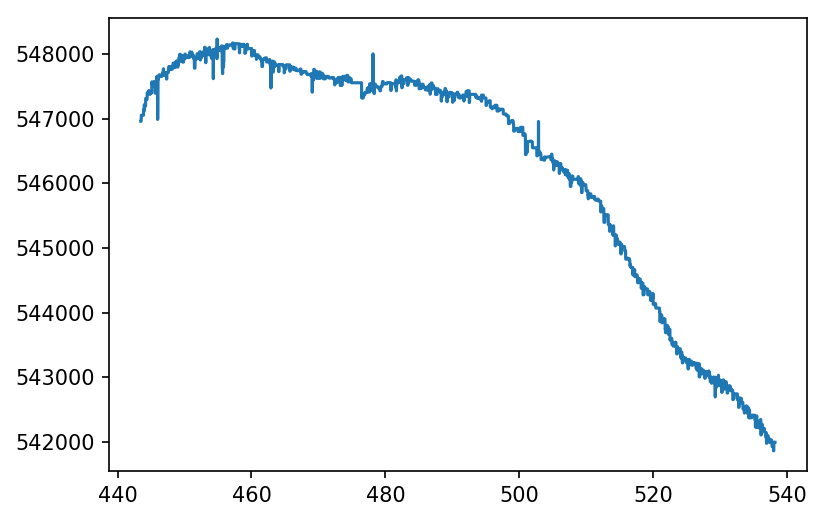

In [26]:
plt.plot(tpf.time, psf_flux)

In [27]:
lc = tpf.to_lightcurve()

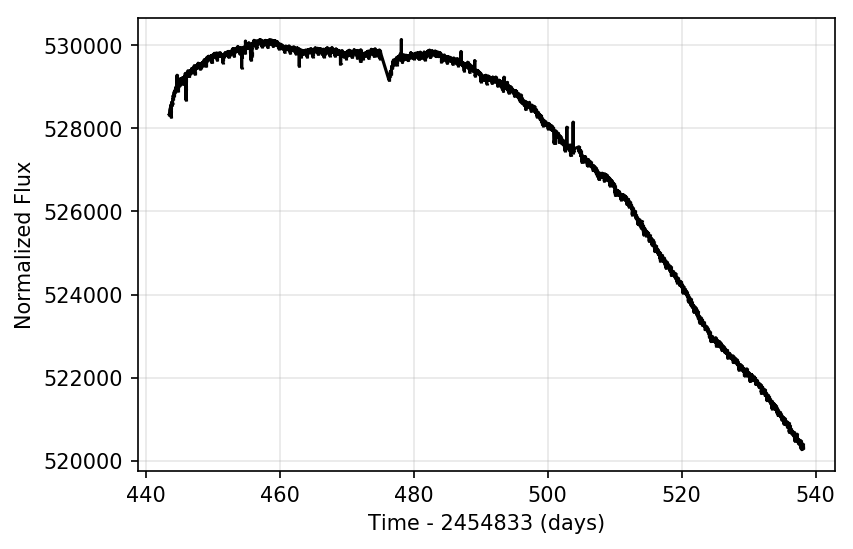

In [28]:
lc.plot(normalize=False)

In [29]:
from lightkurve import LightCurve

In [30]:
lc_psf = LightCurve(tpf.time, psf_flux).flatten()

In [31]:
lc = tpf.to_lightcurve().flatten()

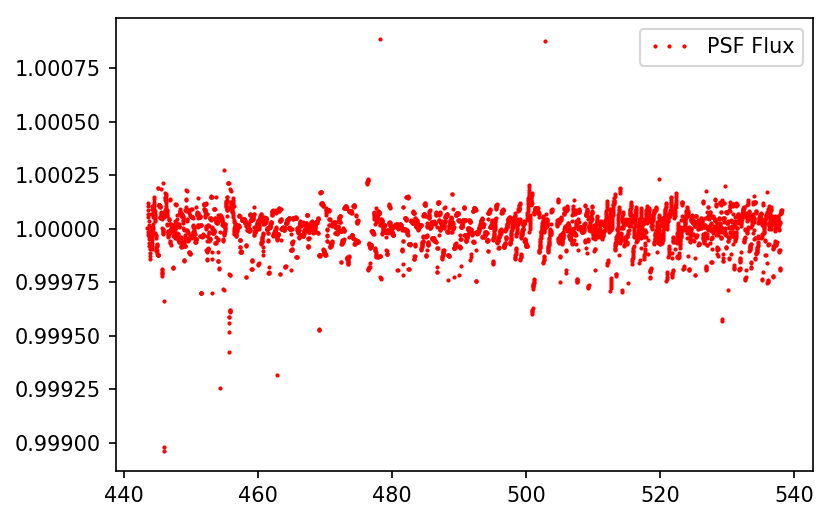

In [32]:
plt.plot(lc_psf.time, lc_psf.flux, 'ro', markersize=1, label='PSF Flux')
#plt.plot(lc.time, lc.flux, 'ko', markersize=1, label='Aperture Flux')
plt.legend(numpoints=3)

In [23]:
from vaneska.interpolate import ScipyRectBivariateSpline
import tensorflow as tf

In [24]:
y, x = np.mgrid[0:10:1j*100, 0:7:1j*100]
z = x ** 2 + y ** 2

In [25]:
interp = ScipyRectBivariateSpline(x[0], y[:, 0], z)

In [26]:
xc = tf.Variable(7., dtype=tf.float64)
yc = tf.Variable(3., dtype=tf.float64)

In [27]:
xc

<tf.Variable 'Variable_4:0' shape=() dtype=float64_ref>

In [28]:
xc

<tf.Variable 'Variable_4:0' shape=() dtype=float64_ref>

In [40]:
xt = tf.Variable(np.linspace(0., 10., 100), dtype=tf.float64)
yt = tf.Variable(np.linspace(0., 10., 99), dtype=tf.float64)

In [41]:
img = interp(xt - xc, yt - yc)

In [42]:
sess = tf.Session()

In [43]:
sess.run(tf.global_variables_initializer())

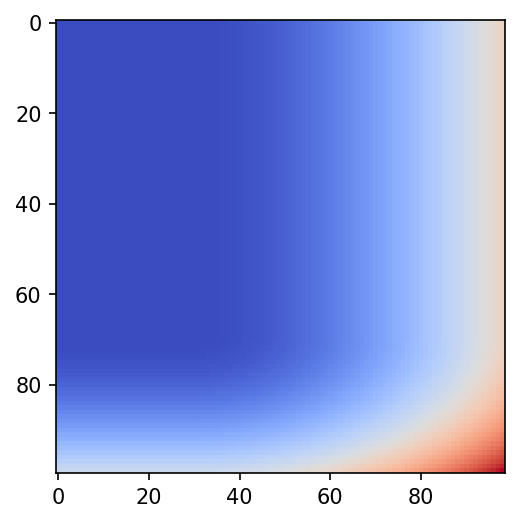

In [44]:
plt.imshow(sess.run(img), cmap='coolwarm')

In [54]:
grad = tf.gradients(img, [yt])

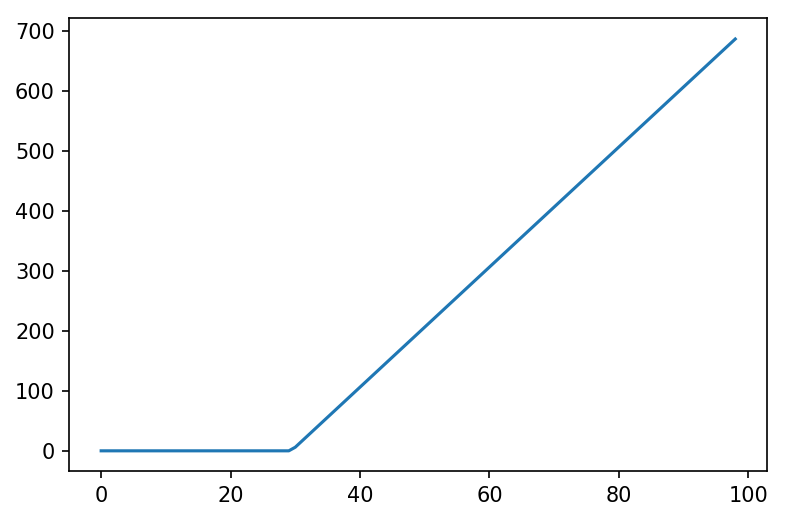

In [55]:
plt.plot(sess.run(grad)[0])

In [39]:
tf.reduce_sum()

TypeError: reduce_sum() missing 1 required positional argument: 'input_tensor'

In [ ]:
tf.py_func()

In [ ]:
tf.py_func()

In [ ]:
sess.run(grad)

In [ ]:
np.array()

In [ ]:
np.reshape(np.ones((11, 11)), -1).shape

In [ ]:
grad = tf.reshape(grad, shape=(100,))

In [ ]:
sess.run(grad)

In [ ]:
len(sess.run(grad)[0])

In [ ]:
xc

In [ ]:
sess.run(grad)

In [ ]:
xc = tf.linspace(0., 10., 10)
yc = tf.linspace(0., 10., 10)

In [ ]:
sess.run(diff)

In [ ]:
diff = tf.subtract(tf.constant(np.ones(10), dtype=tf.float64), tf.constant(1., dtype=tf.float64))

In [ ]:
model